In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Genesis_1 = "In the beginning God created the heaven and the earth.And the earth was without form, and void; and darkness was on the face of the deep. And the Spirit of God moved on the face of the waters.And God said, Let there be light: and there was light.And God saw the light, that it was good: and God divided the light from the darkness.And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day.And God said, Let there be a firmament in the middle of the waters, and let it divide the waters from the waters.And God made the firmament, and divided the waters which were under the firmament from the waters which were above the firmament: and it was so.And God called the firmament Heaven. And the evening and the morning were the second day.And God said, Let the waters under the heaven be gathered together to one place, and let the dry land appear: and it was so.And God called the dry land Earth; and the gathering together of the waters called he Seas: and God saw that it was good.And God said, Let the earth bring forth grass, the herb yielding seed, and the fruit tree yielding fruit after his kind, whose seed is in itself, on the earth: and it was so.And the earth brought forth grass, and herb yielding seed after his kind, and the tree yielding fruit, whose seed was in itself, after his kind: and God saw that it was good.And the evening and the morning were the third day.And God said, Let there be lights in the firmament of the heaven to divide the day from the night; and let them be for signs, and for seasons, and for days, and years:And let them be for lights in the firmament of the heaven to give light on the earth: and it was so.And God made two great lights; the greater light to rule the day, and the lesser light to rule the night: he made the stars also.And God set them in the firmament of the heaven to give light on the earth,And to rule over the day and over the night, and to divide the light from the darkness: and God saw that it was good.And the evening and the morning were the fourth day.And God said, Let the waters bring forth abundantly the moving creature that has life, and fowl that may fly above the earth in the open firmament of heaven.And God created great whales, and every living creature that moves, which the waters brought forth abundantly, after their kind, and every winged fowl after his kind: and God saw that it was good.And God blessed them, saying, Be fruitful, and multiply, and fill the waters in the seas, and let fowl multiply in the earth.And the evening and the morning were the fifth day.And God said, Let the earth bring forth the living creature after his kind, cattle, and creeping thing, and beast of the earth after his kind: and it was so.And God made the beast of the earth after his kind, and cattle after their kind, and every thing that creeps on the earth after his kind: and God saw that it was good.And God said, Let us make man in our image, after our likeness: and let them have dominion over the fish of the sea, and over the fowl of the air, and over the cattle, and over all the earth, and over every creeping thing that creeps on the earth.So God created man in his own image, in the image of God created he him; male and female created he them.And God blessed them, and God said to them, Be fruitful, and multiply, and replenish the earth, and subdue it: and have dominion over the fish of the sea, and over the fowl of the air, and over every living thing that moves on the earth.And God said, Behold, I have given you every herb bearing seed, which is on the face of all the earth, and every tree, in the which is the fruit of a tree yielding seed; to you it shall be for meat.And to every beast of the earth, and to every fowl of the air, and to every thing that creeps on the earth, wherein there is life, I have given every green herb for meat: and it was so.And God saw every thing that he had made, and, behold, it was very good. And the evening and the morning were the sixth day.".lower()

In [6]:
Genesis_2 = "Thus the heavens and the earth were finished, and all the host of them.And on the seventh day God ended his work which he had made; and he rested on the seventh day from all his work which he had made.And God blessed the seventh day, and sanctified it: because that in it he had rested from all his work which God created and made.These are the generations of the heavens and of the earth when they were created, in the day that the LORD God made the earth and the heavens,And every plant of the field before it was in the earth, and every herb of the field before it grew: for the LORD God had not caused it to rain on the earth, and there was not a man to till the ground.But there went up a mist from the earth, and watered the whole face of the ground.And the LORD God formed man of the dust of the ground, and breathed into his nostrils the breath of life; and man became a living soul.And the LORD God planted a garden eastward in Eden; and there he put the man whom he had formed.And out of the ground made the LORD God to grow every tree that is pleasant to the sight, and good for food; the tree of life also in the middle of the garden, and the tree of knowledge of good and evil.And a river went out of Eden to water the garden; and from there it was parted, and became into four heads.The name of the first is Pison: that is it which compasses the whole land of Havilah, where there is gold;And the gold of that land is good: there is bdellium and the onyx stone.And the name of the second river is Gihon: the same is it that compasses the whole land of Ethiopia.And the name of the third river is Hiddekel: that is it which goes toward the east of Assyria. And the fourth river is Euphrates.And the LORD God took the man, and put him into the garden of Eden to dress it and to keep it.And the LORD God commanded the man, saying, Of every tree of the garden you may freely eat:But of the tree of the knowledge of good and evil, you shall not eat of it: for in the day that you eat thereof you shall surely die.And the LORD God said, It is not good that the man should be alone; I will make him an help meet for him.And out of the ground the LORD God formed every beast of the field, and every fowl of the air; and brought them to Adam to see what he would call them: and whatever Adam called every living creature, that was the name thereof.And Adam gave names to all cattle, and to the fowl of the air, and to every beast of the field; but for Adam there was not found an help meet for him.And the LORD God caused a deep sleep to fall on Adam, and he slept: and he took one of his ribs, and closed up the flesh instead thereof;And the rib, which the LORD God had taken from man, made he a woman, and brought her to the man.And Adam said, This is now bone of my bones, and flesh of my flesh: she shall be called Woman, because she was taken out of Man.Therefore shall a man leave his father and his mother, and shall join to his wife: and they shall be one flesh.And they were both naked, the man and his wife, and were not ashamed.".lower()

In [7]:
Genesis_3 = "Now the serpent was more subtle than any beast of the field which the LORD God had made. And he said to the woman, Yes, has God said, You shall not eat of every tree of the garden?And the woman said to the serpent, We may eat of the fruit of the trees of the garden:But of the fruit of the tree which is in the middle of the garden, God has said, You shall not eat of it, neither shall you touch it, lest you die.And the serpent said to the woman, You shall not surely die:For God does know that in the day you eat thereof, then your eyes shall be opened, and you shall be as gods, knowing good and evil.And when the woman saw that the tree was good for food, and that it was pleasant to the eyes, and a tree to be desired to make one wise, she took of the fruit thereof, and did eat, and gave also to her husband with her; and he did eat.And the eyes of them both were opened, and they knew that they were naked; and they sewed fig leaves together, and made themselves aprons.And they heard the voice of the LORD God walking in the garden in the cool of the day: and Adam and his wife hid themselves from the presence of the LORD God among the trees of the garden.And the LORD God called to Adam, and said to him, Where are you?And he said, I heard your voice in the garden, and I was afraid, because I was naked; and I hid myself.And he said, Who told you that you were naked? Have you eaten of the tree, whereof I commanded you that you should not eat?And the man said, The woman whom you gave to be with me, she gave me of the tree, and I did eat.And the LORD God said to the woman, What is this that you have done? And the woman said, The serpent beguiled me, and I did eat.And the LORD God said to the serpent, Because you have done this, you are cursed above all cattle, and above every beast of the field; on your belly shall you go, and dust shall you eat all the days of your life:And I will put enmity between you and the woman, and between your seed and her seed; it shall bruise your head, and you shall bruise his heel.To the woman he said, I will greatly multiply your sorrow and your conception; in sorrow you shall bring forth children; and your desire shall be to your husband, and he shall rule over you.And to Adam he said, Because you have listened to the voice of your wife, and have eaten of the tree, of which I commanded you, saying, You shall not eat of it: cursed is the ground for your sake; in sorrow shall you eat of it all the days of your life;Thorns also and thistles shall it bring forth to you; and you shall eat the herb of the field;In the sweat of your face shall you eat bread, till you return to the ground; for out of it were you taken: for dust you are, and to dust shall you return.And Adam called his wife' name Eve; because she was the mother of all living.To Adam also and to his wife did the LORD God make coats of skins, and clothed them.And the LORD God said, Behold, the man is become as one of us, to know good and evil: and now, lest he put forth his hand, and take also of the tree of life, and eat, and live for ever:Therefore the LORD God sent him forth from the garden of Eden, to till the ground from from where he was taken.So he drove out the man; and he placed at the east of the garden of Eden Cherubim, and a flaming sword which turned every way, to keep the way of the tree of life.".lower()

In [8]:
Genesis_4 = "And Adam knew Eve his wife; and she conceived, and bore Cain, and said, I have gotten a man from the LORD.And she again bore his brother Abel. And Abel was a keeper of sheep, but Cain was a tiller of the ground.And in process of time it came to pass, that Cain brought of the fruit of the ground an offering to the LORD.And Abel, he also brought of the firstborn of his flock and of the fat thereof. And the LORD had respect to Abel and to his offering:But to Cain and to his offering he had not respect. And Cain was very wroth, and his countenance fell.And the LORD said to Cain, Why are you wroth? and why is your countenance fallen?If you do well, shall you not be accepted? and if you do not well, sin lies at the door. And to you shall be his desire, and you shall rule over him.And Cain talked with Abel his brother: and it came to pass, when they were in the field, that Cain rose up against Abel his brother, and slew him.And the LORD said to Cain, Where is Abel your brother? And he said, I know not: Am I my brother' keeper?And he said, What have you done? the voice of your brother' blood cries to me from the ground.And now are you cursed from the earth, which has opened her mouth to receive your brother' blood from your hand;When you till the ground, it shall not from now on yield to you her strength; a fugitive and a vagabond shall you be in the earth.And Cain said to the LORD, My punishment is greater than I can bear.Behold, you have driven me out this day from the face of the earth; and from your face shall I be hid; and I shall be a fugitive and a vagabond in the earth; and it shall come to pass, that every one that finds me shall slay me.And the LORD said to him, Therefore whoever slays Cain, vengeance shall be taken on him sevenfold. And the LORD set a mark on Cain, lest any finding him should kill him.And Cain went out from the presence of the LORD, and dwelled in the land of Nod, on the east of Eden.And Cain knew his wife; and she conceived, and bore Enoch: and he built a city, and called the name of the city, after the name of his son, Enoch.And to Enoch was born Irad: and Irad begat Mehujael: and Mehujael begat Methusael: and Methusael begat Lamech.And Lamech took to him two wives: the name of the one was Adah, and the name of the other Zillah.And Adah bore Jabal: he was the father of such as dwell in tents, and of such as have cattle.And his brother' name was Jubal: he was the father of all such as handle the harp and organ.And Zillah, she also bore Tubalcain, an instructor of every artificer in brass and iron: and the sister of Tubalcain was Naamah.And Lamech said to his wives, Adah and Zillah, Hear my voice; you wives of Lamech, listen to my speech: for I have slain a man to my wounding, and a young man to my hurt.If Cain shall be avenged sevenfold, truly Lamech seventy and sevenfold.And Adam knew his wife again; and she bore a son, and called his name Seth: For God, said she, has appointed me another seed instead of Abel, whom Cain slew.And to Seth, to him also there was born a son; and he called his name Enos: then began men to call on the name of the LORD.".lower()

In [9]:
Genesis_5 = "This is the book of the generations of Adam. In the day that God created man, in the likeness of God made he him;Male and female created he them; and blessed them, and called their name Adam, in the day when they were created.And Adam lived an hundred and thirty years, and begat a son in his own likeness, and after his image; and called his name Seth:And the days of Adam after he had begotten Seth were eight hundred years: and he begat sons and daughters:And all the days that Adam lived were nine hundred and thirty years: and he died.And Seth lived an hundred and five years, and begat Enos:And Seth lived after he begat Enos eight hundred and seven years, and begat sons and daughters:And all the days of Seth were nine hundred and twelve years: and he died.And Enos lived ninety years, and begat Cainan:And Enos lived after he begat Cainan eight hundred and fifteen years, and begat sons and daughters:And all the days of Enos were nine hundred and five years: and he died.And Cainan lived seventy years and begat Mahalaleel:And Cainan lived after he begat Mahalaleel eight hundred and forty years, and begat sons and daughters:And all the days of Cainan were nine hundred and ten years: and he died.And Mahalaleel lived sixty and five years, and begat Jared:And Mahalaleel lived after he begat Jared eight hundred and thirty years, and begat sons and daughters:And all the days of Mahalaleel were eight hundred ninety and five years: and he died.And Jared lived an hundred sixty and two years, and he begat Enoch:And Jared lived after he begat Enoch eight hundred years, and begat sons and daughters:And all the days of Jared were nine hundred sixty and two years: and he died.And Enoch lived sixty and five years, and begat Methuselah:And Enoch walked with God after he begat Methuselah three hundred years, and begat sons and daughters:And all the days of Enoch were three hundred sixty and five years:And Enoch walked with God: and he was not; for God took him.And Methuselah lived an hundred eighty and seven years, and begat Lamech.And Methuselah lived after he begat Lamech seven hundred eighty and two years, and begat sons and daughters:And all the days of Methuselah were nine hundred sixty and nine years: and he died.And Lamech lived an hundred eighty and two years, and begat a son:And he called his name Noah, saying, This same shall comfort us concerning our work and toil of our hands, because of the ground which the LORD has cursed.And Lamech lived after he begat Noah five hundred ninety and five years, and begat sons and daughters:And all the days of Lamech were seven hundred seventy and seven years: and he died.And Noah was five hundred years old: and Noah begat Shem, Ham, and Japheth.".lower()

In [10]:
Genesis_6 = "And it came to pass, when men began to multiply on the face of the earth, and daughters were born to them,That the sons of God saw the daughters of men that they were fair; and they took them wives of all which they chose.And the LORD said, My spirit shall not always strive with man, for that he also is flesh: yet his days shall be an hundred and twenty years.There were giants in the earth in those days; and also after that, when the sons of God came in to the daughters of men, and they bore children to them, the same became mighty men which were of old, men of renown.And God saw that the wickedness of man was great in the earth, and that every imagination of the thoughts of his heart was only evil continually.And it repented the LORD that he had made man on the earth, and it grieved him at his heart.And the LORD said, I will destroy man whom I have created from the face of the earth; both man, and beast, and the creeping thing, and the fowls of the air; for it repents me that I have made them.But Noah found grace in the eyes of the LORD.These are the generations of Noah: Noah was a just man and perfect in his generations, and Noah walked with God.And Noah begat three sons, Shem, Ham, and Japheth.The earth also was corrupt before God, and the earth was filled with violence.And God looked on the earth, and, behold, it was corrupt; for all flesh had corrupted his way on the earth.And God said to Noah, The end of all flesh is come before me; for the earth is filled with violence through them; and, behold, I will destroy them with the earth.Make you an ark of gopher wood; rooms shall you make in the ark, and shall pitch it within and without with pitch.And this is the fashion which you shall make it of: The length of the ark shall be three hundred cubits, the breadth of it fifty cubits, and the height of it thirty cubits.A window shall you make to the ark, and in a cubit shall you finish it above; and the door of the ark shall you set in the side thereof; with lower, second, and third stories shall you make it.And, behold, I, even I, do bring a flood of waters on the earth, to destroy all flesh, wherein is the breath of life, from under heaven; and every thing that is in the earth shall die.But with you will I establish my covenant; and you shall come into the ark, you, and your sons, and your wife, and your sons'wives with you.And of every living thing of all flesh, two of every sort shall you bring into the ark, to keep them alive with you; they shall be male and female.Of fowls after their kind, and of cattle after their kind, of every creeping thing of the earth after his kind, two of every sort shall come to you, to keep them alive.And take you to you of all food that is eaten, and you shall gather it to you; and it shall be for food for you, and for them.Thus did Noah; according to all that God commanded him, so did he.".lower()

In [11]:
Genesis_7 = "And the LORD said to Noah, Come you and all your house into the ark; for you have I seen righteous before me in this generation.Of every clean beast you shall take to you by sevens, the male and his female: and of beasts that are not clean by two, the male and his female.Of fowls also of the air by sevens, the male and the female; to keep seed alive on the face of all the earth.For yet seven days, and I will cause it to rain on the earth forty days and forty nights; and every living substance that I have made will I destroy from off the face of the earth.And Noah did according to all that the LORD commanded him.And Noah was six hundred years old when the flood of waters was on the earth.And Noah went in, and his sons, and his wife, and his sons'wives with him, into the ark, because of the waters of the flood.Of clean beasts, and of beasts that are not clean, and of fowls, and of every thing that creeps on the earth,There went in two and two to Noah into the ark, the male and the female, as God had commanded Noah.And it came to pass after seven days, that the waters of the flood were on the earth.In the six hundredth year of Noah' life, in the second month, the seventeenth day of the month, the same day were all the fountains of the great deep broken up, and the windows of heaven were opened.And the rain was on the earth forty days and forty nights.In the selfsame day entered Noah, and Shem, and Ham, and Japheth, the sons of Noah, and Noah' wife, and the three wives of his sons with them, into the ark;They, and every beast after his kind, and all the cattle after their kind, and every creeping thing that creeps on the earth after his kind, and every fowl after his kind, every bird of every sort.And they went in to Noah into the ark, two and two of all flesh, wherein is the breath of life.And they that went in, went in male and female of all flesh, as God had commanded him: and the LORD shut him in.And the flood was forty days on the earth; and the waters increased, and bore up the ark, and it was lift up above the earth.And the waters prevailed, and were increased greatly on the earth; and the ark went on the face of the waters.And the waters prevailed exceedingly on the earth; and all the high hills, that were under the whole heaven, were covered.Fifteen cubits upward did the waters prevail; and the mountains were covered.And all flesh died that moved on the earth, both of fowl, and of cattle, and of beast, and of every creeping thing that creeps on the earth, and every man:All in whose nostrils was the breath of life, of all that was in the dry land, died.And every living substance was destroyed which was on the face of the ground, both man, and cattle, and the creeping things, and the fowl of the heaven; and they were destroyed from the earth: and Noah only remained alive, and they that were with him in the ark.And the waters prevailed on the earth an hundred and fifty days.".lower()

In [12]:
Genesis_8 = "And God remembered Noah, and every living thing, and all the cattle that was with him in the ark: and God made a wind to pass over the earth, and the waters assuaged;The fountains also of the deep and the windows of heaven were stopped, and the rain from heaven was restrained;And the waters returned from off the earth continually: and after the end of the hundred and fifty days the waters were abated.And the ark rested in the seventh month, on the seventeenth day of the month, on the mountains of Ararat.And the waters decreased continually until the tenth month: in the tenth month, on the first day of the month, were the tops of the mountains seen.And it came to pass at the end of forty days, that Noah opened the window of the ark which he had made:And he sent forth a raven, which went forth to and fro, until the waters were dried up from off the earth.Also he sent forth a dove from him, to see if the waters were abated from off the face of the ground;But the dove found no rest for the sole of her foot, and she returned to him into the ark, for the waters were on the face of the whole earth: then he put forth his hand, and took her, and pulled her in to him into the ark.And he stayed yet other seven days; and again he sent forth the dove out of the ark;And the dove came in to him in the evening; and, see, in her mouth was an olive leaf plucked off: so Noah knew that the waters were abated from off the earth.And he stayed yet other seven days; and sent forth the dove; which returned not again to him any more.And it came to pass in the six hundredth and first year, in the first month, the first day of the month, the waters were dried up from off the earth: and Noah removed the covering of the ark, and looked, and, behold, the face of the ground was dry.And in the second month, on the seven and twentieth day of the month, was the earth dried.And God spoke to Noah, saying,Go forth of the ark, you, and your wife, and your sons, and your sons'wives with you.Bring forth with you every living thing that is with you, of all flesh, both of fowl, and of cattle, and of every creeping thing that creeps on the earth; that they may breed abundantly in the earth, and be fruitful, and multiply on the earth.And Noah went forth, and his sons, and his wife, and his sons'wives with him:Every beast, every creeping thing, and every fowl, and whatever creeps on the earth, after their kinds, went forth out of the ark.And Noah built an altar to the LORD; and took of every clean beast, and of every clean fowl, and offered burnt offerings on the altar.And the LORD smelled a sweet smell; and the LORD said in his heart, I will not again curse the ground any more for man' sake; for the imagination of man' heart is evil from his youth; neither will I again smite any more every thing living, as I have done.While the earth remains, seedtime and harvest, and cold and heat, and summer and winter, and day and night shall not cease.".lower()

In [13]:
Genesis_9 = "And God blessed Noah and his sons, and said to them, Be fruitful, and multiply, and replenish the earth.And the fear of you and the dread of you shall be on every beast of the earth, and on every fowl of the air, on all that moves on the earth, and on all the fishes of the sea; into your hand are they delivered.Every moving thing that lives shall be meat for you; even as the green herb have I given you all things.But flesh with the life thereof, which is the blood thereof, shall you not eat.And surely your blood of your lives will I require; at the hand of every beast will I require it, and at the hand of man; at the hand of every man' brother will I require the life of man.Whoever sheds man' blood, by man shall his blood be shed: for in the image of God made he man.And you, be you fruitful, and multiply; bring forth abundantly in the earth, and multiply therein.And God spoke to Noah, and to his sons with him, saying,And I, behold, I establish my covenant with you, and with your seed after you;And with every living creature that is with you, of the fowl, of the cattle, and of every beast of the earth with you; from all that go out of the ark, to every beast of the earth.And I will establish my covenant with you, neither shall all flesh be cut off any more by the waters of a flood; neither shall there any more be a flood to destroy the earth.And God said, This is the token of the covenant which I make between me and you and every living creature that is with you, for perpetual generations:I do set my bow in the cloud, and it shall be for a token of a covenant between me and the earth.And it shall come to pass, when I bring a cloud over the earth, that the bow shall be seen in the cloud:And I will remember my covenant, which is between me and you and every living creature of all flesh; and the waters shall no more become a flood to destroy all flesh.And the bow shall be in the cloud; and I will look on it, that I may remember the everlasting covenant between God and every living creature of all flesh that is on the earth.And God said to Noah, This is the token of the covenant, which I have established between me and all flesh that is on the earth.And the sons of Noah, that went forth of the ark, were Shem, and Ham, and Japheth: and Ham is the father of Canaan.These are the three sons of Noah: and of them was the whole earth covered.And Noah began to be an farmer, and he planted a vineyard:And he drank of the wine, and was drunken; and he was uncovered within his tent.And Ham, the father of Canaan, saw the nakedness of his father, and told his two brothers without.And Shem and Japheth took a garment, and laid it on both their shoulders, and went backward, and covered the nakedness of their father; and their faces were backward, and they saw not their father' nakedness.And Noah awoke from his wine, and knew what his younger son had done to him.And he said, Cursed be Canaan; a servant of servants shall he be to his brothers.And he said, Blessed be the LORD God of Shem; and Canaan shall be his servant.God shall enlarge Japheth, and he shall dwell in the tents of Shem; and Canaan shall be his servant.And Noah lived after the flood three hundred and fifty years.And all the days of Noah were nine hundred and fifty years: and he died.".lower()

In [14]:
Genesis_10 = "Now these are the generations of the sons of Noah, Shem, Ham, and Japheth: and to them were sons born after the flood.The sons of Japheth; Gomer, and Magog, and Madai, and Javan, and Tubal, and Meshech, and Tiras.And the sons of Gomer; Ashkenaz, and Riphath, and Togarmah.And the sons of Javan; Elishah, and Tarshish, Kittim, and Dodanim.By these were the isles of the Gentiles divided in their lands; every one after his tongue, after their families, in their nations.And the sons of Ham; Cush, and Mizraim, and Phut, and Canaan.And the sons of Cush; Seba, and Havilah, and Sabtah, and Raamah, and Sabtechah: and the sons of Raamah; Sheba, and Dedan.And Cush begat Nimrod: he began to be a mighty one in the earth.He was a mighty hunter before the LORD: why it is said, Even as Nimrod the mighty hunter before the LORD.And the beginning of his kingdom was Babel, and Erech, and Accad, and Calneh, in the land of Shinar.Out of that land went forth Asshur, and built Nineveh, and the city Rehoboth, and Calah,And Resen between Nineveh and Calah: the same is a great city.And Mizraim begat Ludim, and Anamim, and Lehabim, and Naphtuhim,And Pathrusim, and Casluhim, (out of whom came Philistim,) and Caphtorim.And Canaan begat Sidon his first born, and Heth,And the Jebusite, and the Amorite, and the Girgasite,And the Hivite, and the Arkite, and the Sinite,And the Arvadite, and the Zemarite, and the Hamathite: and afterward were the families of the Canaanites spread abroad.And the border of the Canaanites was from Sidon, as you come to Gerar, to Gaza; as you go, to Sodom, and Gomorrah, and Admah, and Zeboim, even to Lasha.These are the sons of Ham, after their families, after their tongues, in their countries, and in their nations.To Shem also, the father of all the children of Eber, the brother of Japheth the elder, even to him were children born.The children of Shem; Elam, and Asshur, and Arphaxad, and Lud, and Aram.And the children of Aram; Uz, and Hul, and Gether, and Mash.And Arphaxad begat Salah; and Salah begat Eber.And to Eber were born two sons: the name of one was Peleg; for in his days was the earth divided; and his brother' name was Joktan.And Joktan begat Almodad, and Sheleph, and Hazarmaveth, and Jerah,And Hadoram, and Uzal, and Diklah,And Obal, and Abimael, and Sheba,And Ophir, and Havilah, and Jobab: all these were the sons of Joktan.And their dwelling was from Mesha, as you go to Sephar a mount of the east.These are the sons of Shem, after their families, after their tongues, in their lands, after their nations.These are the families of the sons of Noah, after their generations, in their nations: and by these were the nations divided in the earth after the flood.".lower()

In [15]:
Genesis_11 = "And the whole earth was of one language, and of one speech.And it came to pass, as they journeyed from the east, that they found a plain in the land of Shinar; and they dwelled there.And they said one to another, Go to, let us make brick, and burn them thoroughly. And they had brick for stone, and slime had they for mortar.And they said, Go to, let us build us a city and a tower, whose top may reach to heaven; and let us make us a name, lest we be scattered abroad on the face of the whole earth.And the LORD came down to see the city and the tower, which the children of men built.And the LORD said, Behold, the people is one, and they have all one language; and this they begin to do: and now nothing will be restrained from them, which they have imagined to do.Go to, let us go down, and there confound their language, that they may not understand one another' speech.So the LORD scattered them abroad from there on the face of all the earth: and they left off to build the city.Therefore is the name of it called Babel; because the LORD did there confound the language of all the earth: and from there did the LORD scatter them abroad on the face of all the earth.These are the generations of Shem: Shem was an hundred years old, and begat Arphaxad two years after the flood:And Shem lived after he begat Arphaxad five hundred years, and begat sons and daughters.And Arphaxad lived five and thirty years, and begat Salah:And Arphaxad lived after he begat Salah four hundred and three years, and begat sons and daughters.And Salah lived thirty years, and begat Eber:And Salah lived after he begat Eber four hundred and three years, and begat sons and daughters.And Eber lived four and thirty years, and begat Peleg:And Eber lived after he begat Peleg four hundred and thirty years, and begat sons and daughters.And Peleg lived thirty years, and begat Reu:And Peleg lived after he begat Reu two hundred and nine years, and begat sons and daughters.And Reu lived two and thirty years, and begat Serug:And Reu lived after he begat Serug two hundred and seven years, and begat sons and daughters.And Serug lived thirty years, and begat Nahor:And Serug lived after he begat Nahor two hundred years, and begat sons and daughters.And Nahor lived nine and twenty years, and begat Terah:And Nahor lived after he begat Terah an hundred and nineteen years, and begat sons and daughters.And Terah lived seventy years, and begat Abram, Nahor, and Haran.Now these are the generations of Terah: Terah begat Abram, Nahor, and Haran; and Haran begat Lot.And Haran died before his father Terah in the land of his nativity, in Ur of the Chaldees.And Abram and Nahor took them wives: the name of Abram' wife was Sarai; and the name of Nahor' wife, Milcah, the daughter of Haran, the father of Milcah, and the father of Iscah.But Sarai was barren; she had no child.And Terah took Abram his son, and Lot the son of Haran his son' son, and Sarai his daughter in law, his son Abram' wife; and they went forth with them from Ur of the Chaldees, to go into the land of Canaan; and they came to Haran, and dwelled there.And the days of Terah were two hundred and five years: and Terah died in Haran.".lower()

In [16]:
Genesis_12 = "Now the LORD had said to Abram, Get you out of your country, and from your kindred, and from your father' house, to a land that I will show you:And I will make of you a great nation, and I will bless you, and make your name great; and you shall be a blessing:And I will bless them that bless you, and curse him that curses you: and in you shall all families of the earth be blessed.So Abram departed, as the LORD had spoken to him; and Lot went with him: and Abram was seventy and five years old when he departed out of Haran.And Abram took Sarai his wife, and Lot his brother' son, and all their substance that they had gathered, and the souls that they had gotten in Haran; and they went forth to go into the land of Canaan; and into the land of Canaan they came.And Abram passed through the land to the place of Sichem, to the plain of Moreh. And the Canaanite was then in the land.And the LORD appeared to Abram, and said, To your seed will I give this land: and there built he an altar to the LORD, who appeared to him.And he removed from there to a mountain on the east of Bethel, and pitched his tent, having Bethel on the west, and Hai on the east: and there he built an altar to the LORD, and called on the name of the LORD.And Abram journeyed, going on still toward the south.And there was a famine in the land: and Abram went down into Egypt to sojourn there; for the famine was grievous in the land.And it came to pass, when he was come near to enter into Egypt, that he said to Sarai his wife, Behold now, I know that you are a fair woman to look on:Therefore it shall come to pass, when the Egyptians shall see you, that they shall say, This is his wife: and they will kill me, but they will save you alive.Say, I pray you, you are my sister: that it may be well with me for your sake; and my soul shall live because of you.And it came to pass, that, when Abram was come into Egypt, the Egyptians beheld the woman that she was very fair.The princes also of Pharaoh saw her, and commended her before Pharaoh: and the woman was taken into Pharaoh' house.And he entreated Abram well for her sake: and he had sheep, and oxen, and he asses, and menservants, and maidservants, and she asses, and camels.And the LORD plagued Pharaoh and his house with great plagues because of Sarai Abram' wife.And Pharaoh called Abram and said, What is this that you have done to me? why did you not tell me that she was your wife?Why said you, She is my sister? so I might have taken her to me to wife: now therefore behold your wife, take her, and go your way.And Pharaoh commanded his men concerning him: and they sent him away, and his wife, and all that he had.".lower()

In [17]:
Genesis_13 = "And Abram went up out of Egypt, he, and his wife, and all that he had, and Lot with him, into the south.And Abram was very rich in cattle, in silver, and in gold.And he went on his journeys from the south even to Bethel, to the place where his tent had been at the beginning, between Bethel and Hai;To the place of the altar, which he had make there at the first: and there Abram called on the name of the LORD.And Lot also, which went with Abram, had flocks, and herds, and tents.And the land was not able to bear them, that they might dwell together: for their substance was great, so that they could not dwell together.And there was a strife between the herdsmen of Abram' cattle and the herdsmen of Lot' cattle: and the Canaanite and the Perizzite dwelled then in the land.And Abram said to Lot, Let there be no strife, I pray you, between me and you, and between my herdsmen and your herdsmen; for we be brothers.Is not the whole land before you? separate yourself, I pray you, from me: if you will take the left hand, then I will go to the right; or if you depart to the right hand, then I will go to the left.And Lot lifted up his eyes, and beheld all the plain of Jordan, that it was well watered every where, before the LORD destroyed Sodom and Gomorrah, even as the garden of the LORD, like the land of Egypt, as you come to Zoar.Then Lot chose him all the plain of Jordan; and Lot journeyed east: and they separated themselves the one from the other.Abram dwelled in the land of Canaan, and Lot dwelled in the cities of the plain, and pitched his tent toward Sodom.But the men of Sodom were wicked and sinners before the LORD exceedingly.And the LORD said to Abram, after that Lot was separated from him, Lift up now your eyes, and look from the place where you are northward, and southward, and eastward, and westward:For all the land which you see, to you will I give it, and to your seed for ever.And I will make your seed as the dust of the earth: so that if a man can number the dust of the earth, then shall your seed also be numbered.Arise, walk through the land in the length of it and in the breadth of it; for I will give it to you.Then Abram removed his tent, and came and dwelled in the plain of Mamre, which is in Hebron, and built there an altar to the LORD.".lower()

In [18]:
Genesis_14 = "And it came to pass in the days of Amraphel king of Shinar, Arioch king of Ellasar, Chedorlaomer king of Elam, and Tidal king of nations;That these made war with Bera king of Sodom, and with Birsha king of Gomorrah, Shinab king of Admah, and Shemeber king of Zeboiim, and the king of Bela, which is Zoar.All these were joined together in the vale of Siddim, which is the salt sea.Twelve years they served Chedorlaomer, and in the thirteenth year they rebelled.And in the fourteenth year came Chedorlaomer, and the kings that were with him, and smote the Rephaims in Ashteroth Karnaim, and the Zuzims in Ham, and the Emins in Shaveh Kiriathaim,And the Horites in their mount Seir, to Elparan, which is by the wilderness.And they returned, and came to Enmishpat, which is Kadesh, and smote all the country of the Amalekites, and also the Amorites, that dwelled in Hazezontamar.And there went out the king of Sodom, and the king of Gomorrah, and the king of Admah, and the king of Zeboiim, and the king of Bela (the same is Zoar;) and they joined battle with them in the vale of Siddim;With Chedorlaomer the king of Elam, and with Tidal king of nations, and Amraphel king of Shinar, and Arioch king of Ellasar; four kings with five.And the vale of Siddim was full of slime pits; and the kings of Sodom and Gomorrah fled, and fell there; and they that remained fled to the mountain.And they took all the goods of Sodom and Gomorrah, and all their victuals, and went their way.And they took Lot, Abram' brother' son, who dwelled in Sodom, and his goods, and departed.And there came one that had escaped, and told Abram the Hebrew; for he dwelled in the plain of Mamre the Amorite, brother of Eshcol, and brother of Aner: and these were confederate with Abram.And when Abram heard that his brother was taken captive, he armed his trained servants, born in his own house, three hundred and eighteen, and pursued them to Dan.And he divided himself against them, he and his servants, by night, and smote them, and pursued them to Hobah, which is on the left hand of Damascus.And he brought back all the goods, and also brought again his brother Lot, and his goods, and the women also, and the people.And the king of Sodom went out to meet him after his return from the slaughter of Chedorlaomer, and of the kings that were with him, at the valley of Shaveh, which is the king' dale.And Melchizedek king of Salem brought forth bread and wine: and he was the priest of the most high God.And he blessed him, and said, Blessed be Abram of the most high God, possessor of heaven and earth:And blessed be the most high God, which has delivered your enemies into your hand. And he gave him tithes of all.And the king of Sodom said to Abram, Give me the persons, and take the goods to yourself.And Abram said to the king of Sodom, I have lift up my hand to the LORD, the most high God, the possessor of heaven and earth,That I will not take from a thread even to a shoelatchet, and that I will not take any thing that is yours, lest you should say, I have made Abram rich:Save only that which the young men have eaten, and the portion of the men which went with me, Aner, Eshcol, and Mamre; let them take their portion.".lower()

In [19]:
Genesis_15 = "After these things the word of the LORD came to Abram in a vision, saying, Fear not, Abram: I am your shield, and your exceeding great reward.And Abram said, LORD God, what will you give me, seeing I go childless, and the steward of my house is this Eliezer of Damascus?And Abram said, Behold, to me you have given no seed: and, see, one born in my house is my heir.And, behold, the word of the LORD came to him, saying, This shall not be your heir; but he that shall come forth out of your own bowels shall be your heir.And he brought him forth abroad, and said, Look now toward heaven, and tell the stars, if you be able to number them: and he said to him, So shall your seed be.And he believed in the LORD; and he counted it to him for righteousness.And he said to him, I am the LORD that brought you out of Ur of the Chaldees, to give you this land to inherit it.And he said, LORD God, whereby shall I know that I shall inherit it?And he said to him, Take me an heifer of three years old, and a she goat of three years old, and a ram of three years old, and a turtledove, and a young pigeon.And he took to him all these, and divided them in the middle, and laid each piece one against another: but the birds divided he not.And when the fowls came down on the carcasses, Abram drove them away.And when the sun was going down, a deep sleep fell on Abram; and, see, an horror of great darkness fell on him.And he said to Abram, Know of a surety that your seed shall be a stranger in a land that is not their', and shall serve them; and they shall afflict them four hundred years;And also that nation, whom they shall serve, will I judge: and afterward shall they come out with great substance.And you shall go to your fathers in peace; you shall be buried in a good old age.But in the fourth generation they shall come here again: for the iniquity of the Amorites is not yet full.And it came to pass, that, when the sun went down, and it was dark, behold a smoking furnace, and a burning lamp that passed between those pieces.In the same day the LORD made a covenant with Abram, saying, To your seed have I given this land, from the river of Egypt to the great river, the river Euphrates:The Kenites, and the Kenizzites, and the Kadmonites,And the Hittites, and the Perizzites, and the Rephaims,And the Amorites, and the Canaanites, and the Girgashites, and the Jebusites.".lower()

In [20]:
Genesis_16 = "Now Sarai Abram' wife bore him no children: and she had an handmaid, an Egyptian, whose name was Hagar.And Sarai said to Abram, Behold now, the LORD has restrained me from bearing: I pray you, go in to my maid; it may be that I may obtain children by her. And Abram listened to the voice of Sarai.And Sarai Abram' wife took Hagar her maid the Egyptian, after Abram had dwelled ten years in the land of Canaan, and gave her to her husband Abram to be his wife.And he went in to Hagar, and she conceived: and when she saw that she had conceived, her mistress was despised in her eyes.And Sarai said to Abram, My wrong be on you: I have given my maid into your bosom; and when she saw that she had conceived, I was despised in her eyes: the LORD judge between me and you.But Abram said to Sarai, Behold, your maid is in your hand; do to her as it pleases you. And when Sarai dealt hardly with her, she fled from her face.And the angel of the LORD found her by a fountain of water in the wilderness, by the fountain in the way to Shur.And he said, Hagar, Sarai' maid, from where came you? and where will you go? And she said, I flee from the face of my mistress Sarai.And the angel of the LORD said to her, Return to your mistress, and submit yourself under her hands.And the angel of the LORD said to her, I will multiply your seed exceedingly, that it shall not be numbered for multitude.And the angel of the LORD said to her, Behold, you are with child and shall bear a son, and shall call his name Ishmael; because the LORD has heard your affliction.And he will be a wild man; his hand will be against every man, and every man' hand against him; and he shall dwell in the presence of all his brothers.And she called the name of the LORD that spoke to her, You God see me: for she said, Have I also here looked after him that sees me?Why the well was called Beerlahairoi; behold, it is between Kadesh and Bered.And Hagar bore Abram a son: and Abram called his son' name, which Hagar bore, Ishmael.And Abram was fourscore and six years old, when Hagar bore Ishmael to Abram.".lower()

In [21]:
Genesis_17 = "And when Abram was ninety years old and nine, the LORD appeared to Abram, and said to him, I am the Almighty God; walk before me, and be you perfect.And I will make my covenant between me and you, and will multiply you exceedingly.And Abram fell on his face: and God talked with him, saying,As for me, behold, my covenant is with you, and you shall be a father of many nations.Neither shall your name any more be called Abram, but your name shall be Abraham; for a father of many nations have I made you.And I will make you exceeding fruitful, and I will make nations of you, and kings shall come out of you.And I will establish my covenant between me and you and your seed after you in their generations for an everlasting covenant, to be a God to you, and to your seed after you.And I will give to you, and to your seed after you, the land wherein you are a stranger, all the land of Canaan, for an everlasting possession; and I will be their God.And God said to Abraham, You shall keep my covenant therefore, you, and your seed after you in their generations.This is my covenant, which you shall keep, between me and you and your seed after you; Every man child among you shall be circumcised.And you shall circumcise the flesh of your foreskin; and it shall be a token of the covenant between me and you.And he that is eight days old shall be circumcised among you, every man child in your generations, he that is born in the house, or bought with money of any stranger, which is not of your seed.He that is born in your house, and he that is bought with your money, must needs be circumcised: and my covenant shall be in your flesh for an everlasting covenant.And the uncircumcised man child whose flesh of his foreskin is not circumcised, that soul shall be cut off from his people; he has broken my covenant.And God said to Abraham, As for Sarai your wife, you shall not call her name Sarai, but Sarah shall her name be.And I will bless her, and give you a son also of her: yes, I will bless her, and she shall be a mother of nations; kings of people shall be of her.Then Abraham fell on his face, and laughed, and said in his heart, Shall a child be born to him that is an hundred years old? and shall Sarah, that is ninety years old, bear?And Abraham said to God, O that Ishmael might live before you!And God said, Sarah your wife shall bear you a son indeed; and you shall call his name Isaac: and I will establish my covenant with him for an everlasting covenant, and with his seed after him.And as for Ishmael, I have heard you: Behold, I have blessed him, and will make him fruitful, and will multiply him exceedingly; twelve princes shall he beget, and I will make him a great nation.But my covenant will I establish with Isaac, which Sarah shall bear to you at this set time in the next year.And he left off talking with him, and God went up from Abraham.And Abraham took Ishmael his son, and all that were born in his house, and all that were bought with his money, every male among the men of Abraham' house; and circumcised the flesh of their foreskin in the selfsame day, as God had said to him.And Abraham was ninety years old and nine, when he was circumcised in the flesh of his foreskin.And Ishmael his son was thirteen years old, when he was circumcised in the flesh of his foreskin.In the selfsame day was Abraham circumcised, and Ishmael his son.And all the men of his house, born in the house, and bought with money of the stranger, were circumcised with him.".lower()

In [22]:
Genesis_18 = "And the LORD appeared to him in the plains of Mamre: and he sat in the tent door in the heat of the day;And he lift up his eyes and looked, and, see, three men stood by him: and when he saw them, he ran to meet them from the tent door, and bowed himself toward the ground,And said, My LORD, if now I have found favor in your sight, pass not away, I pray you, from your servant:Let a little water, I pray you, be fetched, and wash your feet, and rest yourselves under the tree:And I will fetch a morsel of bread, and comfort you your hearts; after that you shall pass on: for therefore are you come to your servant. And they said, So do, as you have said.And Abraham hastened into the tent to Sarah, and said, Make ready quickly three measures of fine meal, knead it, and make cakes on the hearth.And Abraham ran to the herd, and fetched a calf tender and good, and gave it to a young man; and he hurried to dress it.And he took butter, and milk, and the calf which he had dressed, and set it before them; and he stood by them under the tree, and they did eat.And they said to him, Where is Sarah your wife? And he said, Behold, in the tent.And he said, I will certainly return to you according to the time of life; and, see, Sarah your wife shall have a son. And Sarah heard it in the tent door, which was behind him.Now Abraham and Sarah were old and well stricken in age; and it ceased to be with Sarah after the manner of women.Therefore Sarah laughed within herself, saying, After I am waxed old shall I have pleasure, my lord being old also?And the LORD said to Abraham, Why did Sarah laugh, saying, Shall I of a surety bear a child, which am old?Is any thing too hard for the LORD? At the time appointed I will return to you, according to the time of life, and Sarah shall have a son.Then Sarah denied, saying, I laughed not; for she was afraid. And he said, No; but you did laugh.And the men rose up from there, and looked toward Sodom: and Abraham went with them to bring them on the way.And the LORD said, Shall I hide from Abraham that thing which I do;Seeing that Abraham shall surely become a great and mighty nation, and all the nations of the earth shall be blessed in him?For I know him, that he will command his children and his household after him, and they shall keep the way of the LORD, to do justice and judgment; that the LORD may bring on Abraham that which he has spoken of him.And the LORD said, Because the cry of Sodom and Gomorrah is great, and because their sin is very grievous;I will go down now, and see whether they have done altogether according to the cry of it, which is come to me; and if not, I will know.And the men turned their faces from there, and went toward Sodom: but Abraham stood yet before the LORD.And Abraham drew near, and said, Will you also destroy the righteous with the wicked?Peradventure there be fifty righteous within the city: will you also destroy and not spare the place for the fifty righteous that are therein?That be far from you to do after this manner, to slay the righteous with the wicked: and that the righteous should be as the wicked, that be far from you: Shall not the Judge of all the earth do right?And the LORD said, If I find in Sodom fifty righteous within the city, then I will spare all the place for their sakes.And Abraham answered and said, Behold now, I have taken on me to speak to the LORD, which am but dust and ashes:Peradventure there shall lack five of the fifty righteous: will you destroy all the city for lack of five? And he said, If I find there forty and five, I will not destroy it.And he spoke to him yet again, and said, Peradventure there shall be forty found there. And he said, I will not do it for forty' sake.And he said to him, Oh let not the LORD be angry, and I will speak: Peradventure there shall thirty be found there. And he said, I will not do it, if I find thirty there.And he said, Behold now, I have taken on me to speak to the LORD: Peradventure there shall be twenty found there. And he said, I will not destroy it for twenty' sake.And he said, Oh let not the LORD be angry, and I will speak yet but this once: Peradventure ten shall be found there. And he said, I will not destroy it for ten' sake.And the LORD went his way, as soon as he had left communing with Abraham: and Abraham returned to his place.".lower()

In [23]:
Genesis_19 = "And there came two angels to Sodom at even; and Lot sat in the gate of Sodom: and Lot seeing them rose up to meet them; and he bowed himself with his face toward the ground;And he said, Behold now, my lords, turn in, I pray you, into your servant' house, and tarry all night, and wash your feet, and you shall rise up early, and go on your ways. And they said, No; but we will abide in the street all night.And he pressed on them greatly; and they turned in to him, and entered into his house; and he made them a feast, and did bake unleavened bread, and they did eat.But before they lay down, the men of the city, even the men of Sodom, compassed the house round, both old and young, all the people from every quarter:And they called to Lot, and said to him, Where are the men which came in to you this night? bring them out to us, that we may know them.And Lot went out at the door to them, and shut the door after him,And said, I pray you, brothers, do not so wickedly.Behold now, I have two daughters which have not known man; let me, I pray you, bring them out to you, and do you to them as is good in your eyes: only to these men do nothing; for therefore came they under the shadow of my roof.And they said, Stand back. And they said again, This one fellow came in to sojourn, and he will needs be a judge: now will we deal worse with you, than with them. And they pressed sore on the man, even Lot, and came near to break the door.But the men put forth their hand, and pulled Lot into the house to them, and shut to the door.And they smote the men that were at the door of the house with blindness, both small and great: so that they wearied themselves to find the door.And the men said to Lot, Have you here any besides? son in law, and your sons, and your daughters, and whatever you have in the city, bring them out of this place:For we will destroy this place, because the cry of them is waxen great before the face of the LORD; and the LORD has sent us to destroy it.And Lot went out, and spoke to his sons in law, which married his daughters, and said, Up, get you out of this place; for the LORD will destroy this city. But he seemed as one that mocked to his sons in law.And when the morning arose, then the angels hastened Lot, saying, Arise, take your wife, and your two daughters, which are here; lest you be consumed in the iniquity of the city.And while he lingered, the men laid hold on his hand, and on the hand of his wife, and on the hand of his two daughters; the LORD being merciful to him: and they brought him forth, and set him without the city.And it came to pass, when they had brought them forth abroad, that he said, Escape for your life; look not behind you, neither stay you in all the plain; escape to the mountain, lest you be consumed.And Lot said to them, Oh, not so, my LORD:Behold now, your servant has found grace in your sight, and you have magnified your mercy, which you have showed to me in saving my life; and I cannot escape to the mountain, lest some evil take me, and I die:Behold now, this city is near to flee to, and it is a little one: Oh, let me escape thither, (is it not a little one?) and my soul shall live.And he said to him, See, I have accepted you concerning this thing also, that I will not overthrow this city, for the which you have spoken.Haste you, escape thither; for I cannot do anything till you be come thither. Therefore the name of the city was called Zoar.The sun was risen on the earth when Lot entered into Zoar.Then the LORD rained on Sodom and on Gomorrah brimstone and fire from the LORD out of heaven;And he overthrew those cities, and all the plain, and all the inhabitants of the cities, and that which grew on the ground.But his wife looked back from behind him, and she became a pillar of salt.And Abraham got up early in the morning to the place where he stood before the LORD:And he looked toward Sodom and Gomorrah, and toward all the land of the plain, and beheld, and, see, the smoke of the country went up as the smoke of a furnace.And it came to pass, when God destroyed the cities of the plain, that God remembered Abraham, and sent Lot out of the middle of the overthrow, when he overthrew the cities in the which Lot dwelled.And Lot went up out of Zoar, and dwelled in the mountain, and his two daughters with him; for he feared to dwell in Zoar: and he dwelled in a cave, he and his two daughters.And the firstborn said to the younger, Our father is old, and there is not a man in the earth to come in to us after the manner of all the earth:Come, let us make our father drink wine, and we will lie with him, that we may preserve seed of our father.And they made their father drink wine that night: and the firstborn went in, and lay with her father; and he perceived not when she lay down, nor when she arose.And it came to pass on the morrow, that the firstborn said to the younger, Behold, I lay last night with my father: let us make him drink wine this night also; and go you in, and lie with him, that we may preserve seed of our father.And they made their father drink wine that night also: and the younger arose, and lay with him; and he perceived not when she lay down, nor when she arose.Thus were both the daughters of Lot with child by their father.And the first born bore a son, and called his name Moab: the same is the father of the Moabites to this day.And the younger, she also bore a son, and called his name Benammi: the same is the father of the children of Ammon to this day.".lower()

In [24]:
Genesis_20 = "And Abraham journeyed from there toward the south country, and dwelled between Kadesh and Shur, and sojourned in Gerar.And Abraham said of Sarah his wife, She is my sister: and Abimelech king of Gerar sent, and took Sarah.But God came to Abimelech in a dream by night, and said to him, Behold, you are but a dead man, for the woman which you have taken; for she is a man' wife.But Abimelech had not come near her: and he said, LORD, will you slay also a righteous nation?Said he not to me, She is my sister? and she, even she herself said, He is my brother: in the integrity of my heart and innocence of my hands have I done this.And God said to him in a dream, Yes, I know that you did this in the integrity of your heart; for I also withheld you from sinning against me: therefore suffered I you not to touch her.Now therefore restore the man his wife; for he is a prophet, and he shall pray for you, and you shall live: and if you restore her not, know you that you shall surely die, you, and all that are yours.Therefore Abimelech rose early in the morning, and called all his servants, and told all these things in their ears: and the men were sore afraid.Then Abimelech called Abraham, and said to him, What have you done to us? and what have I offended you, that you have brought on me and on my kingdom a great sin? you have done deeds to me that ought not to be done.And Abimelech said to Abraham, What saw you, that you have done this thing?And Abraham said, Because I thought, Surely the fear of God is not in this place; and they will slay me for my wife' sake.And yet indeed she is my sister; she is the daughter of my father, but not the daughter of my mother; and she became my wife.And it came to pass, when God caused me to wander from my father' house, that I said to her, This is your kindness which you shall show to me; at every place where we shall come, say of me, He is my brother.And Abimelech took sheep, and oxen, and menservants, and womenservants, and gave them to Abraham, and restored him Sarah his wife.And Abimelech said, Behold, my land is before you: dwell where it pleases you.And to Sarah he said, Behold, I have given your brother a thousand pieces of silver: behold, he is to you a covering of the eyes, to all that are with you, and with all other: thus she was reproved.So Abraham prayed to God: and God healed Abimelech, and his wife, and his maidservants; and they bore children.For the LORD had fast closed up all the wombs of the house of Abimelech, because of Sarah Abraham' wife.".lower()

In [25]:
Genesis_21 = "And the LORD visited Sarah as he had said, and the LORD did to Sarah as he had spoken.For Sarah conceived, and bore Abraham a son in his old age, at the set time of which God had spoken to him.And Abraham called the name of his son that was born to him, whom Sarah bore to him, Isaac.And Abraham circumcised his son Isaac being eight days old, as God had commanded him.And Abraham was an hundred years old, when his son Isaac was born to him.And Sarah said, God has made me to laugh, so that all that hear will laugh with me.And she said, Who would have said to Abraham, that Sarah should have given children suck? for I have born him a son in his old age.And the child grew, and was weaned: and Abraham made a great feast the same day that Isaac was weaned.And Sarah saw the son of Hagar the Egyptian, which she had born to Abraham, mocking.Why she said to Abraham, Cast out this female slave and her son: for the son of this female slave shall not be heir with my son, even with Isaac.And the thing was very grievous in Abraham' sight because of his son.And God said to Abraham, Let it not be grievous in your sight because of the lad, and because of your female slave; in all that Sarah has said to you, listen to her voice; for in Isaac shall your seed be called.And also of the son of the female slave will I make a nation, because he is your seed.And Abraham rose up early in the morning, and took bread, and a bottle of water, and gave it to Hagar, putting it on her shoulder, and the child, and sent her away: and she departed, and wandered in the wilderness of Beersheba.And the water was spent in the bottle, and she cast the child under one of the shrubs.And she went, and sat her down over against him a good way off, as it were a bow shot: for she said, Let me not see the death of the child. And she sat over against him, and lift up her voice, and wept.And God heard the voice of the lad; and the angel of God called to Hagar out of heaven, and said to her, What ails you, Hagar? fear not; for God has heard the voice of the lad where he is.Arise, lift up the lad, and hold him in your hand; for I will make him a great nation.And God opened her eyes, and she saw a well of water; and she went, and filled the bottle with water, and gave the lad drink.And God was with the lad; and he grew, and dwelled in the wilderness, and became an archer.And he dwelled in the wilderness of Paran: and his mother took him a wife out of the land of Egypt.And it came to pass at that time, that Abimelech and Phichol the chief captain of his host spoke to Abraham, saying, God is with you in all that you do:Now therefore swear to me here by God that you will not deal falsely with me, nor with my son, nor with my son' son: but according to the kindness that I have done to you, you shall do to me, and to the land wherein you have sojourned.And Abraham said, I will swear.And Abraham reproved Abimelech because of a well of water, which Abimelech' servants had violently taken away.And Abimelech said, I know not who has done this thing; neither did you tell me, neither yet heard I of it, but to day.And Abraham took sheep and oxen, and gave them to Abimelech; and both of them made a covenant.And Abraham set seven ewe lambs of the flock by themselves.And Abimelech said to Abraham, What mean these seven ewe lambs which you have set by themselves?And he said, For these seven ewe lambs shall you take of my hand, that they may be a witness to me, that I have dig this well.Why he called that place Beersheba; because there they swore both of them.Thus they made a covenant at Beersheba: then Abimelech rose up, and Phichol the chief captain of his host, and they returned into the land of the Philistines.And Abraham planted a grove in Beersheba, and called there on the name of the LORD, the everlasting God.And Abraham sojourned in the Philistines'land many days.".lower()

In [26]:
Genesis_22 = "And it came to pass after these things, that God did tempt Abraham, and said to him, Abraham: and he said, Behold, here I am.And he said, Take now your son, your only son Isaac, whom you love, and get you into the land of Moriah; and offer him there for a burnt offering on one of the mountains which I will tell you of.And Abraham rose up early in the morning, and saddled his ass, and took two of his young men with him, and Isaac his son, and split the wood for the burnt offering, and rose up, and went to the place of which God had told him.Then on the third day Abraham lifted up his eyes, and saw the place afar off.And Abraham said to his young men, Abide you here with the ass; and I and the lad will go yonder and worship, and come again to you.And Abraham took the wood of the burnt offering, and laid it on Isaac his son; and he took the fire in his hand, and a knife; and they went both of them together.And Isaac spoke to Abraham his father, and said, My father: and he said, Here am I, my son. And he said, Behold the fire and the wood: but where is the lamb for a burnt offering?And Abraham said, My son, God will provide himself a lamb for a burnt offering: so they went both of them together.And they came to the place which God had told him of; and Abraham built an altar there, and laid the wood in order, and bound Isaac his son, and laid him on the altar on the wood.And Abraham stretched forth his hand, and took the knife to slay his son.And the angel of the LORD called to him out of heaven, and said, Abraham, Abraham: and he said, Here am I.And he said, Lay not your hand on the lad, neither do you any thing to him: for now I know that you fear God, seeing you have not withheld your son, your only son from me.And Abraham lifted up his eyes, and looked, and behold behind him a ram caught in a thicket by his horns: and Abraham went and took the ram, and offered him up for a burnt offering in the stead of his son.And Abraham called the name of that place Jehovahjireh: as it is said to this day, In the mount of the LORD it shall be seen.And the angel of the LORD called to Abraham out of heaven the second time,And said, By myself have I sworn, said the LORD, for because you have done this thing, and have not withheld your son, your only son:That in blessing I will bless you, and in multiplying I will multiply your seed as the stars of the heaven, and as the sand which is on the sea shore; and your seed shall possess the gate of his enemies;And in your seed shall all the nations of the earth be blessed; because you have obeyed my voice.So Abraham returned to his young men, and they rose up and went together to Beersheba; and Abraham dwelled at Beersheba.And it came to pass after these things, that it was told Abraham, saying, Behold, Milcah, she has also born children to your brother Nahor;Huz his firstborn, and Buz his brother, and Kemuel the father of Aram,And Chesed, and Hazo, and Pildash, and Jidlaph, and Bethuel.And Bethuel begat Rebekah: these eight Milcah did bear to Nahor, Abraham' brother.And his concubine, whose name was Reumah, she bore also Tebah, and Gaham, and Thahash, and Maachah.".lower()

In [27]:
Genesis_23 = "And Sarah was an hundred and seven and twenty years old: these were the years of the life of Sarah.And Sarah died in Kirjatharba; the same is Hebron in the land of Canaan: and Abraham came to mourn for Sarah, and to weep for her.And Abraham stood up from before his dead, and spoke to the sons of Heth, saying,I am a stranger and a sojourner with you: give me a possession of a burial plot with you, that I may bury my dead out of my sight.And the children of Heth answered Abraham, saying to him,Hear us, my lord: you are a mighty prince among us: in the choice of our sepulchers bury your dead; none of us shall withhold from you his sepulcher, but that you may bury your dead.And Abraham stood up, and bowed himself to the people of the land, even to the children of Heth.And he communed with them, saying, If it be your mind that I should bury my dead out of my sight; hear me, and entreat for me to Ephron the son of Zohar,That he may give me the cave of Machpelah, which he has, which is in the end of his field; for as much money as it is worth he shall give it me for a possession of a burial plot among you.And Ephron dwelled among the children of Heth: and Ephron the Hittite answered Abraham in the audience of the children of Heth, even of all that went in at the gate of his city, saying,No, my lord, hear me: the field give I you, and the cave that is therein, I give it you; in the presence of the sons of my people give I it you: bury your dead.And Abraham bowed down himself before the people of the land.And he spoke to Ephron in the audience of the people of the land, saying, But if you will give it, I pray you, hear me: I will give you money for the field; take it of me, and I will bury my dead there.And Ephron answered Abraham, saying to him,My lord, listen to me: the land is worth four hundred shekels of silver; what is that between me and you? bury therefore your dead.And Abraham listened to Ephron; and Abraham weighed to Ephron the silver, which he had named in the audience of the sons of Heth, four hundred shekels of silver, current money with the merchant.And the field of Ephron which was in Machpelah, which was before Mamre, the field, and the cave which was therein, and all the trees that were in the field, that were in all the borders round about, were made sureTo Abraham for a possession in the presence of the children of Heth, before all that went in at the gate of his city.And after this, Abraham buried Sarah his wife in the cave of the field of Machpelah before Mamre: the same is Hebron in the land of Canaan.And the field, and the cave that is therein, were made sure to Abraham for a possession of a burial plot by the sons of Heth.".lower()

In [28]:
Genesis_24 = "And Abraham was old, and well stricken in age: and the LORD had blessed Abraham in all things.And Abraham said to his oldest servant of his house, that ruled over all that he had, Put, I pray you, your hand under my thigh:And I will make you swear by the LORD, the God of heaven, and the God of the earth, that you shall not take a wife to my son of the daughters of the Canaanites, among whom I dwell:But you shall go to my country, and to my kindred, and take a wife to my son Isaac.And the servant said to him, Peradventure the woman will not be willing to follow me to this land: must I needs bring your son again to the land from from where you came?And Abraham said to him, Beware you that you bring not my son thither again.The LORD God of heaven, which took me from my father' house, and from the land of my kindred, and which spoke to me, and that swore to me, saying, To your seed will I give this land; he shall send his angel before you, and you shall take a wife to my son from there.And if the woman will not be willing to follow you, then you shall be clear from this my oath: only bring not my son thither again.And the servant put his hand under the thigh of Abraham his master, and swore to him concerning that matter.And the servant took ten camels of the camels of his master, and departed; for all the goods of his master were in his hand: and he arose, and went to Mesopotamia, to the city of Nahor.And he made his camels to kneel down without the city by a well of water at the time of the evening, even the time that women go out to draw water.And he said O LORD God of my master Abraham, I pray you, send me good speed this day, and show kindness to my master Abraham.Behold, I stand here by the well of water; and the daughters of the men of the city come out to draw water:And let it come to pass, that the damsel to whom I shall say, Let down your pitcher, I pray you, that I may drink; and she shall say, Drink, and I will give your camels drink also: let the same be she that you have appointed for your servant Isaac; and thereby shall I know that you have showed kindness to my master.And it came to pass, before he had done speaking, that, behold, Rebekah came out, who was born to Bethuel, son of Milcah, the wife of Nahor, Abraham' brother, with her pitcher on her shoulder.And the damsel was very fair to look on, a virgin, neither had any man known her: and she went down to the well, and filled her pitcher, and came up.And the servant ran to meet her, and said, Let me, I pray you, drink a little water of your pitcher.And she said, Drink, my lord: and she hurried, and let down her pitcher on her hand, and gave him drink.And when she had done giving him drink, she said, I will draw water for your camels also, until they have done drinking.And she hurried, and emptied her pitcher into the trough, and ran again to the well to draw water, and drew for all his camels.And the man wondering at her held his peace, to wit whether the LORD had made his journey prosperous or not.And it came to pass, as the camels had done drinking, that the man took a golden earring of half a shekel weight, and two bracelets for her hands of ten shekels weight of gold;And said, Whose daughter are you? tell me, I pray you: is there room in your father' house for us to lodge in?And she said to him, I am the daughter of Bethuel the son of Milcah, which she bore to Nahor.She said moreover to him, We have both straw and provender enough, and room to lodge in.And the man bowed down his head, and worshipped the LORD.And he said, Blessed be the LORD God of my master Abraham, who has not left destitute my master of his mercy and his truth: I being in the way, the LORD led me to the house of my master' brothers.And the damsel ran, and told them of her mother' house these things.And Rebekah had a brother, and his name was Laban: and Laban ran out to the man, to the well.And it came to pass, when he saw the earring and bracelets on his sister' hands, and when he heard the words of Rebekah his sister, saying, Thus spoke the man to me; that he came to the man; and, behold, he stood by the camels at the well.And he said, Come in, you blessed of the LORD; why stand you without? for I have prepared the house, and room for the camels.And the man came into the house: and he ungirded his camels, and gave straw and provender for the camels, and water to wash his feet, and the men' feet that were with him.And there was set meat before him to eat: but he said, I will not eat, until I have told my errand. And he said, Speak on.And he said, I am Abraham' servant.And the LORD has blessed my master greatly; and he is become great: and he has given him flocks, and herds, and silver, and gold, and menservants, and maidservants, and camels, and asses.And Sarah my master' wife bore a son to my master when she was old: and to him has he given all that he has.And my master made me swear, saying, You shall not take a wife to my son of the daughters of the Canaanites, in whose land I dwell:But you shall go to my father' house, and to my kindred, and take a wife to my son.And I said to my master, Peradventure the woman will not follow me.And he said to me, The LORD, before whom I walk, will send his angel with you, and prosper your way; and you shall take a wife for my son of my kindred, and of my father' house:Then shall you be clear from this my oath, when you come to my kindred; and if they give not you one, you shall be clear from my oath.And I came this day to the well, and said, O LORD God of my master Abraham, if now you do prosper my way which I go:Behold, I stand by the well of water; and it shall come to pass, that when the virgin comes forth to draw water, and I say to her, Give me, I pray you, a little water of your pitcher to drink;And she say to me, Both drink you, and I will also draw for your camels: let the same be the woman whom the LORD has appointed out for my master' son.And before I had done speaking in my heart, behold, Rebekah came forth with her pitcher on her shoulder; and she went down to the well, and drew water: and I said to her, Let me drink, I pray you.And she made haste, and let down her pitcher from her shoulder, and said, Drink, and I will give your camels drink also: so I drank, and she made the camels drink also.And I asked her, and said, Whose daughter are you? And she said, the daughter of Bethuel, Nahor' son, whom Milcah bore to him: and I put the earring on her face, and the bracelets on her hands.And I bowed down my head, and worshipped the LORD, and blessed the LORD God of my master Abraham, which had led me in the right way to take my master' brother' daughter to his son.And now if you will deal kindly and truly with my master, tell me: and if not, tell me; that I may turn to the right hand, or to the left.Then Laban and Bethuel answered and said, The thing proceeds from the LORD: we cannot speak to you bad or good.Behold, Rebekah is before you, take her, and go, and let her be your master' son' wife, as the LORD has spoken.And it came to pass, that, when Abraham' servant heard their words, he worshipped the LORD, bowing himself to the earth.And the servant brought forth jewels of silver, and jewels of gold, and raiment, and gave them to Rebekah: he gave also to her brother and to her mother precious things.And they did eat and drink, he and the men that were with him, and tarried all night; and they rose up in the morning, and he said, Send me away to my master.And her brother and her mother said, Let the damsel abide with us a few days, at the least ten; after that she shall go.And he said to them, Hinder me not, seeing the LORD has prospered my way; send me away that I may go to my master.And they said, We will call the damsel, and inquire at her mouth.And they called Rebekah, and said to her, Will you go with this man? And she said, I will go.And they sent away Rebekah their sister, and her nurse, and Abraham' servant, and his men.And they blessed Rebekah, and said to her, You are our sister, be you the mother of thousands of millions, and let your seed possess the gate of those which hate them.And Rebekah arose, and her damsels, and they rode on the camels, and followed the man: and the servant took Rebekah, and went his way.And Isaac came from the way of the well Lahairoi; for he dwelled in the south country.And Isaac went out to meditate in the field at the eventide: and he lifted up his eyes, and saw, and, behold, the camels were coming.And Rebekah lifted up her eyes, and when she saw Isaac, she lighted off the camel.For she had said to the servant, What man is this that walks in the field to meet us? And the servant had said, It is my master: therefore she took a veil, and covered herself.And the servant told Isaac all things that he had done.And Isaac brought her into his mother Sarah' tent, and took Rebekah, and she became his wife; and he loved her: and Isaac was comforted after his mother' death.".lower()

In [29]:
Genesis_25 = "Then again Abraham took a wife, and her name was Keturah.And she bore him Zimran, and Jokshan, and Medan, and Midian, and Ishbak, and Shuah.And Jokshan begat Sheba, and Dedan. And the sons of Dedan were Asshurim, and Letushim, and Leummim.And the sons of Midian; Ephah, and Epher, and Hanoch, and Abidah, and Eldaah. All these were the children of Keturah.And Abraham gave all that he had to Isaac.But to the sons of the concubines, which Abraham had, Abraham gave gifts, and sent them away from Isaac his son, while he yet lived, eastward, to the east country.And these are the days of the years of Abraham' life which he lived, an hundred three score and fifteen years.Then Abraham gave up the ghost, and died in a good old age, an old man, and full of years; and was gathered to his people.And his sons Isaac and Ishmael buried him in the cave of Machpelah, in the field of Ephron the son of Zohar the Hittite, which is before Mamre;The field which Abraham purchased of the sons of Heth: there was Abraham buried, and Sarah his wife.And it came to pass after the death of Abraham, that God blessed his son Isaac; and Isaac dwelled by the well Lahairoi.Now these are the generations of Ishmael, Abraham' son, whom Hagar the Egyptian, Sarah' handmaid, bore to Abraham:And these are the names of the sons of Ishmael, by their names, according to their generations: the firstborn of Ishmael, Nebajoth; and Kedar, and Adbeel, and Mibsam,And Mishma, and Dumah, and Massa,Hadar, and Tema, Jetur, Naphish, and Kedemah:These are the sons of Ishmael, and these are their names, by their towns, and by their castles; twelve princes according to their nations.And these are the years of the life of Ishmael, an hundred and thirty and seven years: and he gave up the ghost and died; and was gathered to his people.And they dwelled from Havilah to Shur, that is before Egypt, as you go toward Assyria: and he died in the presence of all his brothers.And these are the generations of Isaac, Abraham' son: Abraham begat Isaac:And Isaac was forty years old when he took Rebekah to wife, the daughter of Bethuel the Syrian of Padanaram, the sister to Laban the Syrian.And Isaac entreated the LORD for his wife, because she was barren: and the LORD was entreated of him, and Rebekah his wife conceived.And the children struggled together within her; and she said, If it be so, why am I thus? And she went to inquire of the LORD.And the LORD said to her, Two nations are in your womb, and two manner of people shall be separated from your bowels; and the one people shall be stronger than the other people; and the elder shall serve the younger.And when her days to be delivered were fulfilled, behold, there were twins in her womb.And the first came out red, all over like an hairy garment; and they called his name Esau.And after that came his brother out, and his hand took hold on Esau' heel; and his name was called Jacob: and Isaac was three score years old when she bore them.And the boys grew: and Esau was a cunning hunter, a man of the field; and Jacob was a plain man, dwelling in tents.And Isaac loved Esau, because he did eat of his venison: but Rebekah loved Jacob.And Jacob sod pottage: and Esau came from the field, and he was faint:And Esau said to Jacob, Feed me, I pray you, with that same red pottage; for I am faint: therefore was his name called Edom.And Jacob said, Sell me this day your birthright.And Esau said, Behold, I am at the point to die: and what profit shall this birthright do to me?And Jacob said, Swear to me this day; and he swore to him: and he sold his birthright to Jacob.Then Jacob gave Esau bread and pottage of lentils; and he did eat and drink, and rose up, and went his way: thus Esau despised his birthright.".lower()

In [30]:
Genesis_26 = "And there was a famine in the land, beside the first famine that was in the days of Abraham. And Isaac went to Abimelech king of the Philistines to Gerar.And the LORD appeared to him, and said, Go not down into Egypt; dwell in the land which I shall tell you of:Sojourn in this land, and I will be with you, and will bless you; for to you, and to your seed, I will give all these countries, and I will perform the oath which I swore to Abraham your father;And I will make your seed to multiply as the stars of heaven, and will give to your seed all these countries; and in your seed shall all the nations of the earth be blessed;Because that Abraham obeyed my voice, and kept my charge, my commandments, my statutes, and my laws.And Isaac dwelled in Gerar:And the men of the place asked him of his wife; and he said, She is my sister: for he feared to say, She is my wife; lest, said he, the men of the place should kill me for Rebekah; because she was fair to look on.And it came to pass, when he had been there a long time, that Abimelech king of the Philistines looked out at a window, and saw, and, behold, Isaac was sporting with Rebekah his wife.And Abimelech called Isaac, and said, Behold, of a surety she is your wife; and how said you, She is my sister? And Isaac said to him, Because I said, Lest I die for her.And Abimelech said, What is this you have done to us? one of the people might lightly have lien with your wife, and you should have brought guiltiness on us.And Abimelech charged all his people, saying, He that touches this man or his wife shall surely be put to death.Then Isaac sowed in that land, and received in the same year an hundred times: and the LORD blessed him.And the man waxed great, and went forward, and grew until he became very great:For he had possession of flocks, and possession of herds, and great store of servants: and the Philistines envied him.For all the wells which his father' servants had dig in the days of Abraham his father, the Philistines had stopped them, and filled them with earth.And Abimelech said to Isaac, Go from us; for you are much mightier than we.And Isaac departed there, and pitched his tent in the valley of Gerar, and dwelled there.And Isaac dig again the wells of water, which they had dig in the days of Abraham his father; for the Philistines had stopped them after the death of Abraham: and he called their names after the names by which his father had called them.And Isaac' servants dig in the valley, and found there a well of springing water.And the herdsmen of Gerar did strive with Isaac' herdsmen, saying, The water is ours: and he called the name of the well Esek; because they strove with him.And they dig another well, and strove for that also: and he called the name of it Sitnah.And he removed from there, and dig another well; and for that they strove not: and he called the name of it Rehoboth; and he said, For now the LORD has made room for us, and we shall be fruitful in the land.And he went up from there to Beersheba.And the LORD appeared to him the same night, and said, I am the God of Abraham your father: fear not, for I am with you, and will bless you, and multiply your seed for my servant Abraham' sake.And he built an altar there, and called on the name of the LORD, and pitched his tent there: and there Isaac' servants dig a well.Then Abimelech went to him from Gerar, and Ahuzzath one of his friends, and Phichol the chief captain of his army.And Isaac said to them, Why come you to me, seeing you hate me, and have sent me away from you?And they said, We saw certainly that the LORD was with you: and we said, Let there be now an oath between us, even between us and you, and let us make a covenant with you;That you will do us no hurt, as we have not touched you, and as we have done to you nothing but good, and have sent you away in peace: you are now the blessed of the LORD.And he made them a feast, and they did eat and drink.And they rose up betimes in the morning, and swore one to another: and Isaac sent them away, and they departed from him in peace.And it came to pass the same day, that Isaac' servants came, and told him concerning the well which they had dig, and said to him, We have found water.And he called it Shebah: therefore the name of the city is Beersheba to this day.And Esau was forty years old when he took to wife Judith the daughter of Beeri the Hittite, and Bashemath the daughter of Elon the Hittite:Which were a grief of mind to Isaac and to Rebekah.".lower()

In [31]:
Genesis_27 = "And it came to pass, that when Isaac was old, and his eyes were dim, so that he could not see, he called Esau his oldest son, and said to him, My son: and he said to him, Behold, here am I.And he said, Behold now, I am old, I know not the day of my death:Now therefore take, I pray you, your weapons, your quiver and your bow, and go out to the field, and take me some venison;And make me savoury meat, such as I love, and bring it to me, that I may eat; that my soul may bless you before I die.And Rebekah heard when Isaac spoke to Esau his son. And Esau went to the field to hunt for venison, and to bring it.And Rebekah spoke to Jacob her son, saying, Behold, I heard your father speak to Esau your brother, saying,Bring me venison, and make me savoury meat, that I may eat, and bless you before the LORD before my death.Now therefore, my son, obey my voice according to that which I command you.Go now to the flock, and fetch me from there two good kids of the goats; and I will make them savoury meat for your father, such as he loves:And you shall bring it to your father, that he may eat, and that he may bless you before his death.And Jacob said to Rebekah his mother, Behold, Esau my brother is a hairy man, and I am a smooth man:My father peradventure will feel me, and I shall seem to him as a deceiver; and I shall bring a curse on me, and not a blessing.And his mother said to him, On me be your curse, my son: only obey my voice, and go fetch me them.And he went, and fetched, and brought them to his mother: and his mother made savoury meat, such as his father loved.And Rebekah took goodly raiment of her oldest son Esau, which were with her in the house, and put them on Jacob her younger son:And she put the skins of the kids of the goats on his hands, and on the smooth of his neck:And she gave the savoury meat and the bread, which she had prepared, into the hand of her son Jacob.And he came to his father, and said, My father: and he said, Here am I; who are you, my son?And Jacob said to his father, I am Esau your first born; I have done according as you bade me: arise, I pray you, sit and eat of my venison, that your soul may bless me.And Isaac said to his son, How is it that you have found it so quickly, my son? And he said, Because the LORD your God brought it to me.And Isaac said to Jacob, Come near, I pray you, that I may feel you, my son, whether you be my very son Esau or not.And Jacob went near to Isaac his father; and he felt him, and said, The voice is Jacob' voice, but the hands are the hands of Esau.And he discerned him not, because his hands were hairy, as his brother Esau' hands: so he blessed him.And he said, Are you my very son Esau? And he said, I am.And he said, Bring it near to me, and I will eat of my son' venison, that my soul may bless you. And he brought it near to him, and he did eat: and he brought him wine and he drank.And his father Isaac said to him, Come near now, and kiss me, my son.And he came near, and kissed him: and he smelled the smell of his raiment, and blessed him, and said, See, the smell of my son is as the smell of a field which the LORD has blessed:Therefore God give you of the dew of heaven, and the fatness of the earth, and plenty of corn and wine:Let people serve you, and nations bow down to you: be lord over your brothers, and let your mother' sons bow down to you: cursed be every one that curses you, and blessed be he that blesses you.And it came to pass, as soon as Isaac had made an end of blessing Jacob, and Jacob was yet scarce gone out from the presence of Isaac his father, that Esau his brother came in from his hunting.And he also had made savoury meat, and brought it to his father, and said to his father, Let my father arise, and eat of his son' venison, that your soul may bless me.And Isaac his father said to him, Who are you? And he said, I am your son, your firstborn Esau.And Isaac trembled very exceedingly, and said, Who? where is he that has taken venison, and brought it me, and I have eaten of all before you came, and have blessed him? yes, and he shall be blessed.And when Esau heard the words of his father, he cried with a great and exceeding bitter cry, and said to his father, Bless me, even me also, O my father.And he said, Your brother came with subtlety, and has taken away your blessing.And he said, Is not he rightly named Jacob? for he has supplanted me these two times: he took away my birthright; and, behold, now he has taken away my blessing. And he said, Have you not reserved a blessing for me?And Isaac answered and said to Esau, Behold, I have made him your lord, and all his brothers have I given to him for servants; and with corn and wine have I sustained him: and what shall I do now to you, my son?And Esau said to his father, Have you but one blessing, my father? bless me, even me also, O my father. And Esau lifted up his voice, and wept.And Isaac his father answered and said to him, Behold, your dwelling shall be the fatness of the earth, and of the dew of heaven from above;And by your sword shall you live, and shall serve your brother; and it shall come to pass when you shall have the dominion, that you shall break his yoke from off your neck.And Esau hated Jacob because of the blessing with which his father blessed him: and Esau said in his heart, The days of mourning for my father are at hand; then will I slay my brother Jacob.And these words of Esau her elder son were told to Rebekah: and she sent and called Jacob her younger son, and said to him, Behold, your brother Esau, as touching you, does comfort himself, purposing to kill you.Now therefore, my son, obey my voice; arise, flee you to Laban my brother to Haran;And tarry with him a few days, until your brother' fury turn away;Until your brother' anger turn away from you, and he forget that which you have done to him: then I will send, and fetch you from there: why should I be deprived also of you both in one day?And Rebekah said to Isaac, I am weary of my life because of the daughters of Heth: if Jacob take a wife of the daughters of Heth, such as these which are of the daughters of the land, what good shall my life do me?".lower()

In [32]:
Genesis_28 = "And Isaac called Jacob, and blessed him, and charged him, and said to him, You shall not take a wife of the daughters of Canaan.Arise, go to Padanaram, to the house of Bethuel your mother' father; and take you a wife from there of the daughers of Laban your mother' brother.And God Almighty bless you, and make you fruitful, and multiply you, that you may be a multitude of people;And give you the blessing of Abraham, to you, and to your seed with you; that you may inherit the land wherein you are a stranger, which God gave to Abraham.And Isaac sent away Jacob: and he went to Padanaram to Laban, son of Bethuel the Syrian, the brother of Rebekah, Jacob' and Esau' mother.When Esau saw that Isaac had blessed Jacob, and sent him away to Padanaram, to take him a wife from there; and that as he blessed him he gave him a charge, saying, You shall not take a wife of the daughers of Canaan;And that Jacob obeyed his father and his mother, and was gone to Padanaram;And Esau seeing that the daughters of Canaan pleased not Isaac his father;Then went Esau to Ishmael, and took to the wives which he had Mahalath the daughter of Ishmael Abraham' son, the sister of Nebajoth, to be his wife.And Jacob went out from Beersheba, and went toward Haran.And he lighted on a certain place, and tarried there all night, because the sun was set; and he took of the stones of that place, and put them for his pillows, and lay down in that place to sleep.And he dreamed, and behold a ladder set up on the earth, and the top of it reached to heaven: and behold the angels of God ascending and descending on it.And, behold, the LORD stood above it, and said, I am the LORD God of Abraham your father, and the God of Isaac: the land where on you lie, to you will I give it, and to your seed;And your seed shall be as the dust of the earth, and you shall spread abroad to the west, and to the east, and to the north, and to the south: and in you and in your seed shall all the families of the earth be blessed.And, behold, I am with you, and will keep you in all places where you go, and will bring you again into this land; for I will not leave you, until I have done that which I have spoken to you of.And Jacob awaked out of his sleep, and he said, Surely the LORD is in this place; and I knew it not.And he was afraid, and said, How dreadful is this place! this is none other but the house of God, and this is the gate of heaven.And Jacob rose up early in the morning, and took the stone that he had put for his pillows, and set it up for a pillar, and poured oil on the top of it.And he called the name of that place Bethel: but the name of that city was called Luz at the first.And Jacob vowed a vow, saying, If God will be with me, and will keep me in this way that I go, and will give me bread to eat, and raiment to put on,So that I come again to my father' house in peace; then shall the LORD be my God:And this stone, which I have set for a pillar, shall be God' house: and of all that you shall give me I will surely give the tenth to you.".lower()

In [33]:
Genesis_29 = "Then Jacob went on his journey, and came into the land of the people of the east.And he looked, and behold a well in the field, and, see, there were three flocks of sheep lying by it; for out of that well they watered the flocks: and a great stone was on the well' mouth.And thither were all the flocks gathered: and they rolled the stone from the well' mouth, and watered the sheep, and put the stone again on the well' mouth in his place.And Jacob said to them, My brothers, from where be you? And they said, Of Haran are we.And he said to them, Know you Laban the son of Nahor? And they said, We know him.And he said to them, Is he well? And they said, He is well: and, behold, Rachel his daughter comes with the sheep.And he said, See, it is yet high day, neither is it time that the cattle should be gathered together: water you the sheep, and go and feed them.And they said, We cannot, until all the flocks be gathered together, and till they roll the stone from the well' mouth; then we water the sheep.And while he yet spoke with them, Rachel came with her father' sheep; for she kept them.And it came to pass, when Jacob saw Rachel the daughter of Laban his mother' brother, and the sheep of Laban his mother' brother, that Jacob went near, and rolled the stone from the well' mouth, and watered the flock of Laban his mother' brother.And Jacob kissed Rachel, and lifted up his voice, and wept.And Jacob told Rachel that he was her father' brother, and that he was Rebekah' son: and she ran and told her father.And it came to pass, when Laban heard the tidings of Jacob his sister' son, that he ran to meet him, and embraced him, and kissed him, and brought him to his house. And he told Laban all these things.And Laban said to him, Surely you are my bone and my flesh. And he stayed with him the space of a month.And Laban said to Jacob, Because you are my brother, should you therefore serve me for nothing? tell me, what shall your wages be?And Laban had two daughters: the name of the elder was Leah, and the name of the younger was Rachel.Leah was tender eyed; but Rachel was beautiful and well favored.And Jacob loved Rachel; and said, I will serve you seven years for Rachel your younger daughter.And Laban said, It is better that I give her to you, than that I should give her to another man: abide with me.And Jacob served seven years for Rachel; and they seemed to him but a few days, for the love he had to her.And Jacob said to Laban, Give me my wife, for my days are fulfilled, that I may go in to her.And Laban gathered together all the men of the place, and made a feast.And it came to pass in the evening, that he took Leah his daughter, and brought her to him; and he went in to her.And Laban gave to his daughter Leah Zilpah his maid for an handmaid.And it came to pass, that in the morning, behold, it was Leah: and he said to Laban, What is this you have done to me? did not I serve with you for Rachel? why then have you beguiled me?And Laban said, It must not be so done in our country, to give the younger before the firstborn.Fulfill her week, and we will give you this also for the service which you shall serve with me yet seven other years.And Jacob did so, and fulfilled her week: and he gave him Rachel his daughter to wife also.And Laban gave to Rachel his daughter Bilhah his handmaid to be her maid.And he went in also to Rachel, and he loved also Rachel more than Leah, and served with him yet seven other years.And when the LORD saw that Leah was hated, he opened her womb: but Rachel was barren.And Leah conceived, and bore a son, and she called his name Reuben: for she said, Surely the LORD has looked on my affliction; now therefore my husband will love me.And she conceived again, and bore a son; and said, Because the LORD has heard I was hated, he has therefore given me this son also: and she called his name Simeon.And she conceived again, and bore a son; and said, Now this time will my husband be joined to me, because I have born him three sons: therefore was his name called Levi.And she conceived again, and bore a son: and she said, Now will I praise the LORD: therefore she called his name Judah; and left bearing.".lower()

In [34]:
Genesis_30 = "And when Rachel saw that she bore Jacob no children, Rachel envied her sister; and said to Jacob, Give me children, or else I die.And Jacob' anger was kindled against Rachel: and he said, Am I in God' stead, who has withheld from you the fruit of the womb?And she said, Behold my maid Bilhah, go in to her; and she shall bear on my knees, that I may also have children by her.And she gave him Bilhah her handmaid to wife: and Jacob went in to her.And Bilhah conceived, and bore Jacob a son.And Rachel said, God has judged me, and has also heard my voice, and has given me a son: therefore called she his name Dan.And Bilhah Rachel' maid conceived again, and bore Jacob a second son.And Rachel said, With great wrestlings have I wrestled with my sister, and I have prevailed: and she called his name Naphtali.When Leah saw that she had left bearing, she took Zilpah her maid, and gave her Jacob to wife.And Zilpah Leah' maid bore Jacob a son.And Leah said, A troop comes: and she called his name Gad.And Zilpah Leah' maid bore Jacob a second son.And Leah said, Happy am I, for the daughters will call me blessed: and she called his name Asher.And Reuben went in the days of wheat harvest, and found mandrakes in the field, and brought them to his mother Leah. Then Rachel said to Leah, Give me, I pray you, of your son' mandrakes.And she said to her, Is it a small matter that you have taken my husband? and would you take away my son' mandrakes also? And Rachel said, Therefore he shall lie with you to night for your son' mandrakes.And Jacob came out of the field in the evening, and Leah went out to meet him, and said, You must come in to me; for surely I have hired you with my son' mandrakes. And he lay with her that night.And God listened to Leah, and she conceived, and bore Jacob the fifth son.And Leah said, God has given me my hire, because I have given my maiden to my husband: and she called his name Issachar.And Leah conceived again, and bore Jacob the sixth son.And Leah said, God has endued me with a good dowry; now will my husband dwell with me, because I have born him six sons: and she called his name Zebulun.And afterwards she bore a daughter, and called her name Dinah.And God remembered Rachel, and God listened to her, and opened her womb.And she conceived, and bore a son; and said, God has taken away my reproach:And she called his name Joseph; and said, The LORD shall add to me another son.And it came to pass, when Rachel had born Joseph, that Jacob said to Laban, Send me away, that I may go to my own place, and to my country.Give me my wives and my children, for whom I have served you, and let me go: for you know my service which I have done you.And Laban said to him, I pray you, if I have found favor in your eyes, tarry: for I have learned by experience that the LORD has blessed me for your sake.And he said, Appoint me your wages, and I will give it.And he said to him, You know how I have served you, and how your cattle was with me.For it was little which you had before I came, and it is now increased to a multitude; and the LORD has blessed you since my coming: and now when shall I provide for my own house also?And he said, What shall I give you? And Jacob said, You shall not give me any thing: if you will do this thing for me, I will again feed and keep your flock.I will pass through all your flock to day, removing from there all the speckled and spotted cattle, and all the brown cattle among the sheep, and the spotted and speckled among the goats: and of such shall be my hire.So shall my righteousness answer for me in time to come, when it shall come for my hire before your face: every one that is not speckled and spotted among the goats, and brown among the sheep, that shall be counted stolen with me.And Laban said, Behold, I would it might be according to your word.And he removed that day the he goats that were ringstraked and spotted, and all the she goats that were speckled and spotted, and every one that had some white in it, and all the brown among the sheep, and gave them into the hand of his sons.And he set three days'journey between himself and Jacob: and Jacob fed the rest of Laban' flocks.And Jacob took him rods of green poplar, and of the hazel and chesnut tree; and pilled white strakes in them, and made the white appear which was in the rods.And he set the rods which he had pilled before the flocks in the gutters in the watering troughs when the flocks came to drink, that they should conceive when they came to drink.And the flocks conceived before the rods, and brought forth cattle ringstraked, speckled, and spotted.And Jacob did separate the lambs, and set the faces of the flocks toward the ringstraked, and all the brown in the flock of Laban; and he put his own flocks by themselves, and put them not to Laban' cattle.And it came to pass, whenever the stronger cattle did conceive, that Jacob laid the rods before the eyes of the cattle in the gutters, that they might conceive among the rods.But when the cattle were feeble, he put them not in: so the feebler were Laban', and the stronger Jacob'.And the man increased exceedingly, and had much cattle, and maidservants, and menservants, and camels, and asses.".lower()

In [35]:
Genesis_31 = "And he heard the words of Laban' sons, saying, Jacob has taken away all that was our father'; and of that which was our father' has he gotten all this glory.And Jacob beheld the countenance of Laban, and, behold, it was not toward him as before.And the LORD said to Jacob, Return to the land of your fathers, and to your kindred; and I will be with you.And Jacob sent and called Rachel and Leah to the field to his flock,And said to them, I see your father' countenance, that it is not toward me as before; but the God of my father has been with me.And you know that with all my power I have served your father.And your father has deceived me, and changed my wages ten times; but God suffered him not to hurt me.If he said thus, The speckled shall be your wages; then all the cattle bore speckled: and if he said thus, The ringstraked shall be your hire; then bore all the cattle ringstraked.Thus God has taken away the cattle of your father, and given them to me.And it came to pass at the time that the cattle conceived, that I lifted up my eyes, and saw in a dream, and, behold, the rams which leaped on the cattle were ringstraked, speckled, and spotted.And the angel of God spoke to me in a dream, saying, Jacob: And I said, Here am I.And he said, Lift up now your eyes, and see, all the rams which leap on the cattle are ringstraked, speckled, and spotted: for I have seen all that Laban does to you.I am the God of Bethel, where you anointed the pillar, and where you vowed a vow to me: now arise, get you out from this land, and return to the land of your kindred.And Rachel and Leah answered and said to him, Is there yet any portion or inheritance for us in our father' house?Are we not counted of him strangers? for he has sold us, and has quite devoured also our money.For all the riches which God has taken from our father, that is ours, and our children': now then, whatever God has said to you, do.Then Jacob rose up, and set his sons and his wives on camels;And he carried away all his cattle, and all his goods which he had gotten, the cattle of his getting, which he had gotten in Padanaram, for to go to Isaac his father in the land of Canaan.And Laban went to shear his sheep: and Rachel had stolen the images that were her father'.And Jacob stole away unawares to Laban the Syrian, in that he told him not that he fled.So he fled with all that he had; and he rose up, and passed over the river, and set his face toward the mount Gilead.And it was told Laban on the third day that Jacob was fled.And he took his brothers with him, and pursued after him seven days'journey; and they overtook him in the mount Gilead.And God came to Laban the Syrian in a dream by night, and said to him, Take heed that you speak not to Jacob either good or bad.Then Laban overtook Jacob. Now Jacob had pitched his tent in the mount: and Laban with his brothers pitched in the mount of Gilead.And Laban said to Jacob, What have you done, that you have stolen away unawares to me, and carried away my daughters, as captives taken with the sword?Why did you flee away secretly, and steal away from me; and did not tell me, that I might have sent you away with mirth, and with songs, with tabret, and with harp?And have not suffered me to kiss my sons and my daughters? you have now done foolishly in so doing.It is in the power of my hand to do you hurt: but the God of your father spoke to me last night, saying, Take you heed that you speak not to Jacob either good or bad.And now, though you would needs be gone, because you sore longed after your father' house, yet why have you stolen my gods?And Jacob answered and said to Laban, Because I was afraid: for I said, Peradventure you would take by force your daughters from me.With whomsoever you find your gods, let him not live: before our brothers discern you what is your with me, and take it to you. For Jacob knew not that Rachel had stolen them.And Laban went into Jacob' tent, and into Leah' tent, and into the two maidservants'tents; but he found them not. Then went he out of Leah' tent, and entered into Rachel' tent.Now Rachel had taken the images, and put them in the camel' furniture, and sat on them. And Laban searched all the tent, but found them not.And she said to her father, Let it not displease my lord that I cannot rise up before you; for the custom of women is on me. And he searched but found not the images.And Jacob was wroth, and strived with Laban: and Jacob answered and said to Laban, What is my trespass? what is my sin, that you have so hotly pursued after me?Whereas you have searched all my stuff, what have you found of all your household stuff? set it here before my brothers and your brothers, that they may judge between us both.This twenty years have I been with you; your ewes and your she goats have not cast their young, and the rams of your flock have I not eaten.That which was torn of beasts I brought not to you; I bore the loss of it; of my hand did you require it, whether stolen by day, or stolen by night.Thus I was; in the day the drought consumed me, and the frost by night; and my sleep departed from my eyes.Thus have I been twenty years in your house; I served you fourteen years for your two daughters, and six years for your cattle: and you have changed my wages ten times.Except the God of my father, the God of Abraham, and the fear of Isaac, had been with me, surely you had sent me away now empty. God has seen my affliction and the labor of my hands, and rebuked you last night.And Laban answered and said to Jacob, These daughters are my daughters, and these children are my children, and these cattle are my cattle, and all that you see is mine: and what can I do this day to these my daughters, or to their children which they have born?Now therefore come you, let us make a covenant, I and you; and let it be for a witness between me and you.And Jacob took a stone, and set it up for a pillar.And Jacob said to his brothers, Gather stones; and they took stones, and made an heap: and they did eat there on the heap.And Laban called it Jegarsahadutha: but Jacob called it Galeed.And Laban said, This heap is a witness between me and you this day. Therefore was the name of it called Galeed;And Mizpah; for he said, The LORD watch between me and you, when we are absent one from another.If you shall afflict my daughters, or if you shall take other wives beside my daughters, no man is with us; see, God is witness between me and you.And Laban said to Jacob, Behold this heap, and behold this pillar, which I have cast between me and you:This heap be witness, and this pillar be witness, that I will not pass over this heap to you, and that you shall not pass over this heap and this pillar to me, for harm.The God of Abraham, and the God of Nahor, the God of their father, judge between us. And Jacob swore by the fear of his father Isaac.Then Jacob offered sacrifice on the mount, and called his brothers to eat bread: and they did eat bread, and tarried all night in the mount.And early in the morning Laban rose up, and kissed his sons and his daughters, and blessed them: and Laban departed, and returned to his place.".lower()

In [36]:
Genesis_32 = "And Jacob went on his way, and the angels of God met him.And when Jacob saw them, he said, This is God' host: and he called the name of that place Mahanaim.And Jacob sent messengers before him to Esau his brother to the land of Seir, the country of Edom.And he commanded them, saying, Thus shall you speak to my lord Esau; Your servant Jacob said thus, I have sojourned with Laban, and stayed there until now:And I have oxen, and asses, flocks, and menservants, and womenservants: and I have sent to tell my lord, that I may find grace in your sight.And the messengers returned to Jacob, saying, We came to your brother Esau, and also he comes to meet you, and four hundred men with him.Then Jacob was greatly afraid and distressed: and he divided the people that was with him, and the flocks, and herds, and the camels, into two bands;And said, If Esau come to the one company, and smite it, then the other company which is left shall escape.And Jacob said, O God of my father Abraham, and God of my father Isaac, the LORD which said to me, Return to your country, and to your kindred, and I will deal well with you:I am not worthy of the least of all the mercies, and of all the truth, which you have showed to your servant; for with my staff I passed over this Jordan; and now I am become two bands.Deliver me, I pray you, from the hand of my brother, from the hand of Esau: for I fear him, lest he will come and smite me, and the mother with the children.And you said, I will surely do you good, and make your seed as the sand of the sea, which cannot be numbered for multitude.And he lodged there that same night; and took of that which came to his hand a present for Esau his brother;Two hundred she goats, and twenty he goats, two hundred ewes, and twenty rams,Thirty milk camels with their colts, forty cows, and ten bulls, twenty she asses, and ten foals.And he delivered them into the hand of his servants, every drove by themselves; and said to his servants, Pass over before me, and put a space between drove and drove.And he commanded the foremost, saying, When Esau my brother meets you, and asks you, saying, Whose are you? and where go you? and whose are these before you?Then you shall say, They be your servant Jacob'; it is a present sent to my lord Esau: and, behold, also he is behind us.And so commanded he the second, and the third, and all that followed the droves, saying, On this manner shall you speak to Esau, when you find him.And say you moreover, Behold, your servant Jacob is behind us. For he said, I will appease him with the present that goes before me, and afterward I will see his face; peradventure he will accept of me.So went the present over before him: and himself lodged that night in the company.And he rose up that night, and took his two wives, and his two womenservants, and his eleven sons, and passed over the ford Jabbok.And he took them, and sent them over the brook, and sent over that he had.And Jacob was left alone; and there wrestled a man with him until the breaking of the day.And when he saw that he prevailed not against him, he touched the hollow of his thigh; and the hollow of Jacob' thigh was out of joint, as he wrestled with him.And he said, Let me go, for the day breaks. And he said, I will not let you go, except you bless me.And he said to him, What is your name? And he said, Jacob.And he said, Your name shall be called no more Jacob, but Israel: for as a prince have you power with God and with men, and have prevailed.And Jacob asked him, and said, Tell me, I pray you, your name. And he said, Why is it that you do ask after my name? And he blessed him there.And Jacob called the name of the place Peniel: for I have seen God face to face, and my life is preserved.And as he passed over Penuel the sun rose on him, and he halted on his thigh.Therefore the children of Israel eat not of the sinew which shrank, which is on the hollow of the thigh, to this day: because he touched the hollow of Jacob' thigh in the sinew that shrank.".lower()

In [37]:
Genesis_33 = "And Jacob lifted up his eyes, and looked, and, behold, Esau came, and with him four hundred men. And he divided the children to Leah, and to Rachel, and to the two handmaids.And he put the handmaids and their children foremost, and Leah and her children after, and Rachel and Joseph last.And he passed over before them, and bowed himself to the ground seven times, until he came near to his brother.And Esau ran to meet him, and embraced him, and fell on his neck, and kissed him: and they wept.And he lifted up his eyes, and saw the women and the children; and said, Who are those with you? And he said, The children which God has graciously given your servant.Then the handmaidens came near, they and their children, and they bowed themselves.And Leah also with her children came near, and bowed themselves: and after came Joseph near and Rachel, and they bowed themselves.And he said, What mean you by all this drove which I met? And he said, These are to find grace in the sight of my lord.And Esau said, I have enough, my brother; keep that you have to yourself.And Jacob said, No, I pray you, if now I have found grace in your sight, then receive my present at my hand: for therefore I have seen your face, as though I had seen the face of God, and you were pleased with me.Take, I pray you, my blessing that is brought to you; because God has dealt graciously with me, and because I have enough. And he urged him, and he took it.And he said, Let us take our journey, and let us go, and I will go before you.And he said to him, My lord knows that the children are tender, and the flocks and herds with young are with me: and if men should overdrive them one day, all the flock will die.Let my lord, I pray you, pass over before his servant: and I will lead on softly, according as the cattle that goes before me and the children be able to endure, until I come to my lord to Seir.And Esau said, Let me now leave with you some of the folk that are with me. And he said, What needs it? let me find grace in the sight of my lord.So Esau returned that day on his way to Seir.And Jacob journeyed to Succoth, and built him an house, and made booths for his cattle: therefore the name of the place is called Succoth.And Jacob came to Shalem, a city of Shechem, which is in the land of Canaan, when he came from Padanaram; and pitched his tent before the city.And he bought a parcel of a field, where he had spread his tent, at the hand of the children of Hamor, Shechem' father, for an hundred pieces of money.And he erected there an altar, and called it EleloheIsrael.".lower()

In [38]:
Genesis_34 = "And Dinah the daughter of Leah, which she bore to Jacob, went out to see the daughters of the land.And when Shechem the son of Hamor the Hivite, prince of the country, saw her, he took her, and lay with her, and defiled her.And his soul joined to Dinah the daughter of Jacob, and he loved the damsel, and spoke kindly to the damsel.And Shechem spoke to his father Hamor, saying, Get me this damsel to wife.And Jacob heard that he had defiled Dinah his daughter: now his sons were with his cattle in the field: and Jacob held his peace until they were come.And Hamor the father of Shechem went out to Jacob to commune with him.And the sons of Jacob came out of the field when they heard it: and the men were grieved, and they were very wroth, because he had worked folly in Israel in lying with Jacob' daughter: which thing ought not to be done.And Hamor communed with them, saying, The soul of my son Shechem longs for your daughter: I pray you give her him to wife.And make you marriages with us, and give your daughters to us, and take our daughters to you.And you shall dwell with us: and the land shall be before you; dwell and trade you therein, and get you possessions therein.And Shechem said to her father and to her brothers, Let me find grace in your eyes, and what you shall say to me I will give.Ask me never so much dowry and gift, and I will give according as you shall say to me: but give me the damsel to wife.And the sons of Jacob answered Shechem and Hamor his father deceitfully, and said, because he had defiled Dinah their sister:And they said to them, We cannot do this thing, to give our sister to one that is uncircumcised; for that were a reproach to us:But in this will we consent to you: If you will be as we be, that every male of you be circumcised;Then will we give our daughters to you, and we will take your daughters to us, and we will dwell with you, and we will become one people.But if you will not listen to us, to be circumcised; then will we take our daughter, and we will be gone.And their words pleased Hamor, and Shechem Hamor' son.And the young man deferred not to do the thing, because he had delight in Jacob' daughter: and he was more honorable than all the house of his father.And Hamor and Shechem his son came to the gate of their city, and communed with the men of their city, saying,These men are peaceable with us; therefore let them dwell in the land, and trade therein; for the land, behold, it is large enough for them; let us take their daughters to us for wives, and let us give them our daughters.Only herein will the men consent to us for to dwell with us, to be one people, if every male among us be circumcised, as they are circumcised.Shall not their cattle and their substance and every beast of their' be our'? only let us consent to them, and they will dwell with us.And to Hamor and to Shechem his son listened all that went out of the gate of his city; and every male was circumcised, all that went out of the gate of his city.And it came to pass on the third day, when they were sore, that two of the sons of Jacob, Simeon and Levi, Dinah' brothers, took each man his sword, and came on the city boldly, and slew all the males.And they slew Hamor and Shechem his son with the edge of the sword, and took Dinah out of Shechem' house, and went out.The sons of Jacob came on the slain, and spoiled the city, because they had defiled their sister.They took their sheep, and their oxen, and their asses, and that which was in the city, and that which was in the field,And all their wealth, and all their little ones, and their wives took they captive, and spoiled even all that was in the house.And Jacob said to Simeon and Levi, You have troubled me to make me to stink among the inhabitants of the land, among the Canaanites and the Perizzites: and I being few in number, they shall gather themselves together against me, and slay me; and I shall be destroyed, I and my house.And they said, Should he deal with our sister as with an harlot?".lower()

In [39]:
Genesis_35 = "And God said to Jacob, Arise, go up to Bethel, and dwell there: and make there an altar to God, that appeared to you when you fled from the face of Esau your brother.Then Jacob said to his household, and to all that were with him, Put away the strange gods that are among you, and be clean, and change your garments:And let us arise, and go up to Bethel; and I will make there an altar to God, who answered me in the day of my distress, and was with me in the way which I went.And they gave to Jacob all the strange gods which were in their hand, and all their earrings which were in their ears; and Jacob hid them under the oak which was by Shechem.And they journeyed: and the terror of God was on the cities that were round about them, and they did not pursue after the sons of Jacob.So Jacob came to Luz, which is in the land of Canaan, that is, Bethel, he and all the people that were with him.And he built there an altar, and called the place Elbethel: because there God appeared to him, when he fled from the face of his brother.But Deborah Rebekah' nurse died, and she was buried beneath Bethel under an oak: and the name of it was called Allonbachuth.And God appeared to Jacob again, when he came out of Padanaram, and blessed him.And God said to him, Your name is Jacob: your name shall not be called any more Jacob, but Israel shall be your name: and he called his name Israel.And God said to him, I am God Almighty: be fruitful and multiply; a nation and a company of nations shall be of you, and kings shall come out of your loins;And the land which I gave Abraham and Isaac, to you I will give it, and to your seed after you will I give the land.And God went up from him in the place where he talked with him.And Jacob set up a pillar in the place where he talked with him, even a pillar of stone: and he poured a drink offering thereon, and he poured oil thereon.And Jacob called the name of the place where God spoke with him, Bethel.And they journeyed from Bethel; and there was but a little way to come to Ephrath: and Rachel travailed, and she had hard labor.And it came to pass, when she was in hard labor, that the midwife said to her, Fear not; you shall have this son also.And it came to pass, as her soul was in departing, (for she died) that she called his name Benoni: but his father called him Benjamin.And Rachel died, and was buried in the way to Ephrath, which is Bethlehem.And Jacob set a pillar on her grave: that is the pillar of Rachel' grave to this day.And Israel journeyed, and spread his tent beyond the tower of Edar.And it came to pass, when Israel dwelled in that land, that Reuben went and lay with Bilhah his father' concubine: and Israel heard it. Now the sons of Jacob were twelve:The sons of Leah; Reuben, Jacob' firstborn, and Simeon, and Levi, and Judah, and Issachar, and Zebulun:The sons of Rachel; Joseph, and Benjamin:And the sons of Bilhah, Rachel' handmaid; Dan, and Naphtali:And the sons of Zilpah, Leah' handmaid: Gad, and Asher: these are the sons of Jacob, which were born to him in Padanaram.And Jacob came to Isaac his father to Mamre, to the city of Arbah, which is Hebron, where Abraham and Isaac sojourned.And the days of Isaac were an hundred and fourscore years.And Isaac gave up the ghost, and died, and was gathered to his people, being old and full of days: and his sons Esau and Jacob buried him.".lower()

In [40]:
Genesis_36 = "Now these are the generations of Esau, who is Edom.Esau took his wives of the daughters of Canaan; Adah the daughter of Elon the Hittite, and Aholibamah the daughter of Anah the daughter of Zibeon the Hivite;And Bashemath Ishmael' daughter, sister of Nebajoth.And Adah bore to Esau Eliphaz; and Bashemath bore Reuel;And Aholibamah bore Jeush, and Jaalam, and Korah: these are the sons of Esau, which were born to him in the land of Canaan.And Esau took his wives, and his sons, and his daughters, and all the persons of his house, and his cattle, and all his beasts, and all his substance, which he had got in the land of Canaan; and went into the country from the face of his brother Jacob.For their riches were more than that they might dwell together; and the land wherein they were strangers could not bear them because of their cattle.Thus dwelled Esau in mount Seir: Esau is Edom.And these are the generations of Esau the father of the Edomites in mount Seir:These are the names of Esau' sons; Eliphaz the son of Adah the wife of Esau, Reuel the son of Bashemath the wife of Esau.And the sons of Eliphaz were Teman, Omar, Zepho, and Gatam, and Kenaz.And Timna was concubine to Eliphaz Esau' son; and she bore to Eliphaz Amalek: these were the sons of Adah Esau' wife.And these are the sons of Reuel; Nahath, and Zerah, Shammah, and Mizzah: these were the sons of Bashemath Esau' wife.And these were the sons of Aholibamah, the daughter of Anah the daughter of Zibeon, Esau' wife: and she bore to Esau Jeush, and Jaalam, and Korah.These were dukes of the sons of Esau: the sons of Eliphaz the firstborn son of Esau; duke Teman, duke Omar, duke Zepho, duke Kenaz,Duke Korah, duke Gatam, and duke Amalek: these are the dukes that came of Eliphaz in the land of Edom; these were the sons of Adah.And these are the sons of Reuel Esau' son; duke Nahath, duke Zerah, duke Shammah, duke Mizzah: these are the dukes that came of Reuel in the land of Edom; these are the sons of Bashemath Esau' wife.And these are the sons of Aholibamah Esau' wife; duke Jeush, duke Jaalam, duke Korah: these were the dukes that came of Aholibamah the daughter of Anah, Esau' wife.These are the sons of Esau, who is Edom, and these are their dukes.These are the sons of Seir the Horite, who inhabited the land; Lotan, and Shobal, and Zibeon, and Anah,And Dishon, and Ezer, and Dishan: these are the dukes of the Horites, the children of Seir in the land of Edom.And the children of Lotan were Hori and Hemam; and Lotan' sister was Timna.And the children of Shobal were these; Alvan, and Manahath, and Ebal, Shepho, and Onam.And these are the children of Zibeon; both Ajah, and Anah: this was that Anah that found the mules in the wilderness, as he fed the asses of Zibeon his father.And the children of Anah were these; Dishon, and Aholibamah the daughter of Anah.And these are the children of Dishon; Hemdan, and Eshban, and Ithran, and Cheran.The children of Ezer are these; Bilhan, and Zaavan, and Akan.The children of Dishan are these; Uz, and Aran.These are the dukes that came of the Horites; duke Lotan, duke Shobal, duke Zibeon, duke Anah,Duke Dishon, duke Ezer, duke Dishan: these are the dukes that came of Hori, among their dukes in the land of Seir.And these are the kings that reigned in the land of Edom, before there reigned any king over the children of Israel.And Bela the son of Beor reigned in Edom: and the name of his city was Dinhabah.And Bela died, and Jobab the son of Zerah of Bozrah reigned in his stead.And Jobab died, and Husham of the land of Temani reigned in his stead.And Husham died, and Hadad the son of Bedad, who smote Midian in the field of Moab, reigned in his stead: and the name of his city was Avith.And Hadad died, and Samlah of Masrekah reigned in his stead.And Samlah died, and Saul of Rehoboth by the river reigned in his stead.And Saul died, and Baalhanan the son of Achbor reigned in his stead.And Baalhanan the son of Achbor died, and Hadar reigned in his stead: and the name of his city was Pau; and his wife' name was Mehetabel, the daughter of Matred, the daughter of Mezahab.And these are the names of the dukes that came of Esau, according to their families, after their places, by their names; duke Timnah, duke Alvah, duke Jetheth,Duke Aholibamah, duke Elah, duke Pinon,Duke Kenaz, duke Teman, duke Mibzar,Duke Magdiel, duke Iram: these be the dukes of Edom, according to their habitations in the land of their possession: he is Esau the father of the Edomites.".lower()

In [41]:
Genesis_37 = "And Jacob dwelled in the land wherein his father was a stranger, in the land of Canaan.These are the generations of Jacob. Joseph, being seventeen years old, was feeding the flock with his brothers; and the lad was with the sons of Bilhah, and with the sons of Zilpah, his father' wives: and Joseph brought to his father their evil report.Now Israel loved Joseph more than all his children, because he was the son of his old age: and he made him a coat of many colors.And when his brothers saw that their father loved him more than all his brothers, they hated him, and could not speak peaceably to him.And Joseph dreamed a dream, and he told it his brothers: and they hated him yet the more.And he said to them, Hear, I pray you, this dream which I have dreamed:For, behold, we were binding sheaves in the field, and, see, my sheaf arose, and also stood upright; and, behold, your sheaves stood round about, and made obeisance to my sheaf.And his brothers said to him, Shall you indeed reign over us? or shall you indeed have dominion over us? And they hated him yet the more for his dreams, and for his words.And he dreamed yet another dream, and told it his brothers, and said, Behold, I have dreamed a dream more; and, behold, the sun and the moon and the eleven stars made obeisance to me.And he told it to his father, and to his brothers: and his father rebuked him, and said to him, What is this dream that you have dreamed? Shall I and your mother and your brothers indeed come to bow down ourselves to you to the earth?And his brothers envied him; but his father observed the saying.And his brothers went to feed their father' flock in Shechem.And Israel said to Joseph, Do not your brothers feed the flock in Shechem? come, and I will send you to them. And he said to him, Here am I.And he said to him, Go, I pray you, see whether it be well with your brothers, and well with the flocks; and bring me word again. So he sent him out of the vale of Hebron, and he came to Shechem.And a certain man found him, and, behold, he was wandering in the field: and the man asked him, saying, What seek you?And he said, I seek my brothers: tell me, I pray you, where they feed their flocks.And the man said, They are departed hence; for I heard them say, Let us go to Dothan. And Joseph went after his brothers, and found them in Dothan.And when they saw him afar off, even before he came near to them, they conspired against him to slay him.And they said one to another, Behold, this dreamer comes.Come now therefore, and let us slay him, and cast him into some pit, and we will say, Some evil beast has devoured him: and we shall see what will become of his dreams.And Reuben heard it, and he delivered him out of their hands; and said, Let us not kill him.And Reuben said to them, Shed no blood, but cast him into this pit that is in the wilderness, and lay no hand on him; that he might rid him out of their hands, to deliver him to his father again.And it came to pass, when Joseph was come to his brothers, that they stripped Joseph out of his coat, his coat of many colors that was on him;And they took him, and cast him into a pit: and the pit was empty, there was no water in it.And they sat down to eat bread: and they lifted up their eyes and looked, and, behold, a company of Ishmeelites came from Gilead with their camels bearing spices and balm and myrrh, going to carry it down to Egypt.And Judah said to his brothers, What profit is it if we slay our brother, and conceal his blood?Come, and let us sell him to the Ishmeelites, and let not our hand be on him; for he is our brother and our flesh. And his brothers were content.Then there passed by Midianites merchants; and they drew and lifted up Joseph out of the pit, and sold Joseph to the Ishmeelites for twenty pieces of silver: and they brought Joseph into Egypt.And Reuben returned to the pit; and, behold, Joseph was not in the pit; and he rent his clothes.And he returned to his brothers, and said, The child is not; and I, where shall I go?And they took Joseph' coat, and killed a kid of the goats, and dipped the coat in the blood;And they sent the coat of many colors, and they brought it to their father; and said, This have we found: know now whether it be your son' coat or no.And he knew it, and said, It is my son' coat; an evil beast has devoured him; Joseph is without doubt rent in pieces.And Jacob rent his clothes, and put sackcloth on his loins, and mourned for his son many days.And all his sons and all his daughters rose up to comfort him; but he refused to be comforted; and he said, For I will go down into the grave to my son mourning. Thus his father wept for him.And the Midianites sold him into Egypt to Potiphar, an officer of Pharaoh', and captain of the guard.".lower()

In [42]:
Genesis_38 = "And it came to pass at that time, that Judah went down from his brothers, and turned in to a certain Adullamite, whose name was Hirah.And Judah saw there a daughter of a certain Canaanite, whose name was Shuah; and he took her, and went in to her.And she conceived, and bore a son; and he called his name Er.And she conceived again, and bore a son; and she called his name Onan.And she yet again conceived, and bore a son; and called his name Shelah: and he was at Chezib, when she bore him.And Judah took a wife for Er his firstborn, whose name was Tamar.And Er, Judah' firstborn, was wicked in the sight of the LORD; and the LORD slew him.And Judah said to Onan, Go in to your brother' wife, and marry her, and raise up seed to your brother.And Onan knew that the seed should not be his; and it came to pass, when he went in to his brother' wife, that he spilled it on the ground, lest that he should give seed to his brother.And the thing which he did displeased the LORD: why he slew him also.Then said Judah to Tamar his daughter in law, Remain a widow at your father' house, till Shelah my son be grown: for he said, Lest peradventure he die also, as his brothers did. And Tamar went and dwelled in her father' house.And in process of time the daughter of Shuah Judah' wife died; and Judah was comforted, and went up to his sheep shearers to Timnath, he and his friend Hirah the Adullamite.And it was told Tamar, saying, Behold your father in law goes up to Timnath to shear his sheep.And she put her widow' garments off from her, and covered her with a veil, and wrapped herself, and sat in an open place, which is by the way to Timnath; for she saw that Shelah was grown, and she was not given to him to wife.When Judah saw her, he thought her to be an harlot; because she had covered her face.And he turned to her by the way, and said, Go to, I pray you, let me come in to you; (for he knew not that she was his daughter in law.) And she said, What will you give me, that you may come in to me?And he said, I will send you a kid from the flock. And she said, Will you give me a pledge, till you send it?And he said, What pledge shall I give you? And she said, Your signet, and your bracelets, and your staff that is in your hand. And he gave it her, and came in to her, and she conceived by him.And she arose, and went away, and laid by her veil from her, and put on the garments of her widowhood.And Judah sent the kid by the hand of his friend the Adullamite, to receive his pledge from the woman' hand: but he found her not.Then he asked the men of that place, saying, Where is the harlot, that was openly by the way side? And they said, There was no harlot in this place.And he returned to Judah, and said, I cannot find her; and also the men of the place said, that there was no harlot in this place.And Judah said, Let her take it to her, lest we be shamed: behold, I sent this kid, and you have not found her.And it came to pass about three months after, that it was told Judah, saying, Tamar your daughter in law has played the harlot; and also, behold, she is with child by prostitution. And Judah said, Bring her forth, and let her be burnt.When she was brought forth, she sent to her father in law, saying, By the man, whose these are, am I with child: and she said, Discern, I pray you, whose are these, the signet, and bracelets, and staff.And Judah acknowledged them, and said, She has been more righteous than I; because that I gave her not to Shelah my son. And he knew her again no more.And it came to pass in the time of her travail, that, behold, twins were in her womb.And it came to pass, when she travailed, that the one put out his hand: and the midwife took and bound on his hand a scarlet thread, saying, This came out first.And it came to pass, as he drew back his hand, that, behold, his brother came out: and she said, How have you broken forth? this breach be on you: therefore his name was called Pharez.And afterward came out his brother, that had the scarlet thread on his hand: and his name was called Zarah.".lower()

In [43]:
Genesis_39 = "And Joseph was brought down to Egypt; and Potiphar, an officer of Pharaoh, captain of the guard, an Egyptian, bought him of the hands of the Ishmeelites, which had brought him down thither.And the LORD was with Joseph, and he was a prosperous man; and he was in the house of his master the Egyptian.And his master saw that the LORD was with him, and that the LORD made all that he did to prosper in his hand.And Joseph found grace in his sight, and he served him: and he made him overseer over his house, and all that he had he put into his hand.And it came to pass from the time that he had made him overseer in his house, and over all that he had, that the LORD blessed the Egyptian' house for Joseph' sake; and the blessing of the LORD was on all that he had in the house, and in the field.And he left all that he had in Joseph' hand; and he knew not ought he had, save the bread which he did eat. And Joseph was a goodly person, and well favored.And it came to pass after these things, that his master' wife cast her eyes on Joseph; and she said, Lie with me.But he refused, and said to his master' wife, Behold, my master wotteth not what is with me in the house, and he has committed all that he has to my hand;There is none greater in this house than I; neither has he kept back any thing from me but you, because you are his wife: how then can I do this great wickedness, and sin against God?And it came to pass, as she spoke to Joseph day by day, that he listened not to her, to lie by her, or to be with her.And it came to pass about this time, that Joseph went into the house to do his business; and there was none of the men of the house there within.And she caught him by his garment, saying, Lie with me: and he left his garment in her hand, and fled, and got him out.And it came to pass, when she saw that he had left his garment in her hand, and was fled forth,That she called to the men of her house, and spoke to them, saying, See, he has brought in an Hebrew to us to mock us; he came in to me to lie with me, and I cried with a loud voice:And it came to pass, when he heard that I lifted up my voice and cried, that he left his garment with me, and fled, and got him out.And she laid up his garment by her, until his lord came home.And she spoke to him according to these words, saying, The Hebrew servant, which you have brought to us, came in to me to mock me:And it came to pass, as I lifted up my voice and cried, that he left his garment with me, and fled out.And it came to pass, when his master heard the words of his wife, which she spoke to him, saying, After this manner did your servant to me; that his wrath was kindled.And Joseph' master took him, and put him into the prison, a place where the king' prisoners were bound: and he was there in the prison.But the LORD was with Joseph, and showed him mercy, and gave him favor in the sight of the keeper of the prison.And the keeper of the prison committed to Joseph' hand all the prisoners that were in the prison; and whatever they did there, he was the doer of it.The keeper of the prison looked not to any thing that was under his hand; because the LORD was with him, and that which he did, the LORD made it to prosper.".lower()

In [44]:
Genesis_40 = "And it came to pass after these things, that the butler of the king of Egypt and his baker had offended their lord the king of Egypt.And Pharaoh was wroth against two of his officers, against the chief of the butlers, and against the chief of the bakers.And he put them in ward in the house of the captain of the guard, into the prison, the place where Joseph was bound.And the captain of the guard charged Joseph with them, and he served them: and they continued a season in ward.And they dreamed a dream both of them, each man his dream in one night, each man according to the interpretation of his dream, the butler and the baker of the king of Egypt, which were bound in the prison.And Joseph came in to them in the morning, and looked on them, and, behold, they were sad.And he asked Pharaoh' officers that were with him in the ward of his lord' house, saying, Why look you so sadly to day?And they said to him, We have dreamed a dream, and there is no interpreter of it. And Joseph said to them, Do not interpretations belong to God? tell me them, I pray you.And the chief butler told his dream to Joseph, and said to him, In my dream, behold, a vine was before me;And in the vine were three branches: and it was as though it budded, and her blossoms shot forth; and the clusters thereof brought forth ripe grapes:And Pharaoh' cup was in my hand: and I took the grapes, and pressed them into Pharaoh' cup, and I gave the cup into Pharaoh' hand.And Joseph said to him, This is the interpretation of it: The three branches are three days:Yet within three days shall Pharaoh lift up your head, and restore you to your place: and you shall deliver Pharaoh' cup into his hand, after the former manner when you were his butler.But think on me when it shall be well with you, and show kindness, I pray you, to me, and make mention of me to Pharaoh, and bring me out of this house:For indeed I was stolen away out of the land of the Hebrews: and here also have I done nothing that they should put me into the dungeon.When the chief baker saw that the interpretation was good, he said to Joseph, I also was in my dream, and, behold, I had three white baskets on my head:And in the uppermost basket there was of all manner of bakemeats for Pharaoh; and the birds did eat them out of the basket on my head.And Joseph answered and said, This is the interpretation thereof: The three baskets are three days:Yet within three days shall Pharaoh lift up your head from off you, and shall hang you on a tree; and the birds shall eat your flesh from off you.And it came to pass the third day, which was Pharaoh' birthday, that he made a feast to all his servants: and he lifted up the head of the chief butler and of the chief baker among his servants.And he restored the chief butler to his butlership again; and he gave the cup into Pharaoh' hand:But he hanged the chief baker: as Joseph had interpreted to them.Yet did not the chief butler remember Joseph, but forgot him.".lower()

In [45]:
Genesis_41 = "And it came to pass at the end of two full years, that Pharaoh dreamed: and, behold, he stood by the river.And, behold, there came up out of the river seven well favored cows and fat; and they fed in a meadow.And, behold, seven other cows came up after them out of the river, ill favored and skinney; and stood by the other cows on the brink of the river.And the ill favored and skinney cows did eat up the seven well favored and fat cows. So Pharaoh awoke.And he slept and dreamed the second time: and, behold, seven ears of corn came up on one stalk, rank and good.And, behold, seven thin ears and blasted with the east wind sprung up after them.And the seven thin ears devoured the seven rank and full ears. And Pharaoh awoke, and, behold, it was a dream.And it came to pass in the morning that his spirit was troubled; and he sent and called for all the magicians of Egypt, and all the wise men thereof: and Pharaoh told them his dream; but there was none that could interpret them to Pharaoh.Then spoke the chief butler to Pharaoh, saying, I do remember my faults this day:Pharaoh was wroth with his servants, and put me in ward in the captain of the guard' house, both me and the chief baker:And we dreamed a dream in one night, I and he; we dreamed each man according to the interpretation of his dream.And there was there with us a young man, an Hebrew, servant to the captain of the guard; and we told him, and he interpreted to us our dreams; to each man according to his dream he did interpret.And it came to pass, as he interpreted to us, so it was; me he restored to my office, and him he hanged.Then Pharaoh sent and called Joseph, and they brought him hastily out of the dungeon: and he shaved himself, and changed his raiment, and came in to Pharaoh.And Pharaoh said to Joseph, I have dreamed a dream, and there is none that can interpret it: and I have heard say of you, that you can understand a dream to interpret it.And Joseph answered Pharaoh, saying, It is not in me: God shall give Pharaoh an answer of peace.And Pharaoh said to Joseph, In my dream, behold, I stood on the bank of the river:And, behold, there came up out of the river seven cows, fat and well favored; and they fed in a meadow:And, behold, seven other cows came up after them, poor and very ill favored and skinney, such as I never saw in all the land of Egypt for badness:And the lean and the ill favored cows did eat up the first seven fat cows:And when they had eaten them up, it could not be known that they had eaten them; but they were still ill favored, as at the beginning. So I awoke.And I saw in my dream, and, behold, seven ears came up in one stalk, full and good:And, behold, seven ears, withered, thin, and blasted with the east wind, sprung up after them:And the thin ears devoured the seven good ears: and I told this to the magicians; but there was none that could declare it to me.And Joseph said to Pharaoh, The dream of Pharaoh is one: God has showed Pharaoh what he is about to do.The seven good cows are seven years; and the seven good ears are seven years: the dream is one.And the seven thin and ill favored cows that came up after them are seven years; and the seven empty ears blasted with the east wind shall be seven years of famine.This is the thing which I have spoken to Pharaoh: What God is about to do he shows to Pharaoh.Behold, there come seven years of great plenty throughout all the land of Egypt:And there shall arise after them seven years of famine; and all the plenty shall be forgotten in the land of Egypt; and the famine shall consume the land;And the plenty shall not be known in the land by reason of that famine following; for it shall be very grievous.And for that the dream was doubled to Pharaoh twice; it is because the thing is established by God, and God will shortly bring it to pass.Now therefore let Pharaoh look out a man discreet and wise, and set him over the land of Egypt.Let Pharaoh do this, and let him appoint officers over the land, and take up the fifth part of the land of Egypt in the seven plenteous years.And let them gather all the food of those good years that come, and lay up corn under the hand of Pharaoh, and let them keep food in the cities.And that food shall be for store to the land against the seven years of famine, which shall be in the land of Egypt; that the land perish not through the famine.And the thing was good in the eyes of Pharaoh, and in the eyes of all his servants.And Pharaoh said to his servants, Can we find such a one as this is, a man in whom the Spirit of God is?And Pharaoh said to Joseph, For as much as God has showed you all this, there is none so discreet and wise as you are:You shall be over my house, and according to your word shall all my people be ruled: only in the throne will I be greater than you.And Pharaoh said to Joseph, See, I have set you over all the land of Egypt.And Pharaoh took off his ring from his hand, and put it on Joseph' hand, and arrayed him in clothing of fine linen, and put a gold chain about his neck;And he made him to ride in the second chariot which he had; and they cried before him, Bow the knee: and he made him ruler over all the land of Egypt.And Pharaoh said to Joseph, I am Pharaoh, and without you shall no man lift up his hand or foot in all the land of Egypt.And Pharaoh called Joseph' name Zaphnathpaaneah; and he gave him to wife Asenath the daughter of Potipherah priest of On. And Joseph went out over all the land of Egypt.And Joseph was thirty years old when he stood before Pharaoh king of Egypt. And Joseph went out from the presence of Pharaoh, and went throughout all the land of Egypt.And in the seven plenteous years the earth brought forth by handfuls.And he gathered up all the food of the seven years, which were in the land of Egypt, and laid up the food in the cities: the food of the field, which was round about every city, laid he up in the same.And Joseph gathered corn as the sand of the sea, very much, until he left numbering; for it was without number.And to Joseph were born two sons before the years of famine came, which Asenath the daughter of Potipherah priest of On bore to him.And Joseph called the name of the firstborn Manasseh: For God, said he, has made me forget all my toil, and all my father' house.And the name of the second called he Ephraim: For God has caused me to be fruitful in the land of my affliction.And the seven years of plenty, that was in the land of Egypt, were ended.And the seven years of dearth began to come, according as Joseph had said: and the dearth was in all lands; but in all the land of Egypt there was bread.And when all the land of Egypt was famished, the people cried to Pharaoh for bread: and Pharaoh said to all the Egyptians, Go to Joseph; what he said to you, do.And the famine was over all the face of the earth: and Joseph opened all the storehouses, and sold to the Egyptians; and the famine waxed sore in the land of Egypt.And all countries came into Egypt to Joseph for to buy corn; because that the famine was so sore in all lands.".lower()

In [46]:
Genesis_42 = "Now when Jacob saw that there was corn in Egypt, Jacob said to his sons, Why do you look one on another?And he said, Behold, I have heard that there is corn in Egypt: get you down thither, and buy for us from there; that we may live, and not die.And Joseph' ten brothers went down to buy corn in Egypt.But Benjamin, Joseph' brother, Jacob sent not with his brothers; for he said, Lest peradventure mischief befall him.And the sons of Israel came to buy corn among those that came: for the famine was in the land of Canaan.And Joseph was the governor over the land, and he it was that sold to all the people of the land: and Joseph' brothers came, and bowed down themselves before him with their faces to the earth.And Joseph saw his brothers, and he knew them, but made himself strange to them, and spoke roughly to them; and he said to them, From where come you? And they said, From the land of Canaan to buy food.And Joseph knew his brothers, but they knew not him.And Joseph remembered the dreams which he dreamed of them, and said to them, You are spies; to see the nakedness of the land you are come.And they said to him, No, my lord, but to buy food are your servants come.We are all one man' sons; we are true men, your servants are no spies.And he said to them, No, but to see the nakedness of the land you are come.And they said, Your servants are twelve brothers, the sons of one man in the land of Canaan; and, behold, the youngest is this day with our father, and one is not.And Joseph said to them, That is it that I spoke to you, saying, You are spies:Hereby you shall be proved: By the life of Pharaoh you shall not go forth hence, except your youngest brother come here.Send one of you, and let him fetch your brother, and you shall be kept in prison, that your words may be proved, whether there be any truth in you: or else by the life of Pharaoh surely you are spies.And he put them all together into ward three days.And Joseph said to them the third day, This do, and live; for I fear God:If you be true men, let one of your brothers be bound in the house of your prison: go you, carry corn for the famine of your houses:But bring your youngest brother to me; so shall your words be verified, and you shall not die. And they did so.And they said one to another, We are truly guilty concerning our brother, in that we saw the anguish of his soul, when he sought us, and we would not hear; therefore is this distress come on us.And Reuben answered them, saying, Spoke I not to you, saying, Do not sin against the child; and you would not hear? therefore, behold, also his blood is required.And they knew not that Joseph understood them; for he spoke to them by an interpreter.And he turned himself about from them, and wept; and returned to them again, and communed with them, and took from them Simeon, and bound him before their eyes.Then Joseph commanded to fill their sacks with corn, and to restore every man' money into his sack, and to give them provision for the way: and thus did he to them.And they laded their asses with the corn, and departed there.And as one of them opened his sack to give his ass provender in the inn, he espied his money; for, behold, it was in his sack' mouth.And he said to his brothers, My money is restored; and, see, it is even in my sack: and their heart failed them, and they were afraid, saying one to another, What is this that God has done to us?And they came to Jacob their father to the land of Canaan, and told him all that befell to them; saying,The man, who is the lord of the land, spoke roughly to us, and took us for spies of the country.And we said to him, We are true men; we are no spies:We be twelve brothers, sons of our father; one is not, and the youngest is this day with our father in the land of Canaan.And the man, the lord of the country, said to us, Hereby shall I know that you are true men; leave one of your brothers here with me, and take food for the famine of your households, and be gone:And bring your youngest brother to me: then shall I know that you are no spies, but that you are true men: so will I deliver you your brother, and you shall traffic in the land.And it came to pass as they emptied their sacks, that, behold, every man' bundle of money was in his sack: and when both they and their father saw the bundles of money, they were afraid.And Jacob their father said to them, Me have you bereaved of my children: Joseph is not, and Simeon is not, and you will take Benjamin away: all these things are against me.And Reuben spoke to his father, saying, Slay my two sons, if I bring him not to you: deliver him into my hand, and I will bring him to you again.And he said, My son shall not go down with you; for his brother is dead, and he is left alone: if mischief befall him by the way in the which you go, then shall you bring down my gray hairs with sorrow to the grave.".lower()

In [47]:
Genesis_43 = "And the famine was sore in the land.And it came to pass, when they had eaten up the corn which they had brought out of Egypt, their father said to them, Go again, buy us a little food.And Judah spoke to him, saying, The man did solemnly protest to us, saying, You shall not see my face, except your brother be with you.If you will send our brother with us, we will go down and buy you food:But if you will not send him, we will not go down: for the man said to us, You shall not see my face, except your brother be with you.And Israel said, Why dealt you so ill with me, as to tell the man whether you had yet a brother?And they said, The man asked us straightly of our state, and of our kindred, saying, Is your father yet alive? have you another brother? and we told him according to the tenor of these words: could we certainly know that he would say, Bring your brother down?And Judah said to Israel his father, Send the lad with me, and we will arise and go; that we may live, and not die, both we, and you, and also our little ones.I will be surety for him; of my hand shall you require him: if I bring him not to you, and set him before you, then let me bear the blame for ever:For except we had lingered, surely now we had returned this second time.And their father Israel said to them, If it must be so now, do this; take of the best fruits in the land in your vessels, and carry down the man a present, a little balm, and a little honey, spices, and myrrh, nuts, and almonds:And take double money in your hand; and the money that was brought again in the mouth of your sacks, carry it again in your hand; peradventure it was an oversight:Take also your brother, and arise, go again to the man:And God Almighty give you mercy before the man, that he may send away your other brother, and Benjamin. If I be bereaved of my children, I am bereaved.And the men took that present, and they took double money in their hand and Benjamin; and rose up, and went down to Egypt, and stood before Joseph.And when Joseph saw Benjamin with them, he said to the ruler of his house, Bring these men home, and slay, and make ready; for these men shall dine with me at noon.And the man did as Joseph bade; and the man brought the men into Joseph' house.And the men were afraid, because they were brought into Joseph' house; and they said, Because of the money that was returned in our sacks at the first time are we brought in; that he may seek occasion against us, and fall on us, and take us for slaves, and our asses.And they came near to the steward of Joseph' house, and they communed with him at the door of the house,And said, O sir, we came indeed down at the first time to buy food:And it came to pass, when we came to the inn, that we opened our sacks, and, behold, every man' money was in the mouth of his sack, our money in full weight: and we have brought it again in our hand.And other money have we brought down in our hands to buy food: we cannot tell who put our money in our sacks.And he said, Peace be to you, fear not: your God, and the God of your father, has given you treasure in your sacks: I had your money. And he brought Simeon out to them.And the man brought the men into Joseph' house, and gave them water, and they washed their feet; and he gave their asses provender.And they made ready the present against Joseph came at noon: for they heard that they should eat bread there.And when Joseph came home, they brought him the present which was in their hand into the house, and bowed themselves to him to the earth.And he asked them of their welfare, and said, Is your father well, the old man of whom you spoke? Is he yet alive?And they answered, Your servant our father is in good health, he is yet alive. And they bowed down their heads, and made obeisance.And he lifted up his eyes, and saw his brother Benjamin, his mother' son, and said, Is this your younger brother, of whom you spoke to me? And he said, God be gracious to you, my son.And Joseph made haste; for his bowels did yearn on his brother: and he sought where to weep; and he entered into his chamber, and wept there.And he washed his face, and went out, and refrained himself, and said, Set on bread.And they set on for him by himself, and for them by themselves, and for the Egyptians, which did eat with him, by themselves: because the Egyptians might not eat bread with the Hebrews; for that is an abomination to the Egyptians.And they sat before him, the firstborn according to his birthright, and the youngest according to his youth: and the men marveled one at another.And he took and sent messes to them from before him: but Benjamin' mess was five times so much as any of their'. And they drank, and were merry with him.".lower()

In [48]:
Genesis_44 = "And he commanded the steward of his house, saying, Fill the men' sacks with food, as much as they can carry, and put every man' money in his sack' mouth.And put my cup, the silver cup, in the sack' mouth of the youngest, and his corn money. And he did according to the word that Joseph had spoken.As soon as the morning was light, the men were sent away, they and their asses.And when they were gone out of the city, and not yet far off, Joseph said to his steward, Up, follow after the men; and when you do overtake them, say to them, Why have you rewarded evil for good?Is not this it in which my lord drinks, and whereby indeed he divines? you have done evil in so doing.And he overtook them, and he spoke to them these same words.And they said to him, Why said my lord these words? God forbid that your servants should do according to this thing:Behold, the money, which we found in our sacks'mouths, we brought again to you out of the land of Canaan: how then should we steal out of your lord' house silver or gold?With whomsoever of your servants it be found, both let him die, and we also will be my lord' slaves.And he said, Now also let it be according to your words: he with whom it is found shall be my servant; and you shall be blameless.Then they speedily took down every man his sack to the ground, and opened every man his sack.And he searched, and began at the oldest, and left at the youngest: and the cup was found in Benjamin' sack.Then they rent their clothes, and laded every man his ass, and returned to the city.And Judah and his brothers came to Joseph' house; for he was yet there: and they fell before him on the ground.And Joseph said to them, What deed is this that you have done? know you not that such a man as I can certainly divine?And Judah said, What shall we say to my lord? what shall we speak? or how shall we clear ourselves? God has found out the iniquity of your servants: behold, we are my lord' servants, both we, and he also with whom the cup is found.And he said, God forbid that I should do so: but the man in whose hand the cup is found, he shall be my servant; and as for you, get you up in peace to your father.Then Judah came near to him, and said, Oh my lord, let your servant, I pray you, speak a word in my lord' ears, and let not your anger burn against your servant: for you are even as Pharaoh.My lord asked his servants, saying, Have you a father, or a brother?And we said to my lord, We have a father, an old man, and a child of his old age, a little one; and his brother is dead, and he alone is left of his mother, and his father loves him.And you said to your servants, Bring him down to me, that I may set my eyes on him.And we said to my lord, The lad cannot leave his father: for if he should leave his father, his father would die.And you said to your servants, Except your youngest brother come down with you, you shall see my face no more.And it came to pass when we came up to your servant my father, we told him the words of my lord.And our father said, Go again, and buy us a little food.And we said, We cannot go down: if our youngest brother be with us, then will we go down: for we may not see the man' face, except our youngest brother be with us.And your servant my father said to us, You know that my wife bore me two sons:And the one went out from me, and I said, Surely he is torn in pieces; and I saw him not since:And if you take this also from me, and mischief befall him, you shall bring down my gray hairs with sorrow to the grave.Now therefore when I come to your servant my father, and the lad be not with us; seeing that his life is bound up in the lad' life;It shall come to pass, when he sees that the lad is not with us, that he will die: and your servants shall bring down the gray hairs of your servant our father with sorrow to the grave.For your servant became surety for the lad to my father, saying, If I bring him not to you, then I shall bear the blame to my father for ever.Now therefore, I pray you, let your servant abide instead of the lad a slave to my lord; and let the lad go up with his brothers.For how shall I go up to my father, and the lad be not with me? lest peradventure I see the evil that shall come on my father.".lower()

In [49]:
Genesis_45 = "Then Joseph could not refrain himself before all them that stood by him; and he cried, Cause every man to go out from me. And there stood no man with him, while Joseph made himself known to his brothers.And he wept aloud: and the Egyptians and the house of Pharaoh heard.And Joseph said to his brothers, I am Joseph; does my father yet live? And his brothers could not answer him; for they were troubled at his presence.And Joseph said to his brothers, Come near to me, I pray you. And they came near. And he said, I am Joseph your brother, whom you sold into Egypt.Now therefore be not grieved, nor angry with yourselves, that you sold me here: for God did send me before you to preserve life.For these two years has the famine been in the land: and yet there are five years, in the which there shall neither be ripening nor harvest.And God sent me before you to preserve you a posterity in the earth, and to save your lives by a great deliverance.So now it was not you that sent me here, but God: and he has made me a father to Pharaoh, and lord of all his house, and a ruler throughout all the land of Egypt.Haste you, and go up to my father, and say to him, Thus said your son Joseph, God has made me lord of all Egypt: come down to me, tarry not:And you shall dwell in the land of Goshen, and you shall be near to me, you, and your children, and your children' children, and your flocks, and your herds, and all that you have:And there will I nourish you; for yet there are five years of famine; lest you, and your household, and all that you have, come to poverty.And, behold, your eyes see, and the eyes of my brother Benjamin, that it is my mouth that speaks to you.And you shall tell my father of all my glory in Egypt, and of all that you have seen; and you shall haste and bring down my father here.And he fell on his brother Benjamin' neck, and wept; and Benjamin wept on his neck.Moreover he kissed all his brothers, and wept on them: and after that his brothers talked with him.And the fame thereof was heard in Pharaoh' house, saying, Joseph' brothers are come: and it pleased Pharaoh well, and his servants.And Pharaoh said to Joseph, Say to your brothers, This do you; lade your beasts, and go, get you to the land of Canaan;And take your father and your households, and come to me: and I will give you the good of the land of Egypt, and you shall eat the fat of the land.Now you are commanded, this do you; take you wagons out of the land of Egypt for your little ones, and for your wives, and bring your father, and come.Also regard not your stuff; for the good of all the land of Egypt is your'.And the children of Israel did so: and Joseph gave them wagons, according to the commandment of Pharaoh, and gave them provision for the way.To all of them he gave each man changes of raiment; but to Benjamin he gave three hundred pieces of silver, and five changes of raiment.And to his father he sent after this manner; ten asses laden with the good things of Egypt, and ten she asses laden with corn and bread and meat for his father by the way.So he sent his brothers away, and they departed: and he said to them, See that you fall not out by the way.And they went up out of Egypt, and came into the land of Canaan to Jacob their father,And told him, saying, Joseph is yet alive, and he is governor over all the land of Egypt. And Jacob' heart fainted, for he believed them not.And they told him all the words of Joseph, which he had said to them: and when he saw the wagons which Joseph had sent to carry him, the spirit of Jacob their father revived:And Israel said, It is enough; Joseph my son is yet alive: I will go and see him before I die.".lower()

In [50]:
Genesis_46 = "And Israel took his journey with all that he had, and came to Beersheba, and offered sacrifices to the God of his father Isaac.And God spoke to Israel in the visions of the night, and said, Jacob, Jacob. And he said, Here am I.And he said, I am God, the God of your father: fear not to go down into Egypt; for I will there make of you a great nation:I will go down with you into Egypt; and I will also surely bring you up again: and Joseph shall put his hand on your eyes.And Jacob rose up from Beersheba: and the sons of Israel carried Jacob their father, and their little ones, and their wives, in the wagons which Pharaoh had sent to carry him.And they took their cattle, and their goods, which they had gotten in the land of Canaan, and came into Egypt, Jacob, and all his seed with him:His sons, and his sons'sons with him, his daughters, and his sons'daughters, and all his seed brought he with him into Egypt.And these are the names of the children of Israel, which came into Egypt, Jacob and his sons: Reuben, Jacob' firstborn.And the sons of Reuben; Hanoch, and Phallu, and Hezron, and Carmi.And the sons of Simeon; Jemuel, and Jamin, and Ohad, and Jachin, and Zohar, and Shaul the son of a Canaanitish woman.And the sons of Levi; Gershon, Kohath, and Merari.And the sons of Judah; Er, and Onan, and Shelah, and Pharez, and Zarah: but Er and Onan died in the land of Canaan. And the sons of Pharez were Hezron and Hamul.And the sons of Issachar; Tola, and Phuvah, and Job, and Shimron.And the sons of Zebulun; Sered, and Elon, and Jahleel.These be the sons of Leah, which she bore to Jacob in Padanaram, with his daughter Dinah: all the souls of his sons and his daughters were thirty and three.And the sons of Gad; Ziphion, and Haggi, Shuni, and Ezbon, Eri, and Arodi, and Areli.And the sons of Asher; Jimnah, and Ishuah, and Isui, and Beriah, and Serah their sister: and the sons of Beriah; Heber, and Malchiel.These are the sons of Zilpah, whom Laban gave to Leah his daughter, and these she bore to Jacob, even sixteen souls.The sons of Rachel Jacob' wife; Joseph, and Benjamin.And to Joseph in the land of Egypt were born Manasseh and Ephraim, which Asenath the daughter of Potipherah priest of On bore to him.And the sons of Benjamin were Belah, and Becher, and Ashbel, Gera, and Naaman, Ehi, and Rosh, Muppim, and Huppim, and Ard.These are the sons of Rachel, which were born to Jacob: all the souls were fourteen.And the sons of Dan; Hushim.And the sons of Naphtali; Jahzeel, and Guni, and Jezer, and Shillem.These are the sons of Bilhah, which Laban gave to Rachel his daughter, and she bore these to Jacob: all the souls were seven.All the souls that came with Jacob into Egypt, which came out of his loins, besides Jacob' sons'wives, all the souls were three score and six;And the sons of Joseph, which were born him in Egypt, were two souls: all the souls of the house of Jacob, which came into Egypt, were three score and ten.And he sent Judah before him to Joseph, to direct his face to Goshen; and they came into the land of Goshen.And Joseph made ready his chariot, and went up to meet Israel his father, to Goshen, and presented himself to him; and he fell on his neck, and wept on his neck a good while.And Israel said to Joseph, Now let me die, since I have seen your face, because you are yet alive.And Joseph said to his brothers, and to his father' house, I will go up, and show Pharaoh, and say to him, My brothers, and my father' house, which were in the land of Canaan, are come to me;And the men are shepherds, for their trade has been to feed cattle; and they have brought their flocks, and their herds, and all that they have.And it shall come to pass, when Pharaoh shall call you, and shall say, What is your occupation?That you shall say, Your servants'trade has been about cattle from our youth even until now, both we, and also our fathers: that you may dwell in the land of Goshen; for every shepherd is an abomination to the Egyptians.".lower()

In [51]:
Genesis_47 = "Then Joseph came and told Pharaoh, and said, My father and my brothers, and their flocks, and their herds, and all that they have, are come out of the land of Canaan; and, behold, they are in the land of Goshen.And he took some of his brothers, even five men, and presented them to Pharaoh.And Pharaoh said to his brothers, What is your occupation? And they said to Pharaoh, Your servants are shepherds, both we, and also our fathers.They said morever to Pharaoh, For to sojourn in the land are we come; for your servants have no pasture for their flocks; for the famine is sore in the land of Canaan: now therefore, we pray you, let your servants dwell in the land of Goshen.And Pharaoh spoke to Joseph, saying, Your father and your brothers are come to you:The land of Egypt is before you; in the best of the land make your father and brothers to dwell; in the land of Goshen let them dwell: and if you know any men of activity among them, then make them rulers over my cattle.And Joseph brought in Jacob his father, and set him before Pharaoh: and Jacob blessed Pharaoh.And Pharaoh said to Jacob, How old are you?And Jacob said to Pharaoh, The days of the years of my pilgrimage are an hundred and thirty years: few and evil have the days of the years of my life been, and have not attained to the days of the years of the life of my fathers in the days of their pilgrimage.And Jacob blessed Pharaoh, and went out from before Pharaoh.And Joseph placed his father and his brothers, and gave them a possession in the land of Egypt, in the best of the land, in the land of Rameses, as Pharaoh had commanded.And Joseph nourished his father, and his brothers, and all his father' household, with bread, according to their families.And there was no bread in all the land; for the famine was very sore, so that the land of Egypt and all the land of Canaan fainted by reason of the famine.And Joseph gathered up all the money that was found in the land of Egypt, and in the land of Canaan, for the corn which they bought: and Joseph brought the money into Pharaoh' house.And when money failed in the land of Egypt, and in the land of Canaan, all the Egyptians came to Joseph, and said, Give us bread: for why should we die in your presence? for the money fails.And Joseph said, Give your cattle; and I will give you for your cattle, if money fail.And they brought their cattle to Joseph: and Joseph gave them bread in exchange for horses, and for the flocks, and for the cattle of the herds, and for the asses: and he fed them with bread for all their cattle for that year.When that year was ended, they came to him the second year, and said to him, We will not hide it from my lord, how that our money is spent; my lord also has our herds of cattle; there is not ought left in the sight of my lord, but our bodies, and our lands:Why shall we die before your eyes, both we and our land? buy us and our land for bread, and we and our land will be servants to Pharaoh: and give us seed, that we may live, and not die, that the land be not desolate.And Joseph bought all the land of Egypt for Pharaoh; for the Egyptians sold every man his field, because the famine prevailed over them: so the land became Pharaoh'.And as for the people, he removed them to cities from one end of the borders of Egypt even to the other end thereof.Only the land of the priests bought he not; for the priests had a portion assigned them of Pharaoh, and did eat their portion which Pharaoh gave them: why they sold not their lands.Then Joseph said to the people, Behold, I have bought you this day and your land for Pharaoh: see, here is seed for you, and you shall sow the land.And it shall come to pass in the increase, that you shall give the fifth part to Pharaoh, and four parts shall be your own, for seed of the field, and for your food, and for them of your households, and for food for your little ones.And they said, You have saved our lives: let us find grace in the sight of my lord, and we will be Pharaoh' servants.And Joseph made it a law over the land of Egypt to this day, that Pharaoh should have the fifth part, except the land of the priests only, which became not Pharaoh'.And Israel dwelled in the land of Egypt, in the country of Goshen; and they had possessions therein, and grew, and multiplied exceedingly.And Jacob lived in the land of Egypt seventeen years: so the whole age of Jacob was an hundred forty and seven years.And the time drew near that Israel must die: and he called his son Joseph, and said to him, If now I have found grace in your sight, put, I pray you, your hand under my thigh, and deal kindly and truly with me; bury me not, I pray you, in Egypt:But I will lie with my fathers, and you shall carry me out of Egypt, and bury me in their burial plot. And he said, I will do as you have said.And he said, Swear to me. And he swore to him. And Israel bowed himself on the bed' head.".lower()

In [52]:
Genesis_48 = "And it came to pass after these things, that one told Joseph, Behold, your father is sick: and he took with him his two sons, Manasseh and Ephraim.And one told Jacob, and said, Behold, your son Joseph comes to you: and Israel strengthened himself, and sat on the bed.And Jacob said to Joseph, God Almighty appeared to me at Luz in the land of Canaan, and blessed me,And said to me, Behold, I will make you fruitful, and multiply you, and I will make of you a multitude of people; and will give this land to your seed after you for an everlasting possession.And now your two sons, Ephraim and Manasseh, which were born to you in the land of Egypt before I came to you into Egypt, are mine; as Reuben and Simeon, they shall be mine.And your issue, which you beget after them, shall be yours, and shall be called after the name of their brothers in their inheritance.And as for me, when I came from Padan, Rachel died by me in the land of Canaan in the way, when yet there was but a little way to come to Ephrath: and I buried her there in the way of Ephrath; the same is Bethlehem.And Israel beheld Joseph' sons, and said, Who are these?And Joseph said to his father, They are my sons, whom God has given me in this place. And he said, Bring them, I pray you, to me, and I will bless them.Now the eyes of Israel were dim for age, so that he could not see. And he brought them near to him; and he kissed them, and embraced them.And Israel said to Joseph, I had not thought to see your face: and, see, God has showed me also your seed.And Joseph brought them out from between his knees, and he bowed himself with his face to the earth.And Joseph took them both, Ephraim in his right hand toward Israel' left hand, and Manasseh in his left hand toward Israel' right hand, and brought them near to him.And Israel stretched out his right hand, and laid it on Ephraim' head, who was the younger, and his left hand on Manasseh' head, guiding his hands wittingly; for Manasseh was the firstborn.And he blessed Joseph, and said, God, before whom my fathers Abraham and Isaac did walk, the God which fed me all my life long to this day,The Angel which redeemed me from all evil, bless the lads; and let my name be named on them, and the name of my fathers Abraham and Isaac; and let them grow into a multitude in the middle of the earth.And when Joseph saw that his father laid his right hand on the head of Ephraim, it displeased him: and he held up his father' hand, to remove it from Ephraim' head to Manasseh' head.And Joseph said to his father, Not so, my father: for this is the firstborn; put your right hand on his head.And his father refused, and said, I know it, my son, I know it: he also shall become a people, and he also shall be great: but truly his younger brother shall be greater than he, and his seed shall become a multitude of nations.And he blessed them that day, saying, In you shall Israel bless, saying, God make you as Ephraim and as Manasseh: and he set Ephraim before Manasseh.And Israel said to Joseph, Behold, I die: but God shall be with you, and bring you again to the land of your fathers.Moreover I have given to you one portion above your brothers, which I took out of the hand of the Amorite with my sword and with my bow.".lower()

In [53]:
Genesis_49 = "And Jacob called to his sons, and said, Gather yourselves together, that I may tell you that which shall befall you in the last days.Gather yourselves together, and hear, you sons of Jacob; and listen to Israel your father.Reuben, you are my firstborn, my might, and the beginning of my strength, the excellency of dignity, and the excellency of power:Unstable as water, you shall not excel; because you went up to your father' bed; then defiled you it: he went up to my couch.Simeon and Levi are brothers; instruments of cruelty are in their habitations.O my soul, come not you into their secret; to their assembly, my honor, be not you united: for in their anger they slew a man, and in their self-will they dig down a wall.Cursed be their anger, for it was fierce; and their wrath, for it was cruel: I will divide them in Jacob, and scatter them in Israel.Judah, you are he whom your brothers shall praise: your hand shall be in the neck of your enemies; your father' children shall bow down before you.Judah is a lion' whelp: from the prey, my son, you are gone up: he stooped down, he couched as a lion, and as an old lion; who shall rouse him up?The scepter shall not depart from Judah, nor a lawgiver from between his feet, until Shiloh come; and to him shall the gathering of the people be.Binding his foal to the vine, and his ass' colt to the choice vine; he washed his garments in wine, and his clothes in the blood of grapes:His eyes shall be red with wine, and his teeth white with milk.Zebulun shall dwell at the haven of the sea; and he shall be for an haven of ships; and his border shall be to Zidon.Issachar is a strong ass couching down between two burdens:And he saw that rest was good, and the land that it was pleasant; and bowed his shoulder to bear, and became a servant to tribute.Dan shall judge his people, as one of the tribes of Israel.Dan shall be a serpent by the way, an adder in the path, that bites the horse heels, so that his rider shall fall backward.I have waited for your salvation, O LORD.Gad, a troop shall overcome him: but he shall overcome at the last.Out of Asher his bread shall be fat, and he shall yield royal dainties.Naphtali is a hind let loose: he gives goodly words.Joseph is a fruitful bough, even a fruitful bough by a well; whose branches run over the wall:The archers have sorely grieved him, and shot at him, and hated him:But his bow stayed in strength, and the arms of his hands were made strong by the hands of the mighty God of Jacob; (from there is the shepherd, the stone of Israel:)Even by the God of your father, who shall help you; and by the Almighty, who shall bless you with blessings of heaven above, blessings of the deep that lies under, blessings of the breasts, and of the womb:The blessings of your father have prevailed above the blessings of my progenitors to the utmost bound of the everlasting hills: they shall be on the head of Joseph, and on the crown of the head of him that was separate from his brothers.Benjamin shall shred as a wolf: in the morning he shall devour the prey, and at night he shall divide the spoil.All these are the twelve tribes of Israel: and this is it that their father spoke to them, and blessed them; every one according to his blessing he blessed them.And he charged them, and said to them, I am to be gathered to my people: bury me with my fathers in the cave that is in the field of Ephron the Hittite,In the cave that is in the field of Machpelah, which is before Mamre, in the land of Canaan, which Abraham bought with the field of Ephron the Hittite for a possession of a burial plot.There they buried Abraham and Sarah his wife; there they buried Isaac and Rebekah his wife; and there I buried Leah.The purchase of the field and of the cave that is therein was from the children of Heth.And when Jacob had made an end of commanding his sons, he gathered up his feet into the bed, and yielded up the ghost, and was gathered to his people.".lower()

In [54]:
Genesis_50 = "And Joseph fell on his father' face, and wept on him, and kissed him.And Joseph commanded his servants the physicians to embalm his father: and the physicians embalmed Israel.And forty days were fulfilled for him; for so are fulfilled the days of those which are embalmed: and the Egyptians mourned for him three score and ten days.And when the days of his mourning were past, Joseph spoke to the house of Pharaoh, saying, If now I have found grace in your eyes, speak, I pray you, in the ears of Pharaoh, saying,My father made me swear, saying, See, I die: in my grave which I have dig for me in the land of Canaan, there shall you bury me. Now therefore let me go up, I pray you, and bury my father, and I will come again.And Pharaoh said, Go up, and bury your father, according as he made you swear.And Joseph went up to bury his father: and with him went up all the servants of Pharaoh, the elders of his house, and all the elders of the land of Egypt,And all the house of Joseph, and his brothers, and his father' house: only their little ones, and their flocks, and their herds, they left in the land of Goshen.And there went up with him both chariots and horsemen: and it was a very great company.And they came to the threshing floor of Atad, which is beyond Jordan, and there they mourned with a great and very sore lamentation: and he made a mourning for his father seven days.And when the inhabitants of the land, the Canaanites, saw the mourning in the floor of Atad, they said, This is a grievous mourning to the Egyptians: why the name of it was called Abelmizraim, which is beyond Jordan.And his sons did to him according as he commanded them:For his sons carried him into the land of Canaan, and buried him in the cave of the field of Machpelah, which Abraham bought with the field for a possession of a burial plot of Ephron the Hittite, before Mamre.And Joseph returned into Egypt, he, and his brothers, and all that went up with him to bury his father, after he had buried his father.And when Joseph' brothers saw that their father was dead, they said, Joseph will peradventure hate us, and will certainly requite us all the evil which we did to him.And they sent a messenger to Joseph, saying, Your father did command before he died, saying,So shall you say to Joseph, Forgive, I pray you now, the trespass of your brothers, and their sin; for they did to you evil: and now, we pray you, forgive the trespass of the servants of the God of your father. And Joseph wept when they spoke to him.And his brothers also went and fell down before his face; and they said, Behold, we be your servants.And Joseph said to them, Fear not: for am I in the place of God?But as for you, you thought evil against me; but God meant it to good, to bring to pass, as it is this day, to save much people alive.Now therefore fear you not: I will nourish you, and your little ones. And he comforted them, and spoke kindly to them.And Joseph dwelled in Egypt, he, and his father' house: and Joseph lived an hundred and ten years.And Joseph saw Ephraim' children of the third generation: the children also of Machir the son of Manasseh were brought up on Joseph' knees.And Joseph said to his brothers, I die: and God will surely visit you, and bring you out of this land to the land which he swore to Abraham, to Isaac, and to Jacob.And Joseph took an oath of the children of Israel, saying, God will surely visit you, and you shall carry up my bones from hence.So Joseph died, being an hundred and ten years old: and they embalmed him, and he was put in a coffin in Egypt.".lower()

In [431]:
tokens = nltk.word_tokenize(Genesis_50)

In [432]:
stop_words = set(stopwords.words('english'))

In [433]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [434]:
print(filtered_sentence1)

['joseph', 'fell', 'father', "'", 'face', ',', 'wept', ',', 'kissed', 'him.and', 'joseph', 'commanded', 'servants', 'physicians', 'embalm', 'father', ':', 'physicians', 'embalmed', 'israel.and', 'forty', 'days', 'fulfilled', ';', 'fulfilled', 'days', 'embalmed', ':', 'egyptians', 'mourned', 'three', 'score', 'ten', 'days.and', 'days', 'mourning', 'past', ',', 'joseph', 'spoke', 'house', 'pharaoh', ',', 'saying', ',', 'found', 'grace', 'eyes', ',', 'speak', ',', 'pray', ',', 'ears', 'pharaoh', ',', 'saying', ',', 'father', 'made', 'swear', ',', 'saying', ',', 'see', ',', 'die', ':', 'grave', 'dig', 'land', 'canaan', ',', 'shall', 'bury', '.', 'therefore', 'let', 'go', ',', 'pray', ',', 'bury', 'father', ',', 'come', 'again.and', 'pharaoh', 'said', ',', 'go', ',', 'bury', 'father', ',', 'according', 'made', 'swear.and', 'joseph', 'went', 'bury', 'father', ':', 'went', 'servants', 'pharaoh', ',', 'elders', 'house', ',', 'elders', 'land', 'egypt', ',', 'house', 'joseph', ',', 'brothers', '

In [440]:
data =np.array([["Genesis_1", "'beginning', 'god', 'created', 'heaven', 'earth.and', 'earth', 'without', 'form', ',', 'void', ';', 'darkness', 'face', 'deep', '.', 'spirit', 'god', 'moved', 'face', 'waters.and', 'god', 'said', ',', 'let', 'light', ':', 'light.and', 'god', 'saw', 'light', ',', 'good', ':', 'god', 'divided', 'light', 'darkness.and', 'god', 'called', 'light', 'day', ',', 'darkness', 'called', 'night', '.', 'evening', 'morning', 'first', 'day.and', 'god', 'said', ',', 'let', 'firmament', 'middle', 'waters', ',', 'let', 'divide', 'waters', 'waters.and', 'god', 'made', 'firmament', ',', 'divided', 'waters', 'firmament', 'waters', 'firmament', ':', 'so.and', 'god', 'called', 'firmament', 'heaven', '.', 'evening', 'morning', 'second', 'day.and', 'god', 'said', ',', 'let', 'waters', 'heaven', 'gathered', 'together', 'one', 'place', ',', 'let', 'dry', 'land', 'appear', ':', 'so.and', 'god', 'called', 'dry', 'land', 'earth', ';', 'gathering', 'together', 'waters', 'called', 'seas', ':', 'god', 'saw', 'good.and', 'god', 'said', ',', 'let', 'earth', 'bring', 'forth', 'grass', ',', 'herb', 'yielding', 'seed', ',', 'fruit', 'tree', 'yielding', 'fruit', 'kind', ',', 'whose', 'seed', ',', 'earth', ':', 'so.and', 'earth', 'brought', 'forth', 'grass', ',', 'herb', 'yielding', 'seed', 'kind', ',', 'tree', 'yielding', 'fruit', ',', 'whose', 'seed', ',', 'kind', ':', 'god', 'saw', 'good.and', 'evening', 'morning', 'third', 'day.and', 'god', 'said', ',', 'let', 'lights', 'firmament', 'heaven', 'divide', 'day', 'night', ';', 'let', 'signs', ',', 'seasons', ',', 'days', ',', 'years', ':', 'let', 'lights', 'firmament', 'heaven', 'give', 'light', 'earth', ':', 'so.and', 'god', 'made', 'two', 'great', 'lights', ';', 'greater', 'light', 'rule', 'day', ',', 'lesser', 'light', 'rule', 'night', ':', 'made', 'stars', 'also.and', 'god', 'set', 'firmament', 'heaven', 'give', 'light', 'earth', ',', 'rule', 'day', 'night', ',', 'divide', 'light', 'darkness', ':', 'god', 'saw', 'good.and', 'evening', 'morning', 'fourth', 'day.and', 'god', 'said', ',', 'let', 'waters', 'bring', 'forth', 'abundantly', 'moving', 'creature', 'life', ',', 'fowl', 'may', 'fly', 'earth', 'open', 'firmament', 'heaven.and', 'god', 'created', 'great', 'whales', ',', 'every', 'living', 'creature', 'moves', ',', 'waters', 'brought', 'forth', 'abundantly', ',', 'kind', ',', 'every', 'winged', 'fowl', 'kind', ':', 'god', 'saw', 'good.and', 'god', 'blessed', ',', 'saying', ',', 'fruitful', ',', 'multiply', ',', 'fill', 'waters', 'seas', ',', 'let', 'fowl', 'multiply', 'earth.and', 'evening', 'morning', 'fifth', 'day.and', 'god', 'said', ',', 'let', 'earth', 'bring', 'forth', 'living', 'creature', 'kind', ',', 'cattle', ',', 'creeping', 'thing', ',', 'beast', 'earth', 'kind', ':', 'so.and', 'god', 'made', 'beast', 'earth', 'kind', ',', 'cattle', 'kind', ',', 'every', 'thing', 'creeps', 'earth', 'kind', ':', 'god', 'saw', 'good.and', 'god', 'said', ',', 'let', 'us', 'make', 'man', 'image', ',', 'likeness', ':', 'let', 'dominion', 'fish', 'sea', ',', 'fowl', 'air', ',', 'cattle', ',', 'earth', ',', 'every', 'creeping', 'thing', 'creeps', 'earth.so', 'god', 'created', 'man', 'image', ',', 'image', 'god', 'created', ';', 'male', 'female', 'created', 'them.and', 'god', 'blessed', ',', 'god', 'said', ',', 'fruitful', ',', 'multiply', ',', 'replenish', 'earth', ',', 'subdue', ':', 'dominion', 'fish', 'sea', ',', 'fowl', 'air', ',', 'every', 'living', 'thing', 'moves', 'earth.and', 'god', 'said', ',', 'behold', ',', 'given', 'every', 'herb', 'bearing', 'seed', ',', 'face', 'earth', ',', 'every', 'tree', ',', 'fruit', 'tree', 'yielding', 'seed', ';', 'shall', 'meat.and', 'every', 'beast', 'earth', ',', 'every', 'fowl', 'air', ',', 'every', 'thing', 'creeps', 'earth', ',', 'wherein', 'life', ',', 'given', 'every', 'green', 'herb', 'meat', ':', 'so.and', 'god', 'saw', 'every', 'thing', 'made', ',', ',', 'behold', ',', 'good', '.', 'evening', 'morning', 'sixth', 'day', '.'"],
               ["Genesis_2", "'thus', 'heavens', 'earth', 'finished', ',', 'host', 'them.and', 'seventh', 'day', 'god', 'ended', 'work', 'made', ';', 'rested', 'seventh', 'day', 'work', 'made.and', 'god', 'blessed', 'seventh', 'day', ',', 'sanctified', ':', 'rested', 'work', 'god', 'created', 'made.these', 'generations', 'heavens', 'earth', 'created', ',', 'day', 'lord', 'god', 'made', 'earth', 'heavens', ',', 'every', 'plant', 'field', 'earth', ',', 'every', 'herb', 'field', 'grew', ':', 'lord', 'god', 'caused', 'rain', 'earth', ',', 'man', 'till', 'ground.but', 'went', 'mist', 'earth', ',', 'watered', 'whole', 'face', 'ground.and', 'lord', 'god', 'formed', 'man', 'dust', 'ground', ',', 'breathed', 'nostrils', 'breath', 'life', ';', 'man', 'became', 'living', 'soul.and', 'lord', 'god', 'planted', 'garden', 'eastward', 'eden', ';', 'put', 'man', 'formed.and', 'ground', 'made', 'lord', 'god', 'grow', 'every', 'tree', 'pleasant', 'sight', ',', 'good', 'food', ';', 'tree', 'life', 'also', 'middle', 'garden', ',', 'tree', 'knowledge', 'good', 'evil.and', 'river', 'went', 'eden', 'water', 'garden', ';', 'parted', ',', 'became', 'four', 'heads.the', 'name', 'first', 'pison', ':', 'compasses', 'whole', 'land', 'havilah', ',', 'gold', ';', 'gold', 'land', 'good', ':', 'bdellium', 'onyx', 'stone.and', 'name', 'second', 'river', 'gihon', ':', 'compasses', 'whole', 'land', 'ethiopia.and', 'name', 'third', 'river', 'hiddekel', ':', 'goes', 'toward', 'east', 'assyria', '.', 'fourth', 'river', 'euphrates.and', 'lord', 'god', 'took', 'man', ',', 'put', 'garden', 'eden', 'dress', 'keep', 'it.and', 'lord', 'god', 'commanded', 'man', ',', 'saying', ',', 'every', 'tree', 'garden', 'may', 'freely', 'eat', ':', 'tree', 'knowledge', 'good', 'evil', ',', 'shall', 'eat', ':', 'day', 'eat', 'thereof', 'shall', 'surely', 'die.and', 'lord', 'god', 'said', ',', 'good', 'man', 'alone', ';', 'make', 'help', 'meet', 'him.and', 'ground', 'lord', 'god', 'formed', 'every', 'beast', 'field', ',', 'every', 'fowl', 'air', ';', 'brought', 'adam', 'see', 'would', 'call', ':', 'whatever', 'adam', 'called', 'every', 'living', 'creature', ',', 'name', 'thereof.and', 'adam', 'gave', 'names', 'cattle', ',', 'fowl', 'air', ',', 'every', 'beast', 'field', ';', 'adam', 'found', 'help', 'meet', 'him.and', 'lord', 'god', 'caused', 'deep', 'sleep', 'fall', 'adam', ',', 'slept', ':', 'took', 'one', 'ribs', ',', 'closed', 'flesh', 'instead', 'thereof', ';', 'rib', ',', 'lord', 'god', 'taken', 'man', ',', 'made', 'woman', ',', 'brought', 'man.and', 'adam', 'said', ',', 'bone', 'bones', ',', 'flesh', 'flesh', ':', 'shall', 'called', 'woman', ',', 'taken', 'man.therefore', 'shall', 'man', 'leave', 'father', 'mother', ',', 'shall', 'join', 'wife', ':', 'shall', 'one', 'flesh.and', 'naked', ',', 'man', 'wife', ',', 'ashamed', '.'"],
               ["Genesis_3", "'serpent', 'subtle', 'beast', 'field', 'lord', 'god', 'made', '.', 'said', 'woman', ',', 'yes', ',', 'god', 'said', ',', 'shall', 'eat', 'every', 'tree', 'garden', '?', 'woman', 'said', 'serpent', ',', 'may', 'eat', 'fruit', 'trees', 'garden', ':', 'fruit', 'tree', 'middle', 'garden', ',', 'god', 'said', ',', 'shall', 'eat', ',', 'neither', 'shall', 'touch', ',', 'lest', 'die.and', 'serpent', 'said', 'woman', ',', 'shall', 'surely', 'die', ':', 'god', 'know', 'day', 'eat', 'thereof', ',', 'eyes', 'shall', 'opened', ',', 'shall', 'gods', ',', 'knowing', 'good', 'evil.and', 'woman', 'saw', 'tree', 'good', 'food', ',', 'pleasant', 'eyes', ',', 'tree', 'desired', 'make', 'one', 'wise', ',', 'took', 'fruit', 'thereof', ',', 'eat', ',', 'gave', 'also', 'husband', ';', 'eat.and', 'eyes', 'opened', ',', 'knew', 'naked', ';', 'sewed', 'fig', 'leaves', 'together', ',', 'made', 'aprons.and', 'heard', 'voice', 'lord', 'god', 'walking', 'garden', 'cool', 'day', ':', 'adam', 'wife', 'hid', 'presence', 'lord', 'god', 'among', 'trees', 'garden.and', 'lord', 'god', 'called', 'adam', ',', 'said', ',', '?', 'said', ',', 'heard', 'voice', 'garden', ',', 'afraid', ',', 'naked', ';', 'hid', 'myself.and', 'said', ',', 'told', 'naked', '?', 'eaten', 'tree', ',', 'whereof', 'commanded', 'eat', '?', 'man', 'said', ',', 'woman', 'gave', ',', 'gave', 'tree', ',', 'eat.and', 'lord', 'god', 'said', 'woman', ',', 'done', '?', 'woman', 'said', ',', 'serpent', 'beguiled', ',', 'eat.and', 'lord', 'god', 'said', 'serpent', ',', 'done', ',', 'cursed', 'cattle', ',', 'every', 'beast', 'field', ';', 'belly', 'shall', 'go', ',', 'dust', 'shall', 'eat', 'days', 'life', ':', 'put', 'enmity', 'woman', ',', 'seed', 'seed', ';', 'shall', 'bruise', 'head', ',', 'shall', 'bruise', 'heel.to', 'woman', 'said', ',', 'greatly', 'multiply', 'sorrow', 'conception', ';', 'sorrow', 'shall', 'bring', 'forth', 'children', ';', 'desire', 'shall', 'husband', ',', 'shall', 'rule', 'you.and', 'adam', 'said', ',', 'listened', 'voice', 'wife', ',', 'eaten', 'tree', ',', 'commanded', ',', 'saying', ',', 'shall', 'eat', ':', 'cursed', 'ground', 'sake', ';', 'sorrow', 'shall', 'eat', 'days', 'life', ';', 'thorns', 'also', 'thistles', 'shall', 'bring', 'forth', ';', 'shall', 'eat', 'herb', 'field', ';', 'sweat', 'face', 'shall', 'eat', 'bread', ',', 'till', 'return', 'ground', ';', 'taken', ':', 'dust', ',', 'dust', 'shall', 'return.and', 'adam', 'called', 'wife', ', 'name', 'eve', ';', 'mother', 'living.to', 'adam', 'also', 'wife', 'lord', 'god', 'make', 'coats', 'skins', ',', 'clothed', 'them.and', 'lord', 'god', 'said', ',', 'behold', ',', 'man', 'become', 'one', 'us', ',', 'know', 'good', 'evil', ':', ',', 'lest', 'put', 'forth', 'hand', ',', 'take', 'also', 'tree', 'life', ',', 'eat', ',', 'live', 'ever', ':', 'therefore', 'lord', 'god', 'sent', 'forth', 'garden', 'eden', ',', 'till', 'ground', 'taken.so', 'drove', 'man', ';', 'placed', 'east', 'garden', 'eden', 'cherubim', ',', 'flaming', 'sword', 'turned', 'every', 'way', ',', 'keep', 'way', 'tree', 'life', '.'"],
               ["Genesis_4", "'adam', 'knew', 'eve', 'wife', ';', 'conceived', ',', 'bore', 'cain', ',', 'said', ',', 'gotten', 'man', 'lord.and', 'bore', 'brother', 'abel', '.', 'abel', 'keeper', 'sheep', ',', 'cain', 'tiller', 'ground.and', 'process', 'time', 'came', 'pass', ',', 'cain', 'brought', 'fruit', 'ground', 'offering', 'lord.and', 'abel', ',', 'also', 'brought', 'firstborn', 'flock', 'fat', 'thereof', '.', 'lord', 'respect', 'abel', 'offering', ':', 'cain', 'offering', 'respect', '.', 'cain', 'wroth', ',', 'countenance', 'fell.and', 'lord', 'said', 'cain', ',', 'wroth', '?', 'countenance', 'fallen', '?', 'well', ',', 'shall', 'accepted', '?', 'well', ',', 'sin', 'lies', 'door', '.', 'shall', 'desire', ',', 'shall', 'rule', 'him.and', 'cain', 'talked', 'abel', 'brother', ':', 'came', 'pass', ',', 'field', ',', 'cain', 'rose', 'abel', 'brother', ',', 'slew', 'him.and', 'lord', 'said', 'cain', ',', 'abel', 'brother', '?', 'said', ',', 'know', ':', 'brother', ', 'keeper', '?', 'said', ',', 'done', '?', 'voice', 'brother', ', 'blood', 'cries', 'ground.and', 'cursed', 'earth', ',', 'opened', 'mouth', 'receive', 'brother', ', 'blood', 'hand', ';', 'till', 'ground', ',', 'shall', 'yield', 'strength', ';', 'fugitive', 'vagabond', 'shall', 'earth.and', 'cain', 'said', 'lord', ',', 'punishment', 'greater', 'bear.behold', ',', 'driven', 'day', 'face', 'earth', ';', 'face', 'shall', 'hid', ';', 'shall', 'fugitive', 'vagabond', 'earth', ';', 'shall', 'come', 'pass', ',', 'every', 'one', 'finds', 'shall', 'slay', 'me.and', 'lord', 'said', ',', 'therefore', 'whoever', 'slays', 'cain', ',', 'vengeance', 'shall', 'taken', 'sevenfold', '.', 'lord', 'set', 'mark', 'cain', ',', 'lest', 'finding', 'kill', 'him.and', 'cain', 'went', 'presence', 'lord', ',', 'dwelled', 'land', 'nod', ',', 'east', 'eden.and', 'cain', 'knew', 'wife', ';', 'conceived', ',', 'bore', 'enoch', ':', 'built', 'city', ',', 'called', 'name', 'city', ',', 'name', 'son', ',', 'enoch.and', 'enoch', 'born', 'irad', ':', 'irad', 'begat', 'mehujael', ':', 'mehujael', 'begat', 'methusael', ':', 'methusael', 'begat', 'lamech.and', 'lamech', 'took', 'two', 'wives', ':', 'name', 'one', 'adah', ',', 'name', 'zillah.and', 'adah', 'bore', 'jabal', ':', 'father', 'dwell', 'tents', ',', 'cattle.and', 'brother', ', 'name', 'jubal', ':', 'father', 'handle', 'harp', 'organ.and', 'zillah', ',', 'also', 'bore', 'tubalcain', ',', 'instructor', 'every', 'artificer', 'brass', 'iron', ':', 'sister', 'tubalcain', 'naamah.and', 'lamech', 'said', 'wives', ',', 'adah', 'zillah', ',', 'hear', 'voice', ';', 'wives', 'lamech', ',', 'listen', 'speech', ':', 'slain', 'man', 'wounding', ',', 'young', 'man', 'hurt.if', 'cain', 'shall', 'avenged', 'sevenfold', ',', 'truly', 'lamech', 'seventy', 'sevenfold.and', 'adam', 'knew', 'wife', ';', 'bore', 'son', ',', 'called', 'name', 'seth', ':', 'god', ',', 'said', ',', 'appointed', 'another', 'seed', 'instead', 'abel', ',', 'cain', 'slew.and', 'seth', ',', 'also', 'born', 'son', ';', 'called', 'name', 'enos', ':', 'began', 'men', 'call', 'name', 'lord', '.'"],
               ["Genesis_5", "'book', 'generations', 'adam', '.', 'day', 'god', 'created', 'man', ',', 'likeness', 'god', 'made', ';', 'male', 'female', 'created', ';', 'blessed', ',', 'called', 'name', 'adam', ',', 'day', 'created.and', 'adam', 'lived', 'hundred', 'thirty', 'years', ',', 'begat', 'son', 'likeness', ',', 'image', ';', 'called', 'name', 'seth', ':', 'days', 'adam', 'begotten', 'seth', 'eight', 'hundred', 'years', ':', 'begat', 'sons', 'daughters', ':', 'days', 'adam', 'lived', 'nine', 'hundred', 'thirty', 'years', ':', 'died.and', 'seth', 'lived', 'hundred', 'five', 'years', ',', 'begat', 'enos', ':', 'seth', 'lived', 'begat', 'enos', 'eight', 'hundred', 'seven', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'seth', 'nine', 'hundred', 'twelve', 'years', ':', 'died.and', 'enos', 'lived', 'ninety', 'years', ',', 'begat', 'cainan', ':', 'enos', 'lived', 'begat', 'cainan', 'eight', 'hundred', 'fifteen', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'enos', 'nine', 'hundred', 'five', 'years', ':', 'died.and', 'cainan', 'lived', 'seventy', 'years', 'begat', 'mahalaleel', ':', 'cainan', 'lived', 'begat', 'mahalaleel', 'eight', 'hundred', 'forty', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'cainan', 'nine', 'hundred', 'ten', 'years', ':', 'died.and', 'mahalaleel', 'lived', 'sixty', 'five', 'years', ',', 'begat', 'jared', ':', 'mahalaleel', 'lived', 'begat', 'jared', 'eight', 'hundred', 'thirty', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'mahalaleel', 'eight', 'hundred', 'ninety', 'five', 'years', ':', 'died.and', 'jared', 'lived', 'hundred', 'sixty', 'two', 'years', ',', 'begat', 'enoch', ':', 'jared', 'lived', 'begat', 'enoch', 'eight', 'hundred', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'jared', 'nine', 'hundred', 'sixty', 'two', 'years', ':', 'died.and', 'enoch', 'lived', 'sixty', 'five', 'years', ',', 'begat', 'methuselah', ':', 'enoch', 'walked', 'god', 'begat', 'methuselah', 'three', 'hundred', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'enoch', 'three', 'hundred', 'sixty', 'five', 'years', ':', 'enoch', 'walked', 'god', ':', ';', 'god', 'took', 'him.and', 'methuselah', 'lived', 'hundred', 'eighty', 'seven', 'years', ',', 'begat', 'lamech.and', 'methuselah', 'lived', 'begat', 'lamech', 'seven', 'hundred', 'eighty', 'two', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'methuselah', 'nine', 'hundred', 'sixty', 'nine', 'years', ':', 'died.and', 'lamech', 'lived', 'hundred', 'eighty', 'two', 'years', ',', 'begat', 'son', ':', 'called', 'name', 'noah', ',', 'saying', ',', 'shall', 'comfort', 'us', 'concerning', 'work', 'toil', 'hands', ',', 'ground', 'lord', 'cursed.and', 'lamech', 'lived', 'begat', 'noah', 'five', 'hundred', 'ninety', 'five', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'lamech', 'seven', 'hundred', 'seventy', 'seven', 'years', ':', 'died.and', 'noah', 'five', 'hundred', 'years', 'old', ':', 'noah', 'begat', 'shem', ',', 'ham', ',', 'japheth', '.'"],
               ["Genesis_6", "'came', 'pass', ',', 'men', 'began', 'multiply', 'face', 'earth', ',', 'daughters', 'born', ',', 'sons', 'god', 'saw', 'daughters', 'men', 'fair', ';', 'took', 'wives', 'chose.and', 'lord', 'said', ',', 'spirit', 'shall', 'always', 'strive', 'man', ',', 'also', 'flesh', ':', 'yet', 'days', 'shall', 'hundred', 'twenty', 'years.there', 'giants', 'earth', 'days', ';', 'also', ',', 'sons', 'god', 'came', 'daughters', 'men', ',', 'bore', 'children', ',', 'became', 'mighty', 'men', 'old', ',', 'men', 'renown.and', 'god', 'saw', 'wickedness', 'man', 'great', 'earth', ',', 'every', 'imagination', 'thoughts', 'heart', 'evil', 'continually.and', 'repented', 'lord', 'made', 'man', 'earth', ',', 'grieved', 'heart.and', 'lord', 'said', ',', 'destroy', 'man', 'created', 'face', 'earth', ';', 'man', ',', 'beast', ',', 'creeping', 'thing', ',', 'fowls', 'air', ';', 'repents', 'made', 'them.but', 'noah', 'found', 'grace', 'eyes', 'lord.these', 'generations', 'noah', ':', 'noah', 'man', 'perfect', 'generations', ',', 'noah', 'walked', 'god.and', 'noah', 'begat', 'three', 'sons', ',', 'shem', ',', 'ham', ',', 'japheth.the', 'earth', 'also', 'corrupt', 'god', ',', 'earth', 'filled', 'violence.and', 'god', 'looked', 'earth', ',', ',', 'behold', ',', 'corrupt', ';', 'flesh', 'corrupted', 'way', 'earth.and', 'god', 'said', 'noah', ',', 'end', 'flesh', 'come', ';', 'earth', 'filled', 'violence', ';', ',', 'behold', ',', 'destroy', 'earth.make', 'ark', 'gopher', 'wood', ';', 'rooms', 'shall', 'make', 'ark', ',', 'shall', 'pitch', 'within', 'without', 'pitch.and', 'fashion', 'shall', 'make', ':', 'length', 'ark', 'shall', 'three', 'hundred', 'cubits', ',', 'breadth', 'fifty', 'cubits', ',', 'height', 'thirty', 'cubits.a', 'window', 'shall', 'make', 'ark', ',', 'cubit', 'shall', 'finish', ';', 'door', 'ark', 'shall', 'set', 'side', 'thereof', ';', 'lower', ',', 'second', ',', 'third', 'stories', 'shall', 'make', 'it.and', ',', 'behold', ',', ',', 'even', ',', 'bring', 'flood', 'waters', 'earth', ',', 'destroy', 'flesh', ',', 'wherein', 'breath', 'life', ',', 'heaven', ';', 'every', 'thing', 'earth', 'shall', 'die.but', 'establish', 'covenant', ';', 'shall', 'come', 'ark', ',', ',', 'sons', ',', 'wife', ',', sons'wives, 'you.and', 'every', 'living', 'thing', 'flesh', ',', 'two', 'every', 'sort', 'shall', 'bring', 'ark', ',', 'keep', 'alive', ';', 'shall', 'male', 'female.of', 'fowls', 'kind', ',', 'cattle', 'kind', ',', 'every', 'creeping', 'thing', 'earth', 'kind', ',', 'two', 'every', 'sort', 'shall', 'come', ',', 'keep', 'alive.and', 'take', 'food', 'eaten', ',', 'shall', 'gather', ';', 'shall', 'food', ',', 'them.thus', 'noah', ';', 'according', 'god', 'commanded', ',', '.'"],
               ["Genesis_7", "'lord', 'said', 'noah', ',', 'come', 'house', 'ark', ';', 'seen', 'righteous', 'generation.of', 'every', 'clean', 'beast', 'shall', 'take', 'sevens', ',', 'male', 'female', ':', 'beasts', 'clean', 'two', ',', 'male', 'female.of', 'fowls', 'also', 'air', 'sevens', ',', 'male', 'female', ';', 'keep', 'seed', 'alive', 'face', 'earth.for', 'yet', 'seven', 'days', ',', 'cause', 'rain', 'earth', 'forty', 'days', 'forty', 'nights', ';', 'every', 'living', 'substance', 'made', 'destroy', 'face', 'earth.and', 'noah', 'according', 'lord', 'commanded', 'him.and', 'noah', 'six', 'hundred', 'years', 'old', 'flood', 'waters', 'earth.and', 'noah', 'went', ',', 'sons', ',', 'wife', ',', sons'wives, ',', 'ark', ',', 'waters', 'flood.of', 'clean', 'beasts', ',', 'beasts', 'clean', ',', 'fowls', ',', 'every', 'thing', 'creeps', 'earth', ',', 'went', 'two', 'two', 'noah', 'ark', ',', 'male', 'female', ',', 'god', 'commanded', 'noah.and', 'came', 'pass', 'seven', 'days', ',', 'waters', 'flood', 'earth.in', 'six', 'hundredth', 'year', 'noah', ', 'life', ',', 'second', 'month', ',', 'seventeenth', 'day', 'month', ',', 'day', 'fountains', 'great', 'deep', 'broken', ',', 'windows', 'heaven', 'opened.and', 'rain', 'earth', 'forty', 'days', 'forty', 'nights.in', 'selfsame', 'day', 'entered', 'noah', ',', 'shem', ',', 'ham', ',', 'japheth', ',', 'sons', 'noah', ',', 'noah', ', 'wife', ',', 'three', 'wives', 'sons', ',', 'ark', ';', ',', 'every', 'beast', 'kind', ',', 'cattle', 'kind', ',', 'every', 'creeping', 'thing', 'creeps', 'earth', 'kind', ',', 'every', 'fowl', 'kind', ',', 'every', 'bird', 'every', 'sort.and', 'went', 'noah', 'ark', ',', 'two', 'two', 'flesh', ',', 'wherein', 'breath', 'life.and', 'went', ',', 'went', 'male', 'female', 'flesh', ',', 'god', 'commanded', ':', 'lord', 'shut', 'in.and', 'flood', 'forty', 'days', 'earth', ';', 'waters', 'increased', ',', 'bore', 'ark', ',', 'lift', 'earth.and', 'waters', 'prevailed', ',', 'increased', 'greatly', 'earth', ';', 'ark', 'went', 'face', 'waters.and', 'waters', 'prevailed', 'exceedingly', 'earth', ';', 'high', 'hills', ',', 'whole', 'heaven', ',', 'covered.fifteen', 'cubits', 'upward', 'waters', 'prevail', ';', 'mountains', 'covered.and', 'flesh', 'died', 'moved', 'earth', ',', 'fowl', ',', 'cattle', ',', 'beast', ',', 'every', 'creeping', 'thing', 'creeps', 'earth', ',', 'every', 'man', ':', 'whose', 'nostrils', 'breath', 'life', ',', 'dry', 'land', ',', 'died.and', 'every', 'living', 'substance', 'destroyed', 'face', 'ground', ',', 'man', ',', 'cattle', ',', 'creeping', 'things', ',', 'fowl', 'heaven', ';', 'destroyed', 'earth', ':', 'noah', 'remained', 'alive', ',', 'ark.and', 'waters', 'prevailed', 'earth', 'hundred', 'fifty', 'days', '.'"],
               ["Genesis_8", "'god', 'remembered', 'noah', ',', 'every', 'living', 'thing', ',', 'cattle', 'ark', ':', 'god', 'made', 'wind', 'pass', 'earth', ',', 'waters', 'assuaged', ';', 'fountains', 'also', 'deep', 'windows', 'heaven', 'stopped', ',', 'rain', 'heaven', 'restrained', ';', 'waters', 'returned', 'earth', 'continually', ':', 'end', 'hundred', 'fifty', 'days', 'waters', 'abated.and', 'ark', 'rested', 'seventh', 'month', ',', 'seventeenth', 'day', 'month', ',', 'mountains', 'ararat.and', 'waters', 'decreased', 'continually', 'tenth', 'month', ':', 'tenth', 'month', ',', 'first', 'day', 'month', ',', 'tops', 'mountains', 'seen.and', 'came', 'pass', 'end', 'forty', 'days', ',', 'noah', 'opened', 'window', 'ark', 'made', ':', 'sent', 'forth', 'raven', ',', 'went', 'forth', 'fro', ',', 'waters', 'dried', 'earth.also', 'sent', 'forth', 'dove', ',', 'see', 'waters', 'abated', 'face', 'ground', ';', 'dove', 'found', 'rest', 'sole', 'foot', ',', 'returned', 'ark', ',', 'waters', 'face', 'whole', 'earth', ':', 'put', 'forth', 'hand', ',', 'took', ',', 'pulled', 'ark.and', 'stayed', 'yet', 'seven', 'days', ';', 'sent', 'forth', 'dove', 'ark', ';', 'dove', 'came', 'evening', ';', ',', 'see', ',', 'mouth', 'olive', 'leaf', 'plucked', ':', 'noah', 'knew', 'waters', 'abated', 'earth.and', 'stayed', 'yet', 'seven', 'days', ';', 'sent', 'forth', 'dove', ';', 'returned', 'more.and', 'came', 'pass', 'six', 'hundredth', 'first', 'year', ',', 'first', 'month', ',', 'first', 'day', 'month', ',', 'waters', 'dried', 'earth', ':', 'noah', 'removed', 'covering', 'ark', ',', 'looked', ',', ',', 'behold', ',', 'face', 'ground', 'dry.and', 'second', 'month', ',', 'seven', 'twentieth', 'day', 'month', ',', 'earth', 'dried.and', 'god', 'spoke', 'noah', ',', 'saying', ',', 'go', 'forth', 'ark', ',', ',', 'wife', ',', 'sons', ',', sons'wives, 'you.bring', 'forth', 'every', 'living', 'thing', ',', 'flesh', ',', 'fowl', ',', 'cattle', ',', 'every', 'creeping', 'thing', 'creeps', 'earth', ';', 'may', 'breed', 'abundantly', 'earth', ',', 'fruitful', ',', 'multiply', 'earth.and', 'noah', 'went', 'forth', ',', 'sons', ',', 'wife', ',', sons'wives, ':', 'every', 'beast', ',', 'every', 'creeping', 'thing', ',', 'every', 'fowl', ',', 'whatever', 'creeps', 'earth', ',', 'kinds', ',', 'went', 'forth', 'ark.and', 'noah', 'built', 'altar', 'lord', ';', 'took', 'every', 'clean', 'beast', ',', 'every', 'clean', 'fowl', ',', 'offered', 'burnt', 'offerings', 'altar.and', 'lord', 'smelled', 'sweet', 'smell', ';', 'lord', 'said', 'heart', ',', 'curse', 'ground', 'man', ', 'sake', ';', 'imagination', 'man', ', 'heart', 'evil', 'youth', ';', 'neither', 'smite', 'every', 'thing', 'living', ',', 'done.while', 'earth', 'remains', ',', 'seedtime', 'harvest', ',', 'cold', 'heat', ',', 'summer', 'winter', ',', 'day', 'night', 'shall', 'cease', '.'"],
               ["Genesis_9", "'god', 'blessed', 'noah', 'sons', ',', 'said', ',', 'fruitful', ',', 'multiply', ',', 'replenish', 'earth.and', 'fear', 'dread', 'shall', 'every', 'beast', 'earth', ',', 'every', 'fowl', 'air', ',', 'moves', 'earth', ',', 'fishes', 'sea', ';', 'hand', 'delivered.every', 'moving', 'thing', 'lives', 'shall', 'meat', ';', 'even', 'green', 'herb', 'given', 'things.but', 'flesh', 'life', 'thereof', ',', 'blood', 'thereof', ',', 'shall', 'eat.and', 'surely', 'blood', 'lives', 'require', ';', 'hand', 'every', 'beast', 'require', ',', 'hand', 'man', ';', 'hand', 'every', 'man', ', 'brother', 'require', 'life', 'man.whoever', 'sheds', 'man', ', 'blood', ',', 'man', 'shall', 'blood', 'shed', ':', 'image', 'god', 'made', 'man.and', ',', 'fruitful', ',', 'multiply', ';', 'bring', 'forth', 'abundantly', 'earth', ',', 'multiply', 'therein.and', 'god', 'spoke', 'noah', ',', 'sons', ',', 'saying', ',', ',', 'behold', ',', 'establish', 'covenant', ',', 'seed', ';', 'every', 'living', 'creature', ',', 'fowl', ',', 'cattle', ',', 'every', 'beast', 'earth', ';', 'go', 'ark', ',', 'every', 'beast', 'earth.and', 'establish', 'covenant', ',', 'neither', 'shall', 'flesh', 'cut', 'waters', 'flood', ';', 'neither', 'shall', 'flood', 'destroy', 'earth.and', 'god', 'said', ',', 'token', 'covenant', 'make', 'every', 'living', 'creature', ',', 'perpetual', 'generations', ':', 'set', 'bow', 'cloud', ',', 'shall', 'token', 'covenant', 'earth.and', 'shall', 'come', 'pass', ',', 'bring', 'cloud', 'earth', ',', 'bow', 'shall', 'seen', 'cloud', ':', 'remember', 'covenant', ',', 'every', 'living', 'creature', 'flesh', ';', 'waters', 'shall', 'become', 'flood', 'destroy', 'flesh.and', 'bow', 'shall', 'cloud', ';', 'look', ',', 'may', 'remember', 'everlasting', 'covenant', 'god', 'every', 'living', 'creature', 'flesh', 'earth.and', 'god', 'said', 'noah', ',', 'token', 'covenant', ',', 'established', 'flesh', 'earth.and', 'sons', 'noah', ',', 'went', 'forth', 'ark', ',', 'shem', ',', 'ham', ',', 'japheth', ':', 'ham', 'father', 'canaan.these', 'three', 'sons', 'noah', ':', 'whole', 'earth', 'covered.and', 'noah', 'began', 'farmer', ',', 'planted', 'vineyard', ':', 'drank', 'wine', ',', 'drunken', ';', 'uncovered', 'within', 'tent.and', 'ham', ',', 'father', 'canaan', ',', 'saw', 'nakedness', 'father', ',', 'told', 'two', 'brothers', 'without.and', 'shem', 'japheth', 'took', 'garment', ',', 'laid', 'shoulders', ',', 'went', 'backward', ',', 'covered', 'nakedness', 'father', ';', 'faces', 'backward', ',', 'saw', 'father', ', 'nakedness.and', 'noah', 'awoke', 'wine', ',', 'knew', 'younger', 'son', 'done', 'him.and', 'said', ',', 'cursed', 'canaan', ';', 'servant', 'servants', 'shall', 'brothers.and', 'said', ',', 'blessed', 'lord', 'god', 'shem', ';', 'canaan', 'shall', 'servant.god', 'shall', 'enlarge', 'japheth', ',', 'shall', 'dwell', 'tents', 'shem', ';', 'canaan', 'shall', 'servant.and', 'noah', 'lived', 'flood', 'three', 'hundred', 'fifty', 'years.and', 'days', 'noah', 'nine', 'hundred', 'fifty', 'years', ':', 'died', '.'"], 
               ["Genesis_10", "'generations', 'sons', 'noah', ',', 'shem', ',', 'ham', ',', 'japheth', ':', 'sons', 'born', 'flood.the', 'sons', 'japheth', ';', 'gomer', ',', 'magog', ',', 'madai', ',', 'javan', ',', 'tubal', ',', 'meshech', ',', 'tiras.and', 'sons', 'gomer', ';', 'ashkenaz', ',', 'riphath', ',', 'togarmah.and', 'sons', 'javan', ';', 'elishah', ',', 'tarshish', ',', 'kittim', ',', 'dodanim.by', 'isles', 'gentiles', 'divided', 'lands', ';', 'every', 'one', 'tongue', ',', 'families', ',', 'nations.and', 'sons', 'ham', ';', 'cush', ',', 'mizraim', ',', 'phut', ',', 'canaan.and', 'sons', 'cush', ';', 'seba', ',', 'havilah', ',', 'sabtah', ',', 'raamah', ',', 'sabtechah', ':', 'sons', 'raamah', ';', 'sheba', ',', 'dedan.and', 'cush', 'begat', 'nimrod', ':', 'began', 'mighty', 'one', 'earth.he', 'mighty', 'hunter', 'lord', ':', 'said', ',', 'even', 'nimrod', 'mighty', 'hunter', 'lord.and', 'beginning', 'kingdom', 'babel', ',', 'erech', ',', 'accad', ',', 'calneh', ',', 'land', 'shinar.out', 'land', 'went', 'forth', 'asshur', ',', 'built', 'nineveh', ',', 'city', 'rehoboth', ',', 'calah', ',', 'resen', 'nineveh', 'calah', ':', 'great', 'city.and', 'mizraim', 'begat', 'ludim', ',', 'anamim', ',', 'lehabim', ',', 'naphtuhim', ',', 'pathrusim', ',', 'casluhim', ',', '(', 'came', 'philistim', ',', ')', 'caphtorim.and', 'canaan', 'begat', 'sidon', 'first', 'born', ',', 'heth', ',', 'jebusite', ',', 'amorite', ',', 'girgasite', ',', 'hivite', ',', 'arkite', ',', 'sinite', ',', 'arvadite', ',', 'zemarite', ',', 'hamathite', ':', 'afterward', 'families', 'canaanites', 'spread', 'abroad.and', 'border', 'canaanites', 'sidon', ',', 'come', 'gerar', ',', 'gaza', ';', 'go', ',', 'sodom', ',', 'gomorrah', ',', 'admah', ',', 'zeboim', ',', 'even', 'lasha.these', 'sons', 'ham', ',', 'families', ',', 'tongues', ',', 'countries', ',', 'nations.to', 'shem', 'also', ',', 'father', 'children', 'eber', ',', 'brother', 'japheth', 'elder', ',', 'even', 'children', 'born.the', 'children', 'shem', ';', 'elam', ',', 'asshur', ',', 'arphaxad', ',', 'lud', ',', 'aram.and', 'children', 'aram', ';', 'uz', ',', 'hul', ',', 'gether', ',', 'mash.and', 'arphaxad', 'begat', 'salah', ';', 'salah', 'begat', 'eber.and', 'eber', 'born', 'two', 'sons', ':', 'name', 'one', 'peleg', ';', 'days', 'earth', 'divided', ';', 'brother', ', 'name', 'joktan.and', 'joktan', 'begat', 'almodad', ',', 'sheleph', ',', 'hazarmaveth', ',', 'jerah', ',', 'hadoram', ',', 'uzal', ',', 'diklah', ',', 'obal', ',', 'abimael', ',', 'sheba', ',', 'ophir', ',', 'havilah', ',', 'jobab', ':', 'sons', 'joktan.and', 'dwelling', 'mesha', ',', 'go', 'sephar', 'mount', 'east.these', 'sons', 'shem', ',', 'families', ',', 'tongues', ',', 'lands', ',', 'nations.these', 'families', 'sons', 'noah', ',', 'generations', ',', 'nations', ':', 'nations', 'divided', 'earth', 'flood', '.'"],
               ["Genesis_11", "'whole', 'earth', 'one', 'language', ',', 'one', 'speech.and', 'came', 'pass', ',', 'journeyed', 'east', ',', 'found', 'plain', 'land', 'shinar', ';', 'dwelled', 'there.and', 'said', 'one', 'another', ',', 'go', ',', 'let', 'us', 'make', 'brick', ',', 'burn', 'thoroughly', '.', 'brick', 'stone', ',', 'slime', 'mortar.and', 'said', ',', 'go', ',', 'let', 'us', 'build', 'us', 'city', 'tower', ',', 'whose', 'top', 'may', 'reach', 'heaven', ';', 'let', 'us', 'make', 'us', 'name', ',', 'lest', 'scattered', 'abroad', 'face', 'whole', 'earth.and', 'lord', 'came', 'see', 'city', 'tower', ',', 'children', 'men', 'built.and', 'lord', 'said', ',', 'behold', ',', 'people', 'one', ',', 'one', 'language', ';', 'begin', ':', 'nothing', 'restrained', ',', 'imagined', 'do.go', ',', 'let', 'us', 'go', ',', 'confound', 'language', ',', 'may', 'understand', 'one', 'another', ', 'speech.so', 'lord', 'scattered', 'abroad', 'face', 'earth', ':', 'left', 'build', 'city.therefore', 'name', 'called', 'babel', ';', 'lord', 'confound', 'language', 'earth', ':', 'lord', 'scatter', 'abroad', 'face', 'earth.these', 'generations', 'shem', ':', 'shem', 'hundred', 'years', 'old', ',', 'begat', 'arphaxad', 'two', 'years', 'flood', ':', 'shem', 'lived', 'begat', 'arphaxad', 'five', 'hundred', 'years', ',', 'begat', 'sons', 'daughters.and', 'arphaxad', 'lived', 'five', 'thirty', 'years', ',', 'begat', 'salah', ':', 'arphaxad', 'lived', 'begat', 'salah', 'four', 'hundred', 'three', 'years', ',', 'begat', 'sons', 'daughters.and', 'salah', 'lived', 'thirty', 'years', ',', 'begat', 'eber', ':', 'salah', 'lived', 'begat', 'eber', 'four', 'hundred', 'three', 'years', ',', 'begat', 'sons', 'daughters.and', 'eber', 'lived', 'four', 'thirty', 'years', ',', 'begat', 'peleg', ':', 'eber', 'lived', 'begat', 'peleg', 'four', 'hundred', 'thirty', 'years', ',', 'begat', 'sons', 'daughters.and', 'peleg', 'lived', 'thirty', 'years', ',', 'begat', 'reu', ':', 'peleg', 'lived', 'begat', 'reu', 'two', 'hundred', 'nine', 'years', ',', 'begat', 'sons', 'daughters.and', 'reu', 'lived', 'two', 'thirty', 'years', ',', 'begat', 'serug', ':', 'reu', 'lived', 'begat', 'serug', 'two', 'hundred', 'seven', 'years', ',', 'begat', 'sons', 'daughters.and', 'serug', 'lived', 'thirty', 'years', ',', 'begat', 'nahor', ':', 'serug', 'lived', 'begat', 'nahor', 'two', 'hundred', 'years', ',', 'begat', 'sons', 'daughters.and', 'nahor', 'lived', 'nine', 'twenty', 'years', ',', 'begat', 'terah', ':', 'nahor', 'lived', 'begat', 'terah', 'hundred', 'nineteen', 'years', ',', 'begat', 'sons', 'daughters.and', 'terah', 'lived', 'seventy', 'years', ',', 'begat', 'abram', ',', 'nahor', ',', 'haran.now', 'generations', 'terah', ':', 'terah', 'begat', 'abram', ',', 'nahor', ',', 'haran', ';', 'haran', 'begat', 'lot.and', 'haran', 'died', 'father', 'terah', 'land', 'nativity', ',', 'ur', 'chaldees.and', 'abram', 'nahor', 'took', 'wives', ':', 'name', 'abram', ', 'wife', 'sarai', ';', 'name', 'nahor', ', 'wife', ',', 'milcah', ',', 'daughter', 'haran', ',', 'father', 'milcah', ',', 'father', 'iscah.but', 'sarai', 'barren', ';', 'child.and', 'terah', 'took', 'abram', 'son', ',', 'lot', 'son', 'haran', 'son', ', 'son', ',', 'sarai', 'daughter', 'law', ',', 'son', 'abram', ', 'wife', ';', 'went', 'forth', 'ur', 'chaldees', ',', 'go', 'land', 'canaan', ';', 'came', 'haran', ',', 'dwelled', 'there.and', 'days', 'terah', 'two', 'hundred', 'five', 'years', ':', 'terah', 'died', 'haran', '.'"],
               ["Genesis_12", "'lord', 'said', 'abram', ',', 'get', 'country', ',', 'kindred', ',', 'father', ', 'house', ',', 'land', 'show', ':', 'make', 'great', 'nation', ',', 'bless', ',', 'make', 'name', 'great', ';', 'shall', 'blessing', ':', 'bless', 'bless', ',', 'curse', 'curses', ':', 'shall', 'families', 'earth', 'blessed.so', 'abram', 'departed', ',', 'lord', 'spoken', ';', 'lot', 'went', ':', 'abram', 'seventy', 'five', 'years', 'old', 'departed', 'haran.and', 'abram', 'took', 'sarai', 'wife', ',', 'lot', 'brother', ', 'son', ',', 'substance', 'gathered', ',', 'souls', 'gotten', 'haran', ';', 'went', 'forth', 'go', 'land', 'canaan', ';', 'land', 'canaan', 'came.and', 'abram', 'passed', 'land', 'place', 'sichem', ',', 'plain', 'moreh', '.', 'canaanite', 'land.and', 'lord', 'appeared', 'abram', ',', 'said', ',', 'seed', 'give', 'land', ':', 'built', 'altar', 'lord', ',', 'appeared', 'him.and', 'removed', 'mountain', 'east', 'bethel', ',', 'pitched', 'tent', ',', 'bethel', 'west', ',', 'hai', 'east', ':', 'built', 'altar', 'lord', ',', 'called', 'name', 'lord.and', 'abram', 'journeyed', ',', 'going', 'still', 'toward', 'south.and', 'famine', 'land', ':', 'abram', 'went', 'egypt', 'sojourn', ';', 'famine', 'grievous', 'land.and', 'came', 'pass', ',', 'come', 'near', 'enter', 'egypt', ',', 'said', 'sarai', 'wife', ',', 'behold', ',', 'know', 'fair', 'woman', 'look', ':', 'therefore', 'shall', 'come', 'pass', ',', 'egyptians', 'shall', 'see', ',', 'shall', 'say', ',', 'wife', ':', 'kill', ',', 'save', 'alive.say', ',', 'pray', ',', 'sister', ':', 'may', 'well', 'sake', ';', 'soul', 'shall', 'live', 'you.and', 'came', 'pass', ',', ',', 'abram', 'come', 'egypt', ',', 'egyptians', 'beheld', 'woman', 'fair.the', 'princes', 'also', 'pharaoh', 'saw', ',', 'commended', 'pharaoh', ':', 'woman', 'taken', 'pharaoh', ', 'house.and', 'entreated', 'abram', 'well', 'sake', ':', 'sheep', ',', 'oxen', ',', 'asses', ',', 'menservants', ',', 'maidservants', ',', 'asses', ',', 'camels.and', 'lord', 'plagued', 'pharaoh', 'house', 'great', 'plagues', 'sarai', 'abram', ', 'wife.and', 'pharaoh', 'called', 'abram', 'said', ',', 'done', '?', 'tell', 'wife', '?', 'said', ',', 'sister', '?', 'might', 'taken', 'wife', ':', 'therefore', 'behold', 'wife', ',', 'take', ',', 'go', 'way.and', 'pharaoh', 'commanded', 'men', 'concerning', ':', 'sent', 'away', ',', 'wife', ',', '.'"],
               ["Genesis_13", "'abram', 'went', 'egypt', ',', ',', 'wife', ',', ',', 'lot', ',', 'south.and', 'abram', 'rich', 'cattle', ',', 'silver', ',', 'gold.and', 'went', 'journeys', 'south', 'even', 'bethel', ',', 'place', 'tent', 'beginning', ',', 'bethel', 'hai', ';', 'place', 'altar', ',', 'make', 'first', ':', 'abram', 'called', 'name', 'lord.and', 'lot', 'also', ',', 'went', 'abram', ',', 'flocks', ',', 'herds', ',', 'tents.and', 'land', 'able', 'bear', ',', 'might', 'dwell', 'together', ':', 'substance', 'great', ',', 'could', 'dwell', 'together.and', 'strife', 'herdsmen', 'abram', ', 'cattle', 'herdsmen', 'lot', ', 'cattle', ':', 'canaanite', 'perizzite', 'dwelled', 'land.and', 'abram', 'said', 'lot', ',', 'let', 'strife', ',', 'pray', ',', ',', 'herdsmen', 'herdsmen', ';', 'brothers.is', 'whole', 'land', '?', 'separate', ',', 'pray', ',', ':', 'take', 'left', 'hand', ',', 'go', 'right', ';', 'depart', 'right', 'hand', ',', 'go', 'left.and', 'lot', 'lifted', 'eyes', ',', 'beheld', 'plain', 'jordan', ',', 'well', 'watered', 'every', ',', 'lord', 'destroyed', 'sodom', 'gomorrah', ',', 'even', 'garden', 'lord', ',', 'like', 'land', 'egypt', ',', 'come', 'zoar.then', 'lot', 'chose', 'plain', 'jordan', ';', 'lot', 'journeyed', 'east', ':', 'separated', 'one', 'other.abram', 'dwelled', 'land', 'canaan', ',', 'lot', 'dwelled', 'cities', 'plain', ',', 'pitched', 'tent', 'toward', 'sodom.but', 'men', 'sodom', 'wicked', 'sinners', 'lord', 'exceedingly.and', 'lord', 'said', 'abram', ',', 'lot', 'separated', ',', 'lift', 'eyes', ',', 'look', 'place', 'northward', ',', 'southward', ',', 'eastward', ',', 'westward', ':', 'land', 'see', ',', 'give', ',', 'seed', 'ever.and', 'make', 'seed', 'dust', 'earth', ':', 'man', 'number', 'dust', 'earth', ',', 'shall', 'seed', 'also', 'numbered.arise', ',', 'walk', 'land', 'length', 'breadth', ';', 'give', 'you.then', 'abram', 'removed', 'tent', ',', 'came', 'dwelled', 'plain', 'mamre', ',', 'hebron', ',', 'built', 'altar', 'lord', '.'"],
               ["Genesis_14", "'came', 'pass', 'days', 'amraphel', 'king', 'shinar', ',', 'arioch', 'king', 'ellasar', ',', 'chedorlaomer', 'king', 'elam', ',', 'tidal', 'king', 'nations', ';', 'made', 'war', 'bera', 'king', 'sodom', ',', 'birsha', 'king', 'gomorrah', ',', 'shinab', 'king', 'admah', ',', 'shemeber', 'king', 'zeboiim', ',', 'king', 'bela', ',', 'zoar.all', 'joined', 'together', 'vale', 'siddim', ',', 'salt', 'sea.twelve', 'years', 'served', 'chedorlaomer', ',', 'thirteenth', 'year', 'rebelled.and', 'fourteenth', 'year', 'came', 'chedorlaomer', ',', 'kings', ',', 'smote', 'rephaims', 'ashteroth', 'karnaim', ',', 'zuzims', 'ham', ',', 'emins', 'shaveh', 'kiriathaim', ',', 'horites', 'mount', 'seir', ',', 'elparan', ',', 'wilderness.and', 'returned', ',', 'came', 'enmishpat', ',', 'kadesh', ',', 'smote', 'country', 'amalekites', ',', 'also', 'amorites', ',', 'dwelled', 'hazezontamar.and', 'went', 'king', 'sodom', ',', 'king', 'gomorrah', ',', 'king', 'admah', ',', 'king', 'zeboiim', ',', 'king', 'bela', '(', 'zoar', ';', ')', 'joined', 'battle', 'vale', 'siddim', ';', 'chedorlaomer', 'king', 'elam', ',', 'tidal', 'king', 'nations', ',', 'amraphel', 'king', 'shinar', ',', 'arioch', 'king', 'ellasar', ';', 'four', 'kings', 'five.and', 'vale', 'siddim', 'full', 'slime', 'pits', ';', 'kings', 'sodom', 'gomorrah', 'fled', ',', 'fell', ';', 'remained', 'fled', 'mountain.and', 'took', 'goods', 'sodom', 'gomorrah', ',', 'victuals', ',', 'went', 'way.and', 'took', 'lot', ',', 'abram', ', 'brother', ', 'son', ',', 'dwelled', 'sodom', ',', 'goods', ',', 'departed.and', 'came', 'one', 'escaped', ',', 'told', 'abram', 'hebrew', ';', 'dwelled', 'plain', 'mamre', 'amorite', ',', 'brother', 'eshcol', ',', 'brother', 'aner', ':', 'confederate', 'abram.and', 'abram', 'heard', 'brother', 'taken', 'captive', ',', 'armed', 'trained', 'servants', ',', 'born', 'house', ',', 'three', 'hundred', 'eighteen', ',', 'pursued', 'dan.and', 'divided', ',', 'servants', ',', 'night', ',', 'smote', ',', 'pursued', 'hobah', ',', 'left', 'hand', 'damascus.and', 'brought', 'back', 'goods', ',', 'also', 'brought', 'brother', 'lot', ',', 'goods', ',', 'women', 'also', ',', 'people.and', 'king', 'sodom', 'went', 'meet', 'return', 'slaughter', 'chedorlaomer', ',', 'kings', ',', 'valley', 'shaveh', ',', 'king', ', 'dale.and', 'melchizedek', 'king', 'salem', 'brought', 'forth', 'bread', 'wine', ':', 'priest', 'high', 'god.and', 'blessed', ',', 'said', ',', 'blessed', 'abram', 'high', 'god', ',', 'possessor', 'heaven', 'earth', ':', 'blessed', 'high', 'god', ',', 'delivered', 'enemies', 'hand', '.', 'gave', 'tithes', 'all.and', 'king', 'sodom', 'said', 'abram', ',', 'give', 'persons', ',', 'take', 'goods', 'yourself.and', 'abram', 'said', 'king', 'sodom', ',', 'lift', 'hand', 'lord', ',', 'high', 'god', ',', 'possessor', 'heaven', 'earth', ',', 'take', 'thread', 'even', 'shoelatchet', ',', 'take', 'thing', ',', 'lest', 'say', ',', 'made', 'abram', 'rich', ':', 'save', 'young', 'men', 'eaten', ',', 'portion', 'men', 'went', ',', 'aner', ',', 'eshcol', ',', 'mamre', ';', 'let', 'take', 'portion', '.'"],
               ["Genesis_15", "'things', 'word', 'lord', 'came', 'abram', 'vision', ',', 'saying', ',', 'fear', ',', 'abram', ':', 'shield', ',', 'exceeding', 'great', 'reward.and', 'abram', 'said', ',', 'lord', 'god', ',', 'give', ',', 'seeing', 'go', 'childless', ',', 'steward', 'house', 'eliezer', 'damascus', '?', 'abram', 'said', ',', 'behold', ',', 'given', 'seed', ':', ',', 'see', ',', 'one', 'born', 'house', 'heir.and', ',', 'behold', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'shall', 'heir', ';', 'shall', 'come', 'forth', 'bowels', 'shall', 'heir.and', 'brought', 'forth', 'abroad', ',', 'said', ',', 'look', 'toward', 'heaven', ',', 'tell', 'stars', ',', 'able', 'number', ':', 'said', ',', 'shall', 'seed', 'be.and', 'believed', 'lord', ';', 'counted', 'righteousness.and', 'said', ',', 'lord', 'brought', 'ur', 'chaldees', ',', 'give', 'land', 'inherit', 'it.and', 'said', ',', 'lord', 'god', ',', 'whereby', 'shall', 'know', 'shall', 'inherit', '?', 'said', ',', 'take', 'heifer', 'three', 'years', 'old', ',', 'goat', 'three', 'years', 'old', ',', 'ram', 'three', 'years', 'old', ',', 'turtledove', ',', 'young', 'pigeon.and', 'took', ',', 'divided', 'middle', ',', 'laid', 'piece', 'one', 'another', ':', 'birds', 'divided', 'not.and', 'fowls', 'came', 'carcasses', ',', 'abram', 'drove', 'away.and', 'sun', 'going', ',', 'deep', 'sleep', 'fell', 'abram', ';', ',', 'see', ',', 'horror', 'great', 'darkness', 'fell', 'him.and', 'said', 'abram', ',', 'know', 'surety', 'seed', 'shall', 'stranger', 'land', ', ',', 'shall', 'serve', ';', 'shall', 'afflict', 'four', 'hundred', 'years', ';', 'also', 'nation', ',', 'shall', 'serve', ',', 'judge', ':', 'afterward', 'shall', 'come', 'great', 'substance.and', 'shall', 'go', 'fathers', 'peace', ';', 'shall', 'buried', 'good', 'old', 'age.but', 'fourth', 'generation', 'shall', 'come', ':', 'iniquity', 'amorites', 'yet', 'full.and', 'came', 'pass', ',', ',', 'sun', 'went', ',', 'dark', ',', 'behold', 'smoking', 'furnace', ',', 'burning', 'lamp', 'passed', 'pieces.in', 'day', 'lord', 'made', 'covenant', 'abram', ',', 'saying', ',', 'seed', 'given', 'land', ',', 'river', 'egypt', 'great', 'river', ',', 'river', 'euphrates', ':', 'kenites', ',', 'kenizzites', ',', 'kadmonites', ',', 'hittites', ',', 'perizzites', ',', 'rephaims', ',', 'amorites', ',', 'canaanites', ',', 'girgashites', ',', 'jebusites', '.'"],
               ["Genesis_16", "'sarai', 'abram', ', 'wife', 'bore', 'children', ':', 'handmaid', ',', 'egyptian', ',', 'whose', 'name', 'hagar.and', 'sarai', 'said', 'abram', ',', 'behold', ',', 'lord', 'restrained', 'bearing', ':', 'pray', ',', 'go', 'maid', ';', 'may', 'may', 'obtain', 'children', '.', 'abram', 'listened', 'voice', 'sarai.and', 'sarai', 'abram', ', 'wife', 'took', 'hagar', 'maid', 'egyptian', ',', 'abram', 'dwelled', 'ten', 'years', 'land', 'canaan', ',', 'gave', 'husband', 'abram', 'wife.and', 'went', 'hagar', ',', 'conceived', ':', 'saw', 'conceived', ',', 'mistress', 'despised', 'eyes.and', 'sarai', 'said', 'abram', ',', 'wrong', ':', 'given', 'maid', 'bosom', ';', 'saw', 'conceived', ',', 'despised', 'eyes', ':', 'lord', 'judge', 'you.but', 'abram', 'said', 'sarai', ',', 'behold', ',', 'maid', 'hand', ';', 'pleases', '.', 'sarai', 'dealt', 'hardly', ',', 'fled', 'face.and', 'angel', 'lord', 'found', 'fountain', 'water', 'wilderness', ',', 'fountain', 'way', 'shur.and', 'said', ',', 'hagar', ',', 'sarai', ', 'maid', ',', 'came', '?', 'go', '?', 'said', ',', 'flee', 'face', 'mistress', 'sarai.and', 'angel', 'lord', 'said', ',', 'return', 'mistress', ',', 'submit', 'hands.and', 'angel', 'lord', 'said', ',', 'multiply', 'seed', 'exceedingly', ',', 'shall', 'numbered', 'multitude.and', 'angel', 'lord', 'said', ',', 'behold', ',', 'child', 'shall', 'bear', 'son', ',', 'shall', 'call', 'name', 'ishmael', ';', 'lord', 'heard', 'affliction.and', 'wild', 'man', ';', 'hand', 'every', 'man', ',', 'every', 'man', ', 'hand', ';', 'shall', 'dwell', 'presence', 'brothers.and', 'called', 'name', 'lord', 'spoke', ',', 'god', 'see', ':', 'said', ',', 'also', 'looked', 'sees', '?', 'well', 'called', 'beerlahairoi', ';', 'behold', ',', 'kadesh', 'bered.and', 'hagar', 'bore', 'abram', 'son', ':', 'abram', 'called', 'son', ', 'name', ',', 'hagar', 'bore', ',', 'ishmael.and', 'abram', 'fourscore', 'six', 'years', 'old', ',', 'hagar', 'bore', 'ishmael', 'abram', '.'"],
               ["Genesis_17", "'abram', 'ninety', 'years', 'old', 'nine', ',', 'lord', 'appeared', 'abram', ',', 'said', ',', 'almighty', 'god', ';', 'walk', ',', 'perfect.and', 'make', 'covenant', ',', 'multiply', 'exceedingly.and', 'abram', 'fell', 'face', ':', 'god', 'talked', ',', 'saying', ',', ',', 'behold', ',', 'covenant', ',', 'shall', 'father', 'many', 'nations.neither', 'shall', 'name', 'called', 'abram', ',', 'name', 'shall', 'abraham', ';', 'father', 'many', 'nations', 'made', 'you.and', 'make', 'exceeding', 'fruitful', ',', 'make', 'nations', ',', 'kings', 'shall', 'come', 'you.and', 'establish', 'covenant', 'seed', 'generations', 'everlasting', 'covenant', ',', 'god', ',', 'seed', 'you.and', 'give', ',', 'seed', ',', 'land', 'wherein', 'stranger', ',', 'land', 'canaan', ',', 'everlasting', 'possession', ';', 'god.and', 'god', 'said', 'abraham', ',', 'shall', 'keep', 'covenant', 'therefore', ',', ',', 'seed', 'generations.this', 'covenant', ',', 'shall', 'keep', ',', 'seed', ';', 'every', 'man', 'child', 'among', 'shall', 'circumcised.and', 'shall', 'circumcise', 'flesh', 'foreskin', ';', 'shall', 'token', 'covenant', 'you.and', 'eight', 'days', 'old', 'shall', 'circumcised', 'among', ',', 'every', 'man', 'child', 'generations', ',', 'born', 'house', ',', 'bought', 'money', 'stranger', ',', 'seed.he', 'born', 'house', ',', 'bought', 'money', ',', 'must', 'needs', 'circumcised', ':', 'covenant', 'shall', 'flesh', 'everlasting', 'covenant.and', 'uncircumcised', 'man', 'child', 'whose', 'flesh', 'foreskin', 'circumcised', ',', 'soul', 'shall', 'cut', 'people', ';', 'broken', 'covenant.and', 'god', 'said', 'abraham', ',', 'sarai', 'wife', ',', 'shall', 'call', 'name', 'sarai', ',', 'sarah', 'shall', 'name', 'be.and', 'bless', ',', 'give', 'son', 'also', ':', 'yes', ',', 'bless', ',', 'shall', 'mother', 'nations', ';', 'kings', 'people', 'shall', 'her.then', 'abraham', 'fell', 'face', ',', 'laughed', ',', 'said', 'heart', ',', 'shall', 'child', 'born', 'hundred', 'years', 'old', '?', 'shall', 'sarah', ',', 'ninety', 'years', 'old', ',', 'bear', '?', 'abraham', 'said', 'god', ',', 'ishmael', 'might', 'live', '!', 'god', 'said', ',', 'sarah', 'wife', 'shall', 'bear', 'son', 'indeed', ';', 'shall', 'call', 'name', 'isaac', ':', 'establish', 'covenant', 'everlasting', 'covenant', ',', 'seed', 'him.and', 'ishmael', ',', 'heard', ':', 'behold', ',', 'blessed', ',', 'make', 'fruitful', ',', 'multiply', 'exceedingly', ';', 'twelve', 'princes', 'shall', 'beget', ',', 'make', 'great', 'nation.but', 'covenant', 'establish', 'isaac', ',', 'sarah', 'shall', 'bear', 'set', 'time', 'next', 'year.and', 'left', 'talking', ',', 'god', 'went', 'abraham.and', 'abraham', 'took', 'ishmael', 'son', ',', 'born', 'house', ',', 'bought', 'money', ',', 'every', 'male', 'among', 'men', 'abraham', ', 'house', ';', 'circumcised', 'flesh', 'foreskin', 'selfsame', 'day', ',', 'god', 'said', 'him.and', 'abraham', 'ninety', 'years', 'old', 'nine', ',', 'circumcised', 'flesh', 'foreskin.and', 'ishmael', 'son', 'thirteen', 'years', 'old', ',', 'circumcised', 'flesh', 'foreskin.in', 'selfsame', 'day', 'abraham', 'circumcised', ',', 'ishmael', 'son.and', 'men', 'house', ',', 'born', 'house', ',', 'bought', 'money', 'stranger', ',', 'circumcised', '.'"],
               ["Genesis_18", "'lord', 'appeared', 'plains', 'mamre', ':', 'sat', 'tent', 'door', 'heat', 'day', ';', 'lift', 'eyes', 'looked', ',', ',', 'see', ',', 'three', 'men', 'stood', ':', 'saw', ',', 'ran', 'meet', 'tent', 'door', ',', 'bowed', 'toward', 'ground', ',', 'said', ',', 'lord', ',', 'found', 'favor', 'sight', ',', 'pass', 'away', ',', 'pray', ',', 'servant', ':', 'let', 'little', 'water', ',', 'pray', ',', 'fetched', ',', 'wash', 'feet', ',', 'rest', 'tree', ':', 'fetch', 'morsel', 'bread', ',', 'comfort', 'hearts', ';', 'shall', 'pass', ':', 'therefore', 'come', 'servant', '.', 'said', ',', ',', 'said.and', 'abraham', 'hastened', 'tent', 'sarah', ',', 'said', ',', 'make', 'ready', 'quickly', 'three', 'measures', 'fine', 'meal', ',', 'knead', ',', 'make', 'cakes', 'hearth.and', 'abraham', 'ran', 'herd', ',', 'fetched', 'calf', 'tender', 'good', ',', 'gave', 'young', 'man', ';', 'hurried', 'dress', 'it.and', 'took', 'butter', ',', 'milk', ',', 'calf', 'dressed', ',', 'set', ';', 'stood', 'tree', ',', 'eat.and', 'said', ',', 'sarah', 'wife', '?', 'said', ',', 'behold', ',', 'tent.and', 'said', ',', 'certainly', 'return', 'according', 'time', 'life', ';', ',', 'see', ',', 'sarah', 'wife', 'shall', 'son', '.', 'sarah', 'heard', 'tent', 'door', ',', 'behind', 'him.now', 'abraham', 'sarah', 'old', 'well', 'stricken', 'age', ';', 'ceased', 'sarah', 'manner', 'women.therefore', 'sarah', 'laughed', 'within', ',', 'saying', ',', 'waxed', 'old', 'shall', 'pleasure', ',', 'lord', 'old', 'also', '?', 'lord', 'said', 'abraham', ',', 'sarah', 'laugh', ',', 'saying', ',', 'shall', 'surety', 'bear', 'child', ',', 'old', '?', 'thing', 'hard', 'lord', '?', 'time', 'appointed', 'return', ',', 'according', 'time', 'life', ',', 'sarah', 'shall', 'son.then', 'sarah', 'denied', ',', 'saying', ',', 'laughed', ';', 'afraid', '.', 'said', ',', ';', 'laugh.and', 'men', 'rose', ',', 'looked', 'toward', 'sodom', ':', 'abraham', 'went', 'bring', 'way.and', 'lord', 'said', ',', 'shall', 'hide', 'abraham', 'thing', ';', 'seeing', 'abraham', 'shall', 'surely', 'become', 'great', 'mighty', 'nation', ',', 'nations', 'earth', 'shall', 'blessed', '?', 'know', ',', 'command', 'children', 'household', ',', 'shall', 'keep', 'way', 'lord', ',', 'justice', 'judgment', ';', 'lord', 'may', 'bring', 'abraham', 'spoken', 'him.and', 'lord', 'said', ',', 'cry', 'sodom', 'gomorrah', 'great', ',', 'sin', 'grievous', ';', 'go', ',', 'see', 'whether', 'done', 'altogether', 'according', 'cry', ',', 'come', ';', ',', 'know.and', 'men', 'turned', 'faces', ',', 'went', 'toward', 'sodom', ':', 'abraham', 'stood', 'yet', 'lord.and', 'abraham', 'drew', 'near', ',', 'said', ',', 'also', 'destroy', 'righteous', 'wicked', '?', 'peradventure', 'fifty', 'righteous', 'within', 'city', ':', 'also', 'destroy', 'spare', 'place', 'fifty', 'righteous', 'therein', '?', 'far', 'manner', ',', 'slay', 'righteous', 'wicked', ':', 'righteous', 'wicked', ',', 'far', ':', 'shall', 'judge', 'earth', 'right', '?', 'lord', 'said', ',', 'find', 'sodom', 'fifty', 'righteous', 'within', 'city', ',', 'spare', 'place', 'sakes.and', 'abraham', 'answered', 'said', ',', 'behold', ',', 'taken', 'speak', 'lord', ',', 'dust', 'ashes', ':', 'peradventure', 'shall', 'lack', 'five', 'fifty', 'righteous', ':', 'destroy', 'city', 'lack', 'five', '?', 'said', ',', 'find', 'forty', 'five', ',', 'destroy', 'it.and', 'spoke', 'yet', ',', 'said', ',', 'peradventure', 'shall', 'forty', 'found', '.', 'said', ',', 'forty', ', 'sake.and', 'said', ',', 'oh', 'let', 'lord', 'angry', ',', 'speak', ':', 'peradventure', 'shall', 'thirty', 'found', '.', 'said', ',', ',', 'find', 'thirty', 'there.and', 'said', ',', 'behold', ',', 'taken', 'speak', 'lord', ':', 'peradventure', 'shall', 'twenty', 'found', '.', 'said', ',', 'destroy', 'twenty', ', 'sake.and', 'said', ',', 'oh', 'let', 'lord', 'angry', ',', 'speak', 'yet', ':', 'peradventure', 'ten', 'shall', 'found', '.', 'said', ',', 'destroy', 'ten', ', 'sake.and', 'lord', 'went', 'way', ',', 'soon', 'left', 'communing', 'abraham', ':', 'abraham', 'returned', 'place', '.'"],
               ["Genesis_19", "'came', 'two', 'angels', 'sodom', 'even', ';', 'lot', 'sat', 'gate', 'sodom', ':', 'lot', 'seeing', 'rose', 'meet', ';', 'bowed', 'face', 'toward', 'ground', ';', 'said', ',', 'behold', ',', 'lords', ',', 'turn', ',', 'pray', ',', 'servant', ', 'house', ',', 'tarry', 'night', ',', 'wash', 'feet', ',', 'shall', 'rise', 'early', ',', 'go', 'ways', '.', 'said', ',', ';', 'abide', 'street', 'night.and', 'pressed', 'greatly', ';', 'turned', ',', 'entered', 'house', ';', 'made', 'feast', ',', 'bake', 'unleavened', 'bread', ',', 'eat.but', 'lay', ',', 'men', 'city', ',', 'even', 'men', 'sodom', ',', 'compassed', 'house', 'round', ',', 'old', 'young', ',', 'people', 'every', 'quarter', ':', 'called', 'lot', ',', 'said', ',', 'men', 'came', 'night', '?', 'bring', 'us', ',', 'may', 'know', 'them.and', 'lot', 'went', 'door', ',', 'shut', 'door', ',', 'said', ',', 'pray', ',', 'brothers', ',', 'wickedly.behold', ',', 'two', 'daughters', 'known', 'man', ';', 'let', ',', 'pray', ',', 'bring', ',', 'good', 'eyes', ':', 'men', 'nothing', ';', 'therefore', 'came', 'shadow', 'roof.and', 'said', ',', 'stand', 'back', '.', 'said', ',', 'one', 'fellow', 'came', 'sojourn', ',', 'needs', 'judge', ':', 'deal', 'worse', ',', '.', 'pressed', 'sore', 'man', ',', 'even', 'lot', ',', 'came', 'near', 'break', 'door.but', 'men', 'put', 'forth', 'hand', ',', 'pulled', 'lot', 'house', ',', 'shut', 'door.and', 'smote', 'men', 'door', 'house', 'blindness', ',', 'small', 'great', ':', 'wearied', 'find', 'door.and', 'men', 'said', 'lot', ',', 'besides', '?', 'son', 'law', ',', 'sons', ',', 'daughters', ',', 'whatever', 'city', ',', 'bring', 'place', ':', 'destroy', 'place', ',', 'cry', 'waxen', 'great', 'face', 'lord', ';', 'lord', 'sent', 'us', 'destroy', 'it.and', 'lot', 'went', ',', 'spoke', 'sons', 'law', ',', 'married', 'daughters', ',', 'said', ',', ',', 'get', 'place', ';', 'lord', 'destroy', 'city', '.', 'seemed', 'one', 'mocked', 'sons', 'law.and', 'morning', 'arose', ',', 'angels', 'hastened', 'lot', ',', 'saying', ',', 'arise', ',', 'take', 'wife', ',', 'two', 'daughters', ',', ';', 'lest', 'consumed', 'iniquity', 'city.and', 'lingered', ',', 'men', 'laid', 'hold', 'hand', ',', 'hand', 'wife', ',', 'hand', 'two', 'daughters', ';', 'lord', 'merciful', ':', 'brought', 'forth', ',', 'set', 'without', 'city.and', 'came', 'pass', ',', 'brought', 'forth', 'abroad', ',', 'said', ',', 'escape', 'life', ';', 'look', 'behind', ',', 'neither', 'stay', 'plain', ';', 'escape', 'mountain', ',', 'lest', 'consumed.and', 'lot', 'said', ',', 'oh', ',', ',', 'lord', ':', 'behold', ',', 'servant', 'found', 'grace', 'sight', ',', 'magnified', 'mercy', ',', 'showed', 'saving', 'life', ';', 'escape', 'mountain', ',', 'lest', 'evil', 'take', ',', 'die', ':', 'behold', ',', 'city', 'near', 'flee', ',', 'little', 'one', ':', 'oh', ',', 'let', 'escape', 'thither', ',', '(', 'little', 'one', '?', ')', 'soul', 'shall', 'live.and', 'said', ',', 'see', ',', 'accepted', 'concerning', 'thing', 'also', ',', 'overthrow', 'city', ',', 'spoken.haste', ',', 'escape', 'thither', ';', 'anything', 'till', 'come', 'thither', '.', 'therefore', 'name', 'city', 'called', 'zoar.the', 'sun', 'risen', 'earth', 'lot', 'entered', 'zoar.then', 'lord', 'rained', 'sodom', 'gomorrah', 'brimstone', 'fire', 'lord', 'heaven', ';', 'overthrew', 'cities', ',', 'plain', ',', 'inhabitants', 'cities', ',', 'grew', 'ground.but', 'wife', 'looked', 'back', 'behind', ',', 'became', 'pillar', 'salt.and', 'abraham', 'got', 'early', 'morning', 'place', 'stood', 'lord', ':', 'looked', 'toward', 'sodom', 'gomorrah', ',', 'toward', 'land', 'plain', ',', 'beheld', ',', ',', 'see', ',', 'smoke', 'country', 'went', 'smoke', 'furnace.and', 'came', 'pass', ',', 'god', 'destroyed', 'cities', 'plain', ',', 'god', 'remembered', 'abraham', ',', 'sent', 'lot', 'middle', 'overthrow', ',', 'overthrew', 'cities', 'lot', 'dwelled.and', 'lot', 'went', 'zoar', ',', 'dwelled', 'mountain', ',', 'two', 'daughters', ';', 'feared', 'dwell', 'zoar', ':', 'dwelled', 'cave', ',', 'two', 'daughters.and', 'firstborn', 'said', 'younger', ',', 'father', 'old', ',', 'man', 'earth', 'come', 'us', 'manner', 'earth', ':', 'come', ',', 'let', 'us', 'make', 'father', 'drink', 'wine', ',', 'lie', ',', 'may', 'preserve', 'seed', 'father.and', 'made', 'father', 'drink', 'wine', 'night', ':', 'firstborn', 'went', ',', 'lay', 'father', ';', 'perceived', 'lay', ',', 'arose.and', 'came', 'pass', 'morrow', ',', 'firstborn', 'said', 'younger', ',', 'behold', ',', 'lay', 'last', 'night', 'father', ':', 'let', 'us', 'make', 'drink', 'wine', 'night', 'also', ';', 'go', ',', 'lie', ',', 'may', 'preserve', 'seed', 'father.and', 'made', 'father', 'drink', 'wine', 'night', 'also', ':', 'younger', 'arose', ',', 'lay', ';', 'perceived', 'lay', ',', 'arose.thus', 'daughters', 'lot', 'child', 'father.and', 'first', 'born', 'bore', 'son', ',', 'called', 'name', 'moab', ':', 'father', 'moabites', 'day.and', 'younger', ',', 'also', 'bore', 'son', ',', 'called', 'name', 'benammi', ':', 'father', 'children', 'ammon', 'day', '.'"],
               ["Genesis_20", "'abraham', 'journeyed', 'toward', 'south', 'country', ',', 'dwelled', 'kadesh', 'shur', ',', 'sojourned', 'gerar.and', 'abraham', 'said', 'sarah', 'wife', ',', 'sister', ':', 'abimelech', 'king', 'gerar', 'sent', ',', 'took', 'sarah.but', 'god', 'came', 'abimelech', 'dream', 'night', ',', 'said', ',', 'behold', ',', 'dead', 'man', ',', 'woman', 'taken', ';', 'man', ', 'wife.but', 'abimelech', 'come', 'near', ':', 'said', ',', 'lord', ',', 'slay', 'also', 'righteous', 'nation', '?', 'said', ',', 'sister', '?', ',', 'even', 'said', ',', 'brother', ':', 'integrity', 'heart', 'innocence', 'hands', 'done', 'this.and', 'god', 'said', 'dream', ',', 'yes', ',', 'know', 'integrity', 'heart', ';', 'also', 'withheld', 'sinning', ':', 'therefore', 'suffered', 'touch', 'her.now', 'therefore', 'restore', 'man', 'wife', ';', 'prophet', ',', 'shall', 'pray', ',', 'shall', 'live', ':', 'restore', ',', 'know', 'shall', 'surely', 'die', ',', ',', 'yours.therefore', 'abimelech', 'rose', 'early', 'morning', ',', 'called', 'servants', ',', 'told', 'things', 'ears', ':', 'men', 'sore', 'afraid.then', 'abimelech', 'called', 'abraham', ',', 'said', ',', 'done', 'us', '?', 'offended', ',', 'brought', 'kingdom', 'great', 'sin', '?', 'done', 'deeds', 'ought', 'done.and', 'abimelech', 'said', 'abraham', ',', 'saw', ',', 'done', 'thing', '?', 'abraham', 'said', ',', 'thought', ',', 'surely', 'fear', 'god', 'place', ';', 'slay', 'wife', ', 'sake.and', 'yet', 'indeed', 'sister', ';', 'daughter', 'father', ',', 'daughter', 'mother', ';', 'became', 'wife.and', 'came', 'pass', ',', 'god', 'caused', 'wander', 'father', ', 'house', ',', 'said', ',', 'kindness', 'shall', 'show', ';', 'every', 'place', 'shall', 'come', ',', 'say', ',', 'brother.and', 'abimelech', 'took', 'sheep', ',', 'oxen', ',', 'menservants', ',', 'womenservants', ',', 'gave', 'abraham', ',', 'restored', 'sarah', 'wife.and', 'abimelech', 'said', ',', 'behold', ',', 'land', ':', 'dwell', 'pleases', 'you.and', 'sarah', 'said', ',', 'behold', ',', 'given', 'brother', 'thousand', 'pieces', 'silver', ':', 'behold', ',', 'covering', 'eyes', ',', ',', ':', 'thus', 'reproved.so', 'abraham', 'prayed', 'god', ':', 'god', 'healed', 'abimelech', ',', 'wife', ',', 'maidservants', ';', 'bore', 'children.for', 'lord', 'fast', 'closed', 'wombs', 'house', 'abimelech', ',', 'sarah', 'abraham', ', 'wife', '.'"],
               ["Genesis_21", "'lord', 'visited', 'sarah', 'said', ',', 'lord', 'sarah', 'spoken.for', 'sarah', 'conceived', ',', 'bore', 'abraham', 'son', 'old', 'age', ',', 'set', 'time', 'god', 'spoken', 'him.and', 'abraham', 'called', 'name', 'son', 'born', ',', 'sarah', 'bore', ',', 'isaac.and', 'abraham', 'circumcised', 'son', 'isaac', 'eight', 'days', 'old', ',', 'god', 'commanded', 'him.and', 'abraham', 'hundred', 'years', 'old', ',', 'son', 'isaac', 'born', 'him.and', 'sarah', 'said', ',', 'god', 'made', 'laugh', ',', 'hear', 'laugh', 'me.and', 'said', ',', 'would', 'said', 'abraham', ',', 'sarah', 'given', 'children', 'suck', '?', 'born', 'son', 'old', 'age.and', 'child', 'grew', ',', 'weaned', ':', 'abraham', 'made', 'great', 'feast', 'day', 'isaac', 'weaned.and', 'sarah', 'saw', 'son', 'hagar', 'egyptian', ',', 'born', 'abraham', ',', 'mocking.why', 'said', 'abraham', ',', 'cast', 'female', 'slave', 'son', ':', 'son', 'female', 'slave', 'shall', 'heir', 'son', ',', 'even', 'isaac.and', 'thing', 'grievous', 'abraham', ', 'sight', 'son.and', 'god', 'said', 'abraham', ',', 'let', 'grievous', 'sight', 'lad', ',', 'female', 'slave', ';', 'sarah', 'said', ',', 'listen', 'voice', ';', 'isaac', 'shall', 'seed', 'called.and', 'also', 'son', 'female', 'slave', 'make', 'nation', ',', 'seed.and', 'abraham', 'rose', 'early', 'morning', ',', 'took', 'bread', ',', 'bottle', 'water', ',', 'gave', 'hagar', ',', 'putting', 'shoulder', ',', 'child', ',', 'sent', 'away', ':', 'departed', ',', 'wandered', 'wilderness', 'beersheba.and', 'water', 'spent', 'bottle', ',', 'cast', 'child', 'one', 'shrubs.and', 'went', ',', 'sat', 'good', 'way', ',', 'bow', 'shot', ':', 'said', ',', 'let', 'see', 'death', 'child', '.', 'sat', ',', 'lift', 'voice', ',', 'wept.and', 'god', 'heard', 'voice', 'lad', ';', 'angel', 'god', 'called', 'hagar', 'heaven', ',', 'said', ',', 'ails', ',', 'hagar', '?', 'fear', ';', 'god', 'heard', 'voice', 'lad', 'is.arise', ',', 'lift', 'lad', ',', 'hold', 'hand', ';', 'make', 'great', 'nation.and', 'god', 'opened', 'eyes', ',', 'saw', 'well', 'water', ';', 'went', ',', 'filled', 'bottle', 'water', ',', 'gave', 'lad', 'drink.and', 'god', 'lad', ';', 'grew', ',', 'dwelled', 'wilderness', ',', 'became', 'archer.and', 'dwelled', 'wilderness', 'paran', ':', 'mother', 'took', 'wife', 'land', 'egypt.and', 'came', 'pass', 'time', ',', 'abimelech', 'phichol', 'chief', 'captain', 'host', 'spoke', 'abraham', ',', 'saying', ',', 'god', ':', 'therefore', 'swear', 'god', 'deal', 'falsely', ',', 'son', ',', 'son', ', 'son', ':', 'according', 'kindness', 'done', ',', 'shall', ',', 'land', 'wherein', 'sojourned.and', 'abraham', 'said', ',', 'swear.and', 'abraham', 'reproved', 'abimelech', 'well', 'water', ',', 'abimelech', ', 'servants', 'violently', 'taken', 'away.and', 'abimelech', 'said', ',', 'know', 'done', 'thing', ';', 'neither', 'tell', ',', 'neither', 'yet', 'heard', ',', 'day.and', 'abraham', 'took', 'sheep', 'oxen', ',', 'gave', 'abimelech', ';', 'made', 'covenant.and', 'abraham', 'set', 'seven', 'ewe', 'lambs', 'flock', 'themselves.and', 'abimelech', 'said', 'abraham', ',', 'mean', 'seven', 'ewe', 'lambs', 'set', '?', 'said', ',', 'seven', 'ewe', 'lambs', 'shall', 'take', 'hand', ',', 'may', 'witness', ',', 'dig', 'well.why', 'called', 'place', 'beersheba', ';', 'swore', 'them.thus', 'made', 'covenant', 'beersheba', ':', 'abimelech', 'rose', ',', 'phichol', 'chief', 'captain', 'host', ',', 'returned', 'land', 'philistines.and', 'abraham', 'planted', 'grove', 'beersheba', ',', 'called', 'name', 'lord', ',', 'everlasting', 'god.and', 'abraham', 'sojourned', philistines'land, 'many', 'days', '.'"],
               ["Genesis_22", "'came', 'pass', 'things', ',', 'god', 'tempt', 'abraham', ',', 'said', ',', 'abraham', ':', 'said', ',', 'behold', ',', 'am.and', 'said', ',', 'take', 'son', ',', 'son', 'isaac', ',', 'love', ',', 'get', 'land', 'moriah', ';', 'offer', 'burnt', 'offering', 'one', 'mountains', 'tell', 'of.and', 'abraham', 'rose', 'early', 'morning', ',', 'saddled', 'ass', ',', 'took', 'two', 'young', 'men', ',', 'isaac', 'son', ',', 'split', 'wood', 'burnt', 'offering', ',', 'rose', ',', 'went', 'place', 'god', 'told', 'him.then', 'third', 'day', 'abraham', 'lifted', 'eyes', ',', 'saw', 'place', 'afar', 'off.and', 'abraham', 'said', 'young', 'men', ',', 'abide', 'ass', ';', 'lad', 'go', 'yonder', 'worship', ',', 'come', 'you.and', 'abraham', 'took', 'wood', 'burnt', 'offering', ',', 'laid', 'isaac', 'son', ';', 'took', 'fire', 'hand', ',', 'knife', ';', 'went', 'together.and', 'isaac', 'spoke', 'abraham', 'father', ',', 'said', ',', 'father', ':', 'said', ',', ',', 'son', '.', 'said', ',', 'behold', 'fire', 'wood', ':', 'lamb', 'burnt', 'offering', '?', 'abraham', 'said', ',', 'son', ',', 'god', 'provide', 'lamb', 'burnt', 'offering', ':', 'went', 'together.and', 'came', 'place', 'god', 'told', ';', 'abraham', 'built', 'altar', ',', 'laid', 'wood', 'order', ',', 'bound', 'isaac', 'son', ',', 'laid', 'altar', 'wood.and', 'abraham', 'stretched', 'forth', 'hand', ',', 'took', 'knife', 'slay', 'son.and', 'angel', 'lord', 'called', 'heaven', ',', 'said', ',', 'abraham', ',', 'abraham', ':', 'said', ',', 'i.and', 'said', ',', 'lay', 'hand', 'lad', ',', 'neither', 'thing', ':', 'know', 'fear', 'god', ',', 'seeing', 'withheld', 'son', ',', 'son', 'me.and', 'abraham', 'lifted', 'eyes', ',', 'looked', ',', 'behold', 'behind', 'ram', 'caught', 'thicket', 'horns', ':', 'abraham', 'went', 'took', 'ram', ',', 'offered', 'burnt', 'offering', 'stead', 'son.and', 'abraham', 'called', 'name', 'place', 'jehovahjireh', ':', 'said', 'day', ',', 'mount', 'lord', 'shall', 'seen.and', 'angel', 'lord', 'called', 'abraham', 'heaven', 'second', 'time', ',', 'said', ',', 'sworn', ',', 'said', 'lord', ',', 'done', 'thing', ',', 'withheld', 'son', ',', 'son', ':', 'blessing', 'bless', ',', 'multiplying', 'multiply', 'seed', 'stars', 'heaven', ',', 'sand', 'sea', 'shore', ';', 'seed', 'shall', 'possess', 'gate', 'enemies', ';', 'seed', 'shall', 'nations', 'earth', 'blessed', ';', 'obeyed', 'voice.so', 'abraham', 'returned', 'young', 'men', ',', 'rose', 'went', 'together', 'beersheba', ';', 'abraham', 'dwelled', 'beersheba.and', 'came', 'pass', 'things', ',', 'told', 'abraham', ',', 'saying', ',', 'behold', ',', 'milcah', ',', 'also', 'born', 'children', 'brother', 'nahor', ';', 'huz', 'firstborn', ',', 'buz', 'brother', ',', 'kemuel', 'father', 'aram', ',', 'chesed', ',', 'hazo', ',', 'pildash', ',', 'jidlaph', ',', 'bethuel.and', 'bethuel', 'begat', 'rebekah', ':', 'eight', 'milcah', 'bear', 'nahor', ',', 'abraham', ', 'brother.and', 'concubine', ',', 'whose', 'name', 'reumah', ',', 'bore', 'also', 'tebah', ',', 'gaham', ',', 'thahash', ',', 'maachah', '.'"],
               ["Genesis_23", "'sarah', 'hundred', 'seven', 'twenty', 'years', 'old', ':', 'years', 'life', 'sarah.and', 'sarah', 'died', 'kirjatharba', ';', 'hebron', 'land', 'canaan', ':', 'abraham', 'came', 'mourn', 'sarah', ',', 'weep', 'her.and', 'abraham', 'stood', 'dead', ',', 'spoke', 'sons', 'heth', ',', 'saying', ',', 'stranger', 'sojourner', ':', 'give', 'possession', 'burial', 'plot', ',', 'may', 'bury', 'dead', 'sight.and', 'children', 'heth', 'answered', 'abraham', ',', 'saying', ',', 'hear', 'us', ',', 'lord', ':', 'mighty', 'prince', 'among', 'us', ':', 'choice', 'sepulchers', 'bury', 'dead', ';', 'none', 'us', 'shall', 'withhold', 'sepulcher', ',', 'may', 'bury', 'dead.and', 'abraham', 'stood', ',', 'bowed', 'people', 'land', ',', 'even', 'children', 'heth.and', 'communed', ',', 'saying', ',', 'mind', 'bury', 'dead', 'sight', ';', 'hear', ',', 'entreat', 'ephron', 'son', 'zohar', ',', 'may', 'give', 'cave', 'machpelah', ',', ',', 'end', 'field', ';', 'much', 'money', 'worth', 'shall', 'give', 'possession', 'burial', 'plot', 'among', 'you.and', 'ephron', 'dwelled', 'among', 'children', 'heth', ':', 'ephron', 'hittite', 'answered', 'abraham', 'audience', 'children', 'heth', ',', 'even', 'went', 'gate', 'city', ',', 'saying', ',', ',', 'lord', ',', 'hear', ':', 'field', 'give', ',', 'cave', 'therein', ',', 'give', ';', 'presence', 'sons', 'people', 'give', ':', 'bury', 'dead.and', 'abraham', 'bowed', 'people', 'land.and', 'spoke', 'ephron', 'audience', 'people', 'land', ',', 'saying', ',', 'give', ',', 'pray', ',', 'hear', ':', 'give', 'money', 'field', ';', 'take', ',', 'bury', 'dead', 'there.and', 'ephron', 'answered', 'abraham', ',', 'saying', ',', 'lord', ',', 'listen', ':', 'land', 'worth', 'four', 'hundred', 'shekels', 'silver', ';', '?', 'bury', 'therefore', 'dead.and', 'abraham', 'listened', 'ephron', ';', 'abraham', 'weighed', 'ephron', 'silver', ',', 'named', 'audience', 'sons', 'heth', ',', 'four', 'hundred', 'shekels', 'silver', ',', 'current', 'money', 'merchant.and', 'field', 'ephron', 'machpelah', ',', 'mamre', ',', 'field', ',', 'cave', 'therein', ',', 'trees', 'field', ',', 'borders', 'round', ',', 'made', 'sureto', 'abraham', 'possession', 'presence', 'children', 'heth', ',', 'went', 'gate', 'city.and', ',', 'abraham', 'buried', 'sarah', 'wife', 'cave', 'field', 'machpelah', 'mamre', ':', 'hebron', 'land', 'canaan.and', 'field', ',', 'cave', 'therein', ',', 'made', 'sure', 'abraham', 'possession', 'burial', 'plot', 'sons', 'heth', '.'"],
               ["Genesis_24", "'abraham', 'old', ',', 'well', 'stricken', 'age', ':', 'lord', 'blessed', 'abraham', 'things.and', 'abraham', 'said', 'oldest', 'servant', 'house', ',', 'ruled', ',', 'put', ',', 'pray', ',', 'hand', 'thigh', ':', 'make', 'swear', 'lord', ',', 'god', 'heaven', ',', 'god', 'earth', ',', 'shall', 'take', 'wife', 'son', 'daughters', 'canaanites', ',', 'among', 'dwell', ':', 'shall', 'go', 'country', ',', 'kindred', ',', 'take', 'wife', 'son', 'isaac.and', 'servant', 'said', ',', 'peradventure', 'woman', 'willing', 'follow', 'land', ':', 'must', 'needs', 'bring', 'son', 'land', 'came', '?', 'abraham', 'said', ',', 'beware', 'bring', 'son', 'thither', 'again.the', 'lord', 'god', 'heaven', ',', 'took', 'father', ', 'house', ',', 'land', 'kindred', ',', 'spoke', ',', 'swore', ',', 'saying', ',', 'seed', 'give', 'land', ';', 'shall', 'send', 'angel', ',', 'shall', 'take', 'wife', 'son', 'there.and', 'woman', 'willing', 'follow', ',', 'shall', 'clear', 'oath', ':', 'bring', 'son', 'thither', 'again.and', 'servant', 'put', 'hand', 'thigh', 'abraham', 'master', ',', 'swore', 'concerning', 'matter.and', 'servant', 'took', 'ten', 'camels', 'camels', 'master', ',', 'departed', ';', 'goods', 'master', 'hand', ':', 'arose', ',', 'went', 'mesopotamia', ',', 'city', 'nahor.and', 'made', 'camels', 'kneel', 'without', 'city', 'well', 'water', 'time', 'evening', ',', 'even', 'time', 'women', 'go', 'draw', 'water.and', 'said', 'lord', 'god', 'master', 'abraham', ',', 'pray', ',', 'send', 'good', 'speed', 'day', ',', 'show', 'kindness', 'master', 'abraham.behold', ',', 'stand', 'well', 'water', ';', 'daughters', 'men', 'city', 'come', 'draw', 'water', ':', 'let', 'come', 'pass', ',', 'damsel', 'shall', 'say', ',', 'let', 'pitcher', ',', 'pray', ',', 'may', 'drink', ';', 'shall', 'say', ',', 'drink', ',', 'give', 'camels', 'drink', 'also', ':', 'let', 'appointed', 'servant', 'isaac', ';', 'thereby', 'shall', 'know', 'showed', 'kindness', 'master.and', 'came', 'pass', ',', 'done', 'speaking', ',', ',', 'behold', ',', 'rebekah', 'came', ',', 'born', 'bethuel', ',', 'son', 'milcah', ',', 'wife', 'nahor', ',', 'abraham', ', 'brother', ',', 'pitcher', 'shoulder.and', 'damsel', 'fair', 'look', ',', 'virgin', ',', 'neither', 'man', 'known', ':', 'went', 'well', ',', 'filled', 'pitcher', ',', 'came', 'up.and', 'servant', 'ran', 'meet', ',', 'said', ',', 'let', ',', 'pray', ',', 'drink', 'little', 'water', 'pitcher.and', 'said', ',', 'drink', ',', 'lord', ':', 'hurried', ',', 'let', 'pitcher', 'hand', ',', 'gave', 'drink.and', 'done', 'giving', 'drink', ',', 'said', ',', 'draw', 'water', 'camels', 'also', ',', 'done', 'drinking.and', 'hurried', ',', 'emptied', 'pitcher', 'trough', ',', 'ran', 'well', 'draw', 'water', ',', 'drew', 'camels.and', 'man', 'wondering', 'held', 'peace', ',', 'wit', 'whether', 'lord', 'made', 'journey', 'prosperous', 'not.and', 'came', 'pass', ',', 'camels', 'done', 'drinking', ',', 'man', 'took', 'golden', 'earring', 'half', 'shekel', 'weight', ',', 'two', 'bracelets', 'hands', 'ten', 'shekels', 'weight', 'gold', ';', 'said', ',', 'whose', 'daughter', '?', 'tell', ',', 'pray', ':', 'room', 'father', ', 'house', 'us', 'lodge', '?', 'said', ',', 'daughter', 'bethuel', 'son', 'milcah', ',', 'bore', 'nahor.she', 'said', 'moreover', ',', 'straw', 'provender', 'enough', ',', 'room', 'lodge', 'in.and', 'man', 'bowed', 'head', ',', 'worshipped', 'lord.and', 'said', ',', 'blessed', 'lord', 'god', 'master', 'abraham', ',', 'left', 'destitute', 'master', 'mercy', 'truth', ':', 'way', ',', 'lord', 'led', 'house', 'master', ', 'brothers.and', 'damsel', 'ran', ',', 'told', 'mother', ', 'house', 'things.and', 'rebekah', 'brother', ',', 'name', 'laban', ':', 'laban', 'ran', 'man', ',', 'well.and', 'came', 'pass', ',', 'saw', 'earring', 'bracelets', 'sister', , 'hands', ',', 'heard', 'words', 'rebekah', 'sister', ',', 'saying', ',', 'thus', 'spoke', 'man', ';', 'came', 'man', ';', ',', 'behold', ',', 'stood', 'camels', 'well.and', 'said', ',', 'come', ',', 'blessed', 'lord', ';', 'stand', 'without', '?', 'prepared', 'house', ',', 'room', 'camels.and', 'man', 'came', 'house', ':', 'ungirded', 'camels', ',', 'gave', 'straw', 'provender', 'camels', ',', 'water', 'wash', 'feet', ',', 'men', ', 'feet', 'him.and', 'set', 'meat', 'eat', ':', 'said', ',', 'eat', ',', 'told', 'errand', '.', 'said', ',', 'speak', 'on.and', 'said', ',', 'abraham', ', 'servant.and', 'lord', 'blessed', 'master', 'greatly', ';', 'become', 'great', ':', 'given', 'flocks', ',', 'herds', ',', 'silver', ',', 'gold', ',', 'menservants', ',', 'maidservants', ',', 'camels', ',', 'asses.and', 'sarah', 'master', ', 'wife', 'bore', 'son', 'master', 'old', ':', 'given', 'has.and', 'master', 'made', 'swear', ',', 'saying', ',', 'shall', 'take', 'wife', 'son', 'daughters', 'canaanites', ',', 'whose', 'land', 'dwell', ':', 'shall', 'go', 'father', ', 'house', ',', 'kindred', ',', 'take', 'wife', 'son.and', 'said', 'master', ',', 'peradventure', 'woman', 'follow', 'me.and', 'said', ',', 'lord', ',', 'walk', ',', 'send', 'angel', ',', 'prosper', 'way', ';', 'shall', 'take', 'wife', 'son', 'kindred', ',', 'father', ', 'house', ':', 'shall', 'clear', 'oath', ',', 'come', 'kindred', ';', 'give', 'one', ',', 'shall', 'clear', 'oath.and', 'came', 'day', 'well', ',', 'said', ',', 'lord', 'god', 'master', 'abraham', ',', 'prosper', 'way', 'go', ':', 'behold', ',', 'stand', 'well', 'water', ';', 'shall', 'come', 'pass', ',', 'virgin', 'comes', 'forth', 'draw', 'water', ',', 'say', ',', 'give', ',', 'pray', ',', 'little', 'water', 'pitcher', 'drink', ';', 'say', ',', 'drink', ',', 'also', 'draw', 'camels', ':', 'let', 'woman', 'lord', 'appointed', 'master', ', 'son.and', 'done', 'speaking', 'heart', ',', 'behold', ',', 'rebekah', 'came', 'forth', 'pitcher', 'shoulder', ';', 'went', 'well', ',', 'drew', 'water', ':', 'said', ',', 'let', 'drink', ',', 'pray', 'you.and', 'made', 'haste', ',', 'let', 'pitcher', 'shoulder', ',', 'said', ',', 'drink', ',', 'give', 'camels', 'drink', 'also', ':', 'drank', ',', 'made', 'camels', 'drink', 'also.and', 'asked', ',', 'said', ',', 'whose', 'daughter', '?', 'said', ',', 'daughter', 'bethuel', ',', 'nahor', ', 'son', ',', 'milcah', 'bore', ':', 'put', 'earring', 'face', ',', 'bracelets', 'hands.and', 'bowed', 'head', ',', 'worshipped', 'lord', ',', 'blessed', 'lord', 'god', 'master', 'abraham', ',', 'led', 'right', 'way', 'take', 'master', ', 'brother', ', 'daughter', 'son.and', 'deal', 'kindly', 'truly', 'master', ',', 'tell', ':', ',', 'tell', ';', 'may', 'turn', 'right', 'hand', ',', 'left.then', 'laban', 'bethuel', 'answered', 'said', ',', 'thing', 'proceeds', 'lord', ':', 'speak', 'bad', 'good.behold', ',', 'rebekah', ',', 'take', ',', 'go', ',', 'let', 'master', ', 'son', ', 'wife', ',', 'lord', 'spoken.and', 'came', 'pass', ',', ',', 'abraham', ', 'servant', 'heard', 'words', ',', 'worshipped', 'lord', ',', 'bowing', 'earth.and', 'servant', 'brought', 'forth', 'jewels', 'silver', ',', 'jewels', 'gold', ',', 'raiment', ',', 'gave', 'rebekah', ':', 'gave', 'also', 'brother', 'mother', 'precious', 'things.and', 'eat', 'drink', ',', 'men', ',', 'tarried', 'night', ';', 'rose', 'morning', ',', 'said', ',', 'send', 'away', 'master.and', 'brother', 'mother', 'said', ',', 'let', 'damsel', 'abide', 'us', 'days', ',', 'least', 'ten', ';', 'shall', 'go.and', 'said', ',', 'hinder', ',', 'seeing', 'lord', 'prospered', 'way', ';', 'send', 'away', 'may', 'go', 'master.and', 'said', ',', 'call', 'damsel', ',', 'inquire', 'mouth.and', 'called', 'rebekah', ',', 'said', ',', 'go', 'man', '?', 'said', ',', 'go.and', 'sent', 'away', 'rebekah', 'sister', ',', 'nurse', ',', 'abraham', ', 'servant', ',', 'men.and', 'blessed', 'rebekah', ',', 'said', ',', 'sister', ',', 'mother', 'thousands', 'millions', ',', 'let', 'seed', 'possess', 'gate', 'hate', 'them.and', 'rebekah', 'arose', ',', 'damsels', ',', 'rode', 'camels', ',', 'followed', 'man', ':', 'servant', 'took', 'rebekah', ',', 'went', 'way.and', 'isaac', 'came', 'way', 'well', 'lahairoi', ';', 'dwelled', 'south', 'country.and', 'isaac', 'went', 'meditate', 'field', 'eventide', ':', 'lifted', 'eyes', ',', 'saw', ',', ',', 'behold', ',', 'camels', 'coming.and', 'rebekah', 'lifted', 'eyes', ',', 'saw', 'isaac', ',', 'lighted', 'camel.for', 'said', 'servant', ',', 'man', 'walks', 'field', 'meet', 'us', '?', 'servant', 'said', ',', 'master', ':', 'therefore', 'took', 'veil', ',', 'covered', 'herself.and', 'servant', 'told', 'isaac', 'things', 'done.and', 'isaac', 'brought', 'mother', 'sarah', ', 'tent', ',', 'took', 'rebekah', ',', 'became', 'wife', ';', 'loved', ':', 'isaac', 'comforted', 'mother', ', 'death', '.'"],
               ["Genesis_25", "'abraham', 'took', 'wife', ',', 'name', 'keturah.and', 'bore', 'zimran', ',', 'jokshan', ',', 'medan', ',', 'midian', ',', 'ishbak', ',', 'shuah.and', 'jokshan', 'begat', 'sheba', ',', 'dedan', '.', 'sons', 'dedan', 'asshurim', ',', 'letushim', ',', 'leummim.and', 'sons', 'midian', ';', 'ephah', ',', 'epher', ',', 'hanoch', ',', 'abidah', ',', 'eldaah', '.', 'children', 'keturah.and', 'abraham', 'gave', 'isaac.but', 'sons', 'concubines', ',', 'abraham', ',', 'abraham', 'gave', 'gifts', ',', 'sent', 'away', 'isaac', 'son', ',', 'yet', 'lived', ',', 'eastward', ',', 'east', 'country.and', 'days', 'years', 'abraham', ', 'life', 'lived', ',', 'hundred', 'three', 'score', 'fifteen', 'years.then', 'abraham', 'gave', 'ghost', ',', 'died', 'good', 'old', 'age', ',', 'old', 'man', ',', 'full', 'years', ';', 'gathered', 'people.and', 'sons', 'isaac', 'ishmael', 'buried', 'cave', 'machpelah', ',', 'field', 'ephron', 'son', 'zohar', 'hittite', ',', 'mamre', ';', 'field', 'abraham', 'purchased', 'sons', 'heth', ':', 'abraham', 'buried', ',', 'sarah', 'wife.and', 'came', 'pass', 'death', 'abraham', ',', 'god', 'blessed', 'son', 'isaac', ';', 'isaac', 'dwelled', 'well', 'lahairoi.now', 'generations', 'ishmael', ',', 'abraham', ', 'son', ',', 'hagar', 'egyptian', ',', 'sarah', ', 'handmaid', ',', 'bore', 'abraham', ':', 'names', 'sons', 'ishmael', ',', 'names', ',', 'according', 'generations', ':', 'firstborn', 'ishmael', ',', 'nebajoth', ';', 'kedar', ',', 'adbeel', ',', 'mibsam', ',', 'mishma', ',', 'dumah', ',', 'massa', ',', 'hadar', ',', 'tema', ',', 'jetur', ',', 'naphish', ',', 'kedemah', ':', 'sons', 'ishmael', ',', 'names', ',', 'towns', ',', 'castles', ';', 'twelve', 'princes', 'according', 'nations.and', 'years', 'life', 'ishmael', ',', 'hundred', 'thirty', 'seven', 'years', ':', 'gave', 'ghost', 'died', ';', 'gathered', 'people.and', 'dwelled', 'havilah', 'shur', ',', 'egypt', ',', 'go', 'toward', 'assyria', ':', 'died', 'presence', 'brothers.and', 'generations', 'isaac', ',', 'abraham', ', 'son', ':', 'abraham', 'begat', 'isaac', ':', 'isaac', 'forty', 'years', 'old', 'took', 'rebekah', 'wife', ',', 'daughter', 'bethuel', 'syrian', 'padanaram', ',', 'sister', 'laban', 'syrian.and', 'isaac', 'entreated', 'lord', 'wife', ',', 'barren', ':', 'lord', 'entreated', ',', 'rebekah', 'wife', 'conceived.and', 'children', 'struggled', 'together', 'within', ';', 'said', ',', ',', 'thus', '?', 'went', 'inquire', 'lord.and', 'lord', 'said', ',', 'two', 'nations', 'womb', ',', 'two', 'manner', 'people', 'shall', 'separated', 'bowels', ';', 'one', 'people', 'shall', 'stronger', 'people', ';', 'elder', 'shall', 'serve', 'younger.and', 'days', 'delivered', 'fulfilled', ',', 'behold', ',', 'twins', 'womb.and', 'first', 'came', 'red', ',', 'like', 'hairy', 'garment', ';', 'called', 'name', 'esau.and', 'came', 'brother', ',', 'hand', 'took', 'hold', 'esau', ', 'heel', ';', 'name', 'called', 'jacob', ':', 'isaac', 'three', 'score', 'years', 'old', 'bore', 'them.and', 'boys', 'grew', ':', 'esau', 'cunning', 'hunter', ',', 'man', 'field', ';', 'jacob', 'plain', 'man', ',', 'dwelling', 'tents.and', 'isaac', 'loved', 'esau', ',', 'eat', 'venison', ':', 'rebekah', 'loved', 'jacob.and', 'jacob', 'sod', 'pottage', ':', 'esau', 'came', 'field', ',', 'faint', ':', 'esau', 'said', 'jacob', ',', 'feed', ',', 'pray', ',', 'red', 'pottage', ';', 'faint', ':', 'therefore', 'name', 'called', 'edom.and', 'jacob', 'said', ',', 'sell', 'day', 'birthright.and', 'esau', 'said', ',', 'behold', ',', 'point', 'die', ':', 'profit', 'shall', 'birthright', '?', 'jacob', 'said', ',', 'swear', 'day', ';', 'swore', ':', 'sold', 'birthright', 'jacob.then', 'jacob', 'gave', 'esau', 'bread', 'pottage', 'lentils', ';', 'eat', 'drink', ',', 'rose', ',', 'went', 'way', ':', 'thus', 'esau', 'despised', 'birthright', '.'"],
               ["Genesis_26", "'famine', 'land', ',', 'beside', 'first', 'famine', 'days', 'abraham', '.', 'isaac', 'went', 'abimelech', 'king', 'philistines', 'gerar.and', 'lord', 'appeared', ',', 'said', ',', 'go', 'egypt', ';', 'dwell', 'land', 'shall', 'tell', ':', 'sojourn', 'land', ',', ',', 'bless', ';', ',', 'seed', ',', 'give', 'countries', ',', 'perform', 'oath', 'swore', 'abraham', 'father', ';', 'make', 'seed', 'multiply', 'stars', 'heaven', ',', 'give', 'seed', 'countries', ';', 'seed', 'shall', 'nations', 'earth', 'blessed', ';', 'abraham', 'obeyed', 'voice', ',', 'kept', 'charge', ',', 'commandments', ',', 'statutes', ',', 'laws.and', 'isaac', 'dwelled', 'gerar', ':', 'men', 'place', 'asked', 'wife', ';', 'said', ',', 'sister', ':', 'feared', 'say', ',', 'wife', ';', 'lest', ',', 'said', ',', 'men', 'place', 'kill', 'rebekah', ';', 'fair', 'look', 'on.and', 'came', 'pass', ',', 'long', 'time', ',', 'abimelech', 'king', 'philistines', 'looked', 'window', ',', 'saw', ',', ',', 'behold', ',', 'isaac', 'sporting', 'rebekah', 'wife.and', 'abimelech', 'called', 'isaac', ',', 'said', ',', 'behold', ',', 'surety', 'wife', ';', 'said', ',', 'sister', '?', 'isaac', 'said', ',', 'said', ',', 'lest', 'die', 'her.and', 'abimelech', 'said', ',', 'done', 'us', '?', 'one', 'people', 'might', 'lightly', 'lien', 'wife', ',', 'brought', 'guiltiness', 'us.and', 'abimelech', 'charged', 'people', ',', 'saying', ',', 'touches', 'man', 'wife', 'shall', 'surely', 'put', 'death.then', 'isaac', 'sowed', 'land', ',', 'received', 'year', 'hundred', 'times', ':', 'lord', 'blessed', 'him.and', 'man', 'waxed', 'great', ',', 'went', 'forward', ',', 'grew', 'became', 'great', ':', 'possession', 'flocks', ',', 'possession', 'herds', ',', 'great', 'store', 'servants', ':', 'philistines', 'envied', 'him.for', 'wells', 'father', ', 'servants', 'dig', 'days', 'abraham', 'father', ',', 'philistines', 'stopped', ',', 'filled', 'earth.and', 'abimelech', 'said', 'isaac', ',', 'go', 'us', ';', 'much', 'mightier', 'we.and', 'isaac', 'departed', ',', 'pitched', 'tent', 'valley', 'gerar', ',', 'dwelled', 'there.and', 'isaac', 'dig', 'wells', 'water', ',', 'dig', 'days', 'abraham', 'father', ';', 'philistines', 'stopped', 'death', 'abraham', ':', 'called', 'names', 'names', 'father', 'called', 'them.and', 'isaac', ', 'servants', 'dig', 'valley', ',', 'found', 'well', 'springing', 'water.and', 'herdsmen', 'gerar', 'strive', 'isaac', ', 'herdsmen', ',', 'saying', ',', 'water', ':', 'called', 'name', 'well', 'esek', ';', 'strove', 'him.and', 'dig', 'another', 'well', ',', 'strove', 'also', ':', 'called', 'name', 'sitnah.and', 'removed', ',', 'dig', 'another', 'well', ';', 'strove', ':', 'called', 'name', 'rehoboth', ';', 'said', ',', 'lord', 'made', 'room', 'us', ',', 'shall', 'fruitful', 'land.and', 'went', 'beersheba.and', 'lord', 'appeared', 'night', ',', 'said', ',', 'god', 'abraham', 'father', ':', 'fear', ',', ',', 'bless', ',', 'multiply', 'seed', 'servant', 'abraham', ', 'sake.and', 'built', 'altar', ',', 'called', 'name', 'lord', ',', 'pitched', 'tent', ':', 'isaac', ', 'servants', 'dig', 'well.then', 'abimelech', 'went', 'gerar', ',', 'ahuzzath', 'one', 'friends', ',', 'phichol', 'chief', 'captain', 'army.and', 'isaac', 'said', ',', 'come', ',', 'seeing', 'hate', ',', 'sent', 'away', '?', 'said', ',', 'saw', 'certainly', 'lord', ':', 'said', ',', 'let', 'oath', 'us', ',', 'even', 'us', ',', 'let', 'us', 'make', 'covenant', ';', 'us', 'hurt', ',', 'touched', ',', 'done', 'nothing', 'good', ',', 'sent', 'away', 'peace', ':', 'blessed', 'lord.and', 'made', 'feast', ',', 'eat', 'drink.and', 'rose', 'betimes', 'morning', ',', 'swore', 'one', 'another', ':', 'isaac', 'sent', 'away', ',', 'departed', 'peace.and', 'came', 'pass', 'day', ',', 'isaac', ', 'servants', 'came', ',', 'told', 'concerning', 'well', 'dig', ',', 'said', ',', 'found', 'water.and', 'called', 'shebah', ':', 'therefore', 'name', 'city', 'beersheba', 'day.and', 'esau', 'forty', 'years', 'old', 'took', 'wife', 'judith', 'daughter', 'beeri', 'hittite', ',', 'bashemath', 'daughter', 'elon', 'hittite', ':', 'grief', 'mind', 'isaac', 'rebekah', '.'"],
               ["Genesis_27", "'came', 'pass', ',', 'isaac', 'old', ',', 'eyes', 'dim', ',', 'could', 'see', ',', 'called', 'esau', 'oldest', 'son', ',', 'said', ',', 'son', ':', 'said', ',', 'behold', ',', 'i.and', 'said', ',', 'behold', ',', 'old', ',', 'know', 'day', 'death', ':', 'therefore', 'take', ',', 'pray', ',', 'weapons', ',', 'quiver', 'bow', ',', 'go', 'field', ',', 'take', 'venison', ';', 'make', 'savoury', 'meat', ',', 'love', ',', 'bring', ',', 'may', 'eat', ';', 'soul', 'may', 'bless', 'die.and', 'rebekah', 'heard', 'isaac', 'spoke', 'esau', 'son', '.', 'esau', 'went', 'field', 'hunt', 'venison', ',', 'bring', 'it.and', 'rebekah', 'spoke', 'jacob', 'son', ',', 'saying', ',', 'behold', ',', 'heard', 'father', 'speak', 'esau', 'brother', ',', 'saying', ',', 'bring', 'venison', ',', 'make', 'savoury', 'meat', ',', 'may', 'eat', ',', 'bless', 'lord', 'death.now', 'therefore', ',', 'son', ',', 'obey', 'voice', 'according', 'command', 'you.go', 'flock', ',', 'fetch', 'two', 'good', 'kids', 'goats', ';', 'make', 'savoury', 'meat', 'father', ',', 'loves', ':', 'shall', 'bring', 'father', ',', 'may', 'eat', ',', 'may', 'bless', 'death.and', 'jacob', 'said', 'rebekah', 'mother', ',', 'behold', ',', 'esau', 'brother', 'hairy', 'man', ',', 'smooth', 'man', ':', 'father', 'peradventure', 'feel', ',', 'shall', 'seem', 'deceiver', ';', 'shall', 'bring', 'curse', ',', 'blessing.and', 'mother', 'said', ',', 'curse', ',', 'son', ':', 'obey', 'voice', ',', 'go', 'fetch', 'them.and', 'went', ',', 'fetched', ',', 'brought', 'mother', ':', 'mother', 'made', 'savoury', 'meat', ',', 'father', 'loved.and', 'rebekah', 'took', 'goodly', 'raiment', 'oldest', 'son', 'esau', ',', 'house', ',', 'put', 'jacob', 'younger', 'son', ':', 'put', 'skins', 'kids', 'goats', 'hands', ',', 'smooth', 'neck', ':', 'gave', 'savoury', 'meat', 'bread', ',', 'prepared', ',', 'hand', 'son', 'jacob.and', 'came', 'father', ',', 'said', ',', 'father', ':', 'said', ',', ';', ',', 'son', '?', 'jacob', 'said', 'father', ',', 'esau', 'first', 'born', ';', 'done', 'according', 'bade', ':', 'arise', ',', 'pray', ',', 'sit', 'eat', 'venison', ',', 'soul', 'may', 'bless', 'me.and', 'isaac', 'said', 'son', ',', 'found', 'quickly', ',', 'son', '?', 'said', ',', 'lord', 'god', 'brought', 'me.and', 'isaac', 'said', 'jacob', ',', 'come', 'near', ',', 'pray', ',', 'may', 'feel', ',', 'son', ',', 'whether', 'son', 'esau', 'not.and', 'jacob', 'went', 'near', 'isaac', 'father', ';', 'felt', ',', 'said', ',', 'voice', 'jacob', ', 'voice', ',', 'hands', 'hands', 'esau.and', 'discerned', ',', 'hands', 'hairy', ',', 'brother', 'esau', ', 'hands', ':', 'blessed', 'him.and', 'said', ',', 'son', 'esau', '?', 'said', ',', 'am.and', 'said', ',', 'bring', 'near', ',', 'eat', 'son', ', 'venison', ',', 'soul', 'may', 'bless', '.', 'brought', 'near', ',', 'eat', ':', 'brought', 'wine', 'drank.and', 'father', 'isaac', 'said', ',', 'come', 'near', ',', 'kiss', ',', 'son.and', 'came', 'near', ',', 'kissed', ':', 'smelled', 'smell', 'raiment', ',', 'blessed', ',', 'said', ',', 'see', ',', 'smell', 'son', 'smell', 'field', 'lord', 'blessed', ':', 'therefore', 'god', 'give', 'dew', 'heaven', ',', 'fatness', 'earth', ',', 'plenty', 'corn', 'wine', ':', 'let', 'people', 'serve', ',', 'nations', 'bow', ':', 'lord', 'brothers', ',', 'let', 'mother', ', 'sons', 'bow', ':', 'cursed', 'every', 'one', 'curses', ',', 'blessed', 'blesses', 'you.and', 'came', 'pass', ',', 'soon', 'isaac', 'made', 'end', 'blessing', 'jacob', ',', 'jacob', 'yet', 'scarce', 'gone', 'presence', 'isaac', 'father', ',', 'esau', 'brother', 'came', 'hunting.and', 'also', 'made', 'savoury', 'meat', ',', 'brought', 'father', ',', 'said', 'father', ',', 'let', 'father', 'arise', ',', 'eat', 'son', ', 'venison', ',', 'soul', 'may', 'bless', 'me.and', 'isaac', 'father', 'said', ',', '?', 'said', ',', 'son', ',', 'firstborn', 'esau.and', 'isaac', 'trembled', 'exceedingly', ',', 'said', ',', '?', 'taken', 'venison', ',', 'brought', ',', 'eaten', 'came', ',', 'blessed', '?', 'yes', ',', 'shall', 'blessed.and', 'esau', 'heard', 'words', 'father', ',', 'cried', 'great', 'exceeding', 'bitter', 'cry', ',', 'said', 'father', ',', 'bless', ',', 'even', 'also', ',', 'father.and', 'said', ',', 'brother', 'came', 'subtlety', ',', 'taken', 'away', 'blessing.and', 'said', ',', 'rightly', 'named', 'jacob', '?', 'supplanted', 'two', 'times', ':', 'took', 'away', 'birthright', ';', ',', 'behold', ',', 'taken', 'away', 'blessing', '.', 'said', ',', 'reserved', 'blessing', '?', 'isaac', 'answered', 'said', 'esau', ',', 'behold', ',', 'made', 'lord', ',', 'brothers', 'given', 'servants', ';', 'corn', 'wine', 'sustained', ':', 'shall', ',', 'son', '?', 'esau', 'said', 'father', ',', 'one', 'blessing', ',', 'father', '?', 'bless', ',', 'even', 'also', ',', 'father', '.', 'esau', 'lifted', 'voice', ',', 'wept.and', 'isaac', 'father', 'answered', 'said', ',', 'behold', ',', 'dwelling', 'shall', 'fatness', 'earth', ',', 'dew', 'heaven', ';', 'sword', 'shall', 'live', ',', 'shall', 'serve', 'brother', ';', 'shall', 'come', 'pass', 'shall', 'dominion', ',', 'shall', 'break', 'yoke', 'neck.and', 'esau', 'hated', 'jacob', 'blessing', 'father', 'blessed', ':', 'esau', 'said', 'heart', ',', 'days', 'mourning', 'father', 'hand', ';', 'slay', 'brother', 'jacob.and', 'words', 'esau', 'elder', 'son', 'told', 'rebekah', ':', 'sent', 'called', 'jacob', 'younger', 'son', ',', 'said', ',', 'behold', ',', 'brother', 'esau', ',', 'touching', ',', 'comfort', ',', 'purposing', 'kill', 'you.now', 'therefore', ',', 'son', ',', 'obey', 'voice', ';', 'arise', ',', 'flee', 'laban', 'brother', 'haran', ';', 'tarry', 'days', ',', 'brother', ', 'fury', 'turn', 'away', ';', 'brother', ', 'anger', 'turn', 'away', ',', 'forget', 'done', ':', 'send', ',', 'fetch', ':', 'deprived', 'also', 'one', 'day', '?', 'rebekah', 'said', 'isaac', ',', 'weary', 'life', 'daughters', 'heth', ':', 'jacob', 'take', 'wife', 'daughters', 'heth', ',', 'daughters', 'land', ',', 'good', 'shall', 'life', '?'"],
               ["Genesis_28", "'isaac', 'called', 'jacob', ',', 'blessed', ',', 'charged', ',', 'said', ',', 'shall', 'take', 'wife', 'daughters', 'canaan.arise', ',', 'go', 'padanaram', ',', 'house', 'bethuel', 'mother', ', 'father', ';', 'take', 'wife', 'daughers', 'laban', 'mother', ', 'brother.and', 'god', 'almighty', 'bless', ',', 'make', 'fruitful', ',', 'multiply', ',', 'may', 'multitude', 'people', ';', 'give', 'blessing', 'abraham', ',', ',', 'seed', ';', 'may', 'inherit', 'land', 'wherein', 'stranger', ',', 'god', 'gave', 'abraham.and', 'isaac', 'sent', 'away', 'jacob', ':', 'went', 'padanaram', 'laban', ',', 'son', 'bethuel', 'syrian', ',', 'brother', 'rebekah', ',', 'jacob', ', 'esau', ', 'mother.when', 'esau', 'saw', 'isaac', 'blessed', 'jacob', ',', 'sent', 'away', 'padanaram', ',', 'take', 'wife', ';', 'blessed', 'gave', 'charge', ',', 'saying', ',', 'shall', 'take', 'wife', 'daughers', 'canaan', ';', 'jacob', 'obeyed', 'father', 'mother', ',', 'gone', 'padanaram', ';', 'esau', 'seeing', 'daughters', 'canaan', 'pleased', 'isaac', 'father', ';', 'went', 'esau', 'ishmael', ',', 'took', 'wives', 'mahalath', 'daughter', 'ishmael', 'abraham', ', 'son', ',', 'sister', 'nebajoth', ',', 'wife.and', 'jacob', 'went', 'beersheba', ',', 'went', 'toward', 'haran.and', 'lighted', 'certain', 'place', ',', 'tarried', 'night', ',', 'sun', 'set', ';', 'took', 'stones', 'place', ',', 'put', 'pillows', ',', 'lay', 'place', 'sleep.and', 'dreamed', ',', 'behold', 'ladder', 'set', 'earth', ',', 'top', 'reached', 'heaven', ':', 'behold', 'angels', 'god', 'ascending', 'descending', 'it.and', ',', 'behold', ',', 'lord', 'stood', ',', 'said', ',', 'lord', 'god', 'abraham', 'father', ',', 'god', 'isaac', ':', 'land', 'lie', ',', 'give', ',', 'seed', ';', 'seed', 'shall', 'dust', 'earth', ',', 'shall', 'spread', 'abroad', 'west', ',', 'east', ',', 'north', ',', 'south', ':', 'seed', 'shall', 'families', 'earth', 'blessed.and', ',', 'behold', ',', ',', 'keep', 'places', 'go', ',', 'bring', 'land', ';', 'leave', ',', 'done', 'spoken', 'of.and', 'jacob', 'awaked', 'sleep', ',', 'said', ',', 'surely', 'lord', 'place', ';', 'knew', 'not.and', 'afraid', ',', 'said', ',', 'dreadful', 'place', '!', 'none', 'house', 'god', ',', 'gate', 'heaven.and', 'jacob', 'rose', 'early', 'morning', ',', 'took', 'stone', 'put', 'pillows', ',', 'set', 'pillar', ',', 'poured', 'oil', 'top', 'it.and', 'called', 'name', 'place', 'bethel', ':', 'name', 'city', 'called', 'luz', 'first.and', 'jacob', 'vowed', 'vow', ',', 'saying', ',', 'god', ',', 'keep', 'way', 'go', ',', 'give', 'bread', 'eat', ',', 'raiment', 'put', ',', 'come', 'father', ', 'house', 'peace', ';', 'shall', 'lord', 'god', ':', 'stone', ',', 'set', 'pillar', ',', 'shall', 'god', ', 'house', ':', 'shall', 'give', 'surely', 'give', 'tenth', '.'"],
               ["Genesis_29", "'jacob', 'went', 'journey', ',', 'came', 'land', 'people', 'east.and', 'looked', ',', 'behold', 'well', 'field', ',', ',', 'see', ',', 'three', 'flocks', 'sheep', 'lying', ';', 'well', 'watered', 'flocks', ':', 'great', 'stone', 'well', ', 'mouth.and', 'thither', 'flocks', 'gathered', ':', 'rolled', 'stone', 'well', ', 'mouth', ',', 'watered', 'sheep', ',', 'put', 'stone', 'well', ', 'mouth', 'place.and', 'jacob', 'said', ',', 'brothers', ',', '?', 'said', ',', 'haran', 'we.and', 'said', ',', 'know', 'laban', 'son', 'nahor', '?', 'said', ',', 'know', 'him.and', 'said', ',', 'well', '?', 'said', ',', 'well', ':', ',', 'behold', ',', 'rachel', 'daughter', 'comes', 'sheep.and', 'said', ',', 'see', ',', 'yet', 'high', 'day', ',', 'neither', 'time', 'cattle', 'gathered', 'together', ':', 'water', 'sheep', ',', 'go', 'feed', 'them.and', 'said', ',', ',', 'flocks', 'gathered', 'together', ',', 'till', 'roll', 'stone', 'well', ', 'mouth', ';', 'water', 'sheep.and', 'yet', 'spoke', ',', 'rachel', 'came', 'father', ', 'sheep', ';', 'kept', 'them.and', 'came', 'pass', ',', 'jacob', 'saw', 'rachel', 'daughter', 'laban', 'mother', ', 'brother', ',', 'sheep', 'laban', 'mother', ', 'brother', ',', 'jacob', 'went', 'near', ',', 'rolled', 'stone', 'well', ', 'mouth', ',', 'watered', 'flock', 'laban', 'mother', ', 'brother.and', 'jacob', 'kissed', 'rachel', ',', 'lifted', 'voice', ',', 'wept.and', 'jacob', 'told', 'rachel', 'father', ', 'brother', ',', 'rebekah', ', 'son', ':', 'ran', 'told', 'father.and', 'came', 'pass', ',', 'laban', 'heard', 'tidings', 'jacob', 'sister', ', 'son', ',', 'ran', 'meet', ',', 'embraced', ',', 'kissed', ',', 'brought', 'house', '.', 'told', 'laban', 'things.and', 'laban', 'said', ',', 'surely', 'bone', 'flesh', '.', 'stayed', 'space', 'month.and', 'laban', 'said', 'jacob', ',', 'brother', ',', 'therefore', 'serve', 'nothing', '?', 'tell', ',', 'shall', 'wages', '?', 'laban', 'two', 'daughters', ':', 'name', 'elder', 'leah', ',', 'name', 'younger', 'rachel.leah', 'tender', 'eyed', ';', 'rachel', 'beautiful', 'well', 'favored.and', 'jacob', 'loved', 'rachel', ';', 'said', ',', 'serve', 'seven', 'years', 'rachel', 'younger', 'daughter.and', 'laban', 'said', ',', 'better', 'give', ',', 'give', 'another', 'man', ':', 'abide', 'me.and', 'jacob', 'served', 'seven', 'years', 'rachel', ';', 'seemed', 'days', ',', 'love', 'her.and', 'jacob', 'said', 'laban', ',', 'give', 'wife', ',', 'days', 'fulfilled', ',', 'may', 'go', 'her.and', 'laban', 'gathered', 'together', 'men', 'place', ',', 'made', 'feast.and', 'came', 'pass', 'evening', ',', 'took', 'leah', 'daughter', ',', 'brought', ';', 'went', 'her.and', 'laban', 'gave', 'daughter', 'leah', 'zilpah', 'maid', 'handmaid.and', 'came', 'pass', ',', 'morning', ',', 'behold', ',', 'leah', ':', 'said', 'laban', ',', 'done', '?', 'serve', 'rachel', '?', 'beguiled', '?', 'laban', 'said', ',', 'must', 'done', 'country', ',', 'give', 'younger', 'firstborn.fulfill', 'week', ',', 'give', 'also', 'service', 'shall', 'serve', 'yet', 'seven', 'years.and', 'jacob', ',', 'fulfilled', 'week', ':', 'gave', 'rachel', 'daughter', 'wife', 'also.and', 'laban', 'gave', 'rachel', 'daughter', 'bilhah', 'handmaid', 'maid.and', 'went', 'also', 'rachel', ',', 'loved', 'also', 'rachel', 'leah', ',', 'served', 'yet', 'seven', 'years.and', 'lord', 'saw', 'leah', 'hated', ',', 'opened', 'womb', ':', 'rachel', 'barren.and', 'leah', 'conceived', ',', 'bore', 'son', ',', 'called', 'name', 'reuben', ':', 'said', ',', 'surely', 'lord', 'looked', 'affliction', ';', 'therefore', 'husband', 'love', 'me.and', 'conceived', ',', 'bore', 'son', ';', 'said', ',', 'lord', 'heard', 'hated', ',', 'therefore', 'given', 'son', 'also', ':', 'called', 'name', 'simeon.and', 'conceived', ',', 'bore', 'son', ';', 'said', ',', 'time', 'husband', 'joined', ',', 'born', 'three', 'sons', ':', 'therefore', 'name', 'called', 'levi.and', 'conceived', ',', 'bore', 'son', ':', 'said', ',', 'praise', 'lord', ':', 'therefore', 'called', 'name', 'judah', ';', 'left', 'bearing', '.'"],
               ["Genesis_30", "'rachel', 'saw', 'bore', 'jacob', 'children', ',', 'rachel', 'envied', 'sister', ';', 'said', 'jacob', ',', 'give', 'children', ',', 'else', 'die.and', 'jacob', ', 'anger', 'kindled', 'rachel', ':', 'said', ',', 'god', ', 'stead', ',', 'withheld', 'fruit', 'womb', '?', 'said', ',', 'behold', 'maid', 'bilhah', ',', 'go', ';', 'shall', 'bear', 'knees', ',', 'may', 'also', 'children', 'her.and', 'gave', 'bilhah', 'handmaid', 'wife', ':', 'jacob', 'went', 'her.and', 'bilhah', 'conceived', ',', 'bore', 'jacob', 'son.and', 'rachel', 'said', ',', 'god', 'judged', ',', 'also', 'heard', 'voice', ',', 'given', 'son', ':', 'therefore', 'called', 'name', 'dan.and', 'bilhah', 'rachel', ', 'maid', 'conceived', ',', 'bore', 'jacob', 'second', 'son.and', 'rachel', 'said', ',', 'great', 'wrestlings', 'wrestled', 'sister', ',', 'prevailed', ':', 'called', 'name', 'naphtali.when', 'leah', 'saw', 'left', 'bearing', ',', 'took', 'zilpah', 'maid', ',', 'gave', 'jacob', 'wife.and', 'zilpah', 'leah', ', 'maid', 'bore', 'jacob', 'son.and', 'leah', 'said', ',', 'troop', 'comes', ':', 'called', 'name', 'gad.and', 'zilpah', 'leah', ', 'maid', 'bore', 'jacob', 'second', 'son.and', 'leah', 'said', ',', 'happy', ',', 'daughters', 'call', 'blessed', ':', 'called', 'name', 'asher.and', 'reuben', 'went', 'days', 'wheat', 'harvest', ',', 'found', 'mandrakes', 'field', ',', 'brought', 'mother', 'leah', '.', 'rachel', 'said', 'leah', ',', 'give', ',', 'pray', ',', 'son', ', 'mandrakes.and', 'said', ',', 'small', 'matter', 'taken', 'husband', '?', 'would', 'take', 'away', 'son', ', 'mandrakes', 'also', '?', 'rachel', 'said', ',', 'therefore', 'shall', 'lie', 'night', 'son', ', 'mandrakes.and', 'jacob', 'came', 'field', 'evening', ',', 'leah', 'went', 'meet', ',', 'said', ',', 'must', 'come', ';', 'surely', 'hired', 'son', ', 'mandrakes', '.', 'lay', 'night.and', 'god', 'listened', 'leah', ',', 'conceived', ',', 'bore', 'jacob', 'fifth', 'son.and', 'leah', 'said', ',', 'god', 'given', 'hire', ',', 'given', 'maiden', 'husband', ':', 'called', 'name', 'issachar.and', 'leah', 'conceived', ',', 'bore', 'jacob', 'sixth', 'son.and', 'leah', 'said', ',', 'god', 'endued', 'good', 'dowry', ';', 'husband', 'dwell', ',', 'born', 'six', 'sons', ':', 'called', 'name', 'zebulun.and', 'afterwards', 'bore', 'daughter', ',', 'called', 'name', 'dinah.and', 'god', 'remembered', 'rachel', ',', 'god', 'listened', ',', 'opened', 'womb.and', 'conceived', ',', 'bore', 'son', ';', 'said', ',', 'god', 'taken', 'away', 'reproach', ':', 'called', 'name', 'joseph', ';', 'said', ',', 'lord', 'shall', 'add', 'another', 'son.and', 'came', 'pass', ',', 'rachel', 'born', 'joseph', ',', 'jacob', 'said', 'laban', ',', 'send', 'away', ',', 'may', 'go', 'place', ',', 'country.give', 'wives', 'children', ',', 'served', ',', 'let', 'go', ':', 'know', 'service', 'done', 'you.and', 'laban', 'said', ',', 'pray', ',', 'found', 'favor', 'eyes', ',', 'tarry', ':', 'learned', 'experience', 'lord', 'blessed', 'sake.and', 'said', ',', 'appoint', 'wages', ',', 'give', 'it.and', 'said', ',', 'know', 'served', ',', 'cattle', 'me.for', 'little', 'came', ',', 'increased', 'multitude', ';', 'lord', 'blessed', 'since', 'coming', ':', 'shall', 'provide', 'house', 'also', '?', 'said', ',', 'shall', 'give', '?', 'jacob', 'said', ',', 'shall', 'give', 'thing', ':', 'thing', ',', 'feed', 'keep', 'flock.i', 'pass', 'flock', 'day', ',', 'removing', 'speckled', 'spotted', 'cattle', ',', 'brown', 'cattle', 'among', 'sheep', ',', 'spotted', 'speckled', 'among', 'goats', ':', 'shall', 'hire.so', 'shall', 'righteousness', 'answer', 'time', 'come', ',', 'shall', 'come', 'hire', 'face', ':', 'every', 'one', 'speckled', 'spotted', 'among', 'goats', ',', 'brown', 'among', 'sheep', ',', 'shall', 'counted', 'stolen', 'me.and', 'laban', 'said', ',', 'behold', ',', 'would', 'might', 'according', 'word.and', 'removed', 'day', 'goats', 'ringstraked', 'spotted', ',', 'goats', 'speckled', 'spotted', ',', 'every', 'one', 'white', ',', 'brown', 'among', 'sheep', ',', 'gave', 'hand', 'sons.and', 'set', 'three', days'journey, 'jacob', ':', 'jacob', 'fed', 'rest', 'laban', ', 'flocks.and', 'jacob', 'took', 'rods', 'green', 'poplar', ',', 'hazel', 'chesnut', 'tree', ';', 'pilled', 'white', 'strakes', ',', 'made', 'white', 'appear', 'rods.and', 'set', 'rods', 'pilled', 'flocks', 'gutters', 'watering', 'troughs', 'flocks', 'came', 'drink', ',', 'conceive', 'came', 'drink.and', 'flocks', 'conceived', 'rods', ',', 'brought', 'forth', 'cattle', 'ringstraked', ',', 'speckled', ',', 'spotted.and', 'jacob', 'separate', 'lambs', ',', 'set', 'faces', 'flocks', 'toward', 'ringstraked', ',', 'brown', 'flock', 'laban', ';', 'put', 'flocks', ',', 'put', 'laban', ', 'cattle.and', 'came', 'pass', ',', 'whenever', 'stronger', 'cattle', 'conceive', ',', 'jacob', 'laid', 'rods', 'eyes', 'cattle', 'gutters', ',', 'might', 'conceive', 'among', 'rods.but', 'cattle', 'feeble', ',', 'put', ':', 'feebler', 'laban', ', ',', 'stronger', jacob'.and, 'man', 'increased', 'exceedingly', ',', 'much', 'cattle', ',', 'maidservants', ',', 'menservants', ',', 'camels', ',', 'asses', '.'"],
               ["Genesis_31", "'heard', 'words', 'laban', ', 'sons', ',', 'saying', ',', 'jacob', 'taken', 'away', 'father', ', ';', 'father', ', 'gotten', 'glory.and', 'jacob', 'beheld', 'countenance', 'laban', ',', ',', 'behold', ',', 'toward', 'before.and', 'lord', 'said', 'jacob', ',', 'return', 'land', 'fathers', ',', 'kindred', ';', 'you.and', 'jacob', 'sent', 'called', 'rachel', 'leah', 'field', 'flock', ',', 'said', ',', 'see', 'father', ', 'countenance', ',', 'toward', ';', 'god', 'father', 'me.and', 'know', 'power', 'served', 'father.and', 'father', 'deceived', ',', 'changed', 'wages', 'ten', 'times', ';', 'god', 'suffered', 'hurt', 'me.if', 'said', 'thus', ',', 'speckled', 'shall', 'wages', ';', 'cattle', 'bore', 'speckled', ':', 'said', 'thus', ',', 'ringstraked', 'shall', 'hire', ';', 'bore', 'cattle', 'ringstraked.thus', 'god', 'taken', 'away', 'cattle', 'father', ',', 'given', 'me.and', 'came', 'pass', 'time', 'cattle', 'conceived', ',', 'lifted', 'eyes', ',', 'saw', 'dream', ',', ',', 'behold', ',', 'rams', 'leaped', 'cattle', 'ringstraked', ',', 'speckled', ',', 'spotted.and', 'angel', 'god', 'spoke', 'dream', ',', 'saying', ',', 'jacob', ':', 'said', ',', 'i.and', 'said', ',', 'lift', 'eyes', ',', 'see', ',', 'rams', 'leap', 'cattle', 'ringstraked', ',', 'speckled', ',', 'spotted', ':', 'seen', 'laban', 'you.i', 'god', 'bethel', ',', 'anointed', 'pillar', ',', 'vowed', 'vow', ':', 'arise', ',', 'get', 'land', ',', 'return', 'land', 'kindred.and', 'rachel', 'leah', 'answered', 'said', ',', 'yet', 'portion', 'inheritance', 'us', 'father', ', 'house', '?', 'counted', 'strangers', '?', 'sold', 'us', ',', 'quite', 'devoured', 'also', 'money.for', 'riches', 'god', 'taken', 'father', ',', ',', 'children', ', ':', ',', 'whatever', 'god', 'said', ',', 'do.then', 'jacob', 'rose', ',', 'set', 'sons', 'wives', 'camels', ';', 'carried', 'away', 'cattle', ',', 'goods', 'gotten', ',', 'cattle', 'getting', ',', 'gotten', 'padanaram', ',', 'go', 'isaac', 'father', 'land', 'canaan.and', 'laban', 'went', 'shear', 'sheep', ':', 'rachel', 'stolen', 'images', father'.and, 'jacob', 'stole', 'away', 'unawares', 'laban', 'syrian', ',', 'told', 'fled.so', 'fled', ';', 'rose', ',', 'passed', 'river', ',', 'set', 'face', 'toward', 'mount', 'gilead.and', 'told', 'laban', 'third', 'day', 'jacob', 'fled.and', 'took', 'brothers', ',', 'pursued', 'seven', days'journey, ';', 'overtook', 'mount', 'gilead.and', 'god', 'came', 'laban', 'syrian', 'dream', 'night', ',', 'said', ',', 'take', 'heed', 'speak', 'jacob', 'either', 'good', 'bad.then', 'laban', 'overtook', 'jacob', '.', 'jacob', 'pitched', 'tent', 'mount', ':', 'laban', 'brothers', 'pitched', 'mount', 'gilead.and', 'laban', 'said', 'jacob', ',', 'done', ',', 'stolen', 'away', 'unawares', ',', 'carried', 'away', 'daughters', ',', 'captives', 'taken', 'sword', '?', 'flee', 'away', 'secretly', ',', 'steal', 'away', ';', 'tell', ',', 'might', 'sent', 'away', 'mirth', ',', 'songs', ',', 'tabret', ',', 'harp', '?', 'suffered', 'kiss', 'sons', 'daughters', '?', 'done', 'foolishly', 'doing.it', 'power', 'hand', 'hurt', ':', 'god', 'father', 'spoke', 'last', 'night', ',', 'saying', ',', 'take', 'heed', 'speak', 'jacob', 'either', 'good', 'bad.and', ',', 'though', 'would', 'needs', 'gone', ',', 'sore', 'longed', 'father', ', 'house', ',', 'yet', 'stolen', 'gods', '?', 'jacob', 'answered', 'said', 'laban', ',', 'afraid', ':', 'said', ',', 'peradventure', 'would', 'take', 'force', 'daughters', 'me.with', 'whomsoever', 'find', 'gods', ',', 'let', 'live', ':', 'brothers', 'discern', ',', 'take', '.', 'jacob', 'knew', 'rachel', 'stolen', 'them.and', 'laban', 'went', 'jacob', ', 'tent', ',', 'leah', ', 'tent', ',', 'two', maidservants'tents, ';', 'found', '.', 'went', 'leah', ', 'tent', ',', 'entered', 'rachel', ', 'tent.now', 'rachel', 'taken', 'images', ',', 'put', 'camel', ', 'furniture', ',', 'sat', '.', 'laban', 'searched', 'tent', ',', 'found', 'not.and', 'said', 'father', ',', 'let', 'displease', 'lord', 'rise', ';', 'custom', 'women', '.', 'searched', 'found', 'images.and', 'jacob', 'wroth', ',', 'strived', 'laban', ':', 'jacob', 'answered', 'said', 'laban', ',', 'trespass', '?', 'sin', ',', 'hotly', 'pursued', '?', 'whereas', 'searched', 'stuff', ',', 'found', 'household', 'stuff', '?', 'set', 'brothers', 'brothers', ',', 'may', 'judge', 'us', 'both.this', 'twenty', 'years', ';', 'ewes', 'goats', 'cast', 'young', ',', 'rams', 'flock', 'eaten.that', 'torn', 'beasts', 'brought', ';', 'bore', 'loss', ';', 'hand', 'require', ',', 'whether', 'stolen', 'day', ',', 'stolen', 'night.thus', ';', 'day', 'drought', 'consumed', ',', 'frost', 'night', ';', 'sleep', 'departed', 'eyes.thus', 'twenty', 'years', 'house', ';', 'served', 'fourteen', 'years', 'two', 'daughters', ',', 'six', 'years', 'cattle', ':', 'changed', 'wages', 'ten', 'times.except', 'god', 'father', ',', 'god', 'abraham', ',', 'fear', 'isaac', ',', ',', 'surely', 'sent', 'away', 'empty', '.', 'god', 'seen', 'affliction', 'labor', 'hands', ',', 'rebuked', 'last', 'night.and', 'laban', 'answered', 'said', 'jacob', ',', 'daughters', 'daughters', ',', 'children', 'children', ',', 'cattle', 'cattle', ',', 'see', 'mine', ':', 'day', 'daughters', ',', 'children', 'born', '?', 'therefore', 'come', ',', 'let', 'us', 'make', 'covenant', ',', ';', 'let', 'witness', 'you.and', 'jacob', 'took', 'stone', ',', 'set', 'pillar.and', 'jacob', 'said', 'brothers', ',', 'gather', 'stones', ';', 'took', 'stones', ',', 'made', 'heap', ':', 'eat', 'heap.and', 'laban', 'called', 'jegarsahadutha', ':', 'jacob', 'called', 'galeed.and', 'laban', 'said', ',', 'heap', 'witness', 'day', '.', 'therefore', 'name', 'called', 'galeed', ';', 'mizpah', ';', 'said', ',', 'lord', 'watch', ',', 'absent', 'one', 'another.if', 'shall', 'afflict', 'daughters', ',', 'shall', 'take', 'wives', 'beside', 'daughters', ',', 'man', 'us', ';', 'see', ',', 'god', 'witness', 'you.and', 'laban', 'said', 'jacob', ',', 'behold', 'heap', ',', 'behold', 'pillar', ',', 'cast', ':', 'heap', 'witness', ',', 'pillar', 'witness', ',', 'pass', 'heap', ',', 'shall', 'pass', 'heap', 'pillar', ',', 'harm.the', 'god', 'abraham', ',', 'god', 'nahor', ',', 'god', 'father', ',', 'judge', 'us', '.', 'jacob', 'swore', 'fear', 'father', 'isaac.then', 'jacob', 'offered', 'sacrifice', 'mount', ',', 'called', 'brothers', 'eat', 'bread', ':', 'eat', 'bread', ',', 'tarried', 'night', 'mount.and', 'early', 'morning', 'laban', 'rose', ',', 'kissed', 'sons', 'daughters', ',', 'blessed', ':', 'laban', 'departed', ',', 'returned', 'place', '.'"],
               ["Genesis_32", "'jacob', 'went', 'way', ',', 'angels', 'god', 'met', 'him.and', 'jacob', 'saw', ',', 'said', ',', 'god', ', 'host', ':', 'called', 'name', 'place', 'mahanaim.and', 'jacob', 'sent', 'messengers', 'esau', 'brother', 'land', 'seir', ',', 'country', 'edom.and', 'commanded', ',', 'saying', ',', 'thus', 'shall', 'speak', 'lord', 'esau', ';', 'servant', 'jacob', 'said', 'thus', ',', 'sojourned', 'laban', ',', 'stayed', ':', 'oxen', ',', 'asses', ',', 'flocks', ',', 'menservants', ',', 'womenservants', ':', 'sent', 'tell', 'lord', ',', 'may', 'find', 'grace', 'sight.and', 'messengers', 'returned', 'jacob', ',', 'saying', ',', 'came', 'brother', 'esau', ',', 'also', 'comes', 'meet', ',', 'four', 'hundred', 'men', 'him.then', 'jacob', 'greatly', 'afraid', 'distressed', ':', 'divided', 'people', ',', 'flocks', ',', 'herds', ',', 'camels', ',', 'two', 'bands', ';', 'said', ',', 'esau', 'come', 'one', 'company', ',', 'smite', ',', 'company', 'left', 'shall', 'escape.and', 'jacob', 'said', ',', 'god', 'father', 'abraham', ',', 'god', 'father', 'isaac', ',', 'lord', 'said', ',', 'return', 'country', ',', 'kindred', ',', 'deal', 'well', ':', 'worthy', 'least', 'mercies', ',', 'truth', ',', 'showed', 'servant', ';', 'staff', 'passed', 'jordan', ';', 'become', 'two', 'bands.deliver', ',', 'pray', ',', 'hand', 'brother', ',', 'hand', 'esau', ':', 'fear', ',', 'lest', 'come', 'smite', ',', 'mother', 'children.and', 'said', ',', 'surely', 'good', ',', 'make', 'seed', 'sand', 'sea', ',', 'numbered', 'multitude.and', 'lodged', 'night', ';', 'took', 'came', 'hand', 'present', 'esau', 'brother', ';', 'two', 'hundred', 'goats', ',', 'twenty', 'goats', ',', 'two', 'hundred', 'ewes', ',', 'twenty', 'rams', ',', 'thirty', 'milk', 'camels', 'colts', ',', 'forty', 'cows', ',', 'ten', 'bulls', ',', 'twenty', 'asses', ',', 'ten', 'foals.and', 'delivered', 'hand', 'servants', ',', 'every', 'drove', ';', 'said', 'servants', ',', 'pass', ',', 'put', 'space', 'drove', 'drove.and', 'commanded', 'foremost', ',', 'saying', ',', 'esau', 'brother', 'meets', ',', 'asks', ',', 'saying', ',', 'whose', '?', 'go', '?', 'whose', '?', 'shall', 'say', ',', 'servant', 'jacob', ', ';', 'present', 'sent', 'lord', 'esau', ':', ',', 'behold', ',', 'also', 'behind', 'us.and', 'commanded', 'second', ',', 'third', ',', 'followed', 'droves', ',', 'saying', ',', 'manner', 'shall', 'speak', 'esau', ',', 'find', 'him.and', 'say', 'moreover', ',', 'behold', ',', 'servant', 'jacob', 'behind', 'us', '.', 'said', ',', 'appease', 'present', 'goes', ',', 'afterward', 'see', 'face', ';', 'peradventure', 'accept', 'me.so', 'went', 'present', ':', 'lodged', 'night', 'company.and', 'rose', 'night', ',', 'took', 'two', 'wives', ',', 'two', 'womenservants', ',', 'eleven', 'sons', ',', 'passed', 'ford', 'jabbok.and', 'took', ',', 'sent', 'brook', ',', 'sent', 'had.and', 'jacob', 'left', 'alone', ';', 'wrestled', 'man', 'breaking', 'day.and', 'saw', 'prevailed', ',', 'touched', 'hollow', 'thigh', ';', 'hollow', 'jacob', ', 'thigh', 'joint', ',', 'wrestled', 'him.and', 'said', ',', 'let', 'go', ',', 'day', 'breaks', '.', 'said', ',', 'let', 'go', ',', 'except', 'bless', 'me.and', 'said', ',', 'name', '?', 'said', ',', 'jacob.and', 'said', ',', 'name', 'shall', 'called', 'jacob', ',', 'israel', ':', 'prince', 'power', 'god', 'men', ',', 'prevailed.and', 'jacob', 'asked', ',', 'said', ',', 'tell', ',', 'pray', ',', 'name', '.', 'said', ',', 'ask', 'name', '?', 'blessed', 'there.and', 'jacob', 'called', 'name', 'place', 'peniel', ':', 'seen', 'god', 'face', 'face', ',', 'life', 'preserved.and', 'passed', 'penuel', 'sun', 'rose', ',', 'halted', 'thigh.therefore', 'children', 'israel', 'eat', 'sinew', 'shrank', ',', 'hollow', 'thigh', ',', 'day', ':', 'touched', 'hollow', 'jacob', ', 'thigh', 'sinew', 'shrank', '.'"],
               ["Genesis_33", "'jacob', 'lifted', 'eyes', ',', 'looked', ',', ',', 'behold', ',', 'esau', 'came', ',', 'four', 'hundred', 'men', '.', 'divided', 'children', 'leah', ',', 'rachel', ',', 'two', 'handmaids.and', 'put', 'handmaids', 'children', 'foremost', ',', 'leah', 'children', ',', 'rachel', 'joseph', 'last.and', 'passed', ',', 'bowed', 'ground', 'seven', 'times', ',', 'came', 'near', 'brother.and', 'esau', 'ran', 'meet', ',', 'embraced', ',', 'fell', 'neck', ',', 'kissed', ':', 'wept.and', 'lifted', 'eyes', ',', 'saw', 'women', 'children', ';', 'said', ',', '?', 'said', ',', 'children', 'god', 'graciously', 'given', 'servant.then', 'handmaidens', 'came', 'near', ',', 'children', ',', 'bowed', 'themselves.and', 'leah', 'also', 'children', 'came', 'near', ',', 'bowed', ':', 'came', 'joseph', 'near', 'rachel', ',', 'bowed', 'themselves.and', 'said', ',', 'mean', 'drove', 'met', '?', 'said', ',', 'find', 'grace', 'sight', 'lord.and', 'esau', 'said', ',', 'enough', ',', 'brother', ';', 'keep', 'yourself.and', 'jacob', 'said', ',', ',', 'pray', ',', 'found', 'grace', 'sight', ',', 'receive', 'present', 'hand', ':', 'therefore', 'seen', 'face', ',', 'though', 'seen', 'face', 'god', ',', 'pleased', 'me.take', ',', 'pray', ',', 'blessing', 'brought', ';', 'god', 'dealt', 'graciously', ',', 'enough', '.', 'urged', ',', 'took', 'it.and', 'said', ',', 'let', 'us', 'take', 'journey', ',', 'let', 'us', 'go', ',', 'go', 'you.and', 'said', ',', 'lord', 'knows', 'children', 'tender', ',', 'flocks', 'herds', 'young', ':', 'men', 'overdrive', 'one', 'day', ',', 'flock', 'die.let', 'lord', ',', 'pray', ',', 'pass', 'servant', ':', 'lead', 'softly', ',', 'according', 'cattle', 'goes', 'children', 'able', 'endure', ',', 'come', 'lord', 'seir.and', 'esau', 'said', ',', 'let', 'leave', 'folk', '.', 'said', ',', 'needs', '?', 'let', 'find', 'grace', 'sight', 'lord.so', 'esau', 'returned', 'day', 'way', 'seir.and', 'jacob', 'journeyed', 'succoth', ',', 'built', 'house', ',', 'made', 'booths', 'cattle', ':', 'therefore', 'name', 'place', 'called', 'succoth.and', 'jacob', 'came', 'shalem', ',', 'city', 'shechem', ',', 'land', 'canaan', ',', 'came', 'padanaram', ';', 'pitched', 'tent', 'city.and', 'bought', 'parcel', 'field', ',', 'spread', 'tent', ',', 'hand', 'children', 'hamor', ',', 'shechem', ', 'father', ',', 'hundred', 'pieces', 'money.and', 'erected', 'altar', ',', 'called', 'eleloheisrael', '.'"],
               ["Genesis_34", "'dinah', 'daughter', 'leah', ',', 'bore', 'jacob', ',', 'went', 'see', 'daughters', 'land.and', 'shechem', 'son', 'hamor', 'hivite', ',', 'prince', 'country', ',', 'saw', ',', 'took', ',', 'lay', ',', 'defiled', 'her.and', 'soul', 'joined', 'dinah', 'daughter', 'jacob', ',', 'loved', 'damsel', ',', 'spoke', 'kindly', 'damsel.and', 'shechem', 'spoke', 'father', 'hamor', ',', 'saying', ',', 'get', 'damsel', 'wife.and', 'jacob', 'heard', 'defiled', 'dinah', 'daughter', ':', 'sons', 'cattle', 'field', ':', 'jacob', 'held', 'peace', 'come.and', 'hamor', 'father', 'shechem', 'went', 'jacob', 'commune', 'him.and', 'sons', 'jacob', 'came', 'field', 'heard', ':', 'men', 'grieved', ',', 'wroth', ',', 'worked', 'folly', 'israel', 'lying', 'jacob', ', 'daughter', ':', 'thing', 'ought', 'done.and', 'hamor', 'communed', ',', 'saying', ',', 'soul', 'son', 'shechem', 'longs', 'daughter', ':', 'pray', 'give', 'wife.and', 'make', 'marriages', 'us', ',', 'give', 'daughters', 'us', ',', 'take', 'daughters', 'you.and', 'shall', 'dwell', 'us', ':', 'land', 'shall', ';', 'dwell', 'trade', 'therein', ',', 'get', 'possessions', 'therein.and', 'shechem', 'said', 'father', 'brothers', ',', 'let', 'find', 'grace', 'eyes', ',', 'shall', 'say', 'give.ask', 'never', 'much', 'dowry', 'gift', ',', 'give', 'according', 'shall', 'say', ':', 'give', 'damsel', 'wife.and', 'sons', 'jacob', 'answered', 'shechem', 'hamor', 'father', 'deceitfully', ',', 'said', ',', 'defiled', 'dinah', 'sister', ':', 'said', ',', 'thing', ',', 'give', 'sister', 'one', 'uncircumcised', ';', 'reproach', 'us', ':', 'consent', ':', ',', 'every', 'male', 'circumcised', ';', 'give', 'daughters', ',', 'take', 'daughters', 'us', ',', 'dwell', ',', 'become', 'one', 'people.but', 'listen', 'us', ',', 'circumcised', ';', 'take', 'daughter', ',', 'gone.and', 'words', 'pleased', 'hamor', ',', 'shechem', 'hamor', ', 'son.and', 'young', 'man', 'deferred', 'thing', ',', 'delight', 'jacob', ', 'daughter', ':', 'honorable', 'house', 'father.and', 'hamor', 'shechem', 'son', 'came', 'gate', 'city', ',', 'communed', 'men', 'city', ',', 'saying', ',', 'men', 'peaceable', 'us', ';', 'therefore', 'let', 'dwell', 'land', ',', 'trade', 'therein', ';', 'land', ',', 'behold', ',', 'large', 'enough', ';', 'let', 'us', 'take', 'daughters', 'us', 'wives', ',', 'let', 'us', 'give', 'daughters.only', 'herein', 'men', 'consent', 'us', 'dwell', 'us', ',', 'one', 'people', ',', 'every', 'male', 'among', 'us', 'circumcised', ',', 'circumcised.shall', 'cattle', 'substance', 'every', 'beast', "'", "'", '?', 'let', 'us', 'consent', ',', 'dwell', 'us.and', 'hamor', 'shechem', 'son', 'listened', 'went', 'gate', 'city', ';', 'every', 'male', 'circumcised', ',', 'went', 'gate', 'city.and', 'came', 'pass', 'third', 'day', ',', 'sore', ',', 'two', 'sons', 'jacob', ',', 'simeon', 'levi', ',', 'dinah', ', 'brothers', ',', 'took', 'man', 'sword', ',', 'came', 'city', 'boldly', ',', 'slew', 'males.and', 'slew', 'hamor', 'shechem', 'son', 'edge', 'sword', ',', 'took', 'dinah', 'shechem', ', 'house', ',', 'went', 'out.the', 'sons', 'jacob', 'came', 'slain', ',', 'spoiled', 'city', ',', 'defiled', 'sister.they', 'took', 'sheep', ',', 'oxen', ',', 'asses', ',', 'city', ',', 'field', ',', 'wealth', ',', 'little', 'ones', ',', 'wives', 'took', 'captive', ',', 'spoiled', 'even', 'house.and', 'jacob', 'said', 'simeon', 'levi', ',', 'troubled', 'make', 'stink', 'among', 'inhabitants', 'land', ',', 'among', 'canaanites', 'perizzites', ':', 'number', ',', 'shall', 'gather', 'together', ',', 'slay', ';', 'shall', 'destroyed', ',', 'house.and', 'said', ',', 'deal', 'sister', 'harlot', '?'"],
               ["Genesis_35", "'god', 'said', 'jacob', ',', 'arise', ',', 'go', 'bethel', ',', 'dwell', ':', 'make', 'altar', 'god', ',', 'appeared', 'fled', 'face', 'esau', 'brother.then', 'jacob', 'said', 'household', ',', ',', 'put', 'away', 'strange', 'gods', 'among', ',', 'clean', ',', 'change', 'garments', ':', 'let', 'us', 'arise', ',', 'go', 'bethel', ';', 'make', 'altar', 'god', ',', 'answered', 'day', 'distress', ',', 'way', 'went.and', 'gave', 'jacob', 'strange', 'gods', 'hand', ',', 'earrings', 'ears', ';', 'jacob', 'hid', 'oak', 'shechem.and', 'journeyed', ':', 'terror', 'god', 'cities', 'round', ',', 'pursue', 'sons', 'jacob.so', 'jacob', 'came', 'luz', ',', 'land', 'canaan', ',', ',', 'bethel', ',', 'people', 'him.and', 'built', 'altar', ',', 'called', 'place', 'elbethel', ':', 'god', 'appeared', ',', 'fled', 'face', 'brother.but', 'deborah', 'rebekah', ', 'nurse', 'died', ',', 'buried', 'beneath', 'bethel', 'oak', ':', 'name', 'called', 'allonbachuth.and', 'god', 'appeared', 'jacob', ',', 'came', 'padanaram', ',', 'blessed', 'him.and', 'god', 'said', ',', 'name', 'jacob', ':', 'name', 'shall', 'called', 'jacob', ',', 'israel', 'shall', 'name', ':', 'called', 'name', 'israel.and', 'god', 'said', ',', 'god', 'almighty', ':', 'fruitful', 'multiply', ';', 'nation', 'company', 'nations', 'shall', ',', 'kings', 'shall', 'come', 'loins', ';', 'land', 'gave', 'abraham', 'isaac', ',', 'give', ',', 'seed', 'give', 'land.and', 'god', 'went', 'place', 'talked', 'him.and', 'jacob', 'set', 'pillar', 'place', 'talked', ',', 'even', 'pillar', 'stone', ':', 'poured', 'drink', 'offering', 'thereon', ',', 'poured', 'oil', 'thereon.and', 'jacob', 'called', 'name', 'place', 'god', 'spoke', ',', 'bethel.and', 'journeyed', 'bethel', ';', 'little', 'way', 'come', 'ephrath', ':', 'rachel', 'travailed', ',', 'hard', 'labor.and', 'came', 'pass', ',', 'hard', 'labor', ',', 'midwife', 'said', ',', 'fear', ';', 'shall', 'son', 'also.and', 'came', 'pass', ',', 'soul', 'departing', ',', '(', 'died', ')', 'called', 'name', 'benoni', ':', 'father', 'called', 'benjamin.and', 'rachel', 'died', ',', 'buried', 'way', 'ephrath', ',', 'bethlehem.and', 'jacob', 'set', 'pillar', 'grave', ':', 'pillar', 'rachel', ', 'grave', 'day.and', 'israel', 'journeyed', ',', 'spread', 'tent', 'beyond', 'tower', 'edar.and', 'came', 'pass', ',', 'israel', 'dwelled', 'land', ',', 'reuben', 'went', 'lay', 'bilhah', 'father', ', 'concubine', ':', 'israel', 'heard', '.', 'sons', 'jacob', 'twelve', ':', 'sons', 'leah', ';', 'reuben', ',', 'jacob', ', 'firstborn', ',', 'simeon', ',', 'levi', ',', 'judah', ',', 'issachar', ',', 'zebulun', ':', 'sons', 'rachel', ';', 'joseph', ',', 'benjamin', ':', 'sons', 'bilhah', ',', 'rachel', ', 'handmaid', ';', 'dan', ',', 'naphtali', ':', 'sons', 'zilpah', ',', 'leah', ', 'handmaid', ':', 'gad', ',', 'asher', ':', 'sons', 'jacob', ',', 'born', 'padanaram.and', 'jacob', 'came', 'isaac', 'father', 'mamre', ',', 'city', 'arbah', ',', 'hebron', ',', 'abraham', 'isaac', 'sojourned.and', 'days', 'isaac', 'hundred', 'fourscore', 'years.and', 'isaac', 'gave', 'ghost', ',', 'died', ',', 'gathered', 'people', ',', 'old', 'full', 'days', ':', 'sons', 'esau', 'jacob', 'buried', '.'"],
               ["Genesis_36", "'generations', 'esau', ',', 'edom.esau', 'took', 'wives', 'daughters', 'canaan', ';', 'adah', 'daughter', 'elon', 'hittite', ',', 'aholibamah', 'daughter', 'anah', 'daughter', 'zibeon', 'hivite', ';', 'bashemath', 'ishmael', ', 'daughter', ',', 'sister', 'nebajoth.and', 'adah', 'bore', 'esau', 'eliphaz', ';', 'bashemath', 'bore', 'reuel', ';', 'aholibamah', 'bore', 'jeush', ',', 'jaalam', ',', 'korah', ':', 'sons', 'esau', ',', 'born', 'land', 'canaan.and', 'esau', 'took', 'wives', ',', 'sons', ',', 'daughters', ',', 'persons', 'house', ',', 'cattle', ',', 'beasts', ',', 'substance', ',', 'got', 'land', 'canaan', ';', 'went', 'country', 'face', 'brother', 'jacob.for', 'riches', 'might', 'dwell', 'together', ';', 'land', 'wherein', 'strangers', 'could', 'bear', 'cattle.thus', 'dwelled', 'esau', 'mount', 'seir', ':', 'esau', 'edom.and', 'generations', 'esau', 'father', 'edomites', 'mount', 'seir', ':', 'names', 'esau', ', 'sons', ';', 'eliphaz', 'son', 'adah', 'wife', 'esau', ',', 'reuel', 'son', 'bashemath', 'wife', 'esau.and', 'sons', 'eliphaz', 'teman', ',', 'omar', ',', 'zepho', ',', 'gatam', ',', 'kenaz.and', 'timna', 'concubine', 'eliphaz', 'esau', ', 'son', ';', 'bore', 'eliphaz', 'amalek', ':', 'sons', 'adah', 'esau', ', 'wife.and', 'sons', 'reuel', ';', 'nahath', ',', 'zerah', ',', 'shammah', ',', 'mizzah', ':', 'sons', 'bashemath', 'esau', ', 'wife.and', 'sons', 'aholibamah', ',', 'daughter', 'anah', 'daughter', 'zibeon', ',', 'esau', ', 'wife', ':', 'bore', 'esau', 'jeush', ',', 'jaalam', ',', 'korah.these', 'dukes', 'sons', 'esau', ':', 'sons', 'eliphaz', 'firstborn', 'son', 'esau', ';', 'duke', 'teman', ',', 'duke', 'omar', ',', 'duke', 'zepho', ',', 'duke', 'kenaz', ',', 'duke', 'korah', ',', 'duke', 'gatam', ',', 'duke', 'amalek', ':', 'dukes', 'came', 'eliphaz', 'land', 'edom', ';', 'sons', 'adah.and', 'sons', 'reuel', 'esau', ', 'son', ';', 'duke', 'nahath', ',', 'duke', 'zerah', ',', 'duke', 'shammah', ',', 'duke', 'mizzah', ':', 'dukes', 'came', 'reuel', 'land', 'edom', ';', 'sons', 'bashemath', 'esau', ', 'wife.and', 'sons', 'aholibamah', 'esau', ', 'wife', ';', 'duke', 'jeush', ',', 'duke', 'jaalam', ',', 'duke', 'korah', ':', 'dukes', 'came', 'aholibamah', 'daughter', 'anah', ',', 'esau', ', 'wife.these', 'sons', 'esau', ',', 'edom', ',', 'dukes.these', 'sons', 'seir', 'horite', ',', 'inhabited', 'land', ';', 'lotan', ',', 'shobal', ',', 'zibeon', ',', 'anah', ',', 'dishon', ',', 'ezer', ',', 'dishan', ':', 'dukes', 'horites', ',', 'children', 'seir', 'land', 'edom.and', 'children', 'lotan', 'hori', 'hemam', ';', 'lotan', ', 'sister', 'timna.and', 'children', 'shobal', ';', 'alvan', ',', 'manahath', ',', 'ebal', ',', 'shepho', ',', 'onam.and', 'children', 'zibeon', ';', 'ajah', ',', 'anah', ':', 'anah', 'found', 'mules', 'wilderness', ',', 'fed', 'asses', 'zibeon', 'father.and', 'children', 'anah', ';', 'dishon', ',', 'aholibamah', 'daughter', 'anah.and', 'children', 'dishon', ';', 'hemdan', ',', 'eshban', ',', 'ithran', ',', 'cheran.the', 'children', 'ezer', ';', 'bilhan', ',', 'zaavan', ',', 'akan.the', 'children', 'dishan', ';', 'uz', ',', 'aran.these', 'dukes', 'came', 'horites', ';', 'duke', 'lotan', ',', 'duke', 'shobal', ',', 'duke', 'zibeon', ',', 'duke', 'anah', ',', 'duke', 'dishon', ',', 'duke', 'ezer', ',', 'duke', 'dishan', ':', 'dukes', 'came', 'hori', ',', 'among', 'dukes', 'land', 'seir.and', 'kings', 'reigned', 'land', 'edom', ',', 'reigned', 'king', 'children', 'israel.and', 'bela', 'son', 'beor', 'reigned', 'edom', ':', 'name', 'city', 'dinhabah.and', 'bela', 'died', ',', 'jobab', 'son', 'zerah', 'bozrah', 'reigned', 'stead.and', 'jobab', 'died', ',', 'husham', 'land', 'temani', 'reigned', 'stead.and', 'husham', 'died', ',', 'hadad', 'son', 'bedad', ',', 'smote', 'midian', 'field', 'moab', ',', 'reigned', 'stead', ':', 'name', 'city', 'avith.and', 'hadad', 'died', ',', 'samlah', 'masrekah', 'reigned', 'stead.and', 'samlah', 'died', ',', 'saul', 'rehoboth', 'river', 'reigned', 'stead.and', 'saul', 'died', ',', 'baalhanan', 'son', 'achbor', 'reigned', 'stead.and', 'baalhanan', 'son', 'achbor', 'died', ',', 'hadar', 'reigned', 'stead', ':', 'name', 'city', 'pau', ';', 'wife', ', 'name', 'mehetabel', ',', 'daughter', 'matred', ',', 'daughter', 'mezahab.and', 'names', 'dukes', 'came', 'esau', ',', 'according', 'families', ',', 'places', ',', 'names', ';', 'duke', 'timnah', ',', 'duke', 'alvah', ',', 'duke', 'jetheth', ',', 'duke', 'aholibamah', ',', 'duke', 'elah', ',', 'duke', 'pinon', ',', 'duke', 'kenaz', ',', 'duke', 'teman', ',', 'duke', 'mibzar', ',', 'duke', 'magdiel', ',', 'duke', 'iram', ':', 'dukes', 'edom', ',', 'according', 'habitations', 'land', 'possession', ':', 'esau', 'father', 'edomites', '.'"],
               ["Genesis_37", "'jacob', 'dwelled', 'land', 'wherein', 'father', 'stranger', ',', 'land', 'canaan.these', 'generations', 'jacob', '.', 'joseph', ',', 'seventeen', 'years', 'old', ',', 'feeding', 'flock', 'brothers', ';', 'lad', 'sons', 'bilhah', ',', 'sons', 'zilpah', ',', 'father', ', 'wives', ':', 'joseph', 'brought', 'father', 'evil', 'report.now', 'israel', 'loved', 'joseph', 'children', ',', 'son', 'old', 'age', ':', 'made', 'coat', 'many', 'colors.and', 'brothers', 'saw', 'father', 'loved', 'brothers', ',', 'hated', ',', 'could', 'speak', 'peaceably', 'him.and', 'joseph', 'dreamed', 'dream', ',', 'told', 'brothers', ':', 'hated', 'yet', 'more.and', 'said', ',', 'hear', ',', 'pray', ',', 'dream', 'dreamed', ':', ',', 'behold', ',', 'binding', 'sheaves', 'field', ',', ',', 'see', ',', 'sheaf', 'arose', ',', 'also', 'stood', 'upright', ';', ',', 'behold', ',', 'sheaves', 'stood', 'round', ',', 'made', 'obeisance', 'sheaf.and', 'brothers', 'said', ',', 'shall', 'indeed', 'reign', 'us', '?', 'shall', 'indeed', 'dominion', 'us', '?', 'hated', 'yet', 'dreams', ',', 'words.and', 'dreamed', 'yet', 'another', 'dream', ',', 'told', 'brothers', ',', 'said', ',', 'behold', ',', 'dreamed', 'dream', ';', ',', 'behold', ',', 'sun', 'moon', 'eleven', 'stars', 'made', 'obeisance', 'me.and', 'told', 'father', ',', 'brothers', ':', 'father', 'rebuked', ',', 'said', ',', 'dream', 'dreamed', '?', 'shall', 'mother', 'brothers', 'indeed', 'come', 'bow', 'earth', '?', 'brothers', 'envied', ';', 'father', 'observed', 'saying.and', 'brothers', 'went', 'feed', 'father', ', 'flock', 'shechem.and', 'israel', 'said', 'joseph', ',', 'brothers', 'feed', 'flock', 'shechem', '?', 'come', ',', 'send', '.', 'said', ',', 'i.and', 'said', ',', 'go', ',', 'pray', ',', 'see', 'whether', 'well', 'brothers', ',', 'well', 'flocks', ';', 'bring', 'word', '.', 'sent', 'vale', 'hebron', ',', 'came', 'shechem.and', 'certain', 'man', 'found', ',', ',', 'behold', ',', 'wandering', 'field', ':', 'man', 'asked', ',', 'saying', ',', 'seek', '?', 'said', ',', 'seek', 'brothers', ':', 'tell', ',', 'pray', ',', 'feed', 'flocks.and', 'man', 'said', ',', 'departed', 'hence', ';', 'heard', 'say', ',', 'let', 'us', 'go', 'dothan', '.', 'joseph', 'went', 'brothers', ',', 'found', 'dothan.and', 'saw', 'afar', ',', 'even', 'came', 'near', ',', 'conspired', 'slay', 'him.and', 'said', 'one', 'another', ',', 'behold', ',', 'dreamer', 'comes.come', 'therefore', ',', 'let', 'us', 'slay', ',', 'cast', 'pit', ',', 'say', ',', 'evil', 'beast', 'devoured', ':', 'shall', 'see', 'become', 'dreams.and', 'reuben', 'heard', ',', 'delivered', 'hands', ';', 'said', ',', 'let', 'us', 'kill', 'him.and', 'reuben', 'said', ',', 'shed', 'blood', ',', 'cast', 'pit', 'wilderness', ',', 'lay', 'hand', ';', 'might', 'rid', 'hands', ',', 'deliver', 'father', 'again.and', 'came', 'pass', ',', 'joseph', 'come', 'brothers', ',', 'stripped', 'joseph', 'coat', ',', 'coat', 'many', 'colors', ';', 'took', ',', 'cast', 'pit', ':', 'pit', 'empty', ',', 'water', 'it.and', 'sat', 'eat', 'bread', ':', 'lifted', 'eyes', 'looked', ',', ',', 'behold', ',', 'company', 'ishmeelites', 'came', 'gilead', 'camels', 'bearing', 'spices', 'balm', 'myrrh', ',', 'going', 'carry', 'egypt.and', 'judah', 'said', 'brothers', ',', 'profit', 'slay', 'brother', ',', 'conceal', 'blood', '?', 'come', ',', 'let', 'us', 'sell', 'ishmeelites', ',', 'let', 'hand', ';', 'brother', 'flesh', '.', 'brothers', 'content.then', 'passed', 'midianites', 'merchants', ';', 'drew', 'lifted', 'joseph', 'pit', ',', 'sold', 'joseph', 'ishmeelites', 'twenty', 'pieces', 'silver', ':', 'brought', 'joseph', 'egypt.and', 'reuben', 'returned', 'pit', ';', ',', 'behold', ',', 'joseph', 'pit', ';', 'rent', 'clothes.and', 'returned', 'brothers', ',', 'said', ',', 'child', ';', ',', 'shall', 'go', '?', 'took', 'joseph', ', 'coat', ',', 'killed', 'kid', 'goats', ',', 'dipped', 'coat', 'blood', ';', 'sent', 'coat', 'many', 'colors', ',', 'brought', 'father', ';', 'said', ',', 'found', ':', 'know', 'whether', 'son', ', 'coat', 'no.and', 'knew', ',', 'said', ',', 'son', ', 'coat', ';', 'evil', 'beast', 'devoured', ';', 'joseph', 'without', 'doubt', 'rent', 'pieces.and', 'jacob', 'rent', 'clothes', ',', 'put', 'sackcloth', 'loins', ',', 'mourned', 'son', 'many', 'days.and', 'sons', 'daughters', 'rose', 'comfort', ';', 'refused', 'comforted', ';', 'said', ',', 'go', 'grave', 'son', 'mourning', '.', 'thus', 'father', 'wept', 'him.and', 'midianites', 'sold', 'egypt', 'potiphar', ',', 'officer', 'pharaoh', ', ',', 'captain', 'guard', '.'"],
               ["Genesis_38", "'came', 'pass', 'time', ',', 'judah', 'went', 'brothers', ',', 'turned', 'certain', 'adullamite', ',', 'whose', 'name', 'hirah.and', 'judah', 'saw', 'daughter', 'certain', 'canaanite', ',', 'whose', 'name', 'shuah', ';', 'took', ',', 'went', 'her.and', 'conceived', ',', 'bore', 'son', ';', 'called', 'name', 'er.and', 'conceived', ',', 'bore', 'son', ';', 'called', 'name', 'onan.and', 'yet', 'conceived', ',', 'bore', 'son', ';', 'called', 'name', 'shelah', ':', 'chezib', ',', 'bore', 'him.and', 'judah', 'took', 'wife', 'er', 'firstborn', ',', 'whose', 'name', 'tamar.and', 'er', ',', 'judah', ', 'firstborn', ',', 'wicked', 'sight', 'lord', ';', 'lord', 'slew', 'him.and', 'judah', 'said', 'onan', ',', 'go', 'brother', ', 'wife', ',', 'marry', ',', 'raise', 'seed', 'brother.and', 'onan', 'knew', 'seed', ';', 'came', 'pass', ',', 'went', 'brother', ', 'wife', ',', 'spilled', 'ground', ',', 'lest', 'give', 'seed', 'brother.and', 'thing', 'displeased', 'lord', ':', 'slew', 'also.then', 'said', 'judah', 'tamar', 'daughter', 'law', ',', 'remain', 'widow', 'father', ', 'house', ',', 'till', 'shelah', 'son', 'grown', ':', 'said', ',', 'lest', 'peradventure', 'die', 'also', ',', 'brothers', '.', 'tamar', 'went', 'dwelled', 'father', ', 'house.and', 'process', 'time', 'daughter', 'shuah', 'judah', ', 'wife', 'died', ';', 'judah', 'comforted', ',', 'went', 'sheep', 'shearers', 'timnath', ',', 'friend', 'hirah', 'adullamite.and', 'told', 'tamar', ',', 'saying', ',', 'behold', 'father', 'law', 'goes', 'timnath', 'shear', 'sheep.and', 'put', 'widow', ', 'garments', ',', 'covered', 'veil', ',', 'wrapped', ',', 'sat', 'open', 'place', ',', 'way', 'timnath', ';', 'saw', 'shelah', 'grown', ',', 'given', 'wife.when', 'judah', 'saw', ',', 'thought', 'harlot', ';', 'covered', 'face.and', 'turned', 'way', ',', 'said', ',', 'go', ',', 'pray', ',', 'let', 'come', ';', '(', 'knew', 'daughter', 'law', '.', ')', 'said', ',', 'give', ',', 'may', 'come', '?', 'said', ',', 'send', 'kid', 'flock', '.', 'said', ',', 'give', 'pledge', ',', 'till', 'send', '?', 'said', ',', 'pledge', 'shall', 'give', '?', 'said', ',', 'signet', ',', 'bracelets', ',', 'staff', 'hand', '.', 'gave', ',', 'came', ',', 'conceived', 'him.and', 'arose', ',', 'went', 'away', ',', 'laid', 'veil', ',', 'put', 'garments', 'widowhood.and', 'judah', 'sent', 'kid', 'hand', 'friend', 'adullamite', ',', 'receive', 'pledge', 'woman', ', 'hand', ':', 'found', 'not.then', 'asked', 'men', 'place', ',', 'saying', ',', 'harlot', ',', 'openly', 'way', 'side', '?', 'said', ',', 'harlot', 'place.and', 'returned', 'judah', ',', 'said', ',', 'find', ';', 'also', 'men', 'place', 'said', ',', 'harlot', 'place.and', 'judah', 'said', ',', 'let', 'take', ',', 'lest', 'shamed', ':', 'behold', ',', 'sent', 'kid', ',', 'found', 'her.and', 'came', 'pass', 'three', 'months', ',', 'told', 'judah', ',', 'saying', ',', 'tamar', 'daughter', 'law', 'played', 'harlot', ';', 'also', ',', 'behold', ',', 'child', 'prostitution', '.', 'judah', 'said', ',', 'bring', 'forth', ',', 'let', 'burnt.when', 'brought', 'forth', ',', 'sent', 'father', 'law', ',', 'saying', ',', 'man', ',', 'whose', ',', 'child', ':', 'said', ',', 'discern', ',', 'pray', ',', 'whose', ',', 'signet', ',', 'bracelets', ',', 'staff.and', 'judah', 'acknowledged', ',', 'said', ',', 'righteous', ';', 'gave', 'shelah', 'son', '.', 'knew', 'more.and', 'came', 'pass', 'time', 'travail', ',', ',', 'behold', ',', 'twins', 'womb.and', 'came', 'pass', ',', 'travailed', ',', 'one', 'put', 'hand', ':', 'midwife', 'took', 'bound', 'hand', 'scarlet', 'thread', ',', 'saying', ',', 'came', 'first.and', 'came', 'pass', ',', 'drew', 'back', 'hand', ',', ',', 'behold', ',', 'brother', 'came', ':', 'said', ',', 'broken', 'forth', '?', 'breach', ':', 'therefore', 'name', 'called', 'pharez.and', 'afterward', 'came', 'brother', ',', 'scarlet', 'thread', 'hand', ':', 'name', 'called', 'zarah', '.'"],
               ["Genesis_39", "'joseph', 'brought', 'egypt', ';', 'potiphar', ',', 'officer', 'pharaoh', ',', 'captain', 'guard', ',', 'egyptian', ',', 'bought', 'hands', 'ishmeelites', ',', 'brought', 'thither.and', 'lord', 'joseph', ',', 'prosperous', 'man', ';', 'house', 'master', 'egyptian.and', 'master', 'saw', 'lord', ',', 'lord', 'made', 'prosper', 'hand.and', 'joseph', 'found', 'grace', 'sight', ',', 'served', ':', 'made', 'overseer', 'house', ',', 'put', 'hand.and', 'came', 'pass', 'time', 'made', 'overseer', 'house', ',', ',', 'lord', 'blessed', 'egyptian', ', 'house', 'joseph', ', 'sake', ';', 'blessing', 'lord', 'house', ',', 'field.and', 'left', 'joseph', ', 'hand', ';', 'knew', 'ought', ',', 'save', 'bread', 'eat', '.', 'joseph', 'goodly', 'person', ',', 'well', 'favored.and', 'came', 'pass', 'things', ',', 'master', ', 'wife', 'cast', 'eyes', 'joseph', ';', 'said', ',', 'lie', 'me.but', 'refused', ',', 'said', 'master', ', 'wife', ',', 'behold', ',', 'master', 'wotteth', 'house', ',', 'committed', 'hand', ';', 'none', 'greater', 'house', ';', 'neither', 'kept', 'back', 'thing', ',', 'wife', ':', 'great', 'wickedness', ',', 'sin', 'god', '?', 'came', 'pass', ',', 'spoke', 'joseph', 'day', 'day', ',', 'listened', ',', 'lie', ',', 'her.and', 'came', 'pass', 'time', ',', 'joseph', 'went', 'house', 'business', ';', 'none', 'men', 'house', 'within.and', 'caught', 'garment', ',', 'saying', ',', 'lie', ':', 'left', 'garment', 'hand', ',', 'fled', ',', 'got', 'out.and', 'came', 'pass', ',', 'saw', 'left', 'garment', 'hand', ',', 'fled', 'forth', ',', 'called', 'men', 'house', ',', 'spoke', ',', 'saying', ',', 'see', ',', 'brought', 'hebrew', 'us', 'mock', 'us', ';', 'came', 'lie', ',', 'cried', 'loud', 'voice', ':', 'came', 'pass', ',', 'heard', 'lifted', 'voice', 'cried', ',', 'left', 'garment', ',', 'fled', ',', 'got', 'out.and', 'laid', 'garment', ',', 'lord', 'came', 'home.and', 'spoke', 'according', 'words', ',', 'saying', ',', 'hebrew', 'servant', ',', 'brought', 'us', ',', 'came', 'mock', ':', 'came', 'pass', ',', 'lifted', 'voice', 'cried', ',', 'left', 'garment', ',', 'fled', 'out.and', 'came', 'pass', ',', 'master', 'heard', 'words', 'wife', ',', 'spoke', ',', 'saying', ',', 'manner', 'servant', ';', 'wrath', 'kindled.and', 'joseph', ', 'master', 'took', ',', 'put', 'prison', ',', 'place', 'king', ', 'prisoners', 'bound', ':', 'prison.but', 'lord', 'joseph', ',', 'showed', 'mercy', ',', 'gave', 'favor', 'sight', 'keeper', 'prison.and', 'keeper', 'prison', 'committed', 'joseph', ', 'hand', 'prisoners', 'prison', ';', 'whatever', ',', 'doer', 'it.the', 'keeper', 'prison', 'looked', 'thing', 'hand', ';', 'lord', ',', ',', 'lord', 'made', 'prosper', '.'"],
               ["Genesis_40", "'came', 'pass', 'things', ',', 'butler', 'king', 'egypt', 'baker', 'offended', 'lord', 'king', 'egypt.and', 'pharaoh', 'wroth', 'two', 'officers', ',', 'chief', 'butlers', ',', 'chief', 'bakers.and', 'put', 'ward', 'house', 'captain', 'guard', ',', 'prison', ',', 'place', 'joseph', 'bound.and', 'captain', 'guard', 'charged', 'joseph', ',', 'served', ':', 'continued', 'season', 'ward.and', 'dreamed', 'dream', ',', 'man', 'dream', 'one', 'night', ',', 'man', 'according', 'interpretation', 'dream', ',', 'butler', 'baker', 'king', 'egypt', ',', 'bound', 'prison.and', 'joseph', 'came', 'morning', ',', 'looked', ',', ',', 'behold', ',', 'sad.and', 'asked', 'pharaoh', ', 'officers', 'ward', 'lord', ', 'house', ',', 'saying', ',', 'look', 'sadly', 'day', '?', 'said', ',', 'dreamed', 'dream', ',', 'interpreter', '.', 'joseph', 'said', ',', 'interpretations', 'belong', 'god', '?', 'tell', ',', 'pray', 'you.and', 'chief', 'butler', 'told', 'dream', 'joseph', ',', 'said', ',', 'dream', ',', 'behold', ',', 'vine', ';', 'vine', 'three', 'branches', ':', 'though', 'budded', ',', 'blossoms', 'shot', 'forth', ';', 'clusters', 'thereof', 'brought', 'forth', 'ripe', 'grapes', ':', 'pharaoh', ', 'cup', 'hand', ':', 'took', 'grapes', ',', 'pressed', 'pharaoh', ', 'cup', ',', 'gave', 'cup', 'pharaoh', ', 'hand.and', 'joseph', 'said', ',', 'interpretation', ':', 'three', 'branches', 'three', 'days', ':', 'yet', 'within', 'three', 'days', 'shall', 'pharaoh', 'lift', 'head', ',', 'restore', 'place', ':', 'shall', 'deliver', 'pharaoh', ', 'cup', 'hand', ',', 'former', 'manner', 'butler.but', 'think', 'shall', 'well', ',', 'show', 'kindness', ',', 'pray', ',', ',', 'make', 'mention', 'pharaoh', ',', 'bring', 'house', ':', 'indeed', 'stolen', 'away', 'land', 'hebrews', ':', 'also', 'done', 'nothing', 'put', 'dungeon.when', 'chief', 'baker', 'saw', 'interpretation', 'good', ',', 'said', 'joseph', ',', 'also', 'dream', ',', ',', 'behold', ',', 'three', 'white', 'baskets', 'head', ':', 'uppermost', 'basket', 'manner', 'bakemeats', 'pharaoh', ';', 'birds', 'eat', 'basket', 'head.and', 'joseph', 'answered', 'said', ',', 'interpretation', 'thereof', ':', 'three', 'baskets', 'three', 'days', ':', 'yet', 'within', 'three', 'days', 'shall', 'pharaoh', 'lift', 'head', ',', 'shall', 'hang', 'tree', ';', 'birds', 'shall', 'eat', 'flesh', 'you.and', 'came', 'pass', 'third', 'day', ',', 'pharaoh', ', 'birthday', ',', 'made', 'feast', 'servants', ':', 'lifted', 'head', 'chief', 'butler', 'chief', 'baker', 'among', 'servants.and', 'restored', 'chief', 'butler', 'butlership', ';', 'gave', 'cup', 'pharaoh', ', 'hand', ':', 'hanged', 'chief', 'baker', ':', 'joseph', 'interpreted', 'them.yet', 'chief', 'butler', 'remember', 'joseph', ',', 'forgot', '.'"],
               ["Genesis_41", "'came', 'pass', 'end', 'two', 'full', 'years', ',', 'pharaoh', 'dreamed', ':', ',', 'behold', ',', 'stood', 'river.and', ',', 'behold', ',', 'came', 'river', 'seven', 'well', 'favored', 'cows', 'fat', ';', 'fed', 'meadow.and', ',', 'behold', ',', 'seven', 'cows', 'came', 'river', ',', 'ill', 'favored', 'skinney', ';', 'stood', 'cows', 'brink', 'river.and', 'ill', 'favored', 'skinney', 'cows', 'eat', 'seven', 'well', 'favored', 'fat', 'cows', '.', 'pharaoh', 'awoke.and', 'slept', 'dreamed', 'second', 'time', ':', ',', 'behold', ',', 'seven', 'ears', 'corn', 'came', 'one', 'stalk', ',', 'rank', 'good.and', ',', 'behold', ',', 'seven', 'thin', 'ears', 'blasted', 'east', 'wind', 'sprung', 'them.and', 'seven', 'thin', 'ears', 'devoured', 'seven', 'rank', 'full', 'ears', '.', 'pharaoh', 'awoke', ',', ',', 'behold', ',', 'dream.and', 'came', 'pass', 'morning', 'spirit', 'troubled', ';', 'sent', 'called', 'magicians', 'egypt', ',', 'wise', 'men', 'thereof', ':', 'pharaoh', 'told', 'dream', ';', 'none', 'could', 'interpret', 'pharaoh.then', 'spoke', 'chief', 'butler', 'pharaoh', ',', 'saying', ',', 'remember', 'faults', 'day', ':', 'pharaoh', 'wroth', 'servants', ',', 'put', 'ward', 'captain', 'guard', ', 'house', ',', 'chief', 'baker', ':', 'dreamed', 'dream', 'one', 'night', ',', ';', 'dreamed', 'man', 'according', 'interpretation', 'dream.and', 'us', 'young', 'man', ',', 'hebrew', ',', 'servant', 'captain', 'guard', ';', 'told', ',', 'interpreted', 'us', 'dreams', ';', 'man', 'according', 'dream', 'interpret.and', 'came', 'pass', ',', 'interpreted', 'us', ',', ';', 'restored', 'office', ',', 'hanged.then', 'pharaoh', 'sent', 'called', 'joseph', ',', 'brought', 'hastily', 'dungeon', ':', 'shaved', ',', 'changed', 'raiment', ',', 'came', 'pharaoh.and', 'pharaoh', 'said', 'joseph', ',', 'dreamed', 'dream', ',', 'none', 'interpret', ':', 'heard', 'say', ',', 'understand', 'dream', 'interpret', 'it.and', 'joseph', 'answered', 'pharaoh', ',', 'saying', ',', ':', 'god', 'shall', 'give', 'pharaoh', 'answer', 'peace.and', 'pharaoh', 'said', 'joseph', ',', 'dream', ',', 'behold', ',', 'stood', 'bank', 'river', ':', ',', 'behold', ',', 'came', 'river', 'seven', 'cows', ',', 'fat', 'well', 'favored', ';', 'fed', 'meadow', ':', ',', 'behold', ',', 'seven', 'cows', 'came', ',', 'poor', 'ill', 'favored', 'skinney', ',', 'never', 'saw', 'land', 'egypt', 'badness', ':', 'lean', 'ill', 'favored', 'cows', 'eat', 'first', 'seven', 'fat', 'cows', ':', 'eaten', ',', 'could', 'known', 'eaten', ';', 'still', 'ill', 'favored', ',', 'beginning', '.', 'awoke.and', 'saw', 'dream', ',', ',', 'behold', ',', 'seven', 'ears', 'came', 'one', 'stalk', ',', 'full', 'good', ':', ',', 'behold', ',', 'seven', 'ears', ',', 'withered', ',', 'thin', ',', 'blasted', 'east', 'wind', ',', 'sprung', ':', 'thin', 'ears', 'devoured', 'seven', 'good', 'ears', ':', 'told', 'magicians', ';', 'none', 'could', 'declare', 'me.and', 'joseph', 'said', 'pharaoh', ',', 'dream', 'pharaoh', 'one', ':', 'god', 'showed', 'pharaoh', 'do.the', 'seven', 'good', 'cows', 'seven', 'years', ';', 'seven', 'good', 'ears', 'seven', 'years', ':', 'dream', 'one.and', 'seven', 'thin', 'ill', 'favored', 'cows', 'came', 'seven', 'years', ';', 'seven', 'empty', 'ears', 'blasted', 'east', 'wind', 'shall', 'seven', 'years', 'famine.this', 'thing', 'spoken', 'pharaoh', ':', 'god', 'shows', 'pharaoh.behold', ',', 'come', 'seven', 'years', 'great', 'plenty', 'throughout', 'land', 'egypt', ':', 'shall', 'arise', 'seven', 'years', 'famine', ';', 'plenty', 'shall', 'forgotten', 'land', 'egypt', ';', 'famine', 'shall', 'consume', 'land', ';', 'plenty', 'shall', 'known', 'land', 'reason', 'famine', 'following', ';', 'shall', 'grievous.and', 'dream', 'doubled', 'pharaoh', 'twice', ';', 'thing', 'established', 'god', ',', 'god', 'shortly', 'bring', 'pass.now', 'therefore', 'let', 'pharaoh', 'look', 'man', 'discreet', 'wise', ',', 'set', 'land', 'egypt.let', 'pharaoh', ',', 'let', 'appoint', 'officers', 'land', ',', 'take', 'fifth', 'part', 'land', 'egypt', 'seven', 'plenteous', 'years.and', 'let', 'gather', 'food', 'good', 'years', 'come', ',', 'lay', 'corn', 'hand', 'pharaoh', ',', 'let', 'keep', 'food', 'cities.and', 'food', 'shall', 'store', 'land', 'seven', 'years', 'famine', ',', 'shall', 'land', 'egypt', ';', 'land', 'perish', 'famine.and', 'thing', 'good', 'eyes', 'pharaoh', ',', 'eyes', 'servants.and', 'pharaoh', 'said', 'servants', ',', 'find', 'one', ',', 'man', 'spirit', 'god', '?', 'pharaoh', 'said', 'joseph', ',', 'much', 'god', 'showed', ',', 'none', 'discreet', 'wise', ':', 'shall', 'house', ',', 'according', 'word', 'shall', 'people', 'ruled', ':', 'throne', 'greater', 'you.and', 'pharaoh', 'said', 'joseph', ',', 'see', ',', 'set', 'land', 'egypt.and', 'pharaoh', 'took', 'ring', 'hand', ',', 'put', 'joseph', ', 'hand', ',', 'arrayed', 'clothing', 'fine', 'linen', ',', 'put', 'gold', 'chain', 'neck', ';', 'made', 'ride', 'second', 'chariot', ';', 'cried', ',', 'bow', 'knee', ':', 'made', 'ruler', 'land', 'egypt.and', 'pharaoh', 'said', 'joseph', ',', 'pharaoh', ',', 'without', 'shall', 'man', 'lift', 'hand', 'foot', 'land', 'egypt.and', 'pharaoh', 'called', 'joseph', ', 'name', 'zaphnathpaaneah', ';', 'gave', 'wife', 'asenath', 'daughter', 'potipherah', 'priest', '.', 'joseph', 'went', 'land', 'egypt.and', 'joseph', 'thirty', 'years', 'old', 'stood', 'pharaoh', 'king', 'egypt', '.', 'joseph', 'went', 'presence', 'pharaoh', ',', 'went', 'throughout', 'land', 'egypt.and', 'seven', 'plenteous', 'years', 'earth', 'brought', 'forth', 'handfuls.and', 'gathered', 'food', 'seven', 'years', ',', 'land', 'egypt', ',', 'laid', 'food', 'cities', ':', 'food', 'field', ',', 'round', 'every', 'city', ',', 'laid', 'same.and', 'joseph', 'gathered', 'corn', 'sand', 'sea', ',', 'much', ',', 'left', 'numbering', ';', 'without', 'number.and', 'joseph', 'born', 'two', 'sons', 'years', 'famine', 'came', ',', 'asenath', 'daughter', 'potipherah', 'priest', 'bore', 'him.and', 'joseph', 'called', 'name', 'firstborn', 'manasseh', ':', 'god', ',', 'said', ',', 'made', 'forget', 'toil', ',', 'father', ', 'house.and', 'name', 'second', 'called', 'ephraim', ':', 'god', 'caused', 'fruitful', 'land', 'affliction.and', 'seven', 'years', 'plenty', ',', 'land', 'egypt', ',', 'ended.and', 'seven', 'years', 'dearth', 'began', 'come', ',', 'according', 'joseph', 'said', ':', 'dearth', 'lands', ';', 'land', 'egypt', 'bread.and', 'land', 'egypt', 'famished', ',', 'people', 'cried', 'pharaoh', 'bread', ':', 'pharaoh', 'said', 'egyptians', ',', 'go', 'joseph', ';', 'said', ',', 'do.and', 'famine', 'face', 'earth', ':', 'joseph', 'opened', 'storehouses', ',', 'sold', 'egyptians', ';', 'famine', 'waxed', 'sore', 'land', 'egypt.and', 'countries', 'came', 'egypt', 'joseph', 'buy', 'corn', ';', 'famine', 'sore', 'lands', '.'"],
               ["Genesis_42", "'jacob', 'saw', 'corn', 'egypt', ',', 'jacob', 'said', 'sons', ',', 'look', 'one', 'another', '?', 'said', ',', 'behold', ',', 'heard', 'corn', 'egypt', ':', 'get', 'thither', ',', 'buy', 'us', ';', 'may', 'live', ',', 'die.and', 'joseph', ', 'ten', 'brothers', 'went', 'buy', 'corn', 'egypt.but', 'benjamin', ',', 'joseph', ', 'brother', ',', 'jacob', 'sent', 'brothers', ';', 'said', ',', 'lest', 'peradventure', 'mischief', 'befall', 'him.and', 'sons', 'israel', 'came', 'buy', 'corn', 'among', 'came', ':', 'famine', 'land', 'canaan.and', 'joseph', 'governor', 'land', ',', 'sold', 'people', 'land', ':', 'joseph', ', 'brothers', 'came', ',', 'bowed', 'faces', 'earth.and', 'joseph', 'saw', 'brothers', ',', 'knew', ',', 'made', 'strange', ',', 'spoke', 'roughly', ';', 'said', ',', 'come', '?', 'said', ',', 'land', 'canaan', 'buy', 'food.and', 'joseph', 'knew', 'brothers', ',', 'knew', 'him.and', 'joseph', 'remembered', 'dreams', 'dreamed', ',', 'said', ',', 'spies', ';', 'see', 'nakedness', 'land', 'come.and', 'said', ',', ',', 'lord', ',', 'buy', 'food', 'servants', 'come.we', 'one', 'man', ', 'sons', ';', 'true', 'men', ',', 'servants', 'spies.and', 'said', ',', ',', 'see', 'nakedness', 'land', 'come.and', 'said', ',', 'servants', 'twelve', 'brothers', ',', 'sons', 'one', 'man', 'land', 'canaan', ';', ',', 'behold', ',', 'youngest', 'day', 'father', ',', 'one', 'not.and', 'joseph', 'said', ',', 'spoke', ',', 'saying', ',', 'spies', ':', 'hereby', 'shall', 'proved', ':', 'life', 'pharaoh', 'shall', 'go', 'forth', 'hence', ',', 'except', 'youngest', 'brother', 'come', 'here.send', 'one', ',', 'let', 'fetch', 'brother', ',', 'shall', 'kept', 'prison', ',', 'words', 'may', 'proved', ',', 'whether', 'truth', ':', 'else', 'life', 'pharaoh', 'surely', 'spies.and', 'put', 'together', 'ward', 'three', 'days.and', 'joseph', 'said', 'third', 'day', ',', ',', 'live', ';', 'fear', 'god', ':', 'true', 'men', ',', 'let', 'one', 'brothers', 'bound', 'house', 'prison', ':', 'go', ',', 'carry', 'corn', 'famine', 'houses', ':', 'bring', 'youngest', 'brother', ';', 'shall', 'words', 'verified', ',', 'shall', 'die', '.', 'so.and', 'said', 'one', 'another', ',', 'truly', 'guilty', 'concerning', 'brother', ',', 'saw', 'anguish', 'soul', ',', 'sought', 'us', ',', 'would', 'hear', ';', 'therefore', 'distress', 'come', 'us.and', 'reuben', 'answered', ',', 'saying', ',', 'spoke', ',', 'saying', ',', 'sin', 'child', ';', 'would', 'hear', '?', 'therefore', ',', 'behold', ',', 'also', 'blood', 'required.and', 'knew', 'joseph', 'understood', ';', 'spoke', 'interpreter.and', 'turned', ',', 'wept', ';', 'returned', ',', 'communed', ',', 'took', 'simeon', ',', 'bound', 'eyes.then', 'joseph', 'commanded', 'fill', 'sacks', 'corn', ',', 'restore', 'every', 'man', ', 'money', 'sack', ',', 'give', 'provision', 'way', ':', 'thus', 'them.and', 'laded', 'asses', 'corn', ',', 'departed', 'there.and', 'one', 'opened', 'sack', 'give', 'ass', 'provender', 'inn', ',', 'espied', 'money', ';', ',', 'behold', ',', 'sack', ', 'mouth.and', 'said', 'brothers', ',', 'money', 'restored', ';', ',', 'see', ',', 'even', 'sack', ':', 'heart', 'failed', ',', 'afraid', ',', 'saying', 'one', 'another', ',', 'god', 'done', 'us', '?', 'came', 'jacob', 'father', 'land', 'canaan', ',', 'told', 'befell', ';', 'saying', ',', 'man', ',', 'lord', 'land', ',', 'spoke', 'roughly', 'us', ',', 'took', 'us', 'spies', 'country.and', 'said', ',', 'true', 'men', ';', 'spies', ':', 'twelve', 'brothers', ',', 'sons', 'father', ';', 'one', ',', 'youngest', 'day', 'father', 'land', 'canaan.and', 'man', ',', 'lord', 'country', ',', 'said', 'us', ',', 'hereby', 'shall', 'know', 'true', 'men', ';', 'leave', 'one', 'brothers', ',', 'take', 'food', 'famine', 'households', ',', 'gone', ':', 'bring', 'youngest', 'brother', ':', 'shall', 'know', 'spies', ',', 'true', 'men', ':', 'deliver', 'brother', ',', 'shall', 'traffic', 'land.and', 'came', 'pass', 'emptied', 'sacks', ',', ',', 'behold', ',', 'every', 'man', ', 'bundle', 'money', 'sack', ':', 'father', 'saw', 'bundles', 'money', ',', 'afraid.and', 'jacob', 'father', 'said', ',', 'bereaved', 'children', ':', 'joseph', ',', 'simeon', ',', 'take', 'benjamin', 'away', ':', 'things', 'me.and', 'reuben', 'spoke', 'father', ',', 'saying', ',', 'slay', 'two', 'sons', ',', 'bring', ':', 'deliver', 'hand', ',', 'bring', 'again.and', 'said', ',', 'son', 'shall', 'go', ';', 'brother', 'dead', ',', 'left', 'alone', ':', 'mischief', 'befall', 'way', 'go', ',', 'shall', 'bring', 'gray', 'hairs', 'sorrow', 'grave', '.'"],
               ["Genesis_43", "'famine', 'sore', 'land.and', 'came', 'pass', ',', 'eaten', 'corn', 'brought', 'egypt', ',', 'father', 'said', ',', 'go', ',', 'buy', 'us', 'little', 'food.and', 'judah', 'spoke', ',', 'saying', ',', 'man', 'solemnly', 'protest', 'us', ',', 'saying', ',', 'shall', 'see', 'face', ',', 'except', 'brother', 'you.if', 'send', 'brother', 'us', ',', 'go', 'buy', 'food', ':', 'send', ',', 'go', ':', 'man', 'said', 'us', ',', 'shall', 'see', 'face', ',', 'except', 'brother', 'you.and', 'israel', 'said', ',', 'dealt', 'ill', ',', 'tell', 'man', 'whether', 'yet', 'brother', '?', 'said', ',', 'man', 'asked', 'us', 'straightly', 'state', ',', 'kindred', ',', 'saying', ',', 'father', 'yet', 'alive', '?', 'another', 'brother', '?', 'told', 'according', 'tenor', 'words', ':', 'could', 'certainly', 'know', 'would', 'say', ',', 'bring', 'brother', '?', 'judah', 'said', 'israel', 'father', ',', 'send', 'lad', ',', 'arise', 'go', ';', 'may', 'live', ',', 'die', ',', ',', ',', 'also', 'little', 'ones.i', 'surety', ';', 'hand', 'shall', 'require', ':', 'bring', ',', 'set', ',', 'let', 'bear', 'blame', 'ever', ':', 'except', 'lingered', ',', 'surely', 'returned', 'second', 'time.and', 'father', 'israel', 'said', ',', 'must', ',', ';', 'take', 'best', 'fruits', 'land', 'vessels', ',', 'carry', 'man', 'present', ',', 'little', 'balm', ',', 'little', 'honey', ',', 'spices', ',', 'myrrh', ',', 'nuts', ',', 'almonds', ':', 'take', 'double', 'money', 'hand', ';', 'money', 'brought', 'mouth', 'sacks', ',', 'carry', 'hand', ';', 'peradventure', 'oversight', ':', 'take', 'also', 'brother', ',', 'arise', ',', 'go', 'man', ':', 'god', 'almighty', 'give', 'mercy', 'man', ',', 'may', 'send', 'away', 'brother', ',', 'benjamin', '.', 'bereaved', 'children', ',', 'bereaved.and', 'men', 'took', 'present', ',', 'took', 'double', 'money', 'hand', 'benjamin', ';', 'rose', ',', 'went', 'egypt', ',', 'stood', 'joseph.and', 'joseph', 'saw', 'benjamin', ',', 'said', 'ruler', 'house', ',', 'bring', 'men', 'home', ',', 'slay', ',', 'make', 'ready', ';', 'men', 'shall', 'dine', 'noon.and', 'man', 'joseph', 'bade', ';', 'man', 'brought', 'men', 'joseph', ', 'house.and', 'men', 'afraid', ',', 'brought', 'joseph', ', 'house', ';', 'said', ',', 'money', 'returned', 'sacks', 'first', 'time', 'brought', ';', 'may', 'seek', 'occasion', 'us', ',', 'fall', 'us', ',', 'take', 'us', 'slaves', ',', 'asses.and', 'came', 'near', 'steward', 'joseph', ', 'house', ',', 'communed', 'door', 'house', ',', 'said', ',', 'sir', ',', 'came', 'indeed', 'first', 'time', 'buy', 'food', ':', 'came', 'pass', ',', 'came', 'inn', ',', 'opened', 'sacks', ',', ',', 'behold', ',', 'every', 'man', ', 'money', 'mouth', 'sack', ',', 'money', 'full', 'weight', ':', 'brought', 'hand.and', 'money', 'brought', 'hands', 'buy', 'food', ':', 'tell', 'put', 'money', 'sacks.and', 'said', ',', 'peace', ',', 'fear', ':', 'god', ',', 'god', 'father', ',', 'given', 'treasure', 'sacks', ':', 'money', '.', 'brought', 'simeon', 'them.and', 'man', 'brought', 'men', 'joseph', ', 'house', ',', 'gave', 'water', ',', 'washed', 'feet', ';', 'gave', 'asses', 'provender.and', 'made', 'ready', 'present', 'joseph', 'came', 'noon', ':', 'heard', 'eat', 'bread', 'there.and', 'joseph', 'came', 'home', ',', 'brought', 'present', 'hand', 'house', ',', 'bowed', 'earth.and', 'asked', 'welfare', ',', 'said', ',', 'father', 'well', ',', 'old', 'man', 'spoke', '?', 'yet', 'alive', '?', 'answered', ',', 'servant', 'father', 'good', 'health', ',', 'yet', 'alive', '.', 'bowed', 'heads', ',', 'made', 'obeisance.and', 'lifted', 'eyes', ',', 'saw', 'brother', 'benjamin', ',', 'mother', ', 'son', ',', 'said', ',', 'younger', 'brother', ',', 'spoke', '?', 'said', ',', 'god', 'gracious', ',', 'son.and', 'joseph', 'made', 'haste', ';', 'bowels', 'yearn', 'brother', ':', 'sought', 'weep', ';', 'entered', 'chamber', ',', 'wept', 'there.and', 'washed', 'face', ',', 'went', ',', 'refrained', ',', 'said', ',', 'set', 'bread.and', 'set', ',', ',', 'egyptians', ',', 'eat', ',', ':', 'egyptians', 'might', 'eat', 'bread', 'hebrews', ';', 'abomination', 'egyptians.and', 'sat', ',', 'firstborn', 'according', 'birthright', ',', 'youngest', 'according', 'youth', ':', 'men', 'marveled', 'one', 'another.and', 'took', 'sent', 'messes', ':', 'benjamin', ', 'mess', 'five', 'times', 'much', ', '.', 'drank', ',', 'merry', '.'"],
               ["Genesis_44", "'commanded', 'steward', 'house', ',', 'saying', ',', 'fill', 'men', ', 'sacks', 'food', ',', 'much', 'carry', ',', 'put', 'every', 'man', ', 'money', 'sack', ', 'mouth.and', 'put', 'cup', ',', 'silver', 'cup', ',', 'sack', ', 'mouth', 'youngest', ',', 'corn', 'money', '.', 'according', 'word', 'joseph', 'spoken.as', 'soon', 'morning', 'light', ',', 'men', 'sent', 'away', ',', 'asses.and', 'gone', 'city', ',', 'yet', 'far', ',', 'joseph', 'said', 'steward', ',', ',', 'follow', 'men', ';', 'overtake', ',', 'say', ',', 'rewarded', 'evil', 'good', '?', 'lord', 'drinks', ',', 'whereby', 'indeed', 'divines', '?', 'done', 'evil', 'doing.and', 'overtook', ',', 'spoke', 'words.and', 'said', ',', 'said', 'lord', 'words', '?', 'god', 'forbid', 'servants', 'according', 'thing', ':', 'behold', ',', 'money', ',', 'found', sacks'mouths, ',', 'brought', 'land', 'canaan', ':', 'steal', 'lord', ', 'house', 'silver', 'gold', '?', 'whomsoever', 'servants', 'found', ',', 'let', 'die', ',', 'also', 'lord', ', 'slaves.and', 'said', ',', 'also', 'let', 'according', 'words', ':', 'found', 'shall', 'servant', ';', 'shall', 'blameless.then', 'speedily', 'took', 'every', 'man', 'sack', 'ground', ',', 'opened', 'every', 'man', 'sack.and', 'searched', ',', 'began', 'oldest', ',', 'left', 'youngest', ':', 'cup', 'found', 'benjamin', ', 'sack.then', 'rent', 'clothes', ',', 'laded', 'every', 'man', 'ass', ',', 'returned', 'city.and', 'judah', 'brothers', 'came', 'joseph', ', 'house', ';', 'yet', ':', 'fell', 'ground.and', 'joseph', 'said', ',', 'deed', 'done', '?', 'know', 'man', 'certainly', 'divine', '?', 'judah', 'said', ',', 'shall', 'say', 'lord', '?', 'shall', 'speak', '?', 'shall', 'clear', '?', 'god', 'found', 'iniquity', 'servants', ':', 'behold', ',', 'lord', ', 'servants', ',', ',', 'also', 'cup', 'found.and', 'said', ',', 'god', 'forbid', ':', 'man', 'whose', 'hand', 'cup', 'found', ',', 'shall', 'servant', ';', ',', 'get', 'peace', 'father.then', 'judah', 'came', 'near', ',', 'said', ',', 'oh', 'lord', ',', 'let', 'servant', ',', 'pray', ',', 'speak', 'word', 'lord', ', 'ears', ',', 'let', 'anger', 'burn', 'servant', ':', 'even', 'pharaoh.my', 'lord', 'asked', 'servants', ',', 'saying', ',', 'father', ',', 'brother', '?', 'said', 'lord', ',', 'father', ',', 'old', 'man', ',', 'child', 'old', 'age', ',', 'little', 'one', ';', 'brother', 'dead', ',', 'alone', 'left', 'mother', ',', 'father', 'loves', 'him.and', 'said', 'servants', ',', 'bring', ',', 'may', 'set', 'eyes', 'him.and', 'said', 'lord', ',', 'lad', 'leave', 'father', ':', 'leave', 'father', ',', 'father', 'would', 'die.and', 'said', 'servants', ',', 'except', 'youngest', 'brother', 'come', ',', 'shall', 'see', 'face', 'more.and', 'came', 'pass', 'came', 'servant', 'father', ',', 'told', 'words', 'lord.and', 'father', 'said', ',', 'go', ',', 'buy', 'us', 'little', 'food.and', 'said', ',', 'go', ':', 'youngest', 'brother', 'us', ',', 'go', ':', 'may', 'see', 'man', ', 'face', ',', 'except', 'youngest', 'brother', 'us.and', 'servant', 'father', 'said', 'us', ',', 'know', 'wife', 'bore', 'two', 'sons', ':', 'one', 'went', ',', 'said', ',', 'surely', 'torn', 'pieces', ';', 'saw', 'since', ':', 'take', 'also', ',', 'mischief', 'befall', ',', 'shall', 'bring', 'gray', 'hairs', 'sorrow', 'grave.now', 'therefore', 'come', 'servant', 'father', ',', 'lad', 'us', ';', 'seeing', 'life', 'bound', 'lad', ', 'life', ';', 'shall', 'come', 'pass', ',', 'sees', 'lad', 'us', ',', 'die', ':', 'servants', 'shall', 'bring', 'gray', 'hairs', 'servant', 'father', 'sorrow', 'grave.for', 'servant', 'became', 'surety', 'lad', 'father', ',', 'saying', ',', 'bring', ',', 'shall', 'bear', 'blame', 'father', 'ever.now', 'therefore', ',', 'pray', ',', 'let', 'servant', 'abide', 'instead', 'lad', 'slave', 'lord', ';', 'let', 'lad', 'go', 'brothers.for', 'shall', 'go', 'father', ',', 'lad', '?', 'lest', 'peradventure', 'see', 'evil', 'shall', 'come', 'father', '.'"],
               ["Genesis_45", "'joseph', 'could', 'refrain', 'stood', ';', 'cried', ',', 'cause', 'every', 'man', 'go', '.', 'stood', 'man', ',', 'joseph', 'made', 'known', 'brothers.and', 'wept', 'aloud', ':', 'egyptians', 'house', 'pharaoh', 'heard.and', 'joseph', 'said', 'brothers', ',', 'joseph', ';', 'father', 'yet', 'live', '?', 'brothers', 'could', 'answer', ';', 'troubled', 'presence.and', 'joseph', 'said', 'brothers', ',', 'come', 'near', ',', 'pray', '.', 'came', 'near', '.', 'said', ',', 'joseph', 'brother', ',', 'sold', 'egypt.now', 'therefore', 'grieved', ',', 'angry', ',', 'sold', ':', 'god', 'send', 'preserve', 'life.for', 'two', 'years', 'famine', 'land', ':', 'yet', 'five', 'years', ',', 'shall', 'neither', 'ripening', 'harvest.and', 'god', 'sent', 'preserve', 'posterity', 'earth', ',', 'save', 'lives', 'great', 'deliverance.so', 'sent', ',', 'god', ':', 'made', 'father', 'pharaoh', ',', 'lord', 'house', ',', 'ruler', 'throughout', 'land', 'egypt.haste', ',', 'go', 'father', ',', 'say', ',', 'thus', 'said', 'son', 'joseph', ',', 'god', 'made', 'lord', 'egypt', ':', 'come', ',', 'tarry', ':', 'shall', 'dwell', 'land', 'goshen', ',', 'shall', 'near', ',', ',', 'children', ',', 'children', ', 'children', ',', 'flocks', ',', 'herds', ',', ':', 'nourish', ';', 'yet', 'five', 'years', 'famine', ';', 'lest', ',', 'household', ',', ',', 'come', 'poverty.and', ',', 'behold', ',', 'eyes', 'see', ',', 'eyes', 'brother', 'benjamin', ',', 'mouth', 'speaks', 'you.and', 'shall', 'tell', 'father', 'glory', 'egypt', ',', 'seen', ';', 'shall', 'haste', 'bring', 'father', 'here.and', 'fell', 'brother', 'benjamin', ', 'neck', ',', 'wept', ';', 'benjamin', 'wept', 'neck.moreover', 'kissed', 'brothers', ',', 'wept', ':', 'brothers', 'talked', 'him.and', 'fame', 'thereof', 'heard', 'pharaoh', ', 'house', ',', 'saying', ',', 'joseph', ', 'brothers', 'come', ':', 'pleased', 'pharaoh', 'well', ',', 'servants.and', 'pharaoh', 'said', 'joseph', ',', 'say', 'brothers', ',', ';', 'lade', 'beasts', ',', 'go', ',', 'get', 'land', 'canaan', ';', 'take', 'father', 'households', ',', 'come', ':', 'give', 'good', 'land', 'egypt', ',', 'shall', 'eat', 'fat', 'land.now', 'commanded', ',', ';', 'take', 'wagons', 'land', 'egypt', 'little', 'ones', ',', 'wives', ',', 'bring', 'father', ',', 'come.also', 'regard', 'stuff', ';', 'good', 'land', 'egypt', your'.and, 'children', 'israel', ':', 'joseph', 'gave', 'wagons', ',', 'according', 'commandment', 'pharaoh', ',', 'gave', 'provision', 'way.to', 'gave', 'man', 'changes', 'raiment', ';', 'benjamin', 'gave', 'three', 'hundred', 'pieces', 'silver', ',', 'five', 'changes', 'raiment.and', 'father', 'sent', 'manner', ';', 'ten', 'asses', 'laden', 'good', 'things', 'egypt', ',', 'ten', 'asses', 'laden', 'corn', 'bread', 'meat', 'father', 'way.so', 'sent', 'brothers', 'away', ',', 'departed', ':', 'said', ',', 'see', 'fall', 'way.and', 'went', 'egypt', ',', 'came', 'land', 'canaan', 'jacob', 'father', ',', 'told', ',', 'saying', ',', 'joseph', 'yet', 'alive', ',', 'governor', 'land', 'egypt', '.', 'jacob', ', 'heart', 'fainted', ',', 'believed', 'not.and', 'told', 'words', 'joseph', ',', 'said', ':', 'saw', 'wagons', 'joseph', 'sent', 'carry', ',', 'spirit', 'jacob', 'father', 'revived', ':', 'israel', 'said', ',', 'enough', ';', 'joseph', 'son', 'yet', 'alive', ':', 'go', 'see', 'die', '.'"],
               ["Genesis_46", "'israel', 'took', 'journey', ',', 'came', 'beersheba', ',', 'offered', 'sacrifices', 'god', 'father', 'isaac.and', 'god', 'spoke', 'israel', 'visions', 'night', ',', 'said', ',', 'jacob', ',', 'jacob', '.', 'said', ',', 'i.and', 'said', ',', 'god', ',', 'god', 'father', ':', 'fear', 'go', 'egypt', ';', 'make', 'great', 'nation', ':', 'go', 'egypt', ';', 'also', 'surely', 'bring', ':', 'joseph', 'shall', 'put', 'hand', 'eyes.and', 'jacob', 'rose', 'beersheba', ':', 'sons', 'israel', 'carried', 'jacob', 'father', ',', 'little', 'ones', ',', 'wives', ',', 'wagons', 'pharaoh', 'sent', 'carry', 'him.and', 'took', 'cattle', ',', 'goods', ',', 'gotten', 'land', 'canaan', ',', 'came', 'egypt', ',', 'jacob', ',', 'seed', ':', 'sons', ',', sons'sons, ',', 'daughters', ',', sons'daughters, ',', 'seed', 'brought', 'egypt.and', 'names', 'children', 'israel', ',', 'came', 'egypt', ',', 'jacob', 'sons', ':', 'reuben', ',', 'jacob', ', 'firstborn.and', 'sons', 'reuben', ';', 'hanoch', ',', 'phallu', ',', 'hezron', ',', 'carmi.and', 'sons', 'simeon', ';', 'jemuel', ',', 'jamin', ',', 'ohad', ',', 'jachin', ',', 'zohar', ',', 'shaul', 'son', 'canaanitish', 'woman.and', 'sons', 'levi', ';', 'gershon', ',', 'kohath', ',', 'merari.and', 'sons', 'judah', ';', 'er', ',', 'onan', ',', 'shelah', ',', 'pharez', ',', 'zarah', ':', 'er', 'onan', 'died', 'land', 'canaan', '.', 'sons', 'pharez', 'hezron', 'hamul.and', 'sons', 'issachar', ';', 'tola', ',', 'phuvah', ',', 'job', ',', 'shimron.and', 'sons', 'zebulun', ';', 'sered', ',', 'elon', ',', 'jahleel.these', 'sons', 'leah', ',', 'bore', 'jacob', 'padanaram', ',', 'daughter', 'dinah', ':', 'souls', 'sons', 'daughters', 'thirty', 'three.and', 'sons', 'gad', ';', 'ziphion', ',', 'haggi', ',', 'shuni', ',', 'ezbon', ',', 'eri', ',', 'arodi', ',', 'areli.and', 'sons', 'asher', ';', 'jimnah', ',', 'ishuah', ',', 'isui', ',', 'beriah', ',', 'serah', 'sister', ':', 'sons', 'beriah', ';', 'heber', ',', 'malchiel.these', 'sons', 'zilpah', ',', 'laban', 'gave', 'leah', 'daughter', ',', 'bore', 'jacob', ',', 'even', 'sixteen', 'souls.the', 'sons', 'rachel', 'jacob', ', 'wife', ';', 'joseph', ',', 'benjamin.and', 'joseph', 'land', 'egypt', 'born', 'manasseh', 'ephraim', ',', 'asenath', 'daughter', 'potipherah', 'priest', 'bore', 'him.and', 'sons', 'benjamin', 'belah', ',', 'becher', ',', 'ashbel', ',', 'gera', ',', 'naaman', ',', 'ehi', ',', 'rosh', ',', 'muppim', ',', 'huppim', ',', 'ard.these', 'sons', 'rachel', ',', 'born', 'jacob', ':', 'souls', 'fourteen.and', 'sons', 'dan', ';', 'hushim.and', 'sons', 'naphtali', ';', 'jahzeel', ',', 'guni', ',', 'jezer', ',', 'shillem.these', 'sons', 'bilhah', ',', 'laban', 'gave', 'rachel', 'daughter', ',', 'bore', 'jacob', ':', 'souls', 'seven.all', 'souls', 'came', 'jacob', 'egypt', ',', 'came', 'loins', ',', 'besides', 'jacob', ', sons'wives, ',', 'souls', 'three', 'score', 'six', ';', 'sons', 'joseph', ',', 'born', 'egypt', ',', 'two', 'souls', ':', 'souls', 'house', 'jacob', ',', 'came', 'egypt', ',', 'three', 'score', 'ten.and', 'sent', 'judah', 'joseph', ',', 'direct', 'face', 'goshen', ';', 'came', 'land', 'goshen.and', 'joseph', 'made', 'ready', 'chariot', ',', 'went', 'meet', 'israel', 'father', ',', 'goshen', ',', 'presented', ';', 'fell', 'neck', ',', 'wept', 'neck', 'good', 'while.and', 'israel', 'said', 'joseph', ',', 'let', 'die', ',', 'since', 'seen', 'face', ',', 'yet', 'alive.and', 'joseph', 'said', 'brothers', ',', 'father', ', 'house', ',', 'go', ',', 'show', 'pharaoh', ',', 'say', ',', 'brothers', ',', 'father', ', 'house', ',', 'land', 'canaan', ',', 'come', ';', 'men', 'shepherds', ',', 'trade', 'feed', 'cattle', ';', 'brought', 'flocks', ',', 'herds', ',', 'have.and', 'shall', 'come', 'pass', ',', 'pharaoh', 'shall', 'call', ',', 'shall', 'say', ',', 'occupation', '?', 'shall', 'say', ',', servants'trade, 'cattle', 'youth', 'even', ',', ',', 'also', 'fathers', ':', 'may', 'dwell', 'land', 'goshen', ';', 'every', 'shepherd', 'abomination', 'egyptians', '.'"],
               ["Genesis_47", "'joseph', 'came', 'told', 'pharaoh', ',', 'said', ',', 'father', 'brothers', ',', 'flocks', ',', 'herds', ',', ',', 'come', 'land', 'canaan', ';', ',', 'behold', ',', 'land', 'goshen.and', 'took', 'brothers', ',', 'even', 'five', 'men', ',', 'presented', 'pharaoh.and', 'pharaoh', 'said', 'brothers', ',', 'occupation', '?', 'said', 'pharaoh', ',', 'servants', 'shepherds', ',', ',', 'also', 'fathers.they', 'said', 'morever', 'pharaoh', ',', 'sojourn', 'land', 'come', ';', 'servants', 'pasture', 'flocks', ';', 'famine', 'sore', 'land', 'canaan', ':', 'therefore', ',', 'pray', ',', 'let', 'servants', 'dwell', 'land', 'goshen.and', 'pharaoh', 'spoke', 'joseph', ',', 'saying', ',', 'father', 'brothers', 'come', ':', 'land', 'egypt', ';', 'best', 'land', 'make', 'father', 'brothers', 'dwell', ';', 'land', 'goshen', 'let', 'dwell', ':', 'know', 'men', 'activity', 'among', ',', 'make', 'rulers', 'cattle.and', 'joseph', 'brought', 'jacob', 'father', ',', 'set', 'pharaoh', ':', 'jacob', 'blessed', 'pharaoh.and', 'pharaoh', 'said', 'jacob', ',', 'old', '?', 'jacob', 'said', 'pharaoh', ',', 'days', 'years', 'pilgrimage', 'hundred', 'thirty', 'years', ':', 'evil', 'days', 'years', 'life', ',', 'attained', 'days', 'years', 'life', 'fathers', 'days', 'pilgrimage.and', 'jacob', 'blessed', 'pharaoh', ',', 'went', 'pharaoh.and', 'joseph', 'placed', 'father', 'brothers', ',', 'gave', 'possession', 'land', 'egypt', ',', 'best', 'land', ',', 'land', 'rameses', ',', 'pharaoh', 'commanded.and', 'joseph', 'nourished', 'father', ',', 'brothers', ',', 'father', ', 'household', ',', 'bread', ',', 'according', 'families.and', 'bread', 'land', ';', 'famine', 'sore', ',', 'land', 'egypt', 'land', 'canaan', 'fainted', 'reason', 'famine.and', 'joseph', 'gathered', 'money', 'found', 'land', 'egypt', ',', 'land', 'canaan', ',', 'corn', 'bought', ':', 'joseph', 'brought', 'money', 'pharaoh', ', 'house.and', 'money', 'failed', 'land', 'egypt', ',', 'land', 'canaan', ',', 'egyptians', 'came', 'joseph', ',', 'said', ',', 'give', 'us', 'bread', ':', 'die', 'presence', '?', 'money', 'fails.and', 'joseph', 'said', ',', 'give', 'cattle', ';', 'give', 'cattle', ',', 'money', 'fail.and', 'brought', 'cattle', 'joseph', ':', 'joseph', 'gave', 'bread', 'exchange', 'horses', ',', 'flocks', ',', 'cattle', 'herds', ',', 'asses', ':', 'fed', 'bread', 'cattle', 'year.when', 'year', 'ended', ',', 'came', 'second', 'year', ',', 'said', ',', 'hide', 'lord', ',', 'money', 'spent', ';', 'lord', 'also', 'herds', 'cattle', ';', 'ought', 'left', 'sight', 'lord', ',', 'bodies', ',', 'lands', ':', 'shall', 'die', 'eyes', ',', 'land', '?', 'buy', 'us', 'land', 'bread', ',', 'land', 'servants', 'pharaoh', ':', 'give', 'us', 'seed', ',', 'may', 'live', ',', 'die', ',', 'land', 'desolate.and', 'joseph', 'bought', 'land', 'egypt', 'pharaoh', ';', 'egyptians', 'sold', 'every', 'man', 'field', ',', 'famine', 'prevailed', ':', 'land', 'became', pharaoh'.and, 'people', ',', 'removed', 'cities', 'one', 'end', 'borders', 'egypt', 'even', 'end', 'thereof.only', 'land', 'priests', 'bought', ';', 'priests', 'portion', 'assigned', 'pharaoh', ',', 'eat', 'portion', 'pharaoh', 'gave', ':', 'sold', 'lands.then', 'joseph', 'said', 'people', ',', 'behold', ',', 'bought', 'day', 'land', 'pharaoh', ':', 'see', ',', 'seed', ',', 'shall', 'sow', 'land.and', 'shall', 'come', 'pass', 'increase', ',', 'shall', 'give', 'fifth', 'part', 'pharaoh', ',', 'four', 'parts', 'shall', ',', 'seed', 'field', ',', 'food', ',', 'households', ',', 'food', 'little', 'ones.and', 'said', ',', 'saved', 'lives', ':', 'let', 'us', 'find', 'grace', 'sight', 'lord', ',', 'pharaoh', ', 'servants.and', 'joseph', 'made', 'law', 'land', 'egypt', 'day', ',', 'pharaoh', 'fifth', 'part', ',', 'except', 'land', 'priests', ',', 'became', pharaoh'.and, 'israel', 'dwelled', 'land', 'egypt', ',', 'country', 'goshen', ';', 'possessions', 'therein', ',', 'grew', ',', 'multiplied', 'exceedingly.and', 'jacob', 'lived', 'land', 'egypt', 'seventeen', 'years', ':', 'whole', 'age', 'jacob', 'hundred', 'forty', 'seven', 'years.and', 'time', 'drew', 'near', 'israel', 'must', 'die', ':', 'called', 'son', 'joseph', ',', 'said', ',', 'found', 'grace', 'sight', ',', 'put', ',', 'pray', ',', 'hand', 'thigh', ',', 'deal', 'kindly', 'truly', ';', 'bury', ',', 'pray', ',', 'egypt', ':', 'lie', 'fathers', ',', 'shall', 'carry', 'egypt', ',', 'bury', 'burial', 'plot', '.', 'said', ',', 'said.and', 'said', ',', 'swear', '.', 'swore', '.', 'israel', 'bowed', 'bed', ', 'head', '.'"],
               ["Genesis_48", "'came', 'pass', 'things', ',', 'one', 'told', 'joseph', ',', 'behold', ',', 'father', 'sick', ':', 'took', 'two', 'sons', ',', 'manasseh', 'ephraim.and', 'one', 'told', 'jacob', ',', 'said', ',', 'behold', ',', 'son', 'joseph', 'comes', ':', 'israel', 'strengthened', ',', 'sat', 'bed.and', 'jacob', 'said', 'joseph', ',', 'god', 'almighty', 'appeared', 'luz', 'land', 'canaan', ',', 'blessed', ',', 'said', ',', 'behold', ',', 'make', 'fruitful', ',', 'multiply', ',', 'make', 'multitude', 'people', ';', 'give', 'land', 'seed', 'everlasting', 'possession.and', 'two', 'sons', ',', 'ephraim', 'manasseh', ',', 'born', 'land', 'egypt', 'came', 'egypt', ',', 'mine', ';', 'reuben', 'simeon', ',', 'shall', 'mine.and', 'issue', ',', 'beget', ',', 'shall', ',', 'shall', 'called', 'name', 'brothers', 'inheritance.and', ',', 'came', 'padan', ',', 'rachel', 'died', 'land', 'canaan', 'way', ',', 'yet', 'little', 'way', 'come', 'ephrath', ':', 'buried', 'way', 'ephrath', ';', 'bethlehem.and', 'israel', 'beheld', 'joseph', ', 'sons', ',', 'said', ',', '?', 'joseph', 'said', 'father', ',', 'sons', ',', 'god', 'given', 'place', '.', 'said', ',', 'bring', ',', 'pray', ',', ',', 'bless', 'them.now', 'eyes', 'israel', 'dim', 'age', ',', 'could', 'see', '.', 'brought', 'near', ';', 'kissed', ',', 'embraced', 'them.and', 'israel', 'said', 'joseph', ',', 'thought', 'see', 'face', ':', ',', 'see', ',', 'god', 'showed', 'also', 'seed.and', 'joseph', 'brought', 'knees', ',', 'bowed', 'face', 'earth.and', 'joseph', 'took', ',', 'ephraim', 'right', 'hand', 'toward', 'israel', ', 'left', 'hand', ',', 'manasseh', 'left', 'hand', 'toward', 'israel', ', 'right', 'hand', ',', 'brought', 'near', 'him.and', 'israel', 'stretched', 'right', 'hand', ',', 'laid', 'ephraim', ', 'head', ',', 'younger', ',', 'left', 'hand', 'manasseh', ', 'head', ',', 'guiding', 'hands', 'wittingly', ';', 'manasseh', 'firstborn.and', 'blessed', 'joseph', ',', 'said', ',', 'god', ',', 'fathers', 'abraham', 'isaac', 'walk', ',', 'god', 'fed', 'life', 'long', 'day', ',', 'angel', 'redeemed', 'evil', ',', 'bless', 'lads', ';', 'let', 'name', 'named', ',', 'name', 'fathers', 'abraham', 'isaac', ';', 'let', 'grow', 'multitude', 'middle', 'earth.and', 'joseph', 'saw', 'father', 'laid', 'right', 'hand', 'head', 'ephraim', ',', 'displeased', ':', 'held', 'father', ', 'hand', ',', 'remove', 'ephraim', ', 'head', 'manasseh', ', 'head.and', 'joseph', 'said', 'father', ',', ',', 'father', ':', 'firstborn', ';', 'put', 'right', 'hand', 'head.and', 'father', 'refused', ',', 'said', ',', 'know', ',', 'son', ',', 'know', ':', 'also', 'shall', 'become', 'people', ',', 'also', 'shall', 'great', ':', 'truly', 'younger', 'brother', 'shall', 'greater', ',', 'seed', 'shall', 'become', 'multitude', 'nations.and', 'blessed', 'day', ',', 'saying', ',', 'shall', 'israel', 'bless', ',', 'saying', ',', 'god', 'make', 'ephraim', 'manasseh', ':', 'set', 'ephraim', 'manasseh.and', 'israel', 'said', 'joseph', ',', 'behold', ',', 'die', ':', 'god', 'shall', ',', 'bring', 'land', 'fathers.moreover', 'given', 'one', 'portion', 'brothers', ',', 'took', 'hand', 'amorite', 'sword', 'bow', '.'"],
               ["Genesis_49", "'jacob', 'called', 'sons', ',', 'said', ',', 'gather', 'together', ',', 'may', 'tell', 'shall', 'befall', 'last', 'days.gather', 'together', ',', 'hear', ',', 'sons', 'jacob', ';', 'listen', 'israel', 'father.reuben', ',', 'firstborn', ',', 'might', ',', 'beginning', 'strength', ',', 'excellency', 'dignity', ',', 'excellency', 'power', ':', 'unstable', 'water', ',', 'shall', 'excel', ';', 'went', 'father', ', 'bed', ';', 'defiled', ':', 'went', 'couch.simeon', 'levi', 'brothers', ';', 'instruments', 'cruelty', 'habitations.o', 'soul', ',', 'come', 'secret', ';', 'assembly', ',', 'honor', ',', 'united', ':', 'anger', 'slew', 'man', ',', 'self-will', 'dig', 'wall.cursed', 'anger', ',', 'fierce', ';', 'wrath', ',', 'cruel', ':', 'divide', 'jacob', ',', 'scatter', 'israel.judah', ',', 'brothers', 'shall', 'praise', ':', 'hand', 'shall', 'neck', 'enemies', ';', 'father', ', 'children', 'shall', 'bow', 'you.judah', 'lion', ', 'whelp', ':', 'prey', ',', 'son', ',', 'gone', ':', 'stooped', ',', 'couched', 'lion', ',', 'old', 'lion', ';', 'shall', 'rouse', '?', 'scepter', 'shall', 'depart', 'judah', ',', 'lawgiver', 'feet', ',', 'shiloh', 'come', ';', 'shall', 'gathering', 'people', 'be.binding', 'foal', 'vine', ',', 'ass', ', 'colt', 'choice', 'vine', ';', 'washed', 'garments', 'wine', ',', 'clothes', 'blood', 'grapes', ':', 'eyes', 'shall', 'red', 'wine', ',', 'teeth', 'white', 'milk.zebulun', 'shall', 'dwell', 'sea', ';', 'shall', 'ships', ';', 'border', 'shall', 'zidon.issachar', 'strong', 'ass', 'couching', 'two', 'burdens', ':', 'saw', 'rest', 'good', ',', 'land', 'pleasant', ';', 'bowed', 'shoulder', 'bear', ',', 'became', 'servant', 'tribute.dan', 'shall', 'judge', 'people', ',', 'one', 'tribes', 'israel.dan', 'shall', 'serpent', 'way', ',', 'adder', 'path', ',', 'bites', 'horse', 'heels', ',', 'rider', 'shall', 'fall', 'backward.i', 'waited', 'salvation', ',', 'lord.gad', ',', 'troop', 'shall', 'overcome', ':', 'shall', 'overcome', 'last.out', 'asher', 'bread', 'shall', 'fat', ',', 'shall', 'yield', 'royal', 'dainties.naphtali', 'hind', 'let', 'loose', ':', 'gives', 'goodly', 'words.joseph', 'fruitful', 'bough', ',', 'even', 'fruitful', 'bough', 'well', ';', 'whose', 'branches', 'run', 'wall', ':', 'archers', 'sorely', 'grieved', ',', 'shot', ',', 'hated', ':', 'bow', 'stayed', 'strength', ',', 'arms', 'hands', 'made', 'strong', 'hands', 'mighty', 'god', 'jacob', ';', '(', 'shepherd', ',', 'stone', 'israel', ':', ')', 'even', 'god', 'father', ',', 'shall', 'help', ';', 'almighty', ',', 'shall', 'bless', 'blessings', 'heaven', ',', 'blessings', 'deep', 'lies', ',', 'blessings', 'breasts', ',', 'womb', ':', 'blessings', 'father', 'prevailed', 'blessings', 'progenitors', 'utmost', 'bound', 'everlasting', 'hills', ':', 'shall', 'head', 'joseph', ',', 'crown', 'head', 'separate', 'brothers.benjamin', 'shall', 'shred', 'wolf', ':', 'morning', 'shall', 'devour', 'prey', ',', 'night', 'shall', 'divide', 'spoil.all', 'twelve', 'tribes', 'israel', ':', 'father', 'spoke', ',', 'blessed', ';', 'every', 'one', 'according', 'blessing', 'blessed', 'them.and', 'charged', ',', 'said', ',', 'gathered', 'people', ':', 'bury', 'fathers', 'cave', 'field', 'ephron', 'hittite', ',', 'cave', 'field', 'machpelah', ',', 'mamre', ',', 'land', 'canaan', ',', 'abraham', 'bought', 'field', 'ephron', 'hittite', 'possession', 'burial', 'plot.there', 'buried', 'abraham', 'sarah', 'wife', ';', 'buried', 'isaac', 'rebekah', 'wife', ';', 'buried', 'leah.the', 'purchase', 'field', 'cave', 'therein', 'children', 'heth.and', 'jacob', 'made', 'end', 'commanding', 'sons', ',', 'gathered', 'feet', 'bed', ',', 'yielded', 'ghost', ',', 'gathered', 'people', '.'"],
               ["Genesis_50", "'joseph', 'fell', 'father', ', 'face', ',', 'wept', ',', 'kissed', 'him.and', 'joseph', 'commanded', 'servants', 'physicians', 'embalm', 'father', ':', 'physicians', 'embalmed', 'israel.and', 'forty', 'days', 'fulfilled', ';', 'fulfilled', 'days', 'embalmed', ':', 'egyptians', 'mourned', 'three', 'score', 'ten', 'days.and', 'days', 'mourning', 'past', ',', 'joseph', 'spoke', 'house', 'pharaoh', ',', 'saying', ',', 'found', 'grace', 'eyes', ',', 'speak', ',', 'pray', ',', 'ears', 'pharaoh', ',', 'saying', ',', 'father', 'made', 'swear', ',', 'saying', ',', 'see', ',', 'die', ':', 'grave', 'dig', 'land', 'canaan', ',', 'shall', 'bury', '.', 'therefore', 'let', 'go', ',', 'pray', ',', 'bury', 'father', ',', 'come', 'again.and', 'pharaoh', 'said', ',', 'go', ',', 'bury', 'father', ',', 'according', 'made', 'swear.and', 'joseph', 'went', 'bury', 'father', ':', 'went', 'servants', 'pharaoh', ',', 'elders', 'house', ',', 'elders', 'land', 'egypt', ',', 'house', 'joseph', ',', 'brothers', ',', 'father', ', 'house', ':', 'little', 'ones', ',', 'flocks', ',', 'herds', ',', 'left', 'land', 'goshen.and', 'went', 'chariots', 'horsemen', ':', 'great', 'company.and', 'came', 'threshing', 'floor', 'atad', ',', 'beyond', 'jordan', ',', 'mourned', 'great', 'sore', 'lamentation', ':', 'made', 'mourning', 'father', 'seven', 'days.and', 'inhabitants', 'land', ',', 'canaanites', ',', 'saw', 'mourning', 'floor', 'atad', ',', 'said', ',', 'grievous', 'mourning', 'egyptians', ':', 'name', 'called', 'abelmizraim', ',', 'beyond', 'jordan.and', 'sons', 'according', 'commanded', ':', 'sons', 'carried', 'land', 'canaan', ',', 'buried', 'cave', 'field', 'machpelah', ',', 'abraham', 'bought', 'field', 'possession', 'burial', 'plot', 'ephron', 'hittite', ',', 'mamre.and', 'joseph', 'returned', 'egypt', ',', ',', 'brothers', ',', 'went', 'bury', 'father', ',', 'buried', 'father.and', 'joseph', ', 'brothers', 'saw', 'father', 'dead', ',', 'said', ',', 'joseph', 'peradventure', 'hate', 'us', ',', 'certainly', 'requite', 'us', 'evil', 'him.and', 'sent', 'messenger', 'joseph', ',', 'saying', ',', 'father', 'command', 'died', ',', 'saying', ',', 'shall', 'say', 'joseph', ',', 'forgive', ',', 'pray', ',', 'trespass', 'brothers', ',', 'sin', ';', 'evil', ':', ',', 'pray', ',', 'forgive', 'trespass', 'servants', 'god', 'father', '.', 'joseph', 'wept', 'spoke', 'him.and', 'brothers', 'also', 'went', 'fell', 'face', ';', 'said', ',', 'behold', ',', 'servants.and', 'joseph', 'said', ',', 'fear', ':', 'place', 'god', '?', ',', 'thought', 'evil', ';', 'god', 'meant', 'good', ',', 'bring', 'pass', ',', 'day', ',', 'save', 'much', 'people', 'alive.now', 'therefore', 'fear', ':', 'nourish', ',', 'little', 'ones', '.', 'comforted', ',', 'spoke', 'kindly', 'them.and', 'joseph', 'dwelled', 'egypt', ',', ',', 'father', ', 'house', ':', 'joseph', 'lived', 'hundred', 'ten', 'years.and', 'joseph', 'saw', 'ephraim', ', 'children', 'third', 'generation', ':', 'children', 'also', 'machir', 'son', 'manasseh', 'brought', 'joseph', ', 'knees.and', 'joseph', 'said', 'brothers', ',', 'die', ':', 'god', 'surely', 'visit', ',', 'bring', 'land', 'land', 'swore', 'abraham', ',', 'isaac', ',', 'jacob.and', 'joseph', 'took', 'oath', 'children', 'israel', ',', 'saying', ',', 'god', 'surely', 'visit', ',', 'shall', 'carry', 'bones', 'hence.so', 'joseph', 'died', ',', 'hundred', 'ten', 'years', 'old', ':', 'embalmed', ',', 'put', 'coffin', 'egypt', '.'"]])

In [442]:
df = pd.DataFrame(data, index=range(100,150),columns=['Autor', 'Livro'])

In [443]:
print(df)

          Autor                                              Livro
100   Genesis_1  'beginning', 'god', 'created', 'heaven', 'eart...
101   Genesis_2  'thus', 'heavens', 'earth', 'finished', ',', '...
102   Genesis_3  'serpent', 'subtle', 'beast', 'field', 'lord',...
103   Genesis_4  'adam', 'knew', 'eve', 'wife', ';', 'conceived...
104   Genesis_5  'book', 'generations', 'adam', '.', 'day', 'go...
105   Genesis_6  'came', 'pass', ',', 'men', 'began', 'multiply...
106   Genesis_7  'lord', 'said', 'noah', ',', 'come', 'house', ...
107   Genesis_8  'god', 'remembered', 'noah', ',', 'every', 'li...
108   Genesis_9  'god', 'blessed', 'noah', 'sons', ',', 'said',...
109  Genesis_10  'generations', 'sons', 'noah', ',', 'shem', ',...
110  Genesis_11  'whole', 'earth', 'one', 'language', ',', 'one...
111  Genesis_12  'lord', 'said', 'abram', ',', 'get', 'country'...
112  Genesis_13  'abram', 'went', 'egypt', ',', ',', 'wife', ',...
113  Genesis_14  'came', 'pass', 'days', 'amraphel', 'king', '

In [444]:
corpus = df['Livro'].tolist()

In [445]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

50 rows


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
god said let,0.316482,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and god said,0.239595,0.0,0.0,0.0,0.0,0.040934,0.000000,0.000000,0.076113,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
day and god,0.197801,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
god saw good,0.197801,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
saw good and,0.197801,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
so and god,0.197801,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and evening morning,0.118681,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and god called,0.118681,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and god made,0.118681,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
good and god,0.118681,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [446]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [447]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [449]:
k = 4
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


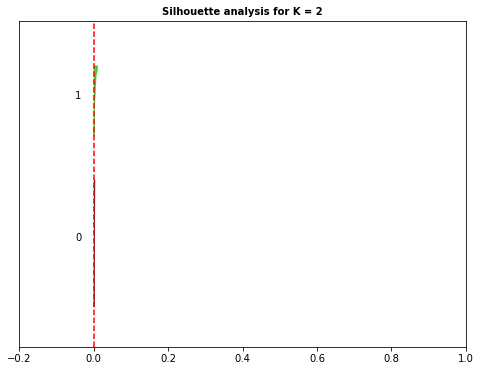

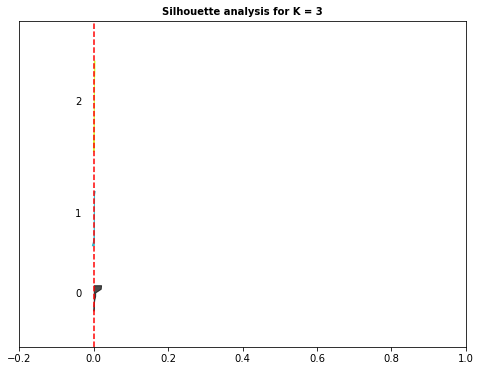

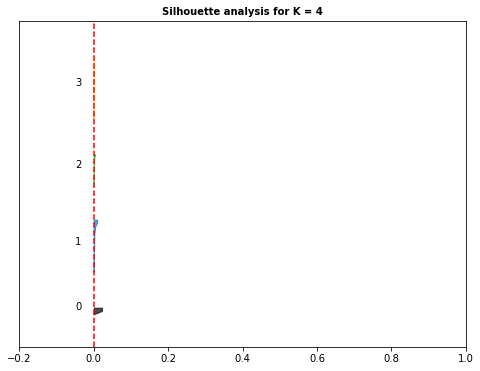

In [450]:
silhouette(kmeans_results, final_df, plot=True)

In [451]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

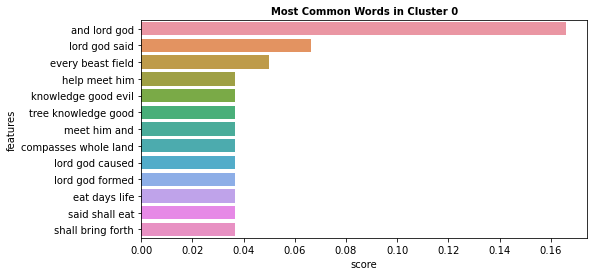

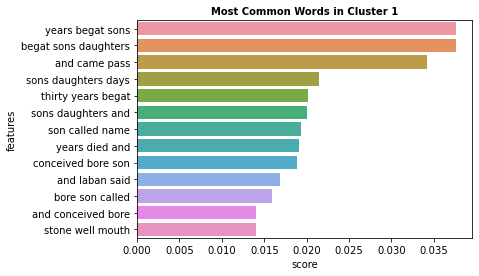

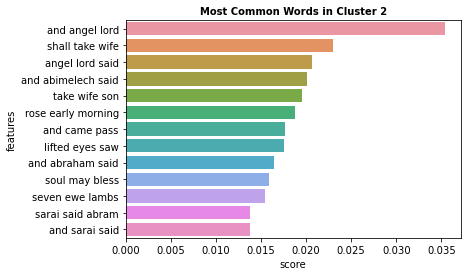

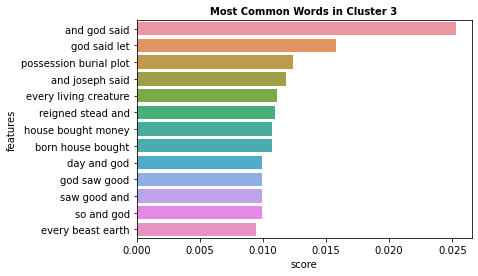

In [452]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [453]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

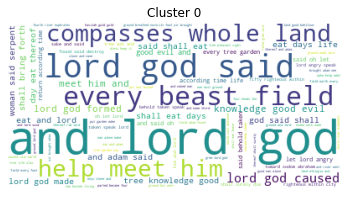

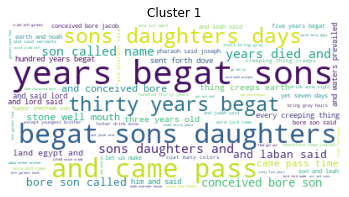

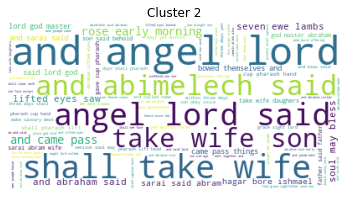

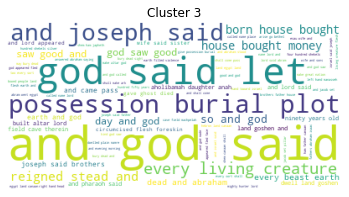

In [454]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [455]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Genesis_1,"'beginning', 'god', 'created', 'heaven', 'eart...",3
101,Genesis_2,"'thus', 'heavens', 'earth', 'finished', ',', '...",0
102,Genesis_3,"'serpent', 'subtle', 'beast', 'field', 'lord',...",0
103,Genesis_4,"'adam', 'knew', 'eve', 'wife', ';', 'conceived...",1
104,Genesis_5,"'book', 'generations', 'adam', '.', 'day', 'go...",1


In [456]:
print(df)

          Autor                                              Livro  label
100   Genesis_1  'beginning', 'god', 'created', 'heaven', 'eart...      3
101   Genesis_2  'thus', 'heavens', 'earth', 'finished', ',', '...      0
102   Genesis_3  'serpent', 'subtle', 'beast', 'field', 'lord',...      0
103   Genesis_4  'adam', 'knew', 'eve', 'wife', ';', 'conceived...      1
104   Genesis_5  'book', 'generations', 'adam', '.', 'day', 'go...      1
105   Genesis_6  'came', 'pass', ',', 'men', 'began', 'multiply...      3
106   Genesis_7  'lord', 'said', 'noah', ',', 'come', 'house', ...      1
107   Genesis_8  'god', 'remembered', 'noah', ',', 'every', 'li...      1
108   Genesis_9  'god', 'blessed', 'noah', 'sons', ',', 'said',...      3
109  Genesis_10  'generations', 'sons', 'noah', ',', 'shem', ',...      3
110  Genesis_11  'whole', 'earth', 'one', 'language', ',', 'one...      1
111  Genesis_12  'lord', 'said', 'abram', ',', 'get', 'country'...      3
112  Genesis_13  'abram', 'went', 'egy